# 1. Brief description of the problem and data

The rapid advancements in artificial intelligence and machine learning have led to significant progress in various domains. Now, we have a chance to utilize AI to tackle the problem of identifying metastatic cancer in small image patches taken from larger digital pathology scans. A Convolutional Neural Network (CNN) is better to solve this kind of a binary image classification problem, where the goal is to determine whether a given image patch contains metastatic cancer or not. 

The data for this challenge is based on the PatchCamelyon (PCam) benchmark dataset, which has been modified to remove duplicate images. PCam dataset is interesting due to its size, simplicity, and approachability. It allows for models to be trained on a single GPU within a few hours and achieve competitive scores. As for the Natural Language Processing (NLP) task, it involves the processing, understanding, and generation of human language by computer algorithms. NLP techniques are widely used for tasks such as sentiment analysis, machine translation, and chatbot development.

# 2. Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

**2.1 Load data and list the images**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image
import random

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift + Enter) will list all files under the input directory

#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**2.2 Label files Exploration**

In [2]:
import pandas as pd
import os

# Set the paths to the CSV files
sample_submission_path = '/kaggle/input/histopathologic-cancer-detection/sample_submission.csv'
train_labels_path = '/kaggle/input/histopathologic-cancer-detection/train_labels.csv'

# Read the CSV files
sample_submission_df = pd.read_csv(sample_submission_path)
train_labels_df = pd.read_csv(train_labels_path)

# Display the first few rows of each DataFrame
print("Sample Submission DataFrame:")
print(sample_submission_df.head())

print("\nTrain Labels DataFrame:")
print(train_labels_df.head())

# Data cleaning: Check for missing values
missing_values = train_labels_df.isnull().sum()
print("Missing values:\n", missing_values)

# Visualize the distribution of the target variable (label)
#plt.figure(figsize=(3, 3))
#sns.countplot(x='label', data=train_labels_df)
#plt.title('Histogram of Target Variable (Label)')
#plt.xlabel('Label')
#plt.ylabel('Count')
#plt.show()




Sample Submission DataFrame:
                                         id  label
0  0b2ea2a822ad23fdb1b5dd26653da899fbd2c0d5      0
1  95596b92e5066c5c52466c90b69ff089b39f2737      0
2  248e6738860e2ebcf6258cdc1f32f299e0c76914      0
3  2c35657e312966e9294eac6841726ff3a748febf      0
4  145782eb7caa1c516acbe2eda34d9a3f31c41fd6      0

Train Labels DataFrame:
                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0
Missing values:
 id       0
label    0
dtype: int64


**2.3 Visualize the pictures**

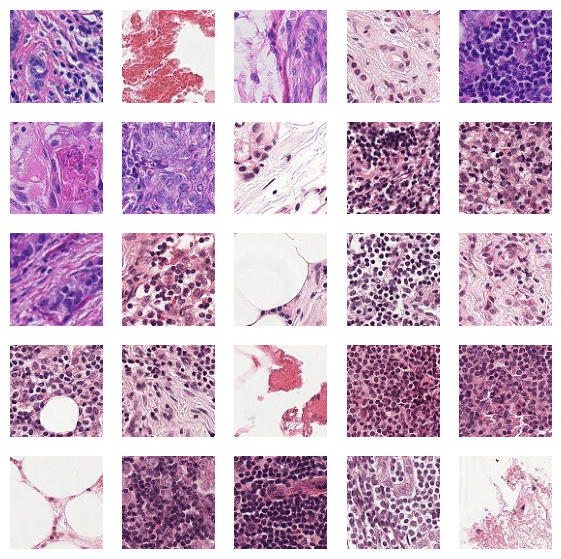

In [3]:
# Set the path to the images
train_images_path = '/kaggle/input/histopathologic-cancer-detection/train/'

# Get a list of image file names
image_files = os.listdir(train_images_path)

# Randomly select a few images
num_images_to_show = 25
selected_images = random.sample(image_files, num_images_to_show)

# Plot the selected images in a grid
fig, axes = plt.subplots(5, 5, figsize=(7, 7))
axes = axes.ravel()

for i, img_name in enumerate(selected_images):
    img_path = os.path.join(train_images_path, img_name)
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    

plt.show()

# 3.Model to choose

For the problem of histopathologic cancer detection, we can start with a Convolutional Neural Network (CNN) as it is well-suited for image classification tasks. Below, I will describe a possible model architecture and the reasoning behind the choices made.

** Input Layer: The model accepts RGB images of size (96, 96) pixels.

** Convolutional Layers: The model consists of 5 convolutional layers, each followed by batch normalization, ReLU activation function, and max-pooling layer. The first layer applies 32 filters of size (3, 3) to capture basic features such as edges and textures, and the number of filters increases up to 512 in the last layer to learn more complex features. The padding is set to 1 to preserve the spatial dimensions of the input.

** Flatten Layer: The output from the last convolutional layer is flattened into a 1D array of size 4608 before being passed to the fully connected layers.

** Fully Connected Layers: The model has 2 fully connected layers, with 256 and 2 neurons respectively. The first layer has a ReLU activation function and batch normalization, while the second layer has no activation function. Dropout with a rate of 0.4 is applied after the first fully connected layer to reduce overfitting.

** Output Layer: The final layer is a dense layer with 2 neurons and no activation function, which produces the logits for each class.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        num_classes = 2
        
        self.conv1 = nn.Sequential(
                        nn.Conv2d(3, 32, 3, stride=1, padding=1),
                        nn.BatchNorm2d(32),
                        nn.ReLU(inplace=True),
                        nn.MaxPool2d(2,2))
        
        self.conv2 = nn.Sequential(
                        nn.Conv2d(32, 64, 3, stride=1, padding=1),
                        nn.BatchNorm2d(64),
                        nn.ReLU(inplace=True),
                        nn.MaxPool2d(2,2))
        
        self.conv3 = nn.Sequential(
                        nn.Conv2d(64, 128, 3, stride=1, padding=1),
                        nn.BatchNorm2d(128),
                        nn.ReLU(inplace=True),
                        nn.MaxPool2d(2,2))
        
        self.conv4 = nn.Sequential(
                        nn.Conv2d(128, 256, 3, stride=1, padding=1),
                        nn.BatchNorm2d(256),
                        nn.ReLU(inplace=True),
                        nn.MaxPool2d(2,2))
        
        self.conv5 = nn.Sequential(
                        nn.Conv2d(256, 512, 3, stride=1, padding=1),
                        nn.BatchNorm2d(512),
                        nn.ReLU(inplace=True),
                        nn.MaxPool2d(2,2))
        
        self.fc = nn.Sequential(
                  nn.Linear(512 * 3 * 3, 256),
                  nn.ReLU(inplace=True),
                  nn.BatchNorm1d(256),
                  nn.Dropout(0.4),
                  nn.Linear(256, num_classes))  

        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.reshape(x.shape[0], -1) 
        x = self.fc(x)
        return x


#summary(cnn_model, input_size=(3, 46, 46), device=device.type)
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model = CancerNet().to(device)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
print(model)

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), p

# 4. Results and Analysis

Run hyperparameter tuning, try different architectures for comparison, apply techniques to improve training or performance, and discuss what helped.
Includes results with tables and figures. There is an analysis of why or why not something worked well, troubleshooting, and a hyperparameter optimization procedure summary.

**4.1 Split the datasets**

In [5]:
import os
import pandas as pd
import numpy as np

!pip install scikit-learn
#!conda install scikit-learn -y

!pip install scikit-image
#!conda install scikit-image -y

from skimage.io import imread
from skimage.transform import resize

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

first_image = imread(os.path.join(train_images_path, image_files[0]))
height, width, channels = first_image.shape

print(f"Image width: {width}")
print(f"Image height: {height}")
print(f"Image dimensions: {width} x {height} x {channels}")

train_labels_df = pd.read_csv(train_labels_path)

selected_data = train_labels_df.sample(frac = 0.05, random_state=42)

train_df, val_df = train_test_split(selected_data, train_size=0.7, random_state=42)

print(f"Number of images in train_labels_df: {train_labels_df.shape[0]}")
print(f"Number of images in selected_data: {selected_data.shape[0]}")
print(f"Number of images in train_df: {train_df.shape[0]}")
print(f"Number of images in val_df: {val_df.shape[0]}")

     ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.5/9.8 MB 14.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 4.1/9.8 MB 58.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 9.8/9.8 MB 81.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 54.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 23.9 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/13.4 MB ? eta -:--:--

     ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/13.4 MB 9.0 MB/s eta 0:00:02

     ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/13.4 MB 35.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━ 10.2/13.4 MB 72.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 13.4/13.4 MB 122.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 66.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 73.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━ 5.2/6.9 MB 156.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 6.9/6.9 MB 148.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.9 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/43.4 MB ? eta -:--:--

     ━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/43.4 MB 156.6 MB/s eta 0:00:01

     ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/43.4 MB 150.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 20.5/43.4 MB 139.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 25.1/43.4 MB 132.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 35.3/43.4 MB 141.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 40.6/43.4 MB 142.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 43.4/43.4 MB 145.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 43.4/43.4 MB 145.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 43.4/43.4 MB 145.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 43.4/43.4 MB 145.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 43.4/43.4 MB 145.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 43.4/43.4 MB 145.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 24.5 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 KB 19.2 MB/s eta 0:00:00


  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1


    Uninstalling scipy-1.10.1:


      Successfully uninstalled scipy-1.10.1


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


Image width: 96
Image height: 96
Image dimensions: 96 x 96 x 3


Number of images in train_labels_df: 220025
Number of images in selected_data: 11001
Number of images in train_df: 7700
Number of images in val_df: 3301


**4.2 Preprocess the image data (resize, normalize, etc.)**

In [6]:
# Create a custom dataset class
class ImageDataset(Dataset):
    def __init__(self, df, root_dir, transform=None):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir, self.df.iloc[idx, 0]) + '.tif'
        image = imread(img_name)
        label = self.df.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define data transformations
data_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor()
])

transform_train = transforms.Compose([transforms.ToPILImage(),
                                  transforms.RandomHorizontalFlip(), 
                                  transforms.RandomVerticalFlip(),
                                  transforms.RandomRotation(20), 
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])])

transform_val = transforms.Compose([transforms.ToPILImage(),
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])])

transform_test = transforms.Compose([transforms.ToPILImage(), 
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])])


# Create datasets and data loaders
train_dataset = ImageDataset(train_df, train_images_path, transform=transform_train)
val_dataset = ImageDataset(val_df, train_images_path, transform=transform_val)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

**4.3 Build and evaluate our model**

In [7]:
import tqdm

learning_rate = 0.002  # Define the learning rate for the optimizer

#criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)

# Compile the model
#optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)
#criterion = torch.nn.BCEWithLogitsLoss()


# Train the model
num_epochs = 10
train_loss_history = []
val_loss_history = []

# Initialize variables for checkpointing
checkpoint_path = "/kaggle/working/checkpoint.pth1"
best_val_loss = float("inf")

# Reload the checkpoint
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    
    train_loss = checkpoint['train_loss_history']
    val_loss = checkpoint['val_loss_history']

    print(f"Model successfully reloaded from checkpoint at epoch {epoch}")


for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0

    model.train()
       
    for images, labels in tqdm.tqdm(train_loader, desc=f"Epoch {epoch+1} (Training)"):
        images, labels = images.to(device), labels.to(device)

        # Rest of the code inside the loop
        optimizer.zero_grad()
        outputs = model(images)
        #loss = criterion(outputs.squeeze(), labels.float())
        #loss = criterion(outputs.squeeze(), labels.unsqueeze(1))
        loss = criterion(outputs, labels.long())
        
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    with torch.no_grad():
        for images, labels in tqdm.tqdm(val_loader, desc=f"Epoch {epoch+1} (Validation)"):
            images, labels = images.to(device), labels.to(device)
                
            outputs = model(images)
            #loss = criterion(outputs.squeeze(), labels.float())
            #loss = criterion(outputs.squeeze(), labels.unsqueeze(1))
            loss = criterion(outputs, labels.long())

            val_loss += loss.item()

    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Val Loss: {val_loss}")

    # Checkpoint the model if the validation loss improves
    if val_loss < best_val_loss:
        print("Saving checkpoint...")
        best_val_loss = val_loss
        checkpoint = {
            "epoch": epoch + 1,
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "train_loss_history": train_loss_history,
            "val_loss_history": val_loss_history,
        }
        torch.save(checkpoint, checkpoint_path)


Epoch 1 (Training):   0%|          | 0/241 [00:00<?, ?it/s]

Epoch 1 (Training):   0%|          | 1/241 [00:00<03:08,  1.28it/s]

Epoch 1 (Training):   1%|          | 2/241 [00:01<03:25,  1.16it/s]

Epoch 1 (Training):   1%|          | 3/241 [00:02<03:27,  1.15it/s]

Epoch 1 (Training):   2%|▏         | 4/241 [00:03<03:23,  1.16it/s]

Epoch 1 (Training):   2%|▏         | 5/241 [00:04<03:21,  1.17it/s]

Epoch 1 (Training):   2%|▏         | 6/241 [00:05<03:25,  1.14it/s]

Epoch 1 (Training):   3%|▎         | 7/241 [00:06<03:22,  1.16it/s]

Epoch 1 (Training):   3%|▎         | 8/241 [00:06<03:16,  1.19it/s]

Epoch 1 (Training):   4%|▎         | 9/241 [00:07<03:18,  1.17it/s]

Epoch 1 (Training):   4%|▍         | 10/241 [00:08<02:41,  1.43it/s]

Epoch 1 (Training):   5%|▍         | 11/241 [00:08<02:14,  1.71it/s]

Epoch 1 (Training):   5%|▍         | 12/241 [00:08<01:56,  1.96it/s]

Epoch 1 (Training):   5%|▌         | 13/241 [00:09<01:44,  2.19it/s]

Epoch 1 (Training):   6%|▌         | 14/241 [00:09<01:37,  2.33it/s]

Epoch 1 (Training):   6%|▌         | 15/241 [00:09<01:29,  2.52it/s]

Epoch 1 (Training):   7%|▋         | 16/241 [00:10<01:30,  2.49it/s]

Epoch 1 (Training):   7%|▋         | 17/241 [00:10<01:27,  2.57it/s]

Epoch 1 (Training):   7%|▋         | 18/241 [00:10<01:24,  2.64it/s]

Epoch 1 (Training):   8%|▊         | 19/241 [00:11<01:22,  2.70it/s]

Epoch 1 (Training):   8%|▊         | 20/241 [00:11<01:35,  2.33it/s]

Epoch 1 (Training):   9%|▊         | 21/241 [00:12<01:56,  1.88it/s]

Epoch 1 (Training):   9%|▉         | 22/241 [00:12<01:47,  2.03it/s]

Epoch 1 (Training):  10%|▉         | 23/241 [00:13<01:35,  2.27it/s]

Epoch 1 (Training):  10%|▉         | 24/241 [00:13<01:27,  2.49it/s]

Epoch 1 (Training):  10%|█         | 25/241 [00:13<01:22,  2.61it/s]

Epoch 1 (Training):  11%|█         | 26/241 [00:14<01:17,  2.76it/s]

Epoch 1 (Training):  11%|█         | 27/241 [00:14<01:14,  2.89it/s]

Epoch 1 (Training):  12%|█▏        | 28/241 [00:14<01:13,  2.89it/s]

Epoch 1 (Training):  12%|█▏        | 29/241 [00:15<01:17,  2.74it/s]

Epoch 1 (Training):  12%|█▏        | 30/241 [00:15<01:14,  2.83it/s]

Epoch 1 (Training):  13%|█▎        | 31/241 [00:16<01:17,  2.73it/s]

Epoch 1 (Training):  13%|█▎        | 32/241 [00:16<01:13,  2.85it/s]

Epoch 1 (Training):  14%|█▎        | 33/241 [00:16<01:17,  2.68it/s]

Epoch 1 (Training):  14%|█▍        | 34/241 [00:17<01:14,  2.77it/s]

Epoch 1 (Training):  15%|█▍        | 35/241 [00:17<01:12,  2.84it/s]

Epoch 1 (Training):  15%|█▍        | 36/241 [00:17<01:12,  2.84it/s]

Epoch 1 (Training):  15%|█▌        | 37/241 [00:18<01:09,  2.92it/s]

Epoch 1 (Training):  16%|█▌        | 38/241 [00:18<01:10,  2.90it/s]

Epoch 1 (Training):  16%|█▌        | 39/241 [00:18<01:09,  2.92it/s]

Epoch 1 (Training):  17%|█▋        | 40/241 [00:19<01:07,  2.96it/s]

Epoch 1 (Training):  17%|█▋        | 41/241 [00:19<01:10,  2.82it/s]

Epoch 1 (Training):  17%|█▋        | 42/241 [00:19<01:10,  2.83it/s]

Epoch 1 (Training):  18%|█▊        | 43/241 [00:20<01:07,  2.95it/s]

Epoch 1 (Training):  18%|█▊        | 44/241 [00:20<01:09,  2.85it/s]

Epoch 1 (Training):  19%|█▊        | 45/241 [00:20<01:08,  2.88it/s]

Epoch 1 (Training):  19%|█▉        | 46/241 [00:21<01:07,  2.91it/s]

Epoch 1 (Training):  20%|█▉        | 47/241 [00:21<01:11,  2.70it/s]

Epoch 1 (Training):  20%|█▉        | 48/241 [00:21<01:08,  2.81it/s]

Epoch 1 (Training):  20%|██        | 49/241 [00:22<01:06,  2.90it/s]

Epoch 1 (Training):  21%|██        | 50/241 [00:22<01:04,  2.94it/s]

Epoch 1 (Training):  21%|██        | 51/241 [00:22<01:03,  2.97it/s]

Epoch 1 (Training):  22%|██▏       | 52/241 [00:23<01:04,  2.95it/s]

Epoch 1 (Training):  22%|██▏       | 53/241 [00:23<01:02,  3.00it/s]

Epoch 1 (Training):  22%|██▏       | 54/241 [00:23<01:02,  3.01it/s]

Epoch 1 (Training):  23%|██▎       | 55/241 [00:24<01:01,  3.04it/s]

Epoch 1 (Training):  23%|██▎       | 56/241 [00:24<01:00,  3.04it/s]

Epoch 1 (Training):  24%|██▎       | 57/241 [00:24<01:00,  3.03it/s]

Epoch 1 (Training):  24%|██▍       | 58/241 [00:25<01:01,  2.98it/s]

Epoch 1 (Training):  24%|██▍       | 59/241 [00:25<01:00,  3.00it/s]

Epoch 1 (Training):  25%|██▍       | 60/241 [00:25<01:02,  2.91it/s]

Epoch 1 (Training):  25%|██▌       | 61/241 [00:26<01:01,  2.95it/s]

Epoch 1 (Training):  26%|██▌       | 62/241 [00:27<01:28,  2.03it/s]

Epoch 1 (Training):  26%|██▌       | 63/241 [00:27<01:19,  2.25it/s]

Epoch 1 (Training):  27%|██▋       | 64/241 [00:27<01:11,  2.47it/s]

Epoch 1 (Training):  27%|██▋       | 65/241 [00:28<01:07,  2.60it/s]

Epoch 1 (Training):  27%|██▋       | 66/241 [00:28<01:04,  2.72it/s]

Epoch 1 (Training):  28%|██▊       | 67/241 [00:28<01:06,  2.62it/s]

Epoch 1 (Training):  28%|██▊       | 68/241 [00:29<01:03,  2.73it/s]

Epoch 1 (Training):  29%|██▊       | 69/241 [00:29<01:01,  2.78it/s]

Epoch 1 (Training):  29%|██▉       | 70/241 [00:29<01:00,  2.84it/s]

Epoch 1 (Training):  29%|██▉       | 71/241 [00:30<00:58,  2.89it/s]

Epoch 1 (Training):  30%|██▉       | 72/241 [00:30<01:03,  2.67it/s]

Epoch 1 (Training):  30%|███       | 73/241 [00:30<01:00,  2.77it/s]

Epoch 1 (Training):  31%|███       | 74/241 [00:31<00:58,  2.83it/s]

Epoch 1 (Training):  31%|███       | 75/241 [00:32<01:22,  2.02it/s]

Epoch 1 (Training):  32%|███▏      | 76/241 [00:32<01:18,  2.10it/s]

Epoch 1 (Training):  32%|███▏      | 77/241 [00:33<01:15,  2.16it/s]

Epoch 1 (Training):  32%|███▏      | 78/241 [00:33<01:09,  2.36it/s]

Epoch 1 (Training):  33%|███▎      | 79/241 [00:33<01:05,  2.46it/s]

Epoch 1 (Training):  33%|███▎      | 80/241 [00:34<01:02,  2.59it/s]

Epoch 1 (Training):  34%|███▎      | 81/241 [00:34<01:07,  2.36it/s]

Epoch 1 (Training):  34%|███▍      | 82/241 [00:34<01:03,  2.49it/s]

Epoch 1 (Training):  34%|███▍      | 83/241 [00:35<01:02,  2.54it/s]

Epoch 1 (Training):  35%|███▍      | 84/241 [00:35<00:59,  2.62it/s]

Epoch 1 (Training):  35%|███▌      | 85/241 [00:35<00:57,  2.71it/s]

Epoch 1 (Training):  36%|███▌      | 86/241 [00:36<00:55,  2.79it/s]

Epoch 1 (Training):  36%|███▌      | 87/241 [00:36<01:06,  2.30it/s]

Epoch 1 (Training):  37%|███▋      | 88/241 [00:37<01:18,  1.94it/s]

Epoch 1 (Training):  37%|███▋      | 89/241 [00:38<01:19,  1.91it/s]

Epoch 1 (Training):  37%|███▋      | 90/241 [00:38<01:09,  2.17it/s]

Epoch 1 (Training):  38%|███▊      | 91/241 [00:38<01:04,  2.34it/s]

Epoch 1 (Training):  38%|███▊      | 92/241 [00:39<00:59,  2.49it/s]

Epoch 1 (Training):  39%|███▊      | 93/241 [00:39<00:56,  2.64it/s]

Epoch 1 (Training):  39%|███▉      | 94/241 [00:39<00:53,  2.72it/s]

Epoch 1 (Training):  39%|███▉      | 95/241 [00:40<00:52,  2.77it/s]

Epoch 1 (Training):  40%|███▉      | 96/241 [00:40<00:52,  2.76it/s]

Epoch 1 (Training):  40%|████      | 97/241 [00:40<00:51,  2.81it/s]

Epoch 1 (Training):  41%|████      | 98/241 [00:41<00:49,  2.88it/s]

Epoch 1 (Training):  41%|████      | 99/241 [00:41<00:48,  2.91it/s]

Epoch 1 (Training):  41%|████▏     | 100/241 [00:42<00:57,  2.47it/s]

Epoch 1 (Training):  42%|████▏     | 101/241 [00:42<00:58,  2.38it/s]

Epoch 1 (Training):  42%|████▏     | 102/241 [00:42<00:54,  2.54it/s]

Epoch 1 (Training):  43%|████▎     | 103/241 [00:43<00:51,  2.67it/s]

Epoch 1 (Training):  43%|████▎     | 104/241 [00:43<00:49,  2.76it/s]

Epoch 1 (Training):  44%|████▎     | 105/241 [00:43<00:48,  2.83it/s]

Epoch 1 (Training):  44%|████▍     | 106/241 [00:44<00:47,  2.84it/s]

Epoch 1 (Training):  44%|████▍     | 107/241 [00:44<00:47,  2.82it/s]

Epoch 1 (Training):  45%|████▍     | 108/241 [00:44<00:46,  2.87it/s]

Epoch 1 (Training):  45%|████▌     | 109/241 [00:45<00:46,  2.85it/s]

Epoch 1 (Training):  46%|████▌     | 110/241 [00:45<00:45,  2.87it/s]

Epoch 1 (Training):  46%|████▌     | 111/241 [00:45<00:44,  2.92it/s]

Epoch 1 (Training):  46%|████▋     | 112/241 [00:46<00:52,  2.47it/s]

Epoch 1 (Training):  47%|████▋     | 113/241 [00:46<00:52,  2.45it/s]

Epoch 1 (Training):  47%|████▋     | 114/241 [00:47<00:49,  2.59it/s]

Epoch 1 (Training):  48%|████▊     | 115/241 [00:47<00:49,  2.53it/s]

Epoch 1 (Training):  48%|████▊     | 116/241 [00:48<00:48,  2.60it/s]

Epoch 1 (Training):  49%|████▊     | 117/241 [00:48<00:46,  2.65it/s]

Epoch 1 (Training):  49%|████▉     | 118/241 [00:48<00:45,  2.73it/s]

Epoch 1 (Training):  49%|████▉     | 119/241 [00:49<00:43,  2.79it/s]

Epoch 1 (Training):  50%|████▉     | 120/241 [00:49<00:42,  2.83it/s]

Epoch 1 (Training):  50%|█████     | 121/241 [00:49<00:41,  2.87it/s]

Epoch 1 (Training):  51%|█████     | 122/241 [00:50<00:41,  2.88it/s]

Epoch 1 (Training):  51%|█████     | 123/241 [00:50<00:40,  2.89it/s]

Epoch 1 (Training):  51%|█████▏    | 124/241 [00:50<00:41,  2.85it/s]

Epoch 1 (Training):  52%|█████▏    | 125/241 [00:51<00:40,  2.90it/s]

Epoch 1 (Training):  52%|█████▏    | 126/241 [00:51<00:40,  2.86it/s]

Epoch 1 (Training):  53%|█████▎    | 127/241 [00:51<00:39,  2.85it/s]

Epoch 1 (Training):  53%|█████▎    | 128/241 [00:52<00:38,  2.92it/s]

Epoch 1 (Training):  54%|█████▎    | 129/241 [00:52<00:37,  2.96it/s]

Epoch 1 (Training):  54%|█████▍    | 130/241 [00:52<00:37,  2.96it/s]

Epoch 1 (Training):  54%|█████▍    | 131/241 [00:53<00:37,  2.97it/s]

Epoch 1 (Training):  55%|█████▍    | 132/241 [00:53<00:36,  2.95it/s]

Epoch 1 (Training):  55%|█████▌    | 133/241 [00:53<00:36,  2.99it/s]

Epoch 1 (Training):  56%|█████▌    | 134/241 [00:54<00:35,  2.98it/s]

Epoch 1 (Training):  56%|█████▌    | 135/241 [00:54<00:35,  2.95it/s]

Epoch 1 (Training):  56%|█████▋    | 136/241 [00:54<00:35,  2.94it/s]

Epoch 1 (Training):  57%|█████▋    | 137/241 [00:55<00:35,  2.94it/s]

Epoch 1 (Training):  57%|█████▋    | 138/241 [00:55<00:34,  2.96it/s]

Epoch 1 (Training):  58%|█████▊    | 139/241 [00:55<00:35,  2.90it/s]

Epoch 1 (Training):  58%|█████▊    | 140/241 [00:56<00:34,  2.95it/s]

Epoch 1 (Training):  59%|█████▊    | 141/241 [00:56<00:33,  2.94it/s]

Epoch 1 (Training):  59%|█████▉    | 142/241 [00:56<00:33,  2.92it/s]

Epoch 1 (Training):  59%|█████▉    | 143/241 [00:57<00:32,  2.97it/s]

Epoch 1 (Training):  60%|█████▉    | 144/241 [00:57<00:32,  2.98it/s]

Epoch 1 (Training):  60%|██████    | 145/241 [00:57<00:32,  3.00it/s]

Epoch 1 (Training):  61%|██████    | 146/241 [00:58<00:32,  2.97it/s]

Epoch 1 (Training):  61%|██████    | 147/241 [00:58<00:31,  2.96it/s]

Epoch 1 (Training):  61%|██████▏   | 148/241 [00:58<00:31,  2.96it/s]

Epoch 1 (Training):  62%|██████▏   | 149/241 [00:59<00:30,  2.98it/s]

Epoch 1 (Training):  62%|██████▏   | 150/241 [00:59<00:30,  3.00it/s]

Epoch 1 (Training):  63%|██████▎   | 151/241 [00:59<00:29,  3.02it/s]

Epoch 1 (Training):  63%|██████▎   | 152/241 [01:00<00:29,  2.99it/s]

Epoch 1 (Training):  63%|██████▎   | 153/241 [01:00<00:29,  3.00it/s]

Epoch 1 (Training):  64%|██████▍   | 154/241 [01:00<00:28,  3.03it/s]

Epoch 1 (Training):  64%|██████▍   | 155/241 [01:01<00:28,  3.04it/s]

Epoch 1 (Training):  65%|██████▍   | 156/241 [01:01<00:28,  3.03it/s]

Epoch 1 (Training):  65%|██████▌   | 157/241 [01:01<00:28,  2.98it/s]

Epoch 1 (Training):  66%|██████▌   | 158/241 [01:02<00:27,  3.03it/s]

Epoch 1 (Training):  66%|██████▌   | 159/241 [01:02<00:27,  2.95it/s]

Epoch 1 (Training):  66%|██████▋   | 160/241 [01:02<00:27,  2.97it/s]

Epoch 1 (Training):  67%|██████▋   | 161/241 [01:03<00:26,  2.97it/s]

Epoch 1 (Training):  67%|██████▋   | 162/241 [01:03<00:26,  3.00it/s]

Epoch 1 (Training):  68%|██████▊   | 163/241 [01:03<00:25,  3.07it/s]

Epoch 1 (Training):  68%|██████▊   | 164/241 [01:04<00:24,  3.10it/s]

Epoch 1 (Training):  68%|██████▊   | 165/241 [01:04<00:24,  3.09it/s]

Epoch 1 (Training):  69%|██████▉   | 166/241 [01:04<00:24,  3.00it/s]

Epoch 1 (Training):  69%|██████▉   | 167/241 [01:05<00:24,  3.04it/s]

Epoch 1 (Training):  70%|██████▉   | 168/241 [01:05<00:24,  2.97it/s]

Epoch 1 (Training):  70%|███████   | 169/241 [01:05<00:24,  2.99it/s]

Epoch 1 (Training):  71%|███████   | 170/241 [01:06<00:23,  3.01it/s]

Epoch 1 (Training):  71%|███████   | 171/241 [01:06<00:23,  2.98it/s]

Epoch 1 (Training):  71%|███████▏  | 172/241 [01:06<00:24,  2.84it/s]

Epoch 1 (Training):  72%|███████▏  | 173/241 [01:07<00:25,  2.70it/s]

Epoch 1 (Training):  72%|███████▏  | 174/241 [01:07<00:24,  2.78it/s]

Epoch 1 (Training):  73%|███████▎  | 175/241 [01:08<00:22,  2.88it/s]

Epoch 1 (Training):  73%|███████▎  | 176/241 [01:08<00:22,  2.89it/s]

Epoch 1 (Training):  73%|███████▎  | 177/241 [01:08<00:21,  2.92it/s]

Epoch 1 (Training):  74%|███████▍  | 178/241 [01:09<00:21,  2.93it/s]

Epoch 1 (Training):  74%|███████▍  | 179/241 [01:09<00:20,  2.98it/s]

Epoch 1 (Training):  75%|███████▍  | 180/241 [01:09<00:20,  3.00it/s]

Epoch 1 (Training):  75%|███████▌  | 181/241 [01:09<00:19,  3.08it/s]

Epoch 1 (Training):  76%|███████▌  | 182/241 [01:10<00:19,  3.08it/s]

Epoch 1 (Training):  76%|███████▌  | 183/241 [01:10<00:18,  3.11it/s]

Epoch 1 (Training):  76%|███████▋  | 184/241 [01:10<00:18,  3.10it/s]

Epoch 1 (Training):  77%|███████▋  | 185/241 [01:11<00:18,  3.10it/s]

Epoch 1 (Training):  77%|███████▋  | 186/241 [01:11<00:18,  3.03it/s]

Epoch 1 (Training):  78%|███████▊  | 187/241 [01:11<00:17,  3.02it/s]

Epoch 1 (Training):  78%|███████▊  | 188/241 [01:12<00:18,  2.86it/s]

Epoch 1 (Training):  78%|███████▊  | 189/241 [01:12<00:18,  2.79it/s]

Epoch 1 (Training):  79%|███████▉  | 190/241 [01:13<00:18,  2.79it/s]

Epoch 1 (Training):  79%|███████▉  | 191/241 [01:13<00:18,  2.75it/s]

Epoch 1 (Training):  80%|███████▉  | 192/241 [01:13<00:17,  2.81it/s]

Epoch 1 (Training):  80%|████████  | 193/241 [01:14<00:16,  2.87it/s]

Epoch 1 (Training):  80%|████████  | 194/241 [01:14<00:16,  2.90it/s]

Epoch 1 (Training):  81%|████████  | 195/241 [01:14<00:15,  2.93it/s]

Epoch 1 (Training):  81%|████████▏ | 196/241 [01:15<00:15,  2.93it/s]

Epoch 1 (Training):  82%|████████▏ | 197/241 [01:15<00:15,  2.92it/s]

Epoch 1 (Training):  82%|████████▏ | 198/241 [01:15<00:14,  2.90it/s]

Epoch 1 (Training):  83%|████████▎ | 199/241 [01:16<00:14,  2.89it/s]

Epoch 1 (Training):  83%|████████▎ | 200/241 [01:16<00:14,  2.82it/s]

Epoch 1 (Training):  83%|████████▎ | 201/241 [01:16<00:13,  2.90it/s]

Epoch 1 (Training):  84%|████████▍ | 202/241 [01:17<00:13,  2.91it/s]

Epoch 1 (Training):  84%|████████▍ | 203/241 [01:17<00:12,  2.94it/s]

Epoch 1 (Training):  85%|████████▍ | 204/241 [01:17<00:12,  3.00it/s]

Epoch 1 (Training):  85%|████████▌ | 205/241 [01:18<00:12,  2.98it/s]

Epoch 1 (Training):  85%|████████▌ | 206/241 [01:18<00:11,  2.92it/s]

Epoch 1 (Training):  86%|████████▌ | 207/241 [01:18<00:11,  2.86it/s]

Epoch 1 (Training):  86%|████████▋ | 208/241 [01:19<00:11,  2.93it/s]

Epoch 1 (Training):  87%|████████▋ | 209/241 [01:19<00:10,  2.98it/s]

Epoch 1 (Training):  87%|████████▋ | 210/241 [01:19<00:10,  2.99it/s]

Epoch 1 (Training):  88%|████████▊ | 211/241 [01:20<00:09,  3.01it/s]

Epoch 1 (Training):  88%|████████▊ | 212/241 [01:20<00:09,  3.03it/s]

Epoch 1 (Training):  88%|████████▊ | 213/241 [01:20<00:09,  3.09it/s]

Epoch 1 (Training):  89%|████████▉ | 214/241 [01:21<00:08,  3.11it/s]

Epoch 1 (Training):  89%|████████▉ | 215/241 [01:21<00:08,  3.11it/s]

Epoch 1 (Training):  90%|████████▉ | 216/241 [01:21<00:08,  3.06it/s]

Epoch 1 (Training):  90%|█████████ | 217/241 [01:22<00:07,  3.06it/s]

Epoch 1 (Training):  90%|█████████ | 218/241 [01:22<00:07,  3.07it/s]

Epoch 1 (Training):  91%|█████████ | 219/241 [01:22<00:07,  3.04it/s]

Epoch 1 (Training):  91%|█████████▏| 220/241 [01:23<00:06,  3.03it/s]

Epoch 1 (Training):  92%|█████████▏| 221/241 [01:23<00:06,  3.06it/s]

Epoch 1 (Training):  92%|█████████▏| 222/241 [01:23<00:06,  3.01it/s]

Epoch 1 (Training):  93%|█████████▎| 223/241 [01:24<00:05,  3.06it/s]

Epoch 1 (Training):  93%|█████████▎| 224/241 [01:24<00:05,  3.05it/s]

Epoch 1 (Training):  93%|█████████▎| 225/241 [01:24<00:05,  3.06it/s]

Epoch 1 (Training):  94%|█████████▍| 226/241 [01:25<00:04,  3.00it/s]

Epoch 1 (Training):  94%|█████████▍| 227/241 [01:25<00:04,  3.05it/s]

Epoch 1 (Training):  95%|█████████▍| 228/241 [01:25<00:04,  3.07it/s]

Epoch 1 (Training):  95%|█████████▌| 229/241 [01:26<00:03,  3.09it/s]

Epoch 1 (Training):  95%|█████████▌| 230/241 [01:26<00:03,  3.10it/s]

Epoch 1 (Training):  96%|█████████▌| 231/241 [01:26<00:03,  3.07it/s]

Epoch 1 (Training):  96%|█████████▋| 232/241 [01:27<00:02,  3.06it/s]

Epoch 1 (Training):  97%|█████████▋| 233/241 [01:27<00:02,  3.08it/s]

Epoch 1 (Training):  97%|█████████▋| 234/241 [01:27<00:02,  3.10it/s]

Epoch 1 (Training):  98%|█████████▊| 235/241 [01:28<00:01,  3.12it/s]

Epoch 1 (Training):  98%|█████████▊| 236/241 [01:28<00:01,  3.06it/s]

Epoch 1 (Training):  98%|█████████▊| 237/241 [01:28<00:01,  3.08it/s]

Epoch 1 (Training):  99%|█████████▉| 238/241 [01:29<00:00,  3.05it/s]

Epoch 1 (Training):  99%|█████████▉| 239/241 [01:29<00:00,  3.09it/s]

Epoch 1 (Training): 100%|█████████▉| 240/241 [01:29<00:00,  3.07it/s]

Epoch 1 (Training): 100%|██████████| 241/241 [01:29<00:00,  3.41it/s]

Epoch 1 (Training): 100%|██████████| 241/241 [01:29<00:00,  2.68it/s]

Epoch 1 (Validation):   0%|          | 0/104 [00:00<?, ?it/s]

Epoch 1 (Validation):   1%|          | 1/104 [00:00<00:25,  3.98it/s]

Epoch 1 (Validation):   2%|▏         | 2/104 [00:00<00:26,  3.91it/s]

Epoch 1 (Validation):   3%|▎         | 3/104 [00:00<00:26,  3.87it/s]

Epoch 1 (Validation):   4%|▍         | 4/104 [00:01<00:25,  3.87it/s]

Epoch 1 (Validation):   5%|▍         | 5/104 [00:01<00:25,  3.88it/s]

Epoch 1 (Validation):   6%|▌         | 6/104 [00:01<00:26,  3.75it/s]

Epoch 1 (Validation):   7%|▋         | 7/104 [00:01<00:25,  3.76it/s]

Epoch 1 (Validation):   8%|▊         | 8/104 [00:02<00:25,  3.76it/s]

Epoch 1 (Validation):   9%|▊         | 9/104 [00:02<00:25,  3.77it/s]

Epoch 1 (Validation):  10%|▉         | 10/104 [00:02<00:24,  3.78it/s]

Epoch 1 (Validation):  11%|█         | 11/104 [00:02<00:25,  3.68it/s]

Epoch 1 (Validation):  12%|█▏        | 12/104 [00:03<00:24,  3.75it/s]

Epoch 1 (Validation):  12%|█▎        | 13/104 [00:03<00:24,  3.75it/s]

Epoch 1 (Validation):  13%|█▎        | 14/104 [00:03<00:23,  3.79it/s]

Epoch 1 (Validation):  14%|█▍        | 15/104 [00:03<00:23,  3.81it/s]

Epoch 1 (Validation):  15%|█▌        | 16/104 [00:04<00:22,  3.88it/s]

Epoch 1 (Validation):  16%|█▋        | 17/104 [00:04<00:22,  3.88it/s]

Epoch 1 (Validation):  17%|█▋        | 18/104 [00:04<00:22,  3.85it/s]

Epoch 1 (Validation):  18%|█▊        | 19/104 [00:04<00:22,  3.86it/s]

Epoch 1 (Validation):  19%|█▉        | 20/104 [00:05<00:21,  3.85it/s]

Epoch 1 (Validation):  20%|██        | 21/104 [00:05<00:21,  3.77it/s]

Epoch 1 (Validation):  21%|██        | 22/104 [00:05<00:22,  3.71it/s]

Epoch 1 (Validation):  22%|██▏       | 23/104 [00:06<00:21,  3.72it/s]

Epoch 1 (Validation):  23%|██▎       | 24/104 [00:06<00:21,  3.77it/s]

Epoch 1 (Validation):  24%|██▍       | 25/104 [00:06<00:20,  3.84it/s]

Epoch 1 (Validation):  25%|██▌       | 26/104 [00:06<00:20,  3.81it/s]

Epoch 1 (Validation):  26%|██▌       | 27/104 [00:07<00:20,  3.81it/s]

Epoch 1 (Validation):  27%|██▋       | 28/104 [00:07<00:20,  3.78it/s]

Epoch 1 (Validation):  28%|██▊       | 29/104 [00:07<00:19,  3.84it/s]

Epoch 1 (Validation):  29%|██▉       | 30/104 [00:07<00:19,  3.85it/s]

Epoch 1 (Validation):  30%|██▉       | 31/104 [00:08<00:18,  3.90it/s]

Epoch 1 (Validation):  31%|███       | 32/104 [00:08<00:18,  3.81it/s]

Epoch 1 (Validation):  32%|███▏      | 33/104 [00:08<00:18,  3.84it/s]

Epoch 1 (Validation):  33%|███▎      | 34/104 [00:08<00:18,  3.83it/s]

Epoch 1 (Validation):  34%|███▎      | 35/104 [00:09<00:17,  3.94it/s]

Epoch 1 (Validation):  35%|███▍      | 36/104 [00:09<00:17,  3.99it/s]

Epoch 1 (Validation):  36%|███▌      | 37/104 [00:09<00:17,  3.92it/s]

Epoch 1 (Validation):  37%|███▋      | 38/104 [00:09<00:17,  3.85it/s]

Epoch 1 (Validation):  38%|███▊      | 39/104 [00:10<00:16,  3.85it/s]

Epoch 1 (Validation):  38%|███▊      | 40/104 [00:10<00:16,  3.80it/s]

Epoch 1 (Validation):  39%|███▉      | 41/104 [00:10<00:16,  3.83it/s]

Epoch 1 (Validation):  40%|████      | 42/104 [00:10<00:16,  3.87it/s]

Epoch 1 (Validation):  41%|████▏     | 43/104 [00:11<00:15,  3.91it/s]

Epoch 1 (Validation):  42%|████▏     | 44/104 [00:11<00:15,  3.88it/s]

Epoch 1 (Validation):  43%|████▎     | 45/104 [00:11<00:15,  3.91it/s]

Epoch 1 (Validation):  44%|████▍     | 46/104 [00:12<00:14,  3.90it/s]

Epoch 1 (Validation):  45%|████▌     | 47/104 [00:12<00:14,  3.90it/s]

Epoch 1 (Validation):  46%|████▌     | 48/104 [00:12<00:14,  3.94it/s]

Epoch 1 (Validation):  47%|████▋     | 49/104 [00:12<00:13,  3.95it/s]

Epoch 1 (Validation):  48%|████▊     | 50/104 [00:13<00:13,  3.92it/s]

Epoch 1 (Validation):  49%|████▉     | 51/104 [00:13<00:13,  3.92it/s]

Epoch 1 (Validation):  50%|█████     | 52/104 [00:13<00:13,  3.91it/s]

Epoch 1 (Validation):  51%|█████     | 53/104 [00:13<00:13,  3.91it/s]

Epoch 1 (Validation):  52%|█████▏    | 54/104 [00:14<00:12,  3.91it/s]

Epoch 1 (Validation):  53%|█████▎    | 55/104 [00:14<00:12,  3.92it/s]

Epoch 1 (Validation):  54%|█████▍    | 56/104 [00:14<00:12,  3.95it/s]

Epoch 1 (Validation):  55%|█████▍    | 57/104 [00:14<00:12,  3.89it/s]

Epoch 1 (Validation):  56%|█████▌    | 58/104 [00:15<00:11,  3.90it/s]

Epoch 1 (Validation):  57%|█████▋    | 59/104 [00:15<00:11,  3.92it/s]

Epoch 1 (Validation):  58%|█████▊    | 60/104 [00:15<00:11,  3.84it/s]

Epoch 1 (Validation):  59%|█████▊    | 61/104 [00:15<00:11,  3.86it/s]

Epoch 1 (Validation):  60%|█████▉    | 62/104 [00:16<00:11,  3.75it/s]

Epoch 1 (Validation):  61%|██████    | 63/104 [00:16<00:10,  3.76it/s]

Epoch 1 (Validation):  62%|██████▏   | 64/104 [00:16<00:10,  3.71it/s]

Epoch 1 (Validation):  62%|██████▎   | 65/104 [00:16<00:10,  3.74it/s]

Epoch 1 (Validation):  63%|██████▎   | 66/104 [00:17<00:10,  3.76it/s]

Epoch 1 (Validation):  64%|██████▍   | 67/104 [00:17<00:09,  3.80it/s]

Epoch 1 (Validation):  65%|██████▌   | 68/104 [00:17<00:09,  3.83it/s]

Epoch 1 (Validation):  66%|██████▋   | 69/104 [00:17<00:09,  3.80it/s]

Epoch 1 (Validation):  67%|██████▋   | 70/104 [00:18<00:09,  3.73it/s]

Epoch 1 (Validation):  68%|██████▊   | 71/104 [00:18<00:08,  3.70it/s]

Epoch 1 (Validation):  69%|██████▉   | 72/104 [00:18<00:08,  3.71it/s]

Epoch 1 (Validation):  70%|███████   | 73/104 [00:19<00:08,  3.77it/s]

Epoch 1 (Validation):  71%|███████   | 74/104 [00:19<00:07,  3.82it/s]

Epoch 1 (Validation):  72%|███████▏  | 75/104 [00:19<00:07,  3.86it/s]

Epoch 1 (Validation):  73%|███████▎  | 76/104 [00:19<00:07,  3.80it/s]

Epoch 1 (Validation):  74%|███████▍  | 77/104 [00:20<00:07,  3.78it/s]

Epoch 1 (Validation):  75%|███████▌  | 78/104 [00:20<00:06,  3.84it/s]

Epoch 1 (Validation):  76%|███████▌  | 79/104 [00:20<00:06,  3.84it/s]

Epoch 1 (Validation):  77%|███████▋  | 80/104 [00:20<00:06,  3.78it/s]

Epoch 1 (Validation):  78%|███████▊  | 81/104 [00:21<00:06,  3.80it/s]

Epoch 1 (Validation):  79%|███████▉  | 82/104 [00:21<00:05,  3.82it/s]

Epoch 1 (Validation):  80%|███████▉  | 83/104 [00:21<00:05,  3.83it/s]

Epoch 1 (Validation):  81%|████████  | 84/104 [00:21<00:05,  3.79it/s]

Epoch 1 (Validation):  82%|████████▏ | 85/104 [00:22<00:04,  3.82it/s]

Epoch 1 (Validation):  83%|████████▎ | 86/104 [00:22<00:04,  3.87it/s]

Epoch 1 (Validation):  84%|████████▎ | 87/104 [00:22<00:04,  3.95it/s]

Epoch 1 (Validation):  85%|████████▍ | 88/104 [00:22<00:03,  4.00it/s]

Epoch 1 (Validation):  86%|████████▌ | 89/104 [00:23<00:03,  3.98it/s]

Epoch 1 (Validation):  87%|████████▋ | 90/104 [00:23<00:03,  3.95it/s]

Epoch 1 (Validation):  88%|████████▊ | 91/104 [00:23<00:03,  3.90it/s]

Epoch 1 (Validation):  88%|████████▊ | 92/104 [00:23<00:03,  3.89it/s]

Epoch 1 (Validation):  89%|████████▉ | 93/104 [00:24<00:02,  3.92it/s]

Epoch 1 (Validation):  90%|█████████ | 94/104 [00:24<00:02,  3.92it/s]

Epoch 1 (Validation):  91%|█████████▏| 95/104 [00:24<00:02,  3.91it/s]

Epoch 1 (Validation):  92%|█████████▏| 96/104 [00:24<00:02,  3.87it/s]

Epoch 1 (Validation):  93%|█████████▎| 97/104 [00:25<00:01,  3.80it/s]

Epoch 1 (Validation):  94%|█████████▍| 98/104 [00:25<00:01,  3.77it/s]

Epoch 1 (Validation):  95%|█████████▌| 99/104 [00:25<00:01,  3.81it/s]

Epoch 1 (Validation):  96%|█████████▌| 100/104 [00:26<00:01,  3.87it/s]

Epoch 1 (Validation):  97%|█████████▋| 101/104 [00:26<00:00,  3.86it/s]

Epoch 1 (Validation):  98%|█████████▊| 102/104 [00:26<00:00,  3.91it/s]

Epoch 1 (Validation):  99%|█████████▉| 103/104 [00:26<00:00,  3.83it/s]

Epoch 1 (Validation): 100%|██████████| 104/104 [00:26<00:00,  3.87it/s]

Epoch 1, Train Loss: 0.47810268921476184, Val Loss: 0.4249581087094087
Saving checkpoint...


Epoch 2 (Training):   0%|          | 0/241 [00:00<?, ?it/s]

Epoch 2 (Training):   0%|          | 1/241 [00:00<00:38,  6.15it/s]

Epoch 2 (Training):   1%|          | 2/241 [00:00<00:39,  6.02it/s]

Epoch 2 (Training):   1%|          | 3/241 [00:00<00:40,  5.91it/s]

Epoch 2 (Training):   2%|▏         | 4/241 [00:00<00:39,  6.00it/s]

Epoch 2 (Training):   2%|▏         | 5/241 [00:00<00:39,  5.95it/s]

Epoch 2 (Training):   2%|▏         | 6/241 [00:01<00:39,  6.01it/s]

Epoch 2 (Training):   3%|▎         | 7/241 [00:01<00:38,  6.12it/s]

Epoch 2 (Training):   3%|▎         | 8/241 [00:01<00:37,  6.17it/s]

Epoch 2 (Training):   4%|▎         | 9/241 [00:01<00:37,  6.14it/s]

Epoch 2 (Training):   4%|▍         | 10/241 [00:01<00:38,  6.02it/s]

Epoch 2 (Training):   5%|▍         | 11/241 [00:01<00:37,  6.10it/s]

Epoch 2 (Training):   5%|▍         | 12/241 [00:01<00:37,  6.09it/s]

Epoch 2 (Training):   5%|▌         | 13/241 [00:02<00:37,  6.15it/s]

Epoch 2 (Training):   6%|▌         | 14/241 [00:02<00:37,  6.13it/s]

Epoch 2 (Training):   6%|▌         | 15/241 [00:02<00:36,  6.15it/s]

Epoch 2 (Training):   7%|▋         | 16/241 [00:02<00:35,  6.32it/s]

Epoch 2 (Training):   7%|▋         | 17/241 [00:02<00:35,  6.26it/s]

Epoch 2 (Training):   7%|▋         | 18/241 [00:02<00:36,  6.19it/s]

Epoch 2 (Training):   8%|▊         | 19/241 [00:03<00:36,  6.12it/s]

Epoch 2 (Training):   8%|▊         | 20/241 [00:03<00:36,  6.13it/s]

Epoch 2 (Training):   9%|▊         | 21/241 [00:03<00:35,  6.21it/s]

Epoch 2 (Training):   9%|▉         | 22/241 [00:03<00:34,  6.35it/s]

Epoch 2 (Training):  10%|▉         | 23/241 [00:03<00:44,  4.86it/s]

Epoch 2 (Training):  10%|▉         | 24/241 [00:04<00:41,  5.18it/s]

Epoch 2 (Training):  10%|█         | 25/241 [00:04<00:39,  5.46it/s]

Epoch 2 (Training):  11%|█         | 26/241 [00:04<00:38,  5.62it/s]

Epoch 2 (Training):  11%|█         | 27/241 [00:04<00:37,  5.68it/s]

Epoch 2 (Training):  12%|█▏        | 28/241 [00:04<00:36,  5.78it/s]

Epoch 2 (Training):  12%|█▏        | 29/241 [00:04<00:36,  5.77it/s]

Epoch 2 (Training):  12%|█▏        | 30/241 [00:05<00:36,  5.81it/s]

Epoch 2 (Training):  13%|█▎        | 31/241 [00:05<00:35,  5.85it/s]

Epoch 2 (Training):  13%|█▎        | 32/241 [00:05<00:35,  5.87it/s]

Epoch 2 (Training):  14%|█▎        | 33/241 [00:05<00:35,  5.88it/s]

Epoch 2 (Training):  14%|█▍        | 34/241 [00:05<00:35,  5.79it/s]

Epoch 2 (Training):  15%|█▍        | 35/241 [00:05<00:34,  5.92it/s]

Epoch 2 (Training):  15%|█▍        | 36/241 [00:06<00:34,  5.99it/s]

Epoch 2 (Training):  15%|█▌        | 37/241 [00:06<00:33,  6.07it/s]

Epoch 2 (Training):  16%|█▌        | 38/241 [00:06<00:33,  6.03it/s]

Epoch 2 (Training):  16%|█▌        | 39/241 [00:06<00:33,  6.04it/s]

Epoch 2 (Training):  17%|█▋        | 40/241 [00:06<00:32,  6.11it/s]

Epoch 2 (Training):  17%|█▋        | 41/241 [00:06<00:32,  6.14it/s]

Epoch 2 (Training):  17%|█▋        | 42/241 [00:07<00:32,  6.13it/s]

Epoch 2 (Training):  18%|█▊        | 43/241 [00:07<00:31,  6.19it/s]

Epoch 2 (Training):  18%|█▊        | 44/241 [00:07<00:31,  6.21it/s]

Epoch 2 (Training):  19%|█▊        | 45/241 [00:07<00:31,  6.15it/s]

Epoch 2 (Training):  19%|█▉        | 46/241 [00:07<00:31,  6.13it/s]

Epoch 2 (Training):  20%|█▉        | 47/241 [00:07<00:31,  6.14it/s]

Epoch 2 (Training):  20%|█▉        | 48/241 [00:08<00:31,  6.13it/s]

Epoch 2 (Training):  20%|██        | 49/241 [00:08<00:31,  6.14it/s]

Epoch 2 (Training):  21%|██        | 50/241 [00:08<00:31,  6.10it/s]

Epoch 2 (Training):  21%|██        | 51/241 [00:08<00:31,  6.12it/s]

Epoch 2 (Training):  22%|██▏       | 52/241 [00:08<00:32,  5.86it/s]

Epoch 2 (Training):  22%|██▏       | 53/241 [00:08<00:32,  5.72it/s]

Epoch 2 (Training):  22%|██▏       | 54/241 [00:09<00:31,  5.94it/s]

Epoch 2 (Training):  23%|██▎       | 55/241 [00:09<00:31,  5.92it/s]

Epoch 2 (Training):  23%|██▎       | 56/241 [00:09<00:31,  5.88it/s]

Epoch 2 (Training):  24%|██▎       | 57/241 [00:09<00:30,  5.95it/s]

Epoch 2 (Training):  24%|██▍       | 58/241 [00:09<00:32,  5.71it/s]

Epoch 2 (Training):  24%|██▍       | 59/241 [00:09<00:32,  5.63it/s]

Epoch 2 (Training):  25%|██▍       | 60/241 [00:10<00:31,  5.66it/s]

Epoch 2 (Training):  25%|██▌       | 61/241 [00:10<00:31,  5.74it/s]

Epoch 2 (Training):  26%|██▌       | 62/241 [00:10<00:30,  5.89it/s]

Epoch 2 (Training):  26%|██▌       | 63/241 [00:10<00:30,  5.79it/s]

Epoch 2 (Training):  27%|██▋       | 64/241 [00:10<00:30,  5.86it/s]

Epoch 2 (Training):  27%|██▋       | 65/241 [00:10<00:29,  5.89it/s]

Epoch 2 (Training):  27%|██▋       | 66/241 [00:11<00:28,  6.04it/s]

Epoch 2 (Training):  28%|██▊       | 67/241 [00:11<00:28,  6.17it/s]

Epoch 2 (Training):  28%|██▊       | 68/241 [00:11<00:28,  6.11it/s]

Epoch 2 (Training):  29%|██▊       | 69/241 [00:11<00:28,  6.07it/s]

Epoch 2 (Training):  29%|██▉       | 70/241 [00:11<00:28,  5.98it/s]

Epoch 2 (Training):  29%|██▉       | 71/241 [00:11<00:28,  6.01it/s]

Epoch 2 (Training):  30%|██▉       | 72/241 [00:12<00:28,  5.99it/s]

Epoch 2 (Training):  30%|███       | 73/241 [00:12<00:28,  5.97it/s]

Epoch 2 (Training):  31%|███       | 74/241 [00:12<00:27,  5.98it/s]

Epoch 2 (Training):  31%|███       | 75/241 [00:12<00:28,  5.92it/s]

Epoch 2 (Training):  32%|███▏      | 76/241 [00:12<00:27,  5.95it/s]

Epoch 2 (Training):  32%|███▏      | 77/241 [00:12<00:27,  5.89it/s]

Epoch 2 (Training):  32%|███▏      | 78/241 [00:13<00:27,  5.97it/s]

Epoch 2 (Training):  33%|███▎      | 79/241 [00:13<00:26,  6.05it/s]

Epoch 2 (Training):  33%|███▎      | 80/241 [00:13<00:26,  6.06it/s]

Epoch 2 (Training):  34%|███▎      | 81/241 [00:13<00:26,  5.96it/s]

Epoch 2 (Training):  34%|███▍      | 82/241 [00:13<00:26,  6.03it/s]

Epoch 2 (Training):  34%|███▍      | 83/241 [00:13<00:25,  6.09it/s]

Epoch 2 (Training):  35%|███▍      | 84/241 [00:14<00:25,  6.05it/s]

Epoch 2 (Training):  35%|███▌      | 85/241 [00:14<00:25,  6.05it/s]

Epoch 2 (Training):  36%|███▌      | 86/241 [00:14<00:25,  6.04it/s]

Epoch 2 (Training):  36%|███▌      | 87/241 [00:14<00:25,  6.06it/s]

Epoch 2 (Training):  37%|███▋      | 88/241 [00:14<00:25,  6.05it/s]

Epoch 2 (Training):  37%|███▋      | 89/241 [00:14<00:25,  6.05it/s]

Epoch 2 (Training):  37%|███▋      | 90/241 [00:15<00:25,  6.04it/s]

Epoch 2 (Training):  38%|███▊      | 91/241 [00:15<00:24,  6.11it/s]

Epoch 2 (Training):  38%|███▊      | 92/241 [00:15<00:24,  6.09it/s]

Epoch 2 (Training):  39%|███▊      | 93/241 [00:15<00:24,  6.09it/s]

Epoch 2 (Training):  39%|███▉      | 94/241 [00:15<00:24,  6.00it/s]

Epoch 2 (Training):  39%|███▉      | 95/241 [00:15<00:24,  5.88it/s]

Epoch 2 (Training):  40%|███▉      | 96/241 [00:16<00:24,  6.01it/s]

Epoch 2 (Training):  40%|████      | 97/241 [00:16<00:24,  5.98it/s]

Epoch 2 (Training):  41%|████      | 98/241 [00:16<00:23,  6.01it/s]

Epoch 2 (Training):  41%|████      | 99/241 [00:16<00:23,  6.03it/s]

Epoch 2 (Training):  41%|████▏     | 100/241 [00:16<00:23,  6.10it/s]

Epoch 2 (Training):  42%|████▏     | 101/241 [00:16<00:23,  6.05it/s]

Epoch 2 (Training):  42%|████▏     | 102/241 [00:17<00:22,  6.14it/s]

Epoch 2 (Training):  43%|████▎     | 103/241 [00:17<00:22,  6.24it/s]

Epoch 2 (Training):  43%|████▎     | 104/241 [00:17<00:22,  6.19it/s]

Epoch 2 (Training):  44%|████▎     | 105/241 [00:17<00:21,  6.24it/s]

Epoch 2 (Training):  44%|████▍     | 106/241 [00:17<00:21,  6.36it/s]

Epoch 2 (Training):  44%|████▍     | 107/241 [00:17<00:21,  6.26it/s]

Epoch 2 (Training):  45%|████▍     | 108/241 [00:18<00:21,  6.17it/s]

Epoch 2 (Training):  45%|████▌     | 109/241 [00:18<00:21,  6.20it/s]

Epoch 2 (Training):  46%|████▌     | 110/241 [00:18<00:21,  6.21it/s]

Epoch 2 (Training):  46%|████▌     | 111/241 [00:18<00:21,  6.09it/s]

Epoch 2 (Training):  46%|████▋     | 112/241 [00:18<00:21,  6.09it/s]

Epoch 2 (Training):  47%|████▋     | 113/241 [00:18<00:20,  6.14it/s]

Epoch 2 (Training):  47%|████▋     | 114/241 [00:19<00:20,  6.08it/s]

Epoch 2 (Training):  48%|████▊     | 115/241 [00:19<00:20,  6.06it/s]

Epoch 2 (Training):  48%|████▊     | 116/241 [00:19<00:20,  6.12it/s]

Epoch 2 (Training):  49%|████▊     | 117/241 [00:19<00:20,  6.15it/s]

Epoch 2 (Training):  49%|████▉     | 118/241 [00:19<00:20,  6.08it/s]

Epoch 2 (Training):  49%|████▉     | 119/241 [00:19<00:20,  5.99it/s]

Epoch 2 (Training):  50%|████▉     | 120/241 [00:19<00:20,  5.98it/s]

Epoch 2 (Training):  50%|█████     | 121/241 [00:20<00:19,  6.02it/s]

Epoch 2 (Training):  51%|█████     | 122/241 [00:20<00:19,  6.22it/s]

Epoch 2 (Training):  51%|█████     | 123/241 [00:20<00:18,  6.25it/s]

Epoch 2 (Training):  51%|█████▏    | 124/241 [00:20<00:18,  6.19it/s]

Epoch 2 (Training):  52%|█████▏    | 125/241 [00:20<00:18,  6.18it/s]

Epoch 2 (Training):  52%|█████▏    | 126/241 [00:20<00:18,  6.14it/s]

Epoch 2 (Training):  53%|█████▎    | 127/241 [00:21<00:18,  6.07it/s]

Epoch 2 (Training):  53%|█████▎    | 128/241 [00:21<00:18,  6.12it/s]

Epoch 2 (Training):  54%|█████▎    | 129/241 [00:21<00:18,  6.13it/s]

Epoch 2 (Training):  54%|█████▍    | 130/241 [00:21<00:18,  6.03it/s]

Epoch 2 (Training):  54%|█████▍    | 131/241 [00:21<00:18,  5.95it/s]

Epoch 2 (Training):  55%|█████▍    | 132/241 [00:21<00:18,  6.00it/s]

Epoch 2 (Training):  55%|█████▌    | 133/241 [00:22<00:17,  6.06it/s]

Epoch 2 (Training):  56%|█████▌    | 134/241 [00:22<00:17,  6.09it/s]

Epoch 2 (Training):  56%|█████▌    | 135/241 [00:22<00:17,  6.04it/s]

Epoch 2 (Training):  56%|█████▋    | 136/241 [00:22<00:17,  5.97it/s]

Epoch 2 (Training):  57%|█████▋    | 137/241 [00:22<00:17,  5.96it/s]

Epoch 2 (Training):  57%|█████▋    | 138/241 [00:22<00:17,  5.97it/s]

Epoch 2 (Training):  58%|█████▊    | 139/241 [00:23<00:17,  5.98it/s]

Epoch 2 (Training):  58%|█████▊    | 140/241 [00:23<00:16,  6.03it/s]

Epoch 2 (Training):  59%|█████▊    | 141/241 [00:23<00:16,  6.04it/s]

Epoch 2 (Training):  59%|█████▉    | 142/241 [00:23<00:16,  6.06it/s]

Epoch 2 (Training):  59%|█████▉    | 143/241 [00:23<00:16,  5.99it/s]

Epoch 2 (Training):  60%|█████▉    | 144/241 [00:23<00:16,  5.99it/s]

Epoch 2 (Training):  60%|██████    | 145/241 [00:24<00:15,  6.04it/s]

Epoch 2 (Training):  61%|██████    | 146/241 [00:24<00:15,  6.09it/s]

Epoch 2 (Training):  61%|██████    | 147/241 [00:24<00:15,  6.10it/s]

Epoch 2 (Training):  61%|██████▏   | 148/241 [00:24<00:15,  6.03it/s]

Epoch 2 (Training):  62%|██████▏   | 149/241 [00:24<00:15,  6.01it/s]

Epoch 2 (Training):  62%|██████▏   | 150/241 [00:24<00:15,  6.04it/s]

Epoch 2 (Training):  63%|██████▎   | 151/241 [00:25<00:14,  6.03it/s]

Epoch 2 (Training):  63%|██████▎   | 152/241 [00:25<00:14,  6.09it/s]

Epoch 2 (Training):  63%|██████▎   | 153/241 [00:25<00:14,  6.04it/s]

Epoch 2 (Training):  64%|██████▍   | 154/241 [00:25<00:14,  6.01it/s]

Epoch 2 (Training):  64%|██████▍   | 155/241 [00:25<00:14,  6.10it/s]

Epoch 2 (Training):  65%|██████▍   | 156/241 [00:25<00:13,  6.10it/s]

Epoch 2 (Training):  65%|██████▌   | 157/241 [00:26<00:13,  6.16it/s]

Epoch 2 (Training):  66%|██████▌   | 158/241 [00:26<00:13,  6.13it/s]

Epoch 2 (Training):  66%|██████▌   | 159/241 [00:26<00:13,  6.12it/s]

Epoch 2 (Training):  66%|██████▋   | 160/241 [00:26<00:12,  6.27it/s]

Epoch 2 (Training):  67%|██████▋   | 161/241 [00:26<00:12,  6.28it/s]

Epoch 2 (Training):  67%|██████▋   | 162/241 [00:26<00:12,  6.28it/s]

Epoch 2 (Training):  68%|██████▊   | 163/241 [00:27<00:12,  6.22it/s]

Epoch 2 (Training):  68%|██████▊   | 164/241 [00:27<00:12,  6.25it/s]

Epoch 2 (Training):  68%|██████▊   | 165/241 [00:27<00:12,  6.17it/s]

Epoch 2 (Training):  69%|██████▉   | 166/241 [00:27<00:12,  6.11it/s]

Epoch 2 (Training):  69%|██████▉   | 167/241 [00:27<00:12,  6.12it/s]

Epoch 2 (Training):  70%|██████▉   | 168/241 [00:27<00:11,  6.20it/s]

Epoch 2 (Training):  70%|███████   | 169/241 [00:28<00:11,  6.09it/s]

Epoch 2 (Training):  71%|███████   | 170/241 [00:28<00:11,  6.07it/s]

Epoch 2 (Training):  71%|███████   | 171/241 [00:28<00:11,  6.10it/s]

Epoch 2 (Training):  71%|███████▏  | 172/241 [00:28<00:11,  6.12it/s]

Epoch 2 (Training):  72%|███████▏  | 173/241 [00:28<00:11,  6.09it/s]

Epoch 2 (Training):  72%|███████▏  | 174/241 [00:28<00:11,  6.06it/s]

Epoch 2 (Training):  73%|███████▎  | 175/241 [00:29<00:10,  6.04it/s]

Epoch 2 (Training):  73%|███████▎  | 176/241 [00:29<00:10,  6.08it/s]

Epoch 2 (Training):  73%|███████▎  | 177/241 [00:29<00:10,  6.22it/s]

Epoch 2 (Training):  74%|███████▍  | 178/241 [00:29<00:10,  6.19it/s]

Epoch 2 (Training):  74%|███████▍  | 179/241 [00:29<00:09,  6.21it/s]

Epoch 2 (Training):  75%|███████▍  | 180/241 [00:29<00:09,  6.18it/s]

Epoch 2 (Training):  75%|███████▌  | 181/241 [00:29<00:09,  6.13it/s]

Epoch 2 (Training):  76%|███████▌  | 182/241 [00:30<00:09,  6.10it/s]

Epoch 2 (Training):  76%|███████▌  | 183/241 [00:30<00:09,  6.12it/s]

Epoch 2 (Training):  76%|███████▋  | 184/241 [00:30<00:09,  6.19it/s]

Epoch 2 (Training):  77%|███████▋  | 185/241 [00:30<00:09,  6.15it/s]

Epoch 2 (Training):  77%|███████▋  | 186/241 [00:30<00:08,  6.25it/s]

Epoch 2 (Training):  78%|███████▊  | 187/241 [00:30<00:08,  6.27it/s]

Epoch 2 (Training):  78%|███████▊  | 188/241 [00:31<00:08,  6.13it/s]

Epoch 2 (Training):  78%|███████▊  | 189/241 [00:31<00:08,  6.11it/s]

Epoch 2 (Training):  79%|███████▉  | 190/241 [00:31<00:08,  6.14it/s]

Epoch 2 (Training):  79%|███████▉  | 191/241 [00:31<00:08,  6.15it/s]

Epoch 2 (Training):  80%|███████▉  | 192/241 [00:31<00:07,  6.15it/s]

Epoch 2 (Training):  80%|████████  | 193/241 [00:31<00:07,  6.11it/s]

Epoch 2 (Training):  80%|████████  | 194/241 [00:32<00:07,  6.09it/s]

Epoch 2 (Training):  81%|████████  | 195/241 [00:32<00:07,  6.00it/s]

Epoch 2 (Training):  81%|████████▏ | 196/241 [00:32<00:07,  6.01it/s]

Epoch 2 (Training):  82%|████████▏ | 197/241 [00:32<00:07,  5.97it/s]

Epoch 2 (Training):  82%|████████▏ | 198/241 [00:32<00:06,  6.15it/s]

Epoch 2 (Training):  83%|████████▎ | 199/241 [00:32<00:06,  6.11it/s]

Epoch 2 (Training):  83%|████████▎ | 200/241 [00:33<00:06,  6.08it/s]

Epoch 2 (Training):  83%|████████▎ | 201/241 [00:33<00:06,  6.15it/s]

Epoch 2 (Training):  84%|████████▍ | 202/241 [00:33<00:06,  6.13it/s]

Epoch 2 (Training):  84%|████████▍ | 203/241 [00:33<00:06,  6.25it/s]

Epoch 2 (Training):  85%|████████▍ | 204/241 [00:33<00:05,  6.27it/s]

Epoch 2 (Training):  85%|████████▌ | 205/241 [00:33<00:05,  6.24it/s]

Epoch 2 (Training):  85%|████████▌ | 206/241 [00:34<00:05,  6.26it/s]

Epoch 2 (Training):  86%|████████▌ | 207/241 [00:34<00:05,  6.17it/s]

Epoch 2 (Training):  86%|████████▋ | 208/241 [00:34<00:05,  6.19it/s]

Epoch 2 (Training):  87%|████████▋ | 209/241 [00:34<00:05,  6.21it/s]

Epoch 2 (Training):  87%|████████▋ | 210/241 [00:34<00:04,  6.28it/s]

Epoch 2 (Training):  88%|████████▊ | 211/241 [00:34<00:04,  6.24it/s]

Epoch 2 (Training):  88%|████████▊ | 212/241 [00:35<00:04,  6.22it/s]

Epoch 2 (Training):  88%|████████▊ | 213/241 [00:35<00:04,  6.10it/s]

Epoch 2 (Training):  89%|████████▉ | 214/241 [00:35<00:04,  6.12it/s]

Epoch 2 (Training):  89%|████████▉ | 215/241 [00:35<00:04,  6.11it/s]

Epoch 2 (Training):  90%|████████▉ | 216/241 [00:35<00:04,  6.14it/s]

Epoch 2 (Training):  90%|█████████ | 217/241 [00:35<00:03,  6.19it/s]

Epoch 2 (Training):  90%|█████████ | 218/241 [00:36<00:03,  6.09it/s]

Epoch 2 (Training):  91%|█████████ | 219/241 [00:36<00:03,  6.13it/s]

Epoch 2 (Training):  91%|█████████▏| 220/241 [00:36<00:03,  6.14it/s]

Epoch 2 (Training):  92%|█████████▏| 221/241 [00:36<00:03,  6.13it/s]

Epoch 2 (Training):  92%|█████████▏| 222/241 [00:36<00:03,  6.02it/s]

Epoch 2 (Training):  93%|█████████▎| 223/241 [00:36<00:02,  6.10it/s]

Epoch 2 (Training):  93%|█████████▎| 224/241 [00:36<00:02,  6.07it/s]

Epoch 2 (Training):  93%|█████████▎| 225/241 [00:37<00:02,  6.12it/s]

Epoch 2 (Training):  94%|█████████▍| 226/241 [00:37<00:02,  6.16it/s]

Epoch 2 (Training):  94%|█████████▍| 227/241 [00:37<00:02,  6.19it/s]

Epoch 2 (Training):  95%|█████████▍| 228/241 [00:37<00:02,  6.14it/s]

Epoch 2 (Training):  95%|█████████▌| 229/241 [00:37<00:01,  6.07it/s]

Epoch 2 (Training):  95%|█████████▌| 230/241 [00:38<00:01,  5.55it/s]

Epoch 2 (Training):  96%|█████████▌| 231/241 [00:38<00:01,  5.68it/s]

Epoch 2 (Training):  96%|█████████▋| 232/241 [00:38<00:01,  5.77it/s]

Epoch 2 (Training):  97%|█████████▋| 233/241 [00:38<00:01,  5.87it/s]

Epoch 2 (Training):  97%|█████████▋| 234/241 [00:38<00:01,  5.95it/s]

Epoch 2 (Training):  98%|█████████▊| 235/241 [00:38<00:01,  6.00it/s]

Epoch 2 (Training):  98%|█████████▊| 236/241 [00:39<00:00,  5.98it/s]

Epoch 2 (Training):  98%|█████████▊| 237/241 [00:39<00:00,  6.04it/s]

Epoch 2 (Training):  99%|█████████▉| 238/241 [00:39<00:00,  6.13it/s]

Epoch 2 (Training):  99%|█████████▉| 239/241 [00:39<00:00,  6.23it/s]

Epoch 2 (Training): 100%|█████████▉| 240/241 [00:39<00:00,  6.16it/s]

Epoch 2 (Training): 100%|██████████| 241/241 [00:39<00:00,  6.06it/s]

Epoch 2 (Validation):   0%|          | 0/104 [00:00<?, ?it/s]

Epoch 2 (Validation):   2%|▏         | 2/104 [00:00<00:09, 10.26it/s]

Epoch 2 (Validation):   4%|▍         | 4/104 [00:00<00:09, 10.24it/s]

Epoch 2 (Validation):   6%|▌         | 6/104 [00:00<00:09, 10.31it/s]

Epoch 2 (Validation):   8%|▊         | 8/104 [00:00<00:09, 10.34it/s]

Epoch 2 (Validation):  10%|▉         | 10/104 [00:00<00:09, 10.30it/s]

Epoch 2 (Validation):  12%|█▏        | 12/104 [00:01<00:08, 10.24it/s]

Epoch 2 (Validation):  13%|█▎        | 14/104 [00:01<00:08, 10.34it/s]

Epoch 2 (Validation):  15%|█▌        | 16/104 [00:01<00:08, 10.31it/s]

Epoch 2 (Validation):  17%|█▋        | 18/104 [00:01<00:08, 10.28it/s]

Epoch 2 (Validation):  19%|█▉        | 20/104 [00:01<00:08, 10.30it/s]

Epoch 2 (Validation):  21%|██        | 22/104 [00:02<00:07, 10.25it/s]

Epoch 2 (Validation):  23%|██▎       | 24/104 [00:02<00:07, 10.13it/s]

Epoch 2 (Validation):  25%|██▌       | 26/104 [00:02<00:07, 10.10it/s]

Epoch 2 (Validation):  27%|██▋       | 28/104 [00:02<00:07,  9.99it/s]

Epoch 2 (Validation):  28%|██▊       | 29/104 [00:02<00:07,  9.95it/s]

Epoch 2 (Validation):  29%|██▉       | 30/104 [00:02<00:07,  9.84it/s]

Epoch 2 (Validation):  30%|██▉       | 31/104 [00:03<00:07,  9.49it/s]

Epoch 2 (Validation):  31%|███       | 32/104 [00:03<00:07,  9.38it/s]

Epoch 2 (Validation):  32%|███▏      | 33/104 [00:03<00:07,  9.43it/s]

Epoch 2 (Validation):  33%|███▎      | 34/104 [00:03<00:07,  9.43it/s]

Epoch 2 (Validation):  34%|███▎      | 35/104 [00:03<00:07,  9.37it/s]

Epoch 2 (Validation):  35%|███▍      | 36/104 [00:03<00:07,  9.41it/s]

Epoch 2 (Validation):  36%|███▌      | 37/104 [00:03<00:07,  9.26it/s]

Epoch 2 (Validation):  37%|███▋      | 38/104 [00:03<00:07,  9.19it/s]

Epoch 2 (Validation):  38%|███▊      | 39/104 [00:03<00:07,  9.25it/s]

Epoch 2 (Validation):  39%|███▉      | 41/104 [00:04<00:06,  9.71it/s]

Epoch 2 (Validation):  41%|████▏     | 43/104 [00:04<00:06,  9.96it/s]

Epoch 2 (Validation):  43%|████▎     | 45/104 [00:04<00:05, 10.06it/s]

Epoch 2 (Validation):  45%|████▌     | 47/104 [00:04<00:05, 10.13it/s]

Epoch 2 (Validation):  47%|████▋     | 49/104 [00:04<00:05, 10.10it/s]

Epoch 2 (Validation):  49%|████▉     | 51/104 [00:05<00:05, 10.11it/s]

Epoch 2 (Validation):  51%|█████     | 53/104 [00:05<00:05, 10.04it/s]

Epoch 2 (Validation):  53%|█████▎    | 55/104 [00:05<00:04, 10.07it/s]

Epoch 2 (Validation):  55%|█████▍    | 57/104 [00:05<00:04, 10.13it/s]

Epoch 2 (Validation):  57%|█████▋    | 59/104 [00:05<00:04, 10.23it/s]

Epoch 2 (Validation):  59%|█████▊    | 61/104 [00:06<00:04, 10.29it/s]

Epoch 2 (Validation):  61%|██████    | 63/104 [00:06<00:03, 10.32it/s]

Epoch 2 (Validation):  62%|██████▎   | 65/104 [00:06<00:03, 10.30it/s]

Epoch 2 (Validation):  64%|██████▍   | 67/104 [00:06<00:03, 10.11it/s]

Epoch 2 (Validation):  66%|██████▋   | 69/104 [00:06<00:03,  9.98it/s]

Epoch 2 (Validation):  67%|██████▋   | 70/104 [00:06<00:03,  9.98it/s]

Epoch 2 (Validation):  68%|██████▊   | 71/104 [00:07<00:03,  9.91it/s]

Epoch 2 (Validation):  69%|██████▉   | 72/104 [00:07<00:03,  9.82it/s]

Epoch 2 (Validation):  70%|███████   | 73/104 [00:07<00:03,  9.80it/s]

Epoch 2 (Validation):  72%|███████▏  | 75/104 [00:07<00:02,  9.98it/s]

Epoch 2 (Validation):  73%|███████▎  | 76/104 [00:07<00:02,  9.98it/s]

Epoch 2 (Validation):  75%|███████▌  | 78/104 [00:07<00:02, 10.09it/s]

Epoch 2 (Validation):  77%|███████▋  | 80/104 [00:07<00:02,  9.94it/s]

Epoch 2 (Validation):  78%|███████▊  | 81/104 [00:08<00:02,  9.91it/s]

Epoch 2 (Validation):  79%|███████▉  | 82/104 [00:08<00:02,  9.86it/s]

Epoch 2 (Validation):  81%|████████  | 84/104 [00:08<00:02,  9.97it/s]

Epoch 2 (Validation):  83%|████████▎ | 86/104 [00:08<00:01, 10.06it/s]

Epoch 2 (Validation):  85%|████████▍ | 88/104 [00:08<00:01, 10.11it/s]

Epoch 2 (Validation):  87%|████████▋ | 90/104 [00:08<00:01, 10.03it/s]

Epoch 2 (Validation):  88%|████████▊ | 92/104 [00:09<00:01, 10.05it/s]

Epoch 2 (Validation):  90%|█████████ | 94/104 [00:09<00:01,  9.96it/s]

Epoch 2 (Validation):  92%|█████████▏| 96/104 [00:09<00:00,  9.77it/s]

Epoch 2 (Validation):  93%|█████████▎| 97/104 [00:09<00:00,  9.74it/s]

Epoch 2 (Validation):  94%|█████████▍| 98/104 [00:09<00:00,  9.53it/s]

Epoch 2 (Validation):  95%|█████████▌| 99/104 [00:09<00:00,  9.61it/s]

Epoch 2 (Validation):  96%|█████████▌| 100/104 [00:10<00:00,  9.68it/s]

Epoch 2 (Validation):  98%|█████████▊| 102/104 [00:10<00:00,  9.83it/s]

Epoch 2 (Validation): 100%|██████████| 104/104 [00:10<00:00, 11.62it/s]

Epoch 2 (Validation): 100%|██████████| 104/104 [00:10<00:00, 10.05it/s]

Epoch 2, Train Loss: 0.42354744932463556, Val Loss: 0.5006419084966183


Epoch 3 (Training):   0%|          | 0/241 [00:00<?, ?it/s]

Epoch 3 (Training):   0%|          | 1/241 [00:00<00:37,  6.36it/s]

Epoch 3 (Training):   1%|          | 2/241 [00:00<00:39,  6.02it/s]

Epoch 3 (Training):   1%|          | 3/241 [00:00<00:39,  6.06it/s]

Epoch 3 (Training):   2%|▏         | 4/241 [00:00<00:37,  6.25it/s]

Epoch 3 (Training):   2%|▏         | 5/241 [00:00<00:39,  5.94it/s]

Epoch 3 (Training):   2%|▏         | 6/241 [00:00<00:39,  5.95it/s]

Epoch 3 (Training):   3%|▎         | 7/241 [00:01<00:39,  5.92it/s]

Epoch 3 (Training):   3%|▎         | 8/241 [00:01<00:39,  5.88it/s]

Epoch 3 (Training):   4%|▎         | 9/241 [00:01<00:39,  5.83it/s]

Epoch 3 (Training):   4%|▍         | 10/241 [00:01<00:38,  5.95it/s]

Epoch 3 (Training):   5%|▍         | 11/241 [00:01<00:38,  5.93it/s]

Epoch 3 (Training):   5%|▍         | 12/241 [00:02<00:39,  5.87it/s]

Epoch 3 (Training):   5%|▌         | 13/241 [00:02<00:37,  6.00it/s]

Epoch 3 (Training):   6%|▌         | 14/241 [00:02<00:37,  6.10it/s]

Epoch 3 (Training):   6%|▌         | 15/241 [00:02<00:37,  6.03it/s]

Epoch 3 (Training):   7%|▋         | 16/241 [00:02<00:36,  6.09it/s]

Epoch 3 (Training):   7%|▋         | 17/241 [00:02<00:36,  6.10it/s]

Epoch 3 (Training):   7%|▋         | 18/241 [00:03<00:37,  5.97it/s]

Epoch 3 (Training):   8%|▊         | 19/241 [00:03<00:36,  6.00it/s]

Epoch 3 (Training):   8%|▊         | 20/241 [00:03<00:37,  5.93it/s]

Epoch 3 (Training):   9%|▊         | 21/241 [00:03<00:36,  6.04it/s]

Epoch 3 (Training):   9%|▉         | 22/241 [00:03<00:36,  5.97it/s]

Epoch 3 (Training):  10%|▉         | 23/241 [00:03<00:36,  5.99it/s]

Epoch 3 (Training):  10%|▉         | 24/241 [00:04<00:36,  5.98it/s]

Epoch 3 (Training):  10%|█         | 25/241 [00:04<00:36,  5.95it/s]

Epoch 3 (Training):  11%|█         | 26/241 [00:04<00:35,  5.98it/s]

Epoch 3 (Training):  11%|█         | 27/241 [00:04<00:35,  5.96it/s]

Epoch 3 (Training):  12%|█▏        | 28/241 [00:04<00:35,  6.02it/s]

Epoch 3 (Training):  12%|█▏        | 29/241 [00:04<00:35,  6.00it/s]

Epoch 3 (Training):  12%|█▏        | 30/241 [00:05<00:34,  6.04it/s]

Epoch 3 (Training):  13%|█▎        | 31/241 [00:05<00:34,  6.16it/s]

Epoch 3 (Training):  13%|█▎        | 32/241 [00:05<00:33,  6.31it/s]

Epoch 3 (Training):  14%|█▎        | 33/241 [00:05<00:33,  6.20it/s]

Epoch 3 (Training):  14%|█▍        | 34/241 [00:05<00:33,  6.27it/s]

Epoch 3 (Training):  15%|█▍        | 35/241 [00:05<00:33,  6.18it/s]

Epoch 3 (Training):  15%|█▍        | 36/241 [00:05<00:33,  6.16it/s]

Epoch 3 (Training):  15%|█▌        | 37/241 [00:06<00:33,  6.08it/s]

Epoch 3 (Training):  16%|█▌        | 38/241 [00:06<00:33,  6.09it/s]

Epoch 3 (Training):  16%|█▌        | 39/241 [00:06<00:33,  6.02it/s]

Epoch 3 (Training):  17%|█▋        | 40/241 [00:06<00:32,  6.13it/s]

Epoch 3 (Training):  17%|█▋        | 41/241 [00:06<00:32,  6.17it/s]

Epoch 3 (Training):  17%|█▋        | 42/241 [00:06<00:32,  6.15it/s]

Epoch 3 (Training):  18%|█▊        | 43/241 [00:07<00:32,  6.15it/s]

Epoch 3 (Training):  18%|█▊        | 44/241 [00:07<00:32,  6.14it/s]

Epoch 3 (Training):  19%|█▊        | 45/241 [00:07<00:32,  6.09it/s]

Epoch 3 (Training):  19%|█▉        | 46/241 [00:07<00:31,  6.13it/s]

Epoch 3 (Training):  20%|█▉        | 47/241 [00:07<00:32,  5.93it/s]

Epoch 3 (Training):  20%|█▉        | 48/241 [00:07<00:32,  5.91it/s]

Epoch 3 (Training):  20%|██        | 49/241 [00:08<00:31,  6.03it/s]

Epoch 3 (Training):  21%|██        | 50/241 [00:08<00:31,  6.10it/s]

Epoch 3 (Training):  21%|██        | 51/241 [00:08<00:31,  6.09it/s]

Epoch 3 (Training):  22%|██▏       | 52/241 [00:08<00:30,  6.14it/s]

Epoch 3 (Training):  22%|██▏       | 53/241 [00:08<00:30,  6.08it/s]

Epoch 3 (Training):  22%|██▏       | 54/241 [00:08<00:30,  6.11it/s]

Epoch 3 (Training):  23%|██▎       | 55/241 [00:09<00:30,  6.14it/s]

Epoch 3 (Training):  23%|██▎       | 56/241 [00:09<00:29,  6.21it/s]

Epoch 3 (Training):  24%|██▎       | 57/241 [00:09<00:29,  6.16it/s]

Epoch 3 (Training):  24%|██▍       | 58/241 [00:09<00:30,  6.09it/s]

Epoch 3 (Training):  24%|██▍       | 59/241 [00:09<00:29,  6.17it/s]

Epoch 3 (Training):  25%|██▍       | 60/241 [00:09<00:30,  5.99it/s]

Epoch 3 (Training):  25%|██▌       | 61/241 [00:10<00:29,  6.03it/s]

Epoch 3 (Training):  26%|██▌       | 62/241 [00:10<00:29,  6.03it/s]

Epoch 3 (Training):  26%|██▌       | 63/241 [00:10<00:29,  6.04it/s]

Epoch 3 (Training):  27%|██▋       | 64/241 [00:10<00:29,  6.00it/s]

Epoch 3 (Training):  27%|██▋       | 65/241 [00:10<00:29,  6.02it/s]

Epoch 3 (Training):  27%|██▋       | 66/241 [00:10<00:28,  6.16it/s]

Epoch 3 (Training):  28%|██▊       | 67/241 [00:11<00:28,  6.11it/s]

Epoch 3 (Training):  28%|██▊       | 68/241 [00:11<00:27,  6.19it/s]

Epoch 3 (Training):  29%|██▊       | 69/241 [00:11<00:27,  6.23it/s]

Epoch 3 (Training):  29%|██▉       | 70/241 [00:11<00:27,  6.19it/s]

Epoch 3 (Training):  29%|██▉       | 71/241 [00:11<00:27,  6.22it/s]

Epoch 3 (Training):  30%|██▉       | 72/241 [00:11<00:26,  6.27it/s]

Epoch 3 (Training):  30%|███       | 73/241 [00:12<00:27,  6.15it/s]

Epoch 3 (Training):  31%|███       | 74/241 [00:12<00:26,  6.24it/s]

Epoch 3 (Training):  31%|███       | 75/241 [00:12<00:27,  6.10it/s]

Epoch 3 (Training):  32%|███▏      | 76/241 [00:12<00:27,  6.05it/s]

Epoch 3 (Training):  32%|███▏      | 77/241 [00:12<00:26,  6.13it/s]

Epoch 3 (Training):  32%|███▏      | 78/241 [00:12<00:26,  6.09it/s]

Epoch 3 (Training):  33%|███▎      | 79/241 [00:13<00:26,  6.12it/s]

Epoch 3 (Training):  33%|███▎      | 80/241 [00:13<00:26,  6.12it/s]

Epoch 3 (Training):  34%|███▎      | 81/241 [00:13<00:27,  5.84it/s]

Epoch 3 (Training):  34%|███▍      | 82/241 [00:13<00:27,  5.84it/s]

Epoch 3 (Training):  34%|███▍      | 83/241 [00:13<00:26,  5.86it/s]

Epoch 3 (Training):  35%|███▍      | 84/241 [00:13<00:26,  5.92it/s]

Epoch 3 (Training):  35%|███▌      | 85/241 [00:14<00:26,  5.97it/s]

Epoch 3 (Training):  36%|███▌      | 86/241 [00:14<00:26,  5.95it/s]

Epoch 3 (Training):  36%|███▌      | 87/241 [00:14<00:25,  5.97it/s]

Epoch 3 (Training):  37%|███▋      | 88/241 [00:14<00:25,  6.01it/s]

Epoch 3 (Training):  37%|███▋      | 89/241 [00:14<00:25,  6.06it/s]

Epoch 3 (Training):  37%|███▋      | 90/241 [00:14<00:24,  6.15it/s]

Epoch 3 (Training):  38%|███▊      | 91/241 [00:15<00:24,  6.23it/s]

Epoch 3 (Training):  38%|███▊      | 92/241 [00:15<00:24,  6.20it/s]

Epoch 3 (Training):  39%|███▊      | 93/241 [00:15<00:23,  6.20it/s]

Epoch 3 (Training):  39%|███▉      | 94/241 [00:15<00:23,  6.21it/s]

Epoch 3 (Training):  39%|███▉      | 95/241 [00:15<00:23,  6.25it/s]

Epoch 3 (Training):  40%|███▉      | 96/241 [00:15<00:23,  6.27it/s]

Epoch 3 (Training):  40%|████      | 97/241 [00:15<00:22,  6.34it/s]

Epoch 3 (Training):  41%|████      | 98/241 [00:16<00:22,  6.26it/s]

Epoch 3 (Training):  41%|████      | 99/241 [00:16<00:22,  6.26it/s]

Epoch 3 (Training):  41%|████▏     | 100/241 [00:16<00:22,  6.18it/s]

Epoch 3 (Training):  42%|████▏     | 101/241 [00:16<00:22,  6.17it/s]

Epoch 3 (Training):  42%|████▏     | 102/241 [00:16<00:22,  6.21it/s]

Epoch 3 (Training):  43%|████▎     | 103/241 [00:16<00:22,  6.15it/s]

Epoch 3 (Training):  43%|████▎     | 104/241 [00:17<00:22,  6.10it/s]

Epoch 3 (Training):  44%|████▎     | 105/241 [00:17<00:22,  6.07it/s]

Epoch 3 (Training):  44%|████▍     | 106/241 [00:17<00:22,  6.13it/s]

Epoch 3 (Training):  44%|████▍     | 107/241 [00:17<00:22,  6.05it/s]

Epoch 3 (Training):  45%|████▍     | 108/241 [00:17<00:21,  6.06it/s]

Epoch 3 (Training):  45%|████▌     | 109/241 [00:17<00:21,  6.07it/s]

Epoch 3 (Training):  46%|████▌     | 110/241 [00:18<00:21,  6.07it/s]

Epoch 3 (Training):  46%|████▌     | 111/241 [00:18<00:22,  5.89it/s]

Epoch 3 (Training):  46%|████▋     | 112/241 [00:18<00:22,  5.80it/s]

Epoch 3 (Training):  47%|████▋     | 113/241 [00:18<00:21,  5.88it/s]

Epoch 3 (Training):  47%|████▋     | 114/241 [00:18<00:21,  5.93it/s]

Epoch 3 (Training):  48%|████▊     | 115/241 [00:18<00:21,  5.82it/s]

Epoch 3 (Training):  48%|████▊     | 116/241 [00:19<00:21,  5.74it/s]

Epoch 3 (Training):  49%|████▊     | 117/241 [00:19<00:22,  5.61it/s]

Epoch 3 (Training):  49%|████▉     | 118/241 [00:19<00:21,  5.67it/s]

Epoch 3 (Training):  49%|████▉     | 119/241 [00:19<00:20,  5.81it/s]

Epoch 3 (Training):  50%|████▉     | 120/241 [00:19<00:21,  5.74it/s]

Epoch 3 (Training):  50%|█████     | 121/241 [00:20<00:20,  5.76it/s]

Epoch 3 (Training):  51%|█████     | 122/241 [00:20<00:21,  5.66it/s]

Epoch 3 (Training):  51%|█████     | 123/241 [00:20<00:21,  5.61it/s]

Epoch 3 (Training):  51%|█████▏    | 124/241 [00:20<00:20,  5.72it/s]

Epoch 3 (Training):  52%|█████▏    | 125/241 [00:20<00:20,  5.72it/s]

Epoch 3 (Training):  52%|█████▏    | 126/241 [00:20<00:20,  5.74it/s]

Epoch 3 (Training):  53%|█████▎    | 127/241 [00:21<00:19,  5.72it/s]

Epoch 3 (Training):  53%|█████▎    | 128/241 [00:21<00:19,  5.77it/s]

Epoch 3 (Training):  54%|█████▎    | 129/241 [00:21<00:19,  5.89it/s]

Epoch 3 (Training):  54%|█████▍    | 130/241 [00:21<00:18,  5.95it/s]

Epoch 3 (Training):  54%|█████▍    | 131/241 [00:21<00:18,  5.93it/s]

Epoch 3 (Training):  55%|█████▍    | 132/241 [00:21<00:18,  5.99it/s]

Epoch 3 (Training):  55%|█████▌    | 133/241 [00:22<00:18,  5.97it/s]

Epoch 3 (Training):  56%|█████▌    | 134/241 [00:22<00:17,  5.96it/s]

Epoch 3 (Training):  56%|█████▌    | 135/241 [00:22<00:18,  5.89it/s]

Epoch 3 (Training):  56%|█████▋    | 136/241 [00:22<00:17,  5.84it/s]

Epoch 3 (Training):  57%|█████▋    | 137/241 [00:22<00:17,  5.93it/s]

Epoch 3 (Training):  57%|█████▋    | 138/241 [00:22<00:17,  5.96it/s]

Epoch 3 (Training):  58%|█████▊    | 139/241 [00:23<00:17,  5.97it/s]

Epoch 3 (Training):  58%|█████▊    | 140/241 [00:23<00:16,  6.00it/s]

Epoch 3 (Training):  59%|█████▊    | 141/241 [00:23<00:16,  6.04it/s]

Epoch 3 (Training):  59%|█████▉    | 142/241 [00:23<00:16,  6.09it/s]

Epoch 3 (Training):  59%|█████▉    | 143/241 [00:23<00:16,  6.05it/s]

Epoch 3 (Training):  60%|█████▉    | 144/241 [00:23<00:15,  6.16it/s]

Epoch 3 (Training):  60%|██████    | 145/241 [00:24<00:15,  6.16it/s]

Epoch 3 (Training):  61%|██████    | 146/241 [00:24<00:15,  6.07it/s]

Epoch 3 (Training):  61%|██████    | 147/241 [00:24<00:15,  6.11it/s]

Epoch 3 (Training):  61%|██████▏   | 148/241 [00:24<00:15,  6.14it/s]

Epoch 3 (Training):  62%|██████▏   | 149/241 [00:24<00:15,  6.06it/s]

Epoch 3 (Training):  62%|██████▏   | 150/241 [00:24<00:15,  6.04it/s]

Epoch 3 (Training):  63%|██████▎   | 151/241 [00:25<00:14,  6.18it/s]

Epoch 3 (Training):  63%|██████▎   | 152/241 [00:25<00:14,  6.20it/s]

Epoch 3 (Training):  63%|██████▎   | 153/241 [00:25<00:14,  6.27it/s]

Epoch 3 (Training):  64%|██████▍   | 154/241 [00:25<00:13,  6.28it/s]

Epoch 3 (Training):  64%|██████▍   | 155/241 [00:25<00:13,  6.30it/s]

Epoch 3 (Training):  65%|██████▍   | 156/241 [00:25<00:13,  6.28it/s]

Epoch 3 (Training):  65%|██████▌   | 157/241 [00:25<00:13,  6.25it/s]

Epoch 3 (Training):  66%|██████▌   | 158/241 [00:26<00:13,  6.18it/s]

Epoch 3 (Training):  66%|██████▌   | 159/241 [00:26<00:13,  6.22it/s]

Epoch 3 (Training):  66%|██████▋   | 160/241 [00:26<00:13,  6.20it/s]

Epoch 3 (Training):  67%|██████▋   | 161/241 [00:26<00:13,  5.96it/s]

Epoch 3 (Training):  67%|██████▋   | 162/241 [00:26<00:13,  5.76it/s]

Epoch 3 (Training):  68%|██████▊   | 163/241 [00:27<00:13,  5.87it/s]

Epoch 3 (Training):  68%|██████▊   | 164/241 [00:27<00:12,  5.93it/s]

Epoch 3 (Training):  68%|██████▊   | 165/241 [00:27<00:12,  6.03it/s]

Epoch 3 (Training):  69%|██████▉   | 166/241 [00:27<00:12,  6.13it/s]

Epoch 3 (Training):  69%|██████▉   | 167/241 [00:27<00:12,  6.11it/s]

Epoch 3 (Training):  70%|██████▉   | 168/241 [00:27<00:11,  6.09it/s]

Epoch 3 (Training):  70%|███████   | 169/241 [00:27<00:11,  6.11it/s]

Epoch 3 (Training):  71%|███████   | 170/241 [00:28<00:11,  6.14it/s]

Epoch 3 (Training):  71%|███████   | 171/241 [00:28<00:11,  6.19it/s]

Epoch 3 (Training):  71%|███████▏  | 172/241 [00:28<00:11,  6.09it/s]

Epoch 3 (Training):  72%|███████▏  | 173/241 [00:28<00:11,  5.97it/s]

Epoch 3 (Training):  72%|███████▏  | 174/241 [00:28<00:11,  5.99it/s]

Epoch 3 (Training):  73%|███████▎  | 175/241 [00:28<00:11,  5.93it/s]

Epoch 3 (Training):  73%|███████▎  | 176/241 [00:29<00:10,  5.96it/s]

Epoch 3 (Training):  73%|███████▎  | 177/241 [00:29<00:10,  6.03it/s]

Epoch 3 (Training):  74%|███████▍  | 178/241 [00:29<00:10,  6.04it/s]

Epoch 3 (Training):  74%|███████▍  | 179/241 [00:29<00:10,  6.03it/s]

Epoch 3 (Training):  75%|███████▍  | 180/241 [00:29<00:10,  5.94it/s]

Epoch 3 (Training):  75%|███████▌  | 181/241 [00:29<00:09,  6.04it/s]

Epoch 3 (Training):  76%|███████▌  | 182/241 [00:30<00:09,  6.10it/s]

Epoch 3 (Training):  76%|███████▌  | 183/241 [00:30<00:09,  6.33it/s]

Epoch 3 (Training):  76%|███████▋  | 184/241 [00:30<00:09,  6.29it/s]

Epoch 3 (Training):  77%|███████▋  | 185/241 [00:30<00:08,  6.35it/s]

Epoch 3 (Training):  77%|███████▋  | 186/241 [00:30<00:08,  6.12it/s]

Epoch 3 (Training):  78%|███████▊  | 187/241 [00:30<00:08,  6.08it/s]

Epoch 3 (Training):  78%|███████▊  | 188/241 [00:31<00:08,  6.03it/s]

Epoch 3 (Training):  78%|███████▊  | 189/241 [00:31<00:08,  6.10it/s]

Epoch 3 (Training):  79%|███████▉  | 190/241 [00:31<00:08,  6.08it/s]

Epoch 3 (Training):  79%|███████▉  | 191/241 [00:31<00:08,  5.98it/s]

Epoch 3 (Training):  80%|███████▉  | 192/241 [00:31<00:08,  6.08it/s]

Epoch 3 (Training):  80%|████████  | 193/241 [00:31<00:07,  6.08it/s]

Epoch 3 (Training):  80%|████████  | 194/241 [00:32<00:07,  6.19it/s]

Epoch 3 (Training):  81%|████████  | 195/241 [00:32<00:07,  6.15it/s]

Epoch 3 (Training):  81%|████████▏ | 196/241 [00:32<00:07,  6.20it/s]

Epoch 3 (Training):  82%|████████▏ | 197/241 [00:32<00:07,  6.18it/s]

Epoch 3 (Training):  82%|████████▏ | 198/241 [00:32<00:06,  6.18it/s]

Epoch 3 (Training):  83%|████████▎ | 199/241 [00:32<00:06,  6.11it/s]

Epoch 3 (Training):  83%|████████▎ | 200/241 [00:33<00:06,  6.03it/s]

Epoch 3 (Training):  83%|████████▎ | 201/241 [00:33<00:06,  6.15it/s]

Epoch 3 (Training):  84%|████████▍ | 202/241 [00:33<00:06,  6.09it/s]

Epoch 3 (Training):  84%|████████▍ | 203/241 [00:33<00:06,  6.10it/s]

Epoch 3 (Training):  85%|████████▍ | 204/241 [00:33<00:06,  6.10it/s]

Epoch 3 (Training):  85%|████████▌ | 205/241 [00:33<00:05,  6.12it/s]

Epoch 3 (Training):  85%|████████▌ | 206/241 [00:34<00:05,  6.13it/s]

Epoch 3 (Training):  86%|████████▌ | 207/241 [00:34<00:05,  5.99it/s]

Epoch 3 (Training):  86%|████████▋ | 208/241 [00:34<00:05,  6.08it/s]

Epoch 3 (Training):  87%|████████▋ | 209/241 [00:34<00:05,  6.14it/s]

Epoch 3 (Training):  87%|████████▋ | 210/241 [00:34<00:05,  6.18it/s]

Epoch 3 (Training):  88%|████████▊ | 211/241 [00:34<00:04,  6.13it/s]

Epoch 3 (Training):  88%|████████▊ | 212/241 [00:35<00:04,  6.20it/s]

Epoch 3 (Training):  88%|████████▊ | 213/241 [00:35<00:04,  6.23it/s]

Epoch 3 (Training):  89%|████████▉ | 214/241 [00:35<00:04,  6.17it/s]

Epoch 3 (Training):  89%|████████▉ | 215/241 [00:35<00:04,  6.21it/s]

Epoch 3 (Training):  90%|████████▉ | 216/241 [00:35<00:04,  6.21it/s]

Epoch 3 (Training):  90%|█████████ | 217/241 [00:35<00:03,  6.29it/s]

Epoch 3 (Training):  90%|█████████ | 218/241 [00:35<00:03,  6.21it/s]

Epoch 3 (Training):  91%|█████████ | 219/241 [00:36<00:03,  6.26it/s]

Epoch 3 (Training):  91%|█████████▏| 220/241 [00:36<00:03,  6.25it/s]

Epoch 3 (Training):  92%|█████████▏| 221/241 [00:36<00:03,  6.22it/s]

Epoch 3 (Training):  92%|█████████▏| 222/241 [00:36<00:03,  6.20it/s]

Epoch 3 (Training):  93%|█████████▎| 223/241 [00:36<00:02,  6.28it/s]

Epoch 3 (Training):  93%|█████████▎| 224/241 [00:36<00:02,  6.17it/s]

Epoch 3 (Training):  93%|█████████▎| 225/241 [00:37<00:02,  6.27it/s]

Epoch 3 (Training):  94%|█████████▍| 226/241 [00:37<00:02,  6.19it/s]

Epoch 3 (Training):  94%|█████████▍| 227/241 [00:37<00:02,  6.10it/s]

Epoch 3 (Training):  95%|█████████▍| 228/241 [00:37<00:02,  6.18it/s]

Epoch 3 (Training):  95%|█████████▌| 229/241 [00:37<00:01,  6.24it/s]

Epoch 3 (Training):  95%|█████████▌| 230/241 [00:37<00:01,  6.26it/s]

Epoch 3 (Training):  96%|█████████▌| 231/241 [00:38<00:01,  6.35it/s]

Epoch 3 (Training):  96%|█████████▋| 232/241 [00:38<00:01,  6.26it/s]

Epoch 3 (Training):  97%|█████████▋| 233/241 [00:38<00:01,  6.28it/s]

Epoch 3 (Training):  97%|█████████▋| 234/241 [00:38<00:01,  6.26it/s]

Epoch 3 (Training):  98%|█████████▊| 235/241 [00:38<00:00,  6.33it/s]

Epoch 3 (Training):  98%|█████████▊| 236/241 [00:38<00:00,  6.31it/s]

Epoch 3 (Training):  98%|█████████▊| 237/241 [00:39<00:00,  6.37it/s]

Epoch 3 (Training):  99%|█████████▉| 238/241 [00:39<00:00,  6.31it/s]

Epoch 3 (Training):  99%|█████████▉| 239/241 [00:39<00:00,  6.30it/s]

Epoch 3 (Training): 100%|█████████▉| 240/241 [00:39<00:00,  6.32it/s]

Epoch 3 (Training): 100%|██████████| 241/241 [00:39<00:00,  6.09it/s]

Epoch 3 (Validation):   0%|          | 0/104 [00:00<?, ?it/s]

Epoch 3 (Validation):   1%|          | 1/104 [00:00<00:10,  9.71it/s]

Epoch 3 (Validation):   2%|▏         | 2/104 [00:00<00:10,  9.65it/s]

Epoch 3 (Validation):   3%|▎         | 3/104 [00:00<00:10,  9.53it/s]

Epoch 3 (Validation):   4%|▍         | 4/104 [00:00<00:10,  9.66it/s]

Epoch 3 (Validation):   5%|▍         | 5/104 [00:00<00:10,  9.71it/s]

Epoch 3 (Validation):   6%|▌         | 6/104 [00:00<00:10,  9.69it/s]

Epoch 3 (Validation):   7%|▋         | 7/104 [00:00<00:10,  9.64it/s]

Epoch 3 (Validation):   8%|▊         | 8/104 [00:00<00:09,  9.63it/s]

Epoch 3 (Validation):   9%|▊         | 9/104 [00:00<00:09,  9.50it/s]

Epoch 3 (Validation):  10%|▉         | 10/104 [00:01<00:09,  9.48it/s]

Epoch 3 (Validation):  11%|█         | 11/104 [00:01<00:09,  9.42it/s]

Epoch 3 (Validation):  12%|█▏        | 12/104 [00:01<00:09,  9.48it/s]

Epoch 3 (Validation):  12%|█▎        | 13/104 [00:01<00:09,  9.41it/s]

Epoch 3 (Validation):  13%|█▎        | 14/104 [00:01<00:09,  9.33it/s]

Epoch 3 (Validation):  14%|█▍        | 15/104 [00:01<00:09,  9.36it/s]

Epoch 3 (Validation):  15%|█▌        | 16/104 [00:01<00:09,  9.44it/s]

Epoch 3 (Validation):  16%|█▋        | 17/104 [00:01<00:09,  9.56it/s]

Epoch 3 (Validation):  18%|█▊        | 19/104 [00:01<00:08,  9.86it/s]

Epoch 3 (Validation):  20%|██        | 21/104 [00:02<00:08,  9.98it/s]

Epoch 3 (Validation):  22%|██▏       | 23/104 [00:02<00:07, 10.13it/s]

Epoch 3 (Validation):  24%|██▍       | 25/104 [00:02<00:07, 10.16it/s]

Epoch 3 (Validation):  26%|██▌       | 27/104 [00:02<00:07,  9.99it/s]

Epoch 3 (Validation):  27%|██▋       | 28/104 [00:02<00:07,  9.97it/s]

Epoch 3 (Validation):  28%|██▊       | 29/104 [00:02<00:07,  9.83it/s]

Epoch 3 (Validation):  30%|██▉       | 31/104 [00:03<00:07,  9.94it/s]

Epoch 3 (Validation):  32%|███▏      | 33/104 [00:03<00:07, 10.08it/s]

Epoch 3 (Validation):  34%|███▎      | 35/104 [00:03<00:06, 10.21it/s]

Epoch 3 (Validation):  36%|███▌      | 37/104 [00:03<00:06, 10.26it/s]

Epoch 3 (Validation):  38%|███▊      | 39/104 [00:03<00:06, 10.29it/s]

Epoch 3 (Validation):  39%|███▉      | 41/104 [00:04<00:06, 10.32it/s]

Epoch 3 (Validation):  41%|████▏     | 43/104 [00:04<00:05, 10.32it/s]

Epoch 3 (Validation):  43%|████▎     | 45/104 [00:04<00:05, 10.18it/s]

Epoch 3 (Validation):  45%|████▌     | 47/104 [00:04<00:05, 10.10it/s]

Epoch 3 (Validation):  47%|████▋     | 49/104 [00:04<00:05, 10.04it/s]

Epoch 3 (Validation):  49%|████▉     | 51/104 [00:05<00:05, 10.10it/s]

Epoch 3 (Validation):  51%|█████     | 53/104 [00:05<00:04, 10.21it/s]

Epoch 3 (Validation):  53%|█████▎    | 55/104 [00:05<00:04, 10.30it/s]

Epoch 3 (Validation):  55%|█████▍    | 57/104 [00:05<00:04, 10.27it/s]

Epoch 3 (Validation):  57%|█████▋    | 59/104 [00:05<00:04, 10.01it/s]

Epoch 3 (Validation):  59%|█████▊    | 61/104 [00:06<00:04,  9.79it/s]

Epoch 3 (Validation):  60%|█████▉    | 62/104 [00:06<00:04,  9.73it/s]

Epoch 3 (Validation):  61%|██████    | 63/104 [00:06<00:04,  9.58it/s]

Epoch 3 (Validation):  62%|██████▏   | 64/104 [00:06<00:04,  9.49it/s]

Epoch 3 (Validation):  62%|██████▎   | 65/104 [00:06<00:04,  9.35it/s]

Epoch 3 (Validation):  63%|██████▎   | 66/104 [00:06<00:04,  9.43it/s]

Epoch 3 (Validation):  64%|██████▍   | 67/104 [00:06<00:03,  9.51it/s]

Epoch 3 (Validation):  65%|██████▌   | 68/104 [00:06<00:03,  9.59it/s]

Epoch 3 (Validation):  67%|██████▋   | 70/104 [00:07<00:03,  9.83it/s]

Epoch 3 (Validation):  68%|██████▊   | 71/104 [00:07<00:03,  9.77it/s]

Epoch 3 (Validation):  69%|██████▉   | 72/104 [00:07<00:03,  9.83it/s]

Epoch 3 (Validation):  71%|███████   | 74/104 [00:07<00:02, 10.06it/s]

Epoch 3 (Validation):  73%|███████▎  | 76/104 [00:07<00:02, 10.18it/s]

Epoch 3 (Validation):  75%|███████▌  | 78/104 [00:07<00:02, 10.18it/s]

Epoch 3 (Validation):  77%|███████▋  | 80/104 [00:08<00:02, 10.10it/s]

Epoch 3 (Validation):  79%|███████▉  | 82/104 [00:08<00:02, 10.16it/s]

Epoch 3 (Validation):  81%|████████  | 84/104 [00:08<00:01, 10.09it/s]

Epoch 3 (Validation):  83%|████████▎ | 86/104 [00:08<00:01,  9.91it/s]

Epoch 3 (Validation):  84%|████████▎ | 87/104 [00:08<00:01,  9.79it/s]

Epoch 3 (Validation):  85%|████████▍ | 88/104 [00:08<00:01,  9.76it/s]

Epoch 3 (Validation):  86%|████████▌ | 89/104 [00:08<00:01,  9.80it/s]

Epoch 3 (Validation):  88%|████████▊ | 91/104 [00:09<00:01,  9.95it/s]

Epoch 3 (Validation):  88%|████████▊ | 92/104 [00:09<00:01,  9.86it/s]

Epoch 3 (Validation):  89%|████████▉ | 93/104 [00:09<00:01,  9.80it/s]

Epoch 3 (Validation):  90%|█████████ | 94/104 [00:09<00:01,  9.84it/s]

Epoch 3 (Validation):  92%|█████████▏| 96/104 [00:09<00:00,  9.92it/s]

Epoch 3 (Validation):  93%|█████████▎| 97/104 [00:09<00:00,  9.81it/s]

Epoch 3 (Validation):  94%|█████████▍| 98/104 [00:09<00:00,  9.79it/s]

Epoch 3 (Validation):  96%|█████████▌| 100/104 [00:10<00:00,  9.94it/s]

Epoch 3 (Validation):  98%|█████████▊| 102/104 [00:10<00:00, 10.02it/s]

Epoch 3 (Validation): 100%|██████████| 104/104 [00:10<00:00, 11.78it/s]

Epoch 3 (Validation): 100%|██████████| 104/104 [00:10<00:00,  9.99it/s]

Epoch 3, Train Loss: 0.39712087927517553, Val Loss: 0.38284172318302667
Saving checkpoint...


Epoch 4 (Training):   0%|          | 0/241 [00:00<?, ?it/s]

Epoch 4 (Training):   0%|          | 1/241 [00:00<00:35,  6.73it/s]

Epoch 4 (Training):   1%|          | 2/241 [00:00<00:38,  6.26it/s]

Epoch 4 (Training):   1%|          | 3/241 [00:00<00:38,  6.19it/s]

Epoch 4 (Training):   2%|▏         | 4/241 [00:00<00:38,  6.12it/s]

Epoch 4 (Training):   2%|▏         | 5/241 [00:00<00:37,  6.22it/s]

Epoch 4 (Training):   2%|▏         | 6/241 [00:00<00:37,  6.34it/s]

Epoch 4 (Training):   3%|▎         | 7/241 [00:01<00:36,  6.42it/s]

Epoch 4 (Training):   3%|▎         | 8/241 [00:01<00:36,  6.38it/s]

Epoch 4 (Training):   4%|▎         | 9/241 [00:01<00:36,  6.38it/s]

Epoch 4 (Training):   4%|▍         | 10/241 [00:01<00:36,  6.36it/s]

Epoch 4 (Training):   5%|▍         | 11/241 [00:01<00:36,  6.32it/s]

Epoch 4 (Training):   5%|▍         | 12/241 [00:01<00:36,  6.23it/s]

Epoch 4 (Training):   5%|▌         | 13/241 [00:02<00:37,  6.15it/s]

Epoch 4 (Training):   6%|▌         | 14/241 [00:02<00:37,  6.06it/s]

Epoch 4 (Training):   6%|▌         | 15/241 [00:02<00:36,  6.13it/s]

Epoch 4 (Training):   7%|▋         | 16/241 [00:02<00:36,  6.14it/s]

Epoch 4 (Training):   7%|▋         | 17/241 [00:02<00:36,  6.12it/s]

Epoch 4 (Training):   7%|▋         | 18/241 [00:02<00:36,  6.06it/s]

Epoch 4 (Training):   8%|▊         | 19/241 [00:03<00:37,  5.96it/s]

Epoch 4 (Training):   8%|▊         | 20/241 [00:03<00:36,  6.07it/s]

Epoch 4 (Training):   9%|▊         | 21/241 [00:03<00:35,  6.18it/s]

Epoch 4 (Training):   9%|▉         | 22/241 [00:03<00:37,  5.92it/s]

Epoch 4 (Training):  10%|▉         | 23/241 [00:03<00:35,  6.12it/s]

Epoch 4 (Training):  10%|▉         | 24/241 [00:03<00:35,  6.12it/s]

Epoch 4 (Training):  10%|█         | 25/241 [00:04<00:35,  6.02it/s]

Epoch 4 (Training):  11%|█         | 26/241 [00:04<00:35,  5.97it/s]

Epoch 4 (Training):  11%|█         | 27/241 [00:04<00:36,  5.94it/s]

Epoch 4 (Training):  12%|█▏        | 28/241 [00:04<00:35,  6.07it/s]

Epoch 4 (Training):  12%|█▏        | 29/241 [00:04<00:34,  6.12it/s]

Epoch 4 (Training):  12%|█▏        | 30/241 [00:04<00:35,  6.02it/s]

Epoch 4 (Training):  13%|█▎        | 31/241 [00:05<00:35,  5.99it/s]

Epoch 4 (Training):  13%|█▎        | 32/241 [00:05<00:34,  6.08it/s]

Epoch 4 (Training):  14%|█▎        | 33/241 [00:05<00:34,  6.08it/s]

Epoch 4 (Training):  14%|█▍        | 34/241 [00:05<00:33,  6.26it/s]

Epoch 4 (Training):  15%|█▍        | 35/241 [00:05<00:32,  6.29it/s]

Epoch 4 (Training):  15%|█▍        | 36/241 [00:05<00:32,  6.29it/s]

Epoch 4 (Training):  15%|█▌        | 37/241 [00:06<00:32,  6.25it/s]

Epoch 4 (Training):  16%|█▌        | 38/241 [00:06<00:32,  6.29it/s]

Epoch 4 (Training):  16%|█▌        | 39/241 [00:06<00:31,  6.34it/s]

Epoch 4 (Training):  17%|█▋        | 40/241 [00:06<00:31,  6.32it/s]

Epoch 4 (Training):  17%|█▋        | 41/241 [00:06<00:31,  6.35it/s]

Epoch 4 (Training):  17%|█▋        | 42/241 [00:06<00:32,  6.08it/s]

Epoch 4 (Training):  18%|█▊        | 43/241 [00:06<00:32,  6.16it/s]

Epoch 4 (Training):  18%|█▊        | 44/241 [00:07<00:31,  6.19it/s]

Epoch 4 (Training):  19%|█▊        | 45/241 [00:07<00:31,  6.19it/s]

Epoch 4 (Training):  19%|█▉        | 46/241 [00:07<00:31,  6.21it/s]

Epoch 4 (Training):  20%|█▉        | 47/241 [00:07<00:30,  6.33it/s]

Epoch 4 (Training):  20%|█▉        | 48/241 [00:07<00:30,  6.31it/s]

Epoch 4 (Training):  20%|██        | 49/241 [00:07<00:30,  6.20it/s]

Epoch 4 (Training):  21%|██        | 50/241 [00:08<00:31,  6.12it/s]

Epoch 4 (Training):  21%|██        | 51/241 [00:08<00:31,  6.09it/s]

Epoch 4 (Training):  22%|██▏       | 52/241 [00:08<00:31,  6.04it/s]

Epoch 4 (Training):  22%|██▏       | 53/241 [00:08<00:31,  5.99it/s]

Epoch 4 (Training):  22%|██▏       | 54/241 [00:08<00:30,  6.04it/s]

Epoch 4 (Training):  23%|██▎       | 55/241 [00:08<00:30,  6.10it/s]

Epoch 4 (Training):  23%|██▎       | 56/241 [00:09<00:29,  6.23it/s]

Epoch 4 (Training):  24%|██▎       | 57/241 [00:09<00:29,  6.18it/s]

Epoch 4 (Training):  24%|██▍       | 58/241 [00:09<00:29,  6.27it/s]

Epoch 4 (Training):  24%|██▍       | 59/241 [00:09<00:28,  6.39it/s]

Epoch 4 (Training):  25%|██▍       | 60/241 [00:09<00:28,  6.37it/s]

Epoch 4 (Training):  25%|██▌       | 61/241 [00:09<00:27,  6.45it/s]

Epoch 4 (Training):  26%|██▌       | 62/241 [00:10<00:28,  6.24it/s]

Epoch 4 (Training):  26%|██▌       | 63/241 [00:10<00:28,  6.21it/s]

Epoch 4 (Training):  27%|██▋       | 64/241 [00:10<00:28,  6.29it/s]

Epoch 4 (Training):  27%|██▋       | 65/241 [00:10<00:27,  6.29it/s]

Epoch 4 (Training):  27%|██▋       | 66/241 [00:10<00:28,  6.24it/s]

Epoch 4 (Training):  28%|██▊       | 67/241 [00:10<00:28,  6.09it/s]

Epoch 4 (Training):  28%|██▊       | 68/241 [00:11<00:28,  6.00it/s]

Epoch 4 (Training):  29%|██▊       | 69/241 [00:11<00:28,  6.05it/s]

Epoch 4 (Training):  29%|██▉       | 70/241 [00:11<00:27,  6.15it/s]

Epoch 4 (Training):  29%|██▉       | 71/241 [00:11<00:28,  5.95it/s]

Epoch 4 (Training):  30%|██▉       | 72/241 [00:11<00:28,  5.94it/s]

Epoch 4 (Training):  30%|███       | 73/241 [00:11<00:27,  6.01it/s]

Epoch 4 (Training):  31%|███       | 74/241 [00:12<00:27,  6.00it/s]

Epoch 4 (Training):  31%|███       | 75/241 [00:12<00:27,  6.10it/s]

Epoch 4 (Training):  32%|███▏      | 76/241 [00:12<00:26,  6.11it/s]

Epoch 4 (Training):  32%|███▏      | 77/241 [00:12<00:26,  6.24it/s]

Epoch 4 (Training):  32%|███▏      | 78/241 [00:12<00:26,  6.14it/s]

Epoch 4 (Training):  33%|███▎      | 79/241 [00:12<00:26,  6.12it/s]

Epoch 4 (Training):  33%|███▎      | 80/241 [00:12<00:26,  6.16it/s]

Epoch 4 (Training):  34%|███▎      | 81/241 [00:13<00:26,  6.14it/s]

Epoch 4 (Training):  34%|███▍      | 82/241 [00:13<00:26,  6.05it/s]

Epoch 4 (Training):  34%|███▍      | 83/241 [00:13<00:26,  5.96it/s]

Epoch 4 (Training):  35%|███▍      | 84/241 [00:13<00:26,  5.97it/s]

Epoch 4 (Training):  35%|███▌      | 85/241 [00:13<00:25,  6.12it/s]

Epoch 4 (Training):  36%|███▌      | 86/241 [00:13<00:25,  6.11it/s]

Epoch 4 (Training):  36%|███▌      | 87/241 [00:14<00:25,  6.04it/s]

Epoch 4 (Training):  37%|███▋      | 88/241 [00:14<00:25,  6.11it/s]

Epoch 4 (Training):  37%|███▋      | 89/241 [00:14<00:23,  6.35it/s]

Epoch 4 (Training):  37%|███▋      | 90/241 [00:14<00:24,  6.12it/s]

Epoch 4 (Training):  38%|███▊      | 91/241 [00:14<00:25,  5.96it/s]

Epoch 4 (Training):  38%|███▊      | 92/241 [00:14<00:24,  5.99it/s]

Epoch 4 (Training):  39%|███▊      | 93/241 [00:15<00:24,  6.05it/s]

Epoch 4 (Training):  39%|███▉      | 94/241 [00:15<00:23,  6.15it/s]

Epoch 4 (Training):  39%|███▉      | 95/241 [00:15<00:23,  6.18it/s]

Epoch 4 (Training):  40%|███▉      | 96/241 [00:15<00:23,  6.29it/s]

Epoch 4 (Training):  40%|████      | 97/241 [00:15<00:22,  6.31it/s]

Epoch 4 (Training):  41%|████      | 98/241 [00:15<00:22,  6.26it/s]

Epoch 4 (Training):  41%|████      | 99/241 [00:16<00:22,  6.23it/s]

Epoch 4 (Training):  41%|████▏     | 100/241 [00:16<00:22,  6.23it/s]

Epoch 4 (Training):  42%|████▏     | 101/241 [00:16<00:22,  6.29it/s]

Epoch 4 (Training):  42%|████▏     | 102/241 [00:16<00:21,  6.32it/s]

Epoch 4 (Training):  43%|████▎     | 103/241 [00:16<00:21,  6.37it/s]

Epoch 4 (Training):  43%|████▎     | 104/241 [00:16<00:21,  6.36it/s]

Epoch 4 (Training):  44%|████▎     | 105/241 [00:17<00:21,  6.38it/s]

Epoch 4 (Training):  44%|████▍     | 106/241 [00:17<00:21,  6.27it/s]

Epoch 4 (Training):  44%|████▍     | 107/241 [00:17<00:21,  6.16it/s]

Epoch 4 (Training):  45%|████▍     | 108/241 [00:17<00:21,  6.19it/s]

Epoch 4 (Training):  45%|████▌     | 109/241 [00:17<00:20,  6.38it/s]

Epoch 4 (Training):  46%|████▌     | 110/241 [00:17<00:21,  6.13it/s]

Epoch 4 (Training):  46%|████▌     | 111/241 [00:17<00:21,  6.16it/s]

Epoch 4 (Training):  46%|████▋     | 112/241 [00:18<00:20,  6.16it/s]

Epoch 4 (Training):  47%|████▋     | 113/241 [00:18<00:20,  6.14it/s]

Epoch 4 (Training):  47%|████▋     | 114/241 [00:18<00:20,  6.15it/s]

Epoch 4 (Training):  48%|████▊     | 115/241 [00:18<00:20,  6.11it/s]

Epoch 4 (Training):  48%|████▊     | 116/241 [00:18<00:20,  6.04it/s]

Epoch 4 (Training):  49%|████▊     | 117/241 [00:18<00:20,  6.19it/s]

Epoch 4 (Training):  49%|████▉     | 118/241 [00:19<00:19,  6.19it/s]

Epoch 4 (Training):  49%|████▉     | 119/241 [00:19<00:19,  6.35it/s]

Epoch 4 (Training):  50%|████▉     | 120/241 [00:19<00:19,  6.22it/s]

Epoch 4 (Training):  50%|█████     | 121/241 [00:19<00:19,  6.14it/s]

Epoch 4 (Training):  51%|█████     | 122/241 [00:19<00:19,  6.06it/s]

Epoch 4 (Training):  51%|█████     | 123/241 [00:19<00:19,  6.16it/s]

Epoch 4 (Training):  51%|█████▏    | 124/241 [00:20<00:18,  6.19it/s]

Epoch 4 (Training):  52%|█████▏    | 125/241 [00:20<00:18,  6.22it/s]

Epoch 4 (Training):  52%|█████▏    | 126/241 [00:20<00:18,  6.29it/s]

Epoch 4 (Training):  53%|█████▎    | 127/241 [00:20<00:18,  6.29it/s]

Epoch 4 (Training):  53%|█████▎    | 128/241 [00:20<00:18,  6.24it/s]

Epoch 4 (Training):  54%|█████▎    | 129/241 [00:20<00:17,  6.23it/s]

Epoch 4 (Training):  54%|█████▍    | 130/241 [00:21<00:17,  6.31it/s]

Epoch 4 (Training):  54%|█████▍    | 131/241 [00:21<00:17,  6.37it/s]

Epoch 4 (Training):  55%|█████▍    | 132/241 [00:21<00:16,  6.42it/s]

Epoch 4 (Training):  55%|█████▌    | 133/241 [00:21<00:17,  6.25it/s]

Epoch 4 (Training):  56%|█████▌    | 134/241 [00:21<00:17,  6.23it/s]

Epoch 4 (Training):  56%|█████▌    | 135/241 [00:21<00:16,  6.32it/s]

Epoch 4 (Training):  56%|█████▋    | 136/241 [00:22<00:16,  6.27it/s]

Epoch 4 (Training):  57%|█████▋    | 137/241 [00:22<00:16,  6.32it/s]

Epoch 4 (Training):  57%|█████▋    | 138/241 [00:22<00:16,  6.35it/s]

Epoch 4 (Training):  58%|█████▊    | 139/241 [00:22<00:16,  6.22it/s]

Epoch 4 (Training):  58%|█████▊    | 140/241 [00:22<00:16,  6.26it/s]

Epoch 4 (Training):  59%|█████▊    | 141/241 [00:22<00:16,  6.19it/s]

Epoch 4 (Training):  59%|█████▉    | 142/241 [00:22<00:16,  6.16it/s]

Epoch 4 (Training):  59%|█████▉    | 143/241 [00:23<00:15,  6.17it/s]

Epoch 4 (Training):  60%|█████▉    | 144/241 [00:23<00:15,  6.16it/s]

Epoch 4 (Training):  60%|██████    | 145/241 [00:23<00:15,  6.21it/s]

Epoch 4 (Training):  61%|██████    | 146/241 [00:23<00:15,  6.18it/s]

Epoch 4 (Training):  61%|██████    | 147/241 [00:23<00:15,  6.17it/s]

Epoch 4 (Training):  61%|██████▏   | 148/241 [00:23<00:15,  6.11it/s]

Epoch 4 (Training):  62%|██████▏   | 149/241 [00:24<00:14,  6.20it/s]

Epoch 4 (Training):  62%|██████▏   | 150/241 [00:24<00:14,  6.14it/s]

Epoch 4 (Training):  63%|██████▎   | 151/241 [00:24<00:14,  6.09it/s]

Epoch 4 (Training):  63%|██████▎   | 152/241 [00:24<00:14,  6.14it/s]

Epoch 4 (Training):  63%|██████▎   | 153/241 [00:24<00:14,  6.13it/s]

Epoch 4 (Training):  64%|██████▍   | 154/241 [00:24<00:13,  6.21it/s]

Epoch 4 (Training):  64%|██████▍   | 155/241 [00:25<00:13,  6.34it/s]

Epoch 4 (Training):  65%|██████▍   | 156/241 [00:25<00:13,  6.17it/s]

Epoch 4 (Training):  65%|██████▌   | 157/241 [00:25<00:13,  6.14it/s]

Epoch 4 (Training):  66%|██████▌   | 158/241 [00:25<00:13,  6.12it/s]

Epoch 4 (Training):  66%|██████▌   | 159/241 [00:25<00:13,  6.11it/s]

Epoch 4 (Training):  66%|██████▋   | 160/241 [00:25<00:12,  6.24it/s]

Epoch 4 (Training):  67%|██████▋   | 161/241 [00:26<00:12,  6.29it/s]

Epoch 4 (Training):  67%|██████▋   | 162/241 [00:26<00:13,  6.06it/s]

Epoch 4 (Training):  68%|██████▊   | 163/241 [00:26<00:12,  6.15it/s]

Epoch 4 (Training):  68%|██████▊   | 164/241 [00:26<00:12,  6.25it/s]

Epoch 4 (Training):  68%|██████▊   | 165/241 [00:26<00:11,  6.37it/s]

Epoch 4 (Training):  69%|██████▉   | 166/241 [00:26<00:11,  6.34it/s]

Epoch 4 (Training):  69%|██████▉   | 167/241 [00:26<00:11,  6.47it/s]

Epoch 4 (Training):  70%|██████▉   | 168/241 [00:27<00:11,  6.27it/s]

Epoch 4 (Training):  70%|███████   | 169/241 [00:27<00:11,  6.33it/s]

Epoch 4 (Training):  71%|███████   | 170/241 [00:27<00:10,  6.48it/s]

Epoch 4 (Training):  71%|███████   | 171/241 [00:27<00:11,  6.28it/s]

Epoch 4 (Training):  71%|███████▏  | 172/241 [00:27<00:11,  6.12it/s]

Epoch 4 (Training):  72%|███████▏  | 173/241 [00:27<00:10,  6.33it/s]

Epoch 4 (Training):  72%|███████▏  | 174/241 [00:28<00:10,  6.26it/s]

Epoch 4 (Training):  73%|███████▎  | 175/241 [00:28<00:10,  6.19it/s]

Epoch 4 (Training):  73%|███████▎  | 176/241 [00:28<00:10,  6.08it/s]

Epoch 4 (Training):  73%|███████▎  | 177/241 [00:28<00:10,  6.02it/s]

Epoch 4 (Training):  74%|███████▍  | 178/241 [00:28<00:10,  5.98it/s]

Epoch 4 (Training):  74%|███████▍  | 179/241 [00:28<00:10,  5.84it/s]

Epoch 4 (Training):  75%|███████▍  | 180/241 [00:29<00:10,  5.91it/s]

Epoch 4 (Training):  75%|███████▌  | 181/241 [00:29<00:10,  5.87it/s]

Epoch 4 (Training):  76%|███████▌  | 182/241 [00:29<00:09,  5.95it/s]

Epoch 4 (Training):  76%|███████▌  | 183/241 [00:29<00:09,  6.09it/s]

Epoch 4 (Training):  76%|███████▋  | 184/241 [00:29<00:09,  5.76it/s]

Epoch 4 (Training):  77%|███████▋  | 185/241 [00:29<00:09,  5.83it/s]

Epoch 4 (Training):  77%|███████▋  | 186/241 [00:30<00:09,  5.79it/s]

Epoch 4 (Training):  78%|███████▊  | 187/241 [00:30<00:09,  5.75it/s]

Epoch 4 (Training):  78%|███████▊  | 188/241 [00:30<00:09,  5.81it/s]

Epoch 4 (Training):  78%|███████▊  | 189/241 [00:30<00:08,  5.79it/s]

Epoch 4 (Training):  79%|███████▉  | 190/241 [00:30<00:08,  5.94it/s]

Epoch 4 (Training):  79%|███████▉  | 191/241 [00:31<00:08,  5.93it/s]

Epoch 4 (Training):  80%|███████▉  | 192/241 [00:31<00:08,  6.01it/s]

Epoch 4 (Training):  80%|████████  | 193/241 [00:31<00:08,  5.98it/s]

Epoch 4 (Training):  80%|████████  | 194/241 [00:31<00:07,  6.09it/s]

Epoch 4 (Training):  81%|████████  | 195/241 [00:31<00:07,  6.05it/s]

Epoch 4 (Training):  81%|████████▏ | 196/241 [00:31<00:07,  5.97it/s]

Epoch 4 (Training):  82%|████████▏ | 197/241 [00:32<00:07,  5.99it/s]

Epoch 4 (Training):  82%|████████▏ | 198/241 [00:32<00:07,  5.98it/s]

Epoch 4 (Training):  83%|████████▎ | 199/241 [00:32<00:07,  5.99it/s]

Epoch 4 (Training):  83%|████████▎ | 200/241 [00:32<00:06,  5.99it/s]

Epoch 4 (Training):  83%|████████▎ | 201/241 [00:32<00:06,  6.02it/s]

Epoch 4 (Training):  84%|████████▍ | 202/241 [00:32<00:06,  6.03it/s]

Epoch 4 (Training):  84%|████████▍ | 203/241 [00:33<00:06,  5.96it/s]

Epoch 4 (Training):  85%|████████▍ | 204/241 [00:33<00:06,  6.04it/s]

Epoch 4 (Training):  85%|████████▌ | 205/241 [00:33<00:06,  6.00it/s]

Epoch 4 (Training):  85%|████████▌ | 206/241 [00:33<00:05,  6.14it/s]

Epoch 4 (Training):  86%|████████▌ | 207/241 [00:33<00:05,  6.35it/s]

Epoch 4 (Training):  86%|████████▋ | 208/241 [00:33<00:05,  6.13it/s]

Epoch 4 (Training):  87%|████████▋ | 209/241 [00:33<00:05,  6.24it/s]

Epoch 4 (Training):  87%|████████▋ | 210/241 [00:34<00:04,  6.21it/s]

Epoch 4 (Training):  88%|████████▊ | 211/241 [00:34<00:04,  6.10it/s]

Epoch 4 (Training):  88%|████████▊ | 212/241 [00:34<00:04,  6.08it/s]

Epoch 4 (Training):  88%|████████▊ | 213/241 [00:34<00:04,  6.08it/s]

Epoch 4 (Training):  89%|████████▉ | 214/241 [00:34<00:04,  6.01it/s]

Epoch 4 (Training):  89%|████████▉ | 215/241 [00:34<00:04,  6.05it/s]

Epoch 4 (Training):  90%|████████▉ | 216/241 [00:35<00:04,  6.00it/s]

Epoch 4 (Training):  90%|█████████ | 217/241 [00:35<00:03,  6.09it/s]

Epoch 4 (Training):  90%|█████████ | 218/241 [00:35<00:03,  6.06it/s]

Epoch 4 (Training):  91%|█████████ | 219/241 [00:35<00:03,  6.07it/s]

Epoch 4 (Training):  91%|█████████▏| 220/241 [00:35<00:03,  6.08it/s]

Epoch 4 (Training):  92%|█████████▏| 221/241 [00:35<00:03,  6.04it/s]

Epoch 4 (Training):  92%|█████████▏| 222/241 [00:36<00:03,  6.01it/s]

Epoch 4 (Training):  93%|█████████▎| 223/241 [00:36<00:02,  6.10it/s]

Epoch 4 (Training):  93%|█████████▎| 224/241 [00:36<00:02,  6.25it/s]

Epoch 4 (Training):  93%|█████████▎| 225/241 [00:36<00:02,  6.14it/s]

Epoch 4 (Training):  94%|█████████▍| 226/241 [00:36<00:02,  6.16it/s]

Epoch 4 (Training):  94%|█████████▍| 227/241 [00:36<00:02,  6.03it/s]

Epoch 4 (Training):  95%|█████████▍| 228/241 [00:37<00:02,  5.94it/s]

Epoch 4 (Training):  95%|█████████▌| 229/241 [00:37<00:02,  5.97it/s]

Epoch 4 (Training):  95%|█████████▌| 230/241 [00:37<00:01,  5.93it/s]

Epoch 4 (Training):  96%|█████████▌| 231/241 [00:37<00:01,  6.06it/s]

Epoch 4 (Training):  96%|█████████▋| 232/241 [00:37<00:01,  6.06it/s]

Epoch 4 (Training):  97%|█████████▋| 233/241 [00:37<00:01,  6.20it/s]

Epoch 4 (Training):  97%|█████████▋| 234/241 [00:38<00:01,  6.22it/s]

Epoch 4 (Training):  98%|█████████▊| 235/241 [00:38<00:00,  6.11it/s]

Epoch 4 (Training):  98%|█████████▊| 236/241 [00:38<00:00,  6.09it/s]

Epoch 4 (Training):  98%|█████████▊| 237/241 [00:38<00:00,  5.92it/s]

Epoch 4 (Training):  99%|█████████▉| 238/241 [00:38<00:00,  5.88it/s]

Epoch 4 (Training):  99%|█████████▉| 239/241 [00:38<00:00,  5.79it/s]

Epoch 4 (Training): 100%|█████████▉| 240/241 [00:39<00:00,  5.87it/s]

Epoch 4 (Training): 100%|██████████| 241/241 [00:39<00:00,  6.68it/s]

Epoch 4 (Training): 100%|██████████| 241/241 [00:39<00:00,  6.15it/s]

Epoch 4 (Validation):   0%|          | 0/104 [00:00<?, ?it/s]

Epoch 4 (Validation):   1%|          | 1/104 [00:00<00:10,  9.46it/s]

Epoch 4 (Validation):   2%|▏         | 2/104 [00:00<00:10,  9.67it/s]

Epoch 4 (Validation):   3%|▎         | 3/104 [00:00<00:10,  9.50it/s]

Epoch 4 (Validation):   5%|▍         | 5/104 [00:00<00:10,  9.80it/s]

Epoch 4 (Validation):   7%|▋         | 7/104 [00:00<00:09,  9.96it/s]

Epoch 4 (Validation):   9%|▊         | 9/104 [00:00<00:09, 10.04it/s]

Epoch 4 (Validation):  10%|▉         | 10/104 [00:01<00:09, 10.00it/s]

Epoch 4 (Validation):  11%|█         | 11/104 [00:01<00:09,  9.72it/s]

Epoch 4 (Validation):  12%|█▎        | 13/104 [00:01<00:09,  9.90it/s]

Epoch 4 (Validation):  13%|█▎        | 14/104 [00:01<00:09,  9.73it/s]

Epoch 4 (Validation):  14%|█▍        | 15/104 [00:01<00:09,  9.75it/s]

Epoch 4 (Validation):  15%|█▌        | 16/104 [00:01<00:09,  9.65it/s]

Epoch 4 (Validation):  17%|█▋        | 18/104 [00:01<00:08,  9.85it/s]

Epoch 4 (Validation):  18%|█▊        | 19/104 [00:01<00:08,  9.76it/s]

Epoch 4 (Validation):  20%|██        | 21/104 [00:02<00:08,  9.96it/s]

Epoch 4 (Validation):  22%|██▏       | 23/104 [00:02<00:07, 10.13it/s]

Epoch 4 (Validation):  24%|██▍       | 25/104 [00:02<00:07, 10.11it/s]

Epoch 4 (Validation):  26%|██▌       | 27/104 [00:02<00:07, 10.18it/s]

Epoch 4 (Validation):  28%|██▊       | 29/104 [00:02<00:07,  9.89it/s]

Epoch 4 (Validation):  29%|██▉       | 30/104 [00:03<00:07,  9.90it/s]

Epoch 4 (Validation):  30%|██▉       | 31/104 [00:03<00:07,  9.81it/s]

Epoch 4 (Validation):  31%|███       | 32/104 [00:03<00:07,  9.64it/s]

Epoch 4 (Validation):  33%|███▎      | 34/104 [00:03<00:07,  9.89it/s]

Epoch 4 (Validation):  35%|███▍      | 36/104 [00:03<00:06, 10.04it/s]

Epoch 4 (Validation):  36%|███▌      | 37/104 [00:03<00:06, 10.02it/s]

Epoch 4 (Validation):  37%|███▋      | 38/104 [00:03<00:06,  9.84it/s]

Epoch 4 (Validation):  38%|███▊      | 40/104 [00:04<00:06, 10.03it/s]

Epoch 4 (Validation):  40%|████      | 42/104 [00:04<00:06, 10.00it/s]

Epoch 4 (Validation):  41%|████▏     | 43/104 [00:04<00:06,  9.81it/s]

Epoch 4 (Validation):  42%|████▏     | 44/104 [00:04<00:06,  9.83it/s]

Epoch 4 (Validation):  43%|████▎     | 45/104 [00:04<00:06,  9.69it/s]

Epoch 4 (Validation):  44%|████▍     | 46/104 [00:04<00:05,  9.75it/s]

Epoch 4 (Validation):  46%|████▌     | 48/104 [00:04<00:05,  9.97it/s]

Epoch 4 (Validation):  47%|████▋     | 49/104 [00:04<00:05,  9.91it/s]

Epoch 4 (Validation):  48%|████▊     | 50/104 [00:05<00:05,  9.89it/s]

Epoch 4 (Validation):  50%|█████     | 52/104 [00:05<00:05,  9.63it/s]

Epoch 4 (Validation):  51%|█████     | 53/104 [00:05<00:05,  9.67it/s]

Epoch 4 (Validation):  52%|█████▏    | 54/104 [00:05<00:05,  9.63it/s]

Epoch 4 (Validation):  54%|█████▍    | 56/104 [00:05<00:04,  9.70it/s]

Epoch 4 (Validation):  56%|█████▌    | 58/104 [00:05<00:04,  9.89it/s]

Epoch 4 (Validation):  58%|█████▊    | 60/104 [00:06<00:04,  9.96it/s]

Epoch 4 (Validation):  60%|█████▉    | 62/104 [00:06<00:04, 10.00it/s]

Epoch 4 (Validation):  61%|██████    | 63/104 [00:06<00:04,  9.97it/s]

Epoch 4 (Validation):  62%|██████▎   | 65/104 [00:06<00:03, 10.02it/s]

Epoch 4 (Validation):  63%|██████▎   | 66/104 [00:06<00:03,  9.97it/s]

Epoch 4 (Validation):  64%|██████▍   | 67/104 [00:06<00:03,  9.97it/s]

Epoch 4 (Validation):  66%|██████▋   | 69/104 [00:06<00:03,  9.98it/s]

Epoch 4 (Validation):  68%|██████▊   | 71/104 [00:07<00:03, 10.05it/s]

Epoch 4 (Validation):  70%|███████   | 73/104 [00:07<00:03, 10.06it/s]

Epoch 4 (Validation):  72%|███████▏  | 75/104 [00:07<00:02, 10.09it/s]

Epoch 4 (Validation):  74%|███████▍  | 77/104 [00:07<00:02, 10.15it/s]

Epoch 4 (Validation):  76%|███████▌  | 79/104 [00:07<00:02, 10.17it/s]

Epoch 4 (Validation):  78%|███████▊  | 81/104 [00:08<00:02, 10.20it/s]

Epoch 4 (Validation):  80%|███████▉  | 83/104 [00:08<00:02, 10.12it/s]

Epoch 4 (Validation):  82%|████████▏ | 85/104 [00:08<00:01, 10.11it/s]

Epoch 4 (Validation):  84%|████████▎ | 87/104 [00:08<00:01, 10.12it/s]

Epoch 4 (Validation):  86%|████████▌ | 89/104 [00:08<00:01, 10.05it/s]

Epoch 4 (Validation):  88%|████████▊ | 91/104 [00:09<00:01, 10.09it/s]

Epoch 4 (Validation):  89%|████████▉ | 93/104 [00:09<00:01, 10.14it/s]

Epoch 4 (Validation):  91%|█████████▏| 95/104 [00:09<00:00, 10.12it/s]

Epoch 4 (Validation):  93%|█████████▎| 97/104 [00:09<00:00, 10.17it/s]

Epoch 4 (Validation):  95%|█████████▌| 99/104 [00:09<00:00, 10.17it/s]

Epoch 4 (Validation):  97%|█████████▋| 101/104 [00:10<00:00, 10.02it/s]

Epoch 4 (Validation):  99%|█████████▉| 103/104 [00:10<00:00,  9.97it/s]

Epoch 4 (Validation): 100%|██████████| 104/104 [00:10<00:00, 10.03it/s]

Epoch 4, Train Loss: 0.38143879632732186, Val Loss: 0.38085297423486525
Saving checkpoint...


Epoch 5 (Training):   0%|          | 0/241 [00:00<?, ?it/s]

Epoch 5 (Training):   0%|          | 1/241 [00:00<00:35,  6.69it/s]

Epoch 5 (Training):   1%|          | 2/241 [00:00<00:38,  6.27it/s]

Epoch 5 (Training):   1%|          | 3/241 [00:00<00:37,  6.33it/s]

Epoch 5 (Training):   2%|▏         | 4/241 [00:00<00:37,  6.38it/s]

Epoch 5 (Training):   2%|▏         | 5/241 [00:00<00:37,  6.27it/s]

Epoch 5 (Training):   2%|▏         | 6/241 [00:00<00:37,  6.35it/s]

Epoch 5 (Training):   3%|▎         | 7/241 [00:01<00:37,  6.22it/s]

Epoch 5 (Training):   3%|▎         | 8/241 [00:01<00:37,  6.30it/s]

Epoch 5 (Training):   4%|▎         | 9/241 [00:01<00:36,  6.43it/s]

Epoch 5 (Training):   4%|▍         | 10/241 [00:01<00:35,  6.49it/s]

Epoch 5 (Training):   5%|▍         | 11/241 [00:01<00:36,  6.38it/s]

Epoch 5 (Training):   5%|▍         | 12/241 [00:01<00:36,  6.32it/s]

Epoch 5 (Training):   5%|▌         | 13/241 [00:02<00:36,  6.33it/s]

Epoch 5 (Training):   6%|▌         | 14/241 [00:02<00:35,  6.31it/s]

Epoch 5 (Training):   6%|▌         | 15/241 [00:02<00:35,  6.32it/s]

Epoch 5 (Training):   7%|▋         | 16/241 [00:02<00:36,  6.17it/s]

Epoch 5 (Training):   7%|▋         | 17/241 [00:02<00:37,  6.04it/s]

Epoch 5 (Training):   7%|▋         | 18/241 [00:02<00:36,  6.05it/s]

Epoch 5 (Training):   8%|▊         | 19/241 [00:03<00:37,  5.89it/s]

Epoch 5 (Training):   8%|▊         | 20/241 [00:03<00:37,  5.93it/s]

Epoch 5 (Training):   9%|▊         | 21/241 [00:03<00:37,  5.89it/s]

Epoch 5 (Training):   9%|▉         | 22/241 [00:03<00:36,  5.94it/s]

Epoch 5 (Training):  10%|▉         | 23/241 [00:03<00:35,  6.11it/s]

Epoch 5 (Training):  10%|▉         | 24/241 [00:03<00:34,  6.25it/s]

Epoch 5 (Training):  10%|█         | 25/241 [00:04<00:34,  6.24it/s]

Epoch 5 (Training):  11%|█         | 26/241 [00:04<00:34,  6.21it/s]

Epoch 5 (Training):  11%|█         | 27/241 [00:04<00:34,  6.23it/s]

Epoch 5 (Training):  12%|█▏        | 28/241 [00:04<00:33,  6.34it/s]

Epoch 5 (Training):  12%|█▏        | 29/241 [00:04<00:33,  6.42it/s]

Epoch 5 (Training):  12%|█▏        | 30/241 [00:04<00:32,  6.44it/s]

Epoch 5 (Training):  13%|█▎        | 31/241 [00:04<00:32,  6.50it/s]

Epoch 5 (Training):  13%|█▎        | 32/241 [00:05<00:33,  6.32it/s]

Epoch 5 (Training):  14%|█▎        | 33/241 [00:05<00:32,  6.46it/s]

Epoch 5 (Training):  14%|█▍        | 34/241 [00:05<00:31,  6.49it/s]

Epoch 5 (Training):  15%|█▍        | 35/241 [00:05<00:32,  6.43it/s]

Epoch 5 (Training):  15%|█▍        | 36/241 [00:05<00:32,  6.33it/s]

Epoch 5 (Training):  15%|█▌        | 37/241 [00:05<00:32,  6.35it/s]

Epoch 5 (Training):  16%|█▌        | 38/241 [00:06<00:32,  6.22it/s]

Epoch 5 (Training):  16%|█▌        | 39/241 [00:06<00:32,  6.29it/s]

Epoch 5 (Training):  17%|█▋        | 40/241 [00:06<00:31,  6.38it/s]

Epoch 5 (Training):  17%|█▋        | 41/241 [00:06<00:31,  6.27it/s]

Epoch 5 (Training):  17%|█▋        | 42/241 [00:06<00:31,  6.39it/s]

Epoch 5 (Training):  18%|█▊        | 43/241 [00:06<00:31,  6.26it/s]

Epoch 5 (Training):  18%|█▊        | 44/241 [00:07<00:31,  6.16it/s]

Epoch 5 (Training):  19%|█▊        | 45/241 [00:07<00:31,  6.14it/s]

Epoch 5 (Training):  19%|█▉        | 46/241 [00:07<00:31,  6.26it/s]

Epoch 5 (Training):  20%|█▉        | 47/241 [00:07<00:31,  6.22it/s]

Epoch 5 (Training):  20%|█▉        | 48/241 [00:07<00:30,  6.32it/s]

Epoch 5 (Training):  20%|██        | 49/241 [00:07<00:30,  6.33it/s]

Epoch 5 (Training):  21%|██        | 50/241 [00:07<00:30,  6.30it/s]

Epoch 5 (Training):  21%|██        | 51/241 [00:08<00:32,  5.88it/s]

Epoch 5 (Training):  22%|██▏       | 52/241 [00:08<00:31,  6.03it/s]

Epoch 5 (Training):  22%|██▏       | 53/241 [00:08<00:30,  6.16it/s]

Epoch 5 (Training):  22%|██▏       | 54/241 [00:08<00:29,  6.38it/s]

Epoch 5 (Training):  23%|██▎       | 55/241 [00:08<00:29,  6.31it/s]

Epoch 5 (Training):  23%|██▎       | 56/241 [00:08<00:29,  6.27it/s]

Epoch 5 (Training):  24%|██▎       | 57/241 [00:09<00:30,  6.09it/s]

Epoch 5 (Training):  24%|██▍       | 58/241 [00:09<00:29,  6.17it/s]

Epoch 5 (Training):  24%|██▍       | 59/241 [00:09<00:29,  6.17it/s]

Epoch 5 (Training):  25%|██▍       | 60/241 [00:09<00:29,  6.06it/s]

Epoch 5 (Training):  25%|██▌       | 61/241 [00:09<00:29,  6.18it/s]

Epoch 5 (Training):  26%|██▌       | 62/241 [00:09<00:29,  6.02it/s]

Epoch 5 (Training):  26%|██▌       | 63/241 [00:10<00:29,  6.02it/s]

Epoch 5 (Training):  27%|██▋       | 64/241 [00:10<00:29,  6.06it/s]

Epoch 5 (Training):  27%|██▋       | 65/241 [00:10<00:29,  6.01it/s]

Epoch 5 (Training):  27%|██▋       | 66/241 [00:10<00:29,  5.95it/s]

Epoch 5 (Training):  28%|██▊       | 67/241 [00:10<00:29,  5.91it/s]

Epoch 5 (Training):  28%|██▊       | 68/241 [00:10<00:29,  5.88it/s]

Epoch 5 (Training):  29%|██▊       | 69/241 [00:11<00:28,  6.06it/s]

Epoch 5 (Training):  29%|██▉       | 70/241 [00:11<00:28,  6.05it/s]

Epoch 5 (Training):  29%|██▉       | 71/241 [00:11<00:28,  6.06it/s]

Epoch 5 (Training):  30%|██▉       | 72/241 [00:11<00:27,  6.21it/s]

Epoch 5 (Training):  30%|███       | 73/241 [00:11<00:27,  6.17it/s]

Epoch 5 (Training):  31%|███       | 74/241 [00:11<00:27,  6.14it/s]

Epoch 5 (Training):  31%|███       | 75/241 [00:12<00:27,  6.03it/s]

Epoch 5 (Training):  32%|███▏      | 76/241 [00:12<00:27,  6.06it/s]

Epoch 5 (Training):  32%|███▏      | 77/241 [00:12<00:26,  6.08it/s]

Epoch 5 (Training):  32%|███▏      | 78/241 [00:12<00:27,  6.01it/s]

Epoch 5 (Training):  33%|███▎      | 79/241 [00:12<00:26,  6.07it/s]

Epoch 5 (Training):  33%|███▎      | 80/241 [00:12<00:26,  6.02it/s]

Epoch 5 (Training):  34%|███▎      | 81/241 [00:13<00:26,  6.01it/s]

Epoch 5 (Training):  34%|███▍      | 82/241 [00:13<00:26,  6.01it/s]

Epoch 5 (Training):  34%|███▍      | 83/241 [00:13<00:26,  5.91it/s]

Epoch 5 (Training):  35%|███▍      | 84/241 [00:13<00:26,  5.97it/s]

Epoch 5 (Training):  35%|███▌      | 85/241 [00:13<00:26,  5.95it/s]

Epoch 5 (Training):  36%|███▌      | 86/241 [00:13<00:25,  5.99it/s]

Epoch 5 (Training):  36%|███▌      | 87/241 [00:14<00:25,  6.12it/s]

Epoch 5 (Training):  37%|███▋      | 88/241 [00:14<00:24,  6.30it/s]

Epoch 5 (Training):  37%|███▋      | 89/241 [00:14<00:24,  6.25it/s]

Epoch 5 (Training):  37%|███▋      | 90/241 [00:14<00:24,  6.18it/s]

Epoch 5 (Training):  38%|███▊      | 91/241 [00:14<00:24,  6.08it/s]

Epoch 5 (Training):  38%|███▊      | 92/241 [00:14<00:24,  6.01it/s]

Epoch 5 (Training):  39%|███▊      | 93/241 [00:15<00:24,  6.10it/s]

Epoch 5 (Training):  39%|███▉      | 94/241 [00:15<00:24,  6.11it/s]

Epoch 5 (Training):  39%|███▉      | 95/241 [00:15<00:23,  6.27it/s]

Epoch 5 (Training):  40%|███▉      | 96/241 [00:15<00:23,  6.06it/s]

Epoch 5 (Training):  40%|████      | 97/241 [00:15<00:23,  6.03it/s]

Epoch 5 (Training):  41%|████      | 98/241 [00:15<00:23,  6.19it/s]

Epoch 5 (Training):  41%|████      | 99/241 [00:16<00:23,  6.05it/s]

Epoch 5 (Training):  41%|████▏     | 100/241 [00:16<00:23,  6.05it/s]

Epoch 5 (Training):  42%|████▏     | 101/241 [00:16<00:23,  5.89it/s]

Epoch 5 (Training):  42%|████▏     | 102/241 [00:16<00:23,  5.86it/s]

Epoch 5 (Training):  43%|████▎     | 103/241 [00:16<00:23,  5.84it/s]

Epoch 5 (Training):  43%|████▎     | 104/241 [00:16<00:23,  5.78it/s]

Epoch 5 (Training):  44%|████▎     | 105/241 [00:17<00:23,  5.81it/s]

Epoch 5 (Training):  44%|████▍     | 106/241 [00:17<00:23,  5.71it/s]

Epoch 5 (Training):  44%|████▍     | 107/241 [00:17<00:23,  5.75it/s]

Epoch 5 (Training):  45%|████▍     | 108/241 [00:17<00:22,  5.84it/s]

Epoch 5 (Training):  45%|████▌     | 109/241 [00:17<00:22,  5.91it/s]

Epoch 5 (Training):  46%|████▌     | 110/241 [00:17<00:21,  6.07it/s]

Epoch 5 (Training):  46%|████▌     | 111/241 [00:18<00:20,  6.20it/s]

Epoch 5 (Training):  46%|████▋     | 112/241 [00:18<00:20,  6.22it/s]

Epoch 5 (Training):  47%|████▋     | 113/241 [00:18<00:21,  6.06it/s]

Epoch 5 (Training):  47%|████▋     | 114/241 [00:18<00:21,  5.94it/s]

Epoch 5 (Training):  48%|████▊     | 115/241 [00:18<00:20,  6.00it/s]

Epoch 5 (Training):  48%|████▊     | 116/241 [00:18<00:20,  6.07it/s]

Epoch 5 (Training):  49%|████▊     | 117/241 [00:19<00:20,  6.10it/s]

Epoch 5 (Training):  49%|████▉     | 118/241 [00:19<00:20,  6.14it/s]

Epoch 5 (Training):  49%|████▉     | 119/241 [00:19<00:20,  6.08it/s]

Epoch 5 (Training):  50%|████▉     | 120/241 [00:19<00:19,  6.06it/s]

Epoch 5 (Training):  50%|█████     | 121/241 [00:19<00:19,  6.01it/s]

Epoch 5 (Training):  51%|█████     | 122/241 [00:19<00:19,  5.96it/s]

Epoch 5 (Training):  51%|█████     | 123/241 [00:20<00:19,  5.95it/s]

Epoch 5 (Training):  51%|█████▏    | 124/241 [00:20<00:19,  5.93it/s]

Epoch 5 (Training):  52%|█████▏    | 125/241 [00:20<00:19,  6.04it/s]

Epoch 5 (Training):  52%|█████▏    | 126/241 [00:20<00:19,  5.85it/s]

Epoch 5 (Training):  53%|█████▎    | 127/241 [00:20<00:20,  5.58it/s]

Epoch 5 (Training):  53%|█████▎    | 128/241 [00:20<00:19,  5.78it/s]

Epoch 5 (Training):  54%|█████▎    | 129/241 [00:21<00:19,  5.89it/s]

Epoch 5 (Training):  54%|█████▍    | 130/241 [00:21<00:19,  5.62it/s]

Epoch 5 (Training):  54%|█████▍    | 131/241 [00:21<00:19,  5.73it/s]

Epoch 5 (Training):  55%|█████▍    | 132/241 [00:21<00:19,  5.71it/s]

Epoch 5 (Training):  55%|█████▌    | 133/241 [00:21<00:19,  5.58it/s]

Epoch 5 (Training):  56%|█████▌    | 134/241 [00:22<00:18,  5.66it/s]

Epoch 5 (Training):  56%|█████▌    | 135/241 [00:22<00:18,  5.64it/s]

Epoch 5 (Training):  56%|█████▋    | 136/241 [00:22<00:18,  5.65it/s]

Epoch 5 (Training):  57%|█████▋    | 137/241 [00:22<00:17,  5.93it/s]

Epoch 5 (Training):  57%|█████▋    | 138/241 [00:22<00:17,  5.96it/s]

Epoch 5 (Training):  58%|█████▊    | 139/241 [00:23<00:24,  4.09it/s]

Epoch 5 (Training):  58%|█████▊    | 140/241 [00:23<00:22,  4.52it/s]

Epoch 5 (Training):  59%|█████▊    | 141/241 [00:23<00:20,  4.77it/s]

Epoch 5 (Training):  59%|█████▉    | 142/241 [00:23<00:19,  5.05it/s]

Epoch 5 (Training):  59%|█████▉    | 143/241 [00:23<00:18,  5.29it/s]

Epoch 5 (Training):  60%|█████▉    | 144/241 [00:23<00:17,  5.40it/s]

Epoch 5 (Training):  60%|██████    | 145/241 [00:24<00:17,  5.46it/s]

Epoch 5 (Training):  61%|██████    | 146/241 [00:24<00:17,  5.53it/s]

Epoch 5 (Training):  61%|██████    | 147/241 [00:24<00:16,  5.69it/s]

Epoch 5 (Training):  61%|██████▏   | 148/241 [00:24<00:16,  5.68it/s]

Epoch 5 (Training):  62%|██████▏   | 149/241 [00:24<00:16,  5.72it/s]

Epoch 5 (Training):  62%|██████▏   | 150/241 [00:24<00:15,  5.82it/s]

Epoch 5 (Training):  63%|██████▎   | 151/241 [00:25<00:15,  5.78it/s]

Epoch 5 (Training):  63%|██████▎   | 152/241 [00:25<00:15,  5.83it/s]

Epoch 5 (Training):  63%|██████▎   | 153/241 [00:25<00:14,  5.91it/s]

Epoch 5 (Training):  64%|██████▍   | 154/241 [00:25<00:14,  5.86it/s]

Epoch 5 (Training):  64%|██████▍   | 155/241 [00:25<00:14,  5.82it/s]

Epoch 5 (Training):  65%|██████▍   | 156/241 [00:26<00:14,  5.88it/s]

Epoch 5 (Training):  65%|██████▌   | 157/241 [00:26<00:14,  5.89it/s]

Epoch 5 (Training):  66%|██████▌   | 158/241 [00:26<00:14,  5.76it/s]

Epoch 5 (Training):  66%|██████▌   | 159/241 [00:26<00:13,  5.97it/s]

Epoch 5 (Training):  66%|██████▋   | 160/241 [00:26<00:13,  6.00it/s]

Epoch 5 (Training):  67%|██████▋   | 161/241 [00:26<00:13,  6.09it/s]

Epoch 5 (Training):  67%|██████▋   | 162/241 [00:27<00:13,  6.02it/s]

Epoch 5 (Training):  68%|██████▊   | 163/241 [00:27<00:12,  6.04it/s]

Epoch 5 (Training):  68%|██████▊   | 164/241 [00:27<00:12,  6.09it/s]

Epoch 5 (Training):  68%|██████▊   | 165/241 [00:27<00:12,  6.09it/s]

Epoch 5 (Training):  69%|██████▉   | 166/241 [00:27<00:12,  6.15it/s]

Epoch 5 (Training):  69%|██████▉   | 167/241 [00:27<00:11,  6.22it/s]

Epoch 5 (Training):  70%|██████▉   | 168/241 [00:27<00:11,  6.20it/s]

Epoch 5 (Training):  70%|███████   | 169/241 [00:28<00:11,  6.14it/s]

Epoch 5 (Training):  71%|███████   | 170/241 [00:28<00:11,  6.01it/s]

Epoch 5 (Training):  71%|███████   | 171/241 [00:28<00:11,  5.97it/s]

Epoch 5 (Training):  71%|███████▏  | 172/241 [00:28<00:11,  5.87it/s]

Epoch 5 (Training):  72%|███████▏  | 173/241 [00:28<00:11,  5.87it/s]

Epoch 5 (Training):  72%|███████▏  | 174/241 [00:29<00:11,  5.90it/s]

Epoch 5 (Training):  73%|███████▎  | 175/241 [00:29<00:11,  5.97it/s]

Epoch 5 (Training):  73%|███████▎  | 176/241 [00:29<00:10,  5.93it/s]

Epoch 5 (Training):  73%|███████▎  | 177/241 [00:29<00:10,  5.96it/s]

Epoch 5 (Training):  74%|███████▍  | 178/241 [00:29<00:10,  6.06it/s]

Epoch 5 (Training):  74%|███████▍  | 179/241 [00:29<00:10,  6.00it/s]

Epoch 5 (Training):  75%|███████▍  | 180/241 [00:30<00:10,  5.86it/s]

Epoch 5 (Training):  75%|███████▌  | 181/241 [00:30<00:10,  5.87it/s]

Epoch 5 (Training):  76%|███████▌  | 182/241 [00:30<00:10,  5.82it/s]

Epoch 5 (Training):  76%|███████▌  | 183/241 [00:30<00:09,  5.81it/s]

Epoch 5 (Training):  76%|███████▋  | 184/241 [00:30<00:09,  5.87it/s]

Epoch 5 (Training):  77%|███████▋  | 185/241 [00:30<00:09,  5.89it/s]

Epoch 5 (Training):  77%|███████▋  | 186/241 [00:31<00:09,  5.93it/s]

Epoch 5 (Training):  78%|███████▊  | 187/241 [00:31<00:08,  6.02it/s]

Epoch 5 (Training):  78%|███████▊  | 188/241 [00:31<00:08,  6.16it/s]

Epoch 5 (Training):  78%|███████▊  | 189/241 [00:31<00:08,  6.19it/s]

Epoch 5 (Training):  79%|███████▉  | 190/241 [00:31<00:08,  6.15it/s]

Epoch 5 (Training):  79%|███████▉  | 191/241 [00:31<00:08,  6.07it/s]

Epoch 5 (Training):  80%|███████▉  | 192/241 [00:32<00:08,  6.08it/s]

Epoch 5 (Training):  80%|████████  | 193/241 [00:32<00:07,  6.04it/s]

Epoch 5 (Training):  80%|████████  | 194/241 [00:32<00:07,  6.08it/s]

Epoch 5 (Training):  81%|████████  | 195/241 [00:32<00:07,  6.12it/s]

Epoch 5 (Training):  81%|████████▏ | 196/241 [00:32<00:07,  6.18it/s]

Epoch 5 (Training):  82%|████████▏ | 197/241 [00:32<00:07,  6.09it/s]

Epoch 5 (Training):  82%|████████▏ | 198/241 [00:32<00:07,  6.11it/s]

Epoch 5 (Training):  83%|████████▎ | 199/241 [00:33<00:06,  6.24it/s]

Epoch 5 (Training):  83%|████████▎ | 200/241 [00:33<00:06,  6.41it/s]

Epoch 5 (Training):  83%|████████▎ | 201/241 [00:33<00:06,  6.27it/s]

Epoch 5 (Training):  84%|████████▍ | 202/241 [00:33<00:06,  6.18it/s]

Epoch 5 (Training):  84%|████████▍ | 203/241 [00:33<00:06,  6.14it/s]

Epoch 5 (Training):  85%|████████▍ | 204/241 [00:33<00:06,  6.10it/s]

Epoch 5 (Training):  85%|████████▌ | 205/241 [00:34<00:05,  6.01it/s]

Epoch 5 (Training):  85%|████████▌ | 206/241 [00:34<00:05,  5.94it/s]

Epoch 5 (Training):  86%|████████▌ | 207/241 [00:34<00:05,  5.99it/s]

Epoch 5 (Training):  86%|████████▋ | 208/241 [00:34<00:05,  6.01it/s]

Epoch 5 (Training):  87%|████████▋ | 209/241 [00:34<00:05,  6.09it/s]

Epoch 5 (Training):  87%|████████▋ | 210/241 [00:34<00:05,  6.15it/s]

Epoch 5 (Training):  88%|████████▊ | 211/241 [00:35<00:04,  6.25it/s]

Epoch 5 (Training):  88%|████████▊ | 212/241 [00:35<00:04,  6.19it/s]

Epoch 5 (Training):  88%|████████▊ | 213/241 [00:35<00:04,  6.31it/s]

Epoch 5 (Training):  89%|████████▉ | 214/241 [00:35<00:04,  6.27it/s]

Epoch 5 (Training):  89%|████████▉ | 215/241 [00:35<00:04,  6.22it/s]

Epoch 5 (Training):  90%|████████▉ | 216/241 [00:35<00:04,  6.11it/s]

Epoch 5 (Training):  90%|█████████ | 217/241 [00:36<00:03,  6.07it/s]

Epoch 5 (Training):  90%|█████████ | 218/241 [00:36<00:03,  6.08it/s]

Epoch 5 (Training):  91%|█████████ | 219/241 [00:36<00:03,  6.07it/s]

Epoch 5 (Training):  91%|█████████▏| 220/241 [00:36<00:03,  6.05it/s]

Epoch 5 (Training):  92%|█████████▏| 221/241 [00:36<00:03,  6.06it/s]

Epoch 5 (Training):  92%|█████████▏| 222/241 [00:36<00:03,  5.98it/s]

Epoch 5 (Training):  93%|█████████▎| 223/241 [00:37<00:03,  5.83it/s]

Epoch 5 (Training):  93%|█████████▎| 224/241 [00:37<00:02,  5.91it/s]

Epoch 5 (Training):  93%|█████████▎| 225/241 [00:37<00:02,  5.90it/s]

Epoch 5 (Training):  94%|█████████▍| 226/241 [00:37<00:02,  5.96it/s]

Epoch 5 (Training):  94%|█████████▍| 227/241 [00:37<00:02,  6.01it/s]

Epoch 5 (Training):  95%|█████████▍| 228/241 [00:37<00:02,  6.11it/s]

Epoch 5 (Training):  95%|█████████▌| 229/241 [00:38<00:01,  6.05it/s]

Epoch 5 (Training):  95%|█████████▌| 230/241 [00:38<00:01,  6.12it/s]

Epoch 5 (Training):  96%|█████████▌| 231/241 [00:38<00:01,  6.12it/s]

Epoch 5 (Training):  96%|█████████▋| 232/241 [00:38<00:01,  6.05it/s]

Epoch 5 (Training):  97%|█████████▋| 233/241 [00:38<00:01,  6.01it/s]

Epoch 5 (Training):  97%|█████████▋| 234/241 [00:38<00:01,  6.11it/s]

Epoch 5 (Training):  98%|█████████▊| 235/241 [00:39<00:00,  6.00it/s]

Epoch 5 (Training):  98%|█████████▊| 236/241 [00:39<00:00,  5.98it/s]

Epoch 5 (Training):  98%|█████████▊| 237/241 [00:39<00:00,  6.12it/s]

Epoch 5 (Training):  99%|█████████▉| 238/241 [00:39<00:00,  6.22it/s]

Epoch 5 (Training):  99%|█████████▉| 239/241 [00:39<00:00,  6.14it/s]

Epoch 5 (Training): 100%|█████████▉| 240/241 [00:39<00:00,  6.05it/s]

Epoch 5 (Training): 100%|██████████| 241/241 [00:40<00:00,  6.46it/s]

Epoch 5 (Training): 100%|██████████| 241/241 [00:40<00:00,  6.02it/s]

Epoch 5 (Validation):   0%|          | 0/104 [00:00<?, ?it/s]

Epoch 5 (Validation):   1%|          | 1/104 [00:00<00:10,  9.70it/s]

Epoch 5 (Validation):   2%|▏         | 2/104 [00:00<00:11,  9.09it/s]

Epoch 5 (Validation):   3%|▎         | 3/104 [00:00<00:11,  9.13it/s]

Epoch 5 (Validation):   4%|▍         | 4/104 [00:00<00:11,  8.98it/s]

Epoch 5 (Validation):   5%|▍         | 5/104 [00:00<00:10,  9.05it/s]

Epoch 5 (Validation):   6%|▌         | 6/104 [00:00<00:10,  9.20it/s]

Epoch 5 (Validation):   8%|▊         | 8/104 [00:00<00:09,  9.63it/s]

Epoch 5 (Validation):   9%|▊         | 9/104 [00:00<00:09,  9.68it/s]

Epoch 5 (Validation):  11%|█         | 11/104 [00:01<00:09,  9.86it/s]

Epoch 5 (Validation):  12%|█▎        | 13/104 [00:01<00:09, 10.05it/s]

Epoch 5 (Validation):  14%|█▍        | 15/104 [00:01<00:08, 10.07it/s]

Epoch 5 (Validation):  15%|█▌        | 16/104 [00:01<00:08, 10.05it/s]

Epoch 5 (Validation):  16%|█▋        | 17/104 [00:01<00:08,  9.98it/s]

Epoch 5 (Validation):  17%|█▋        | 18/104 [00:01<00:08,  9.91it/s]

Epoch 5 (Validation):  18%|█▊        | 19/104 [00:01<00:08,  9.81it/s]

Epoch 5 (Validation):  19%|█▉        | 20/104 [00:02<00:08,  9.63it/s]

Epoch 5 (Validation):  20%|██        | 21/104 [00:02<00:08,  9.55it/s]

Epoch 5 (Validation):  21%|██        | 22/104 [00:02<00:08,  9.57it/s]

Epoch 5 (Validation):  22%|██▏       | 23/104 [00:02<00:08,  9.59it/s]

Epoch 5 (Validation):  23%|██▎       | 24/104 [00:02<00:08,  9.51it/s]

Epoch 5 (Validation):  24%|██▍       | 25/104 [00:02<00:08,  9.33it/s]

Epoch 5 (Validation):  25%|██▌       | 26/104 [00:02<00:08,  9.12it/s]

Epoch 5 (Validation):  26%|██▌       | 27/104 [00:02<00:08,  9.24it/s]

Epoch 5 (Validation):  27%|██▋       | 28/104 [00:02<00:08,  9.31it/s]

Epoch 5 (Validation):  28%|██▊       | 29/104 [00:03<00:08,  9.21it/s]

Epoch 5 (Validation):  29%|██▉       | 30/104 [00:03<00:07,  9.27it/s]

Epoch 5 (Validation):  30%|██▉       | 31/104 [00:03<00:07,  9.42it/s]

Epoch 5 (Validation):  31%|███       | 32/104 [00:03<00:07,  9.38it/s]

Epoch 5 (Validation):  32%|███▏      | 33/104 [00:03<00:07,  9.51it/s]

Epoch 5 (Validation):  33%|███▎      | 34/104 [00:03<00:07,  9.38it/s]

Epoch 5 (Validation):  34%|███▎      | 35/104 [00:03<00:07,  9.50it/s]

Epoch 5 (Validation):  35%|███▍      | 36/104 [00:03<00:07,  9.45it/s]

Epoch 5 (Validation):  36%|███▌      | 37/104 [00:03<00:07,  9.38it/s]

Epoch 5 (Validation):  37%|███▋      | 38/104 [00:03<00:06,  9.50it/s]

Epoch 5 (Validation):  38%|███▊      | 39/104 [00:04<00:06,  9.51it/s]

Epoch 5 (Validation):  38%|███▊      | 40/104 [00:04<00:06,  9.52it/s]

Epoch 5 (Validation):  39%|███▉      | 41/104 [00:04<00:06,  9.57it/s]

Epoch 5 (Validation):  40%|████      | 42/104 [00:04<00:06,  9.60it/s]

Epoch 5 (Validation):  41%|████▏     | 43/104 [00:04<00:06,  9.56it/s]

Epoch 5 (Validation):  42%|████▏     | 44/104 [00:04<00:06,  9.54it/s]

Epoch 5 (Validation):  43%|████▎     | 45/104 [00:04<00:06,  9.66it/s]

Epoch 5 (Validation):  44%|████▍     | 46/104 [00:04<00:06,  9.49it/s]

Epoch 5 (Validation):  45%|████▌     | 47/104 [00:04<00:05,  9.57it/s]

Epoch 5 (Validation):  46%|████▌     | 48/104 [00:05<00:05,  9.65it/s]

Epoch 5 (Validation):  47%|████▋     | 49/104 [00:05<00:05,  9.73it/s]

Epoch 5 (Validation):  49%|████▉     | 51/104 [00:05<00:05,  9.98it/s]

Epoch 5 (Validation):  51%|█████     | 53/104 [00:05<00:05, 10.09it/s]

Epoch 5 (Validation):  53%|█████▎    | 55/104 [00:05<00:04, 10.09it/s]

Epoch 5 (Validation):  55%|█████▍    | 57/104 [00:05<00:04, 10.12it/s]

Epoch 5 (Validation):  57%|█████▋    | 59/104 [00:06<00:04, 10.00it/s]

Epoch 5 (Validation):  59%|█████▊    | 61/104 [00:06<00:04,  9.98it/s]

Epoch 5 (Validation):  61%|██████    | 63/104 [00:06<00:04,  9.99it/s]

Epoch 5 (Validation):  62%|██████▎   | 65/104 [00:06<00:03, 10.04it/s]

Epoch 5 (Validation):  64%|██████▍   | 67/104 [00:06<00:03,  9.96it/s]

Epoch 5 (Validation):  65%|██████▌   | 68/104 [00:07<00:03,  9.96it/s]

Epoch 5 (Validation):  67%|██████▋   | 70/104 [00:07<00:03, 10.00it/s]

Epoch 5 (Validation):  68%|██████▊   | 71/104 [00:07<00:03,  9.97it/s]

Epoch 5 (Validation):  69%|██████▉   | 72/104 [00:07<00:03,  9.95it/s]

Epoch 5 (Validation):  71%|███████   | 74/104 [00:07<00:03,  9.95it/s]

Epoch 5 (Validation):  72%|███████▏  | 75/104 [00:07<00:03,  9.57it/s]

Epoch 5 (Validation):  73%|███████▎  | 76/104 [00:07<00:02,  9.36it/s]

Epoch 5 (Validation):  74%|███████▍  | 77/104 [00:07<00:02,  9.46it/s]

Epoch 5 (Validation):  75%|███████▌  | 78/104 [00:08<00:02,  9.53it/s]

Epoch 5 (Validation):  76%|███████▌  | 79/104 [00:08<00:02,  9.51it/s]

Epoch 5 (Validation):  78%|███████▊  | 81/104 [00:08<00:02,  9.76it/s]

Epoch 5 (Validation):  79%|███████▉  | 82/104 [00:08<00:02,  9.69it/s]

Epoch 5 (Validation):  80%|███████▉  | 83/104 [00:08<00:02,  9.68it/s]

Epoch 5 (Validation):  81%|████████  | 84/104 [00:08<00:02,  9.71it/s]

Epoch 5 (Validation):  83%|████████▎ | 86/104 [00:08<00:01,  9.75it/s]

Epoch 5 (Validation):  84%|████████▎ | 87/104 [00:08<00:01,  9.76it/s]

Epoch 5 (Validation):  85%|████████▍ | 88/104 [00:09<00:01,  9.82it/s]

Epoch 5 (Validation):  87%|████████▋ | 90/104 [00:09<00:01,  9.86it/s]

Epoch 5 (Validation):  88%|████████▊ | 91/104 [00:09<00:01,  9.86it/s]

Epoch 5 (Validation):  88%|████████▊ | 92/104 [00:09<00:01,  9.88it/s]

Epoch 5 (Validation):  89%|████████▉ | 93/104 [00:09<00:01,  9.91it/s]

Epoch 5 (Validation):  90%|█████████ | 94/104 [00:09<00:01,  9.84it/s]

Epoch 5 (Validation):  91%|█████████▏| 95/104 [00:09<00:00,  9.82it/s]

Epoch 5 (Validation):  92%|█████████▏| 96/104 [00:09<00:00,  9.79it/s]

Epoch 5 (Validation):  94%|█████████▍| 98/104 [00:10<00:00,  9.81it/s]

Epoch 5 (Validation):  95%|█████████▌| 99/104 [00:10<00:00,  9.85it/s]

Epoch 5 (Validation):  96%|█████████▌| 100/104 [00:10<00:00,  9.88it/s]

Epoch 5 (Validation):  97%|█████████▋| 101/104 [00:10<00:00,  9.90it/s]

Epoch 5 (Validation):  98%|█████████▊| 102/104 [00:10<00:00,  9.90it/s]

Epoch 5 (Validation):  99%|█████████▉| 103/104 [00:10<00:00,  9.77it/s]

Epoch 5 (Validation): 100%|██████████| 104/104 [00:10<00:00,  9.79it/s]

Epoch 5, Train Loss: 0.36962844289190044, Val Loss: 0.3741565505759074
Saving checkpoint...


Epoch 6 (Training):   0%|          | 0/241 [00:00<?, ?it/s]

Epoch 6 (Training):   0%|          | 1/241 [00:00<00:42,  5.68it/s]

Epoch 6 (Training):   1%|          | 2/241 [00:00<00:40,  5.86it/s]

Epoch 6 (Training):   1%|          | 3/241 [00:00<00:38,  6.11it/s]

Epoch 6 (Training):   2%|▏         | 4/241 [00:00<00:38,  6.19it/s]

Epoch 6 (Training):   2%|▏         | 5/241 [00:00<00:37,  6.28it/s]

Epoch 6 (Training):   2%|▏         | 6/241 [00:00<00:36,  6.36it/s]

Epoch 6 (Training):   3%|▎         | 7/241 [00:01<00:36,  6.44it/s]

Epoch 6 (Training):   3%|▎         | 8/241 [00:01<00:35,  6.52it/s]

Epoch 6 (Training):   4%|▎         | 9/241 [00:01<00:35,  6.59it/s]

Epoch 6 (Training):   4%|▍         | 10/241 [00:01<00:35,  6.57it/s]

Epoch 6 (Training):   5%|▍         | 11/241 [00:01<00:34,  6.68it/s]

Epoch 6 (Training):   5%|▍         | 12/241 [00:01<00:34,  6.56it/s]

Epoch 6 (Training):   5%|▌         | 13/241 [00:02<00:34,  6.60it/s]

Epoch 6 (Training):   6%|▌         | 14/241 [00:02<00:34,  6.52it/s]

Epoch 6 (Training):   6%|▌         | 15/241 [00:02<00:34,  6.54it/s]

Epoch 6 (Training):   7%|▋         | 16/241 [00:02<00:34,  6.50it/s]

Epoch 6 (Training):   7%|▋         | 17/241 [00:02<00:34,  6.58it/s]

Epoch 6 (Training):   7%|▋         | 18/241 [00:02<00:33,  6.75it/s]

Epoch 6 (Training):   8%|▊         | 19/241 [00:02<00:33,  6.60it/s]

Epoch 6 (Training):   8%|▊         | 20/241 [00:03<00:34,  6.46it/s]

Epoch 6 (Training):   9%|▊         | 21/241 [00:03<00:33,  6.53it/s]

Epoch 6 (Training):   9%|▉         | 22/241 [00:03<00:33,  6.63it/s]

Epoch 6 (Training):  10%|▉         | 23/241 [00:03<00:33,  6.50it/s]

Epoch 6 (Training):  10%|▉         | 24/241 [00:03<00:32,  6.60it/s]

Epoch 6 (Training):  10%|█         | 25/241 [00:03<00:33,  6.48it/s]

Epoch 6 (Training):  11%|█         | 26/241 [00:04<00:33,  6.49it/s]

Epoch 6 (Training):  11%|█         | 27/241 [00:04<00:32,  6.58it/s]

Epoch 6 (Training):  12%|█▏        | 28/241 [00:04<00:33,  6.43it/s]

Epoch 6 (Training):  12%|█▏        | 29/241 [00:04<00:32,  6.51it/s]

Epoch 6 (Training):  12%|█▏        | 30/241 [00:04<00:31,  6.74it/s]

Epoch 6 (Training):  13%|█▎        | 31/241 [00:04<00:31,  6.62it/s]

Epoch 6 (Training):  13%|█▎        | 32/241 [00:04<00:31,  6.62it/s]

Epoch 6 (Training):  14%|█▎        | 33/241 [00:05<00:30,  6.76it/s]

Epoch 6 (Training):  14%|█▍        | 34/241 [00:05<00:31,  6.60it/s]

Epoch 6 (Training):  15%|█▍        | 35/241 [00:05<00:31,  6.63it/s]

Epoch 6 (Training):  15%|█▍        | 36/241 [00:05<00:30,  6.74it/s]

Epoch 6 (Training):  15%|█▌        | 37/241 [00:05<00:30,  6.59it/s]

Epoch 6 (Training):  16%|█▌        | 38/241 [00:05<00:30,  6.56it/s]

Epoch 6 (Training):  16%|█▌        | 39/241 [00:05<00:31,  6.46it/s]

Epoch 6 (Training):  17%|█▋        | 40/241 [00:06<00:31,  6.42it/s]

Epoch 6 (Training):  17%|█▋        | 41/241 [00:06<00:30,  6.51it/s]

Epoch 6 (Training):  17%|█▋        | 42/241 [00:06<00:32,  6.11it/s]

Epoch 6 (Training):  18%|█▊        | 43/241 [00:06<00:33,  6.00it/s]

Epoch 6 (Training):  18%|█▊        | 44/241 [00:06<00:32,  6.13it/s]

Epoch 6 (Training):  19%|█▊        | 45/241 [00:06<00:33,  5.90it/s]

Epoch 6 (Training):  19%|█▉        | 46/241 [00:07<00:32,  6.05it/s]

Epoch 6 (Training):  20%|█▉        | 47/241 [00:07<00:31,  6.13it/s]

Epoch 6 (Training):  20%|█▉        | 48/241 [00:07<00:31,  6.14it/s]

Epoch 6 (Training):  20%|██        | 49/241 [00:07<00:31,  6.13it/s]

Epoch 6 (Training):  21%|██        | 50/241 [00:07<00:31,  6.11it/s]

Epoch 6 (Training):  21%|██        | 51/241 [00:07<00:32,  5.86it/s]

Epoch 6 (Training):  22%|██▏       | 52/241 [00:08<00:31,  6.00it/s]

Epoch 6 (Training):  22%|██▏       | 53/241 [00:08<00:30,  6.10it/s]

Epoch 6 (Training):  22%|██▏       | 54/241 [00:08<00:30,  6.10it/s]

Epoch 6 (Training):  23%|██▎       | 55/241 [00:08<00:30,  6.08it/s]

Epoch 6 (Training):  23%|██▎       | 56/241 [00:08<00:30,  5.99it/s]

Epoch 6 (Training):  24%|██▎       | 57/241 [00:08<00:31,  5.81it/s]

Epoch 6 (Training):  24%|██▍       | 58/241 [00:09<00:31,  5.85it/s]

Epoch 6 (Training):  24%|██▍       | 59/241 [00:09<00:31,  5.86it/s]

Epoch 6 (Training):  25%|██▍       | 60/241 [00:09<00:30,  6.00it/s]

Epoch 6 (Training):  25%|██▌       | 61/241 [00:09<00:29,  6.00it/s]

Epoch 6 (Training):  26%|██▌       | 62/241 [00:09<00:29,  6.04it/s]

Epoch 6 (Training):  26%|██▌       | 63/241 [00:09<00:29,  6.13it/s]

Epoch 6 (Training):  27%|██▋       | 64/241 [00:10<00:29,  6.04it/s]

Epoch 6 (Training):  27%|██▋       | 65/241 [00:10<00:28,  6.16it/s]

Epoch 6 (Training):  27%|██▋       | 66/241 [00:10<00:28,  6.20it/s]

Epoch 6 (Training):  28%|██▊       | 67/241 [00:10<00:27,  6.28it/s]

Epoch 6 (Training):  28%|██▊       | 68/241 [00:10<00:26,  6.50it/s]

Epoch 6 (Training):  29%|██▊       | 69/241 [00:10<00:26,  6.47it/s]

Epoch 6 (Training):  29%|██▉       | 70/241 [00:11<00:26,  6.42it/s]

Epoch 6 (Training):  29%|██▉       | 71/241 [00:11<00:26,  6.51it/s]

Epoch 6 (Training):  30%|██▉       | 72/241 [00:11<00:26,  6.47it/s]

Epoch 6 (Training):  30%|███       | 73/241 [00:11<00:25,  6.50it/s]

Epoch 6 (Training):  31%|███       | 74/241 [00:11<00:25,  6.56it/s]

Epoch 6 (Training):  31%|███       | 75/241 [00:11<00:25,  6.49it/s]

Epoch 6 (Training):  32%|███▏      | 76/241 [00:11<00:25,  6.53it/s]

Epoch 6 (Training):  32%|███▏      | 77/241 [00:12<00:25,  6.41it/s]

Epoch 6 (Training):  32%|███▏      | 78/241 [00:12<00:25,  6.32it/s]

Epoch 6 (Training):  33%|███▎      | 79/241 [00:12<00:26,  6.23it/s]

Epoch 6 (Training):  33%|███▎      | 80/241 [00:12<00:25,  6.29it/s]

Epoch 6 (Training):  34%|███▎      | 81/241 [00:12<00:25,  6.37it/s]

Epoch 6 (Training):  34%|███▍      | 82/241 [00:12<00:25,  6.33it/s]

Epoch 6 (Training):  34%|███▍      | 83/241 [00:13<00:24,  6.41it/s]

Epoch 6 (Training):  35%|███▍      | 84/241 [00:13<00:23,  6.54it/s]

Epoch 6 (Training):  35%|███▌      | 85/241 [00:13<00:23,  6.65it/s]

Epoch 6 (Training):  36%|███▌      | 86/241 [00:13<00:23,  6.56it/s]

Epoch 6 (Training):  36%|███▌      | 87/241 [00:13<00:23,  6.52it/s]

Epoch 6 (Training):  37%|███▋      | 88/241 [00:13<00:23,  6.45it/s]

Epoch 6 (Training):  37%|███▋      | 89/241 [00:14<00:24,  6.30it/s]

Epoch 6 (Training):  37%|███▋      | 90/241 [00:14<00:23,  6.30it/s]

Epoch 6 (Training):  38%|███▊      | 91/241 [00:14<00:23,  6.45it/s]

Epoch 6 (Training):  38%|███▊      | 92/241 [00:14<00:23,  6.44it/s]

Epoch 6 (Training):  39%|███▊      | 93/241 [00:14<00:23,  6.33it/s]

Epoch 6 (Training):  39%|███▉      | 94/241 [00:14<00:23,  6.24it/s]

Epoch 6 (Training):  39%|███▉      | 95/241 [00:14<00:24,  6.02it/s]

Epoch 6 (Training):  40%|███▉      | 96/241 [00:15<00:23,  6.10it/s]

Epoch 6 (Training):  40%|████      | 97/241 [00:15<00:23,  6.16it/s]

Epoch 6 (Training):  41%|████      | 98/241 [00:15<00:23,  6.21it/s]

Epoch 6 (Training):  41%|████      | 99/241 [00:15<00:22,  6.26it/s]

Epoch 6 (Training):  41%|████▏     | 100/241 [00:15<00:22,  6.28it/s]

Epoch 6 (Training):  42%|████▏     | 101/241 [00:15<00:22,  6.09it/s]

Epoch 6 (Training):  42%|████▏     | 102/241 [00:16<00:22,  6.11it/s]

Epoch 6 (Training):  43%|████▎     | 103/241 [00:16<00:22,  6.10it/s]

Epoch 6 (Training):  43%|████▎     | 104/241 [00:16<00:22,  6.18it/s]

Epoch 6 (Training):  44%|████▎     | 105/241 [00:16<00:21,  6.28it/s]

Epoch 6 (Training):  44%|████▍     | 106/241 [00:16<00:21,  6.16it/s]

Epoch 6 (Training):  44%|████▍     | 107/241 [00:16<00:22,  6.09it/s]

Epoch 6 (Training):  45%|████▍     | 108/241 [00:17<00:21,  6.10it/s]

Epoch 6 (Training):  45%|████▌     | 109/241 [00:17<00:21,  6.12it/s]

Epoch 6 (Training):  46%|████▌     | 110/241 [00:17<00:22,  5.74it/s]

Epoch 6 (Training):  46%|████▌     | 111/241 [00:17<00:22,  5.86it/s]

Epoch 6 (Training):  46%|████▋     | 112/241 [00:17<00:21,  5.99it/s]

Epoch 6 (Training):  47%|████▋     | 113/241 [00:17<00:20,  6.18it/s]

Epoch 6 (Training):  47%|████▋     | 114/241 [00:18<00:20,  6.30it/s]

Epoch 6 (Training):  48%|████▊     | 115/241 [00:18<00:20,  6.18it/s]

Epoch 6 (Training):  48%|████▊     | 116/241 [00:18<00:20,  6.08it/s]

Epoch 6 (Training):  49%|████▊     | 117/241 [00:18<00:19,  6.21it/s]

Epoch 6 (Training):  49%|████▉     | 118/241 [00:18<00:19,  6.34it/s]

Epoch 6 (Training):  49%|████▉     | 119/241 [00:18<00:19,  6.26it/s]

Epoch 6 (Training):  50%|████▉     | 120/241 [00:19<00:19,  6.30it/s]

Epoch 6 (Training):  50%|█████     | 121/241 [00:19<00:18,  6.40it/s]

Epoch 6 (Training):  51%|█████     | 122/241 [00:19<00:19,  6.25it/s]

Epoch 6 (Training):  51%|█████     | 123/241 [00:19<00:18,  6.23it/s]

Epoch 6 (Training):  51%|█████▏    | 124/241 [00:19<00:18,  6.22it/s]

Epoch 6 (Training):  52%|█████▏    | 125/241 [00:19<00:18,  6.30it/s]

Epoch 6 (Training):  52%|█████▏    | 126/241 [00:20<00:18,  6.13it/s]

Epoch 6 (Training):  53%|█████▎    | 127/241 [00:20<00:18,  6.18it/s]

Epoch 6 (Training):  53%|█████▎    | 128/241 [00:20<00:17,  6.34it/s]

Epoch 6 (Training):  54%|█████▎    | 129/241 [00:20<00:17,  6.39it/s]

Epoch 6 (Training):  54%|█████▍    | 130/241 [00:20<00:17,  6.36it/s]

Epoch 6 (Training):  54%|█████▍    | 131/241 [00:20<00:17,  6.32it/s]

Epoch 6 (Training):  55%|█████▍    | 132/241 [00:20<00:17,  6.31it/s]

Epoch 6 (Training):  55%|█████▌    | 133/241 [00:21<00:17,  6.26it/s]

Epoch 6 (Training):  56%|█████▌    | 134/241 [00:21<00:17,  6.07it/s]

Epoch 6 (Training):  56%|█████▌    | 135/241 [00:21<00:17,  6.00it/s]

Epoch 6 (Training):  56%|█████▋    | 136/241 [00:21<00:17,  5.91it/s]

Epoch 6 (Training):  57%|█████▋    | 137/241 [00:21<00:17,  5.84it/s]

Epoch 6 (Training):  57%|█████▋    | 138/241 [00:21<00:17,  5.85it/s]

Epoch 6 (Training):  58%|█████▊    | 139/241 [00:22<00:17,  5.78it/s]

Epoch 6 (Training):  58%|█████▊    | 140/241 [00:22<00:17,  5.71it/s]

Epoch 6 (Training):  59%|█████▊    | 141/241 [00:22<00:17,  5.86it/s]

Epoch 6 (Training):  59%|█████▉    | 142/241 [00:22<00:16,  6.00it/s]

Epoch 6 (Training):  59%|█████▉    | 143/241 [00:22<00:16,  6.11it/s]

Epoch 6 (Training):  60%|█████▉    | 144/241 [00:22<00:15,  6.19it/s]

Epoch 6 (Training):  60%|██████    | 145/241 [00:23<00:15,  6.24it/s]

Epoch 6 (Training):  61%|██████    | 146/241 [00:23<00:15,  6.07it/s]

Epoch 6 (Training):  61%|██████    | 147/241 [00:23<00:14,  6.29it/s]

Epoch 6 (Training):  61%|██████▏   | 148/241 [00:23<00:15,  6.17it/s]

Epoch 6 (Training):  62%|██████▏   | 149/241 [00:23<00:14,  6.14it/s]

Epoch 6 (Training):  62%|██████▏   | 150/241 [00:23<00:14,  6.10it/s]

Epoch 6 (Training):  63%|██████▎   | 151/241 [00:24<00:14,  6.20it/s]

Epoch 6 (Training):  63%|██████▎   | 152/241 [00:24<00:14,  6.24it/s]

Epoch 6 (Training):  63%|██████▎   | 153/241 [00:24<00:13,  6.34it/s]

Epoch 6 (Training):  64%|██████▍   | 154/241 [00:24<00:13,  6.27it/s]

Epoch 6 (Training):  64%|██████▍   | 155/241 [00:24<00:13,  6.16it/s]

Epoch 6 (Training):  65%|██████▍   | 156/241 [00:24<00:13,  6.14it/s]

Epoch 6 (Training):  65%|██████▌   | 157/241 [00:25<00:13,  6.07it/s]

Epoch 6 (Training):  66%|██████▌   | 158/241 [00:25<00:13,  6.08it/s]

Epoch 6 (Training):  66%|██████▌   | 159/241 [00:25<00:13,  6.07it/s]

Epoch 6 (Training):  66%|██████▋   | 160/241 [00:25<00:12,  6.24it/s]

Epoch 6 (Training):  67%|██████▋   | 161/241 [00:25<00:12,  6.29it/s]

Epoch 6 (Training):  67%|██████▋   | 162/241 [00:25<00:12,  6.45it/s]

Epoch 6 (Training):  68%|██████▊   | 163/241 [00:26<00:12,  6.45it/s]

Epoch 6 (Training):  68%|██████▊   | 164/241 [00:26<00:12,  6.24it/s]

Epoch 6 (Training):  68%|██████▊   | 165/241 [00:26<00:12,  6.28it/s]

Epoch 6 (Training):  69%|██████▉   | 166/241 [00:26<00:11,  6.51it/s]

Epoch 6 (Training):  69%|██████▉   | 167/241 [00:26<00:11,  6.39it/s]

Epoch 6 (Training):  70%|██████▉   | 168/241 [00:26<00:11,  6.45it/s]

Epoch 6 (Training):  70%|███████   | 169/241 [00:26<00:11,  6.54it/s]

Epoch 6 (Training):  71%|███████   | 170/241 [00:27<00:11,  6.44it/s]

Epoch 6 (Training):  71%|███████   | 171/241 [00:27<00:11,  6.27it/s]

Epoch 6 (Training):  71%|███████▏  | 172/241 [00:27<00:11,  6.25it/s]

Epoch 6 (Training):  72%|███████▏  | 173/241 [00:27<00:10,  6.26it/s]

Epoch 6 (Training):  72%|███████▏  | 174/241 [00:27<00:10,  6.14it/s]

Epoch 6 (Training):  73%|███████▎  | 175/241 [00:27<00:10,  6.03it/s]

Epoch 6 (Training):  73%|███████▎  | 176/241 [00:28<00:10,  5.95it/s]

Epoch 6 (Training):  73%|███████▎  | 177/241 [00:28<00:10,  5.96it/s]

Epoch 6 (Training):  74%|███████▍  | 178/241 [00:28<00:10,  5.79it/s]

Epoch 6 (Training):  74%|███████▍  | 179/241 [00:28<00:10,  5.67it/s]

Epoch 6 (Training):  75%|███████▍  | 180/241 [00:28<00:10,  5.74it/s]

Epoch 6 (Training):  75%|███████▌  | 181/241 [00:28<00:10,  5.84it/s]

Epoch 6 (Training):  76%|███████▌  | 182/241 [00:29<00:10,  5.88it/s]

Epoch 6 (Training):  76%|███████▌  | 183/241 [00:29<00:09,  5.90it/s]

Epoch 6 (Training):  76%|███████▋  | 184/241 [00:29<00:09,  5.95it/s]

Epoch 6 (Training):  77%|███████▋  | 185/241 [00:29<00:09,  5.79it/s]

Epoch 6 (Training):  77%|███████▋  | 186/241 [00:29<00:09,  5.88it/s]

Epoch 6 (Training):  78%|███████▊  | 187/241 [00:29<00:09,  5.95it/s]

Epoch 6 (Training):  78%|███████▊  | 188/241 [00:30<00:09,  5.83it/s]

Epoch 6 (Training):  78%|███████▊  | 189/241 [00:30<00:08,  5.99it/s]

Epoch 6 (Training):  79%|███████▉  | 190/241 [00:30<00:08,  5.95it/s]

Epoch 6 (Training):  79%|███████▉  | 191/241 [00:30<00:08,  6.09it/s]

Epoch 6 (Training):  80%|███████▉  | 192/241 [00:30<00:07,  6.15it/s]

Epoch 6 (Training):  80%|████████  | 193/241 [00:30<00:07,  6.11it/s]

Epoch 6 (Training):  80%|████████  | 194/241 [00:31<00:07,  6.12it/s]

Epoch 6 (Training):  81%|████████  | 195/241 [00:31<00:07,  6.17it/s]

Epoch 6 (Training):  81%|████████▏ | 196/241 [00:31<00:07,  6.08it/s]

Epoch 6 (Training):  82%|████████▏ | 197/241 [00:31<00:07,  6.03it/s]

Epoch 6 (Training):  82%|████████▏ | 198/241 [00:31<00:07,  6.03it/s]

Epoch 6 (Training):  83%|████████▎ | 199/241 [00:31<00:06,  6.07it/s]

Epoch 6 (Training):  83%|████████▎ | 200/241 [00:32<00:06,  6.03it/s]

Epoch 6 (Training):  83%|████████▎ | 201/241 [00:32<00:06,  6.04it/s]

Epoch 6 (Training):  84%|████████▍ | 202/241 [00:32<00:06,  5.99it/s]

Epoch 6 (Training):  84%|████████▍ | 203/241 [00:32<00:06,  6.10it/s]

Epoch 6 (Training):  85%|████████▍ | 204/241 [00:32<00:06,  6.11it/s]

Epoch 6 (Training):  85%|████████▌ | 205/241 [00:32<00:05,  6.16it/s]

Epoch 6 (Training):  85%|████████▌ | 206/241 [00:33<00:05,  6.06it/s]

Epoch 6 (Training):  86%|████████▌ | 207/241 [00:33<00:05,  5.98it/s]

Epoch 6 (Training):  86%|████████▋ | 208/241 [00:33<00:05,  6.04it/s]

Epoch 6 (Training):  87%|████████▋ | 209/241 [00:33<00:05,  6.00it/s]

Epoch 6 (Training):  87%|████████▋ | 210/241 [00:33<00:05,  6.03it/s]

Epoch 6 (Training):  88%|████████▊ | 211/241 [00:33<00:04,  6.06it/s]

Epoch 6 (Training):  88%|████████▊ | 212/241 [00:34<00:05,  5.77it/s]

Epoch 6 (Training):  88%|████████▊ | 213/241 [00:34<00:04,  5.74it/s]

Epoch 6 (Training):  89%|████████▉ | 214/241 [00:34<00:04,  5.92it/s]

Epoch 6 (Training):  89%|████████▉ | 215/241 [00:34<00:04,  5.95it/s]

Epoch 6 (Training):  90%|████████▉ | 216/241 [00:34<00:04,  6.07it/s]

Epoch 6 (Training):  90%|█████████ | 217/241 [00:34<00:03,  6.04it/s]

Epoch 6 (Training):  90%|█████████ | 218/241 [00:35<00:03,  5.98it/s]

Epoch 6 (Training):  91%|█████████ | 219/241 [00:35<00:03,  5.95it/s]

Epoch 6 (Training):  91%|█████████▏| 220/241 [00:35<00:03,  5.99it/s]

Epoch 6 (Training):  92%|█████████▏| 221/241 [00:35<00:03,  6.06it/s]

Epoch 6 (Training):  92%|█████████▏| 222/241 [00:35<00:03,  6.16it/s]

Epoch 6 (Training):  93%|█████████▎| 223/241 [00:35<00:02,  6.02it/s]

Epoch 6 (Training):  93%|█████████▎| 224/241 [00:36<00:02,  6.09it/s]

Epoch 6 (Training):  93%|█████████▎| 225/241 [00:36<00:02,  6.21it/s]

Epoch 6 (Training):  94%|█████████▍| 226/241 [00:36<00:02,  5.94it/s]

Epoch 6 (Training):  94%|█████████▍| 227/241 [00:36<00:02,  6.00it/s]

Epoch 6 (Training):  95%|█████████▍| 228/241 [00:36<00:02,  5.91it/s]

Epoch 6 (Training):  95%|█████████▌| 229/241 [00:36<00:02,  5.92it/s]

Epoch 6 (Training):  95%|█████████▌| 230/241 [00:37<00:01,  6.07it/s]

Epoch 6 (Training):  96%|█████████▌| 231/241 [00:37<00:01,  5.90it/s]

Epoch 6 (Training):  96%|█████████▋| 232/241 [00:37<00:01,  6.04it/s]

Epoch 6 (Training):  97%|█████████▋| 233/241 [00:37<00:01,  6.02it/s]

Epoch 6 (Training):  97%|█████████▋| 234/241 [00:37<00:01,  5.99it/s]

Epoch 6 (Training):  98%|█████████▊| 235/241 [00:37<00:00,  6.04it/s]

Epoch 6 (Training):  98%|█████████▊| 236/241 [00:38<00:00,  5.81it/s]

Epoch 6 (Training):  98%|█████████▊| 237/241 [00:38<00:00,  5.60it/s]

Epoch 6 (Training):  99%|█████████▉| 238/241 [00:38<00:00,  5.81it/s]

Epoch 6 (Training):  99%|█████████▉| 239/241 [00:38<00:00,  5.83it/s]

Epoch 6 (Training): 100%|█████████▉| 240/241 [00:38<00:00,  5.86it/s]

Epoch 6 (Training): 100%|██████████| 241/241 [00:38<00:00,  6.68it/s]

Epoch 6 (Training): 100%|██████████| 241/241 [00:38<00:00,  6.19it/s]

Epoch 6 (Validation):   0%|          | 0/104 [00:00<?, ?it/s]

Epoch 6 (Validation):   1%|          | 1/104 [00:00<00:10,  9.58it/s]

Epoch 6 (Validation):   2%|▏         | 2/104 [00:00<00:11,  9.10it/s]

Epoch 6 (Validation):   3%|▎         | 3/104 [00:00<00:11,  9.06it/s]

Epoch 6 (Validation):   5%|▍         | 5/104 [00:00<00:10,  9.56it/s]

Epoch 6 (Validation):   6%|▌         | 6/104 [00:00<00:10,  9.25it/s]

Epoch 6 (Validation):   7%|▋         | 7/104 [00:00<00:11,  8.40it/s]

Epoch 6 (Validation):   9%|▊         | 9/104 [00:00<00:10,  9.10it/s]

Epoch 6 (Validation):  10%|▉         | 10/104 [00:01<00:10,  9.20it/s]

Epoch 6 (Validation):  11%|█         | 11/104 [00:01<00:10,  8.52it/s]

Epoch 6 (Validation):  12%|█▏        | 12/104 [00:01<00:10,  8.76it/s]

Epoch 6 (Validation):  12%|█▎        | 13/104 [00:01<00:10,  8.66it/s]

Epoch 6 (Validation):  13%|█▎        | 14/104 [00:01<00:10,  8.52it/s]

Epoch 6 (Validation):  14%|█▍        | 15/104 [00:01<00:10,  8.71it/s]

Epoch 6 (Validation):  15%|█▌        | 16/104 [00:01<00:09,  9.03it/s]

Epoch 6 (Validation):  16%|█▋        | 17/104 [00:01<00:09,  9.22it/s]

Epoch 6 (Validation):  17%|█▋        | 18/104 [00:02<00:09,  8.82it/s]

Epoch 6 (Validation):  18%|█▊        | 19/104 [00:02<00:09,  8.68it/s]

Epoch 6 (Validation):  19%|█▉        | 20/104 [00:02<00:10,  8.26it/s]

Epoch 6 (Validation):  20%|██        | 21/104 [00:02<00:10,  8.23it/s]

Epoch 6 (Validation):  21%|██        | 22/104 [00:02<00:09,  8.47it/s]

Epoch 6 (Validation):  22%|██▏       | 23/104 [00:02<00:09,  8.87it/s]

Epoch 6 (Validation):  23%|██▎       | 24/104 [00:02<00:08,  9.14it/s]

Epoch 6 (Validation):  24%|██▍       | 25/104 [00:02<00:08,  9.24it/s]

Epoch 6 (Validation):  25%|██▌       | 26/104 [00:02<00:08,  9.42it/s]

Epoch 6 (Validation):  26%|██▌       | 27/104 [00:03<00:08,  9.27it/s]

Epoch 6 (Validation):  27%|██▋       | 28/104 [00:03<00:08,  9.39it/s]

Epoch 6 (Validation):  28%|██▊       | 29/104 [00:03<00:08,  9.02it/s]

Epoch 6 (Validation):  29%|██▉       | 30/104 [00:03<00:08,  9.18it/s]

Epoch 6 (Validation):  31%|███       | 32/104 [00:03<00:07,  9.51it/s]

Epoch 6 (Validation):  32%|███▏      | 33/104 [00:03<00:07,  9.52it/s]

Epoch 6 (Validation):  33%|███▎      | 34/104 [00:03<00:07,  9.47it/s]

Epoch 6 (Validation):  34%|███▎      | 35/104 [00:03<00:07,  9.58it/s]

Epoch 6 (Validation):  35%|███▍      | 36/104 [00:03<00:07,  9.65it/s]

Epoch 6 (Validation):  36%|███▌      | 37/104 [00:04<00:07,  9.50it/s]

Epoch 6 (Validation):  37%|███▋      | 38/104 [00:04<00:07,  9.42it/s]

Epoch 6 (Validation):  38%|███▊      | 39/104 [00:04<00:06,  9.43it/s]

Epoch 6 (Validation):  39%|███▉      | 41/104 [00:04<00:06,  9.76it/s]

Epoch 6 (Validation):  41%|████▏     | 43/104 [00:04<00:06,  9.88it/s]

Epoch 6 (Validation):  43%|████▎     | 45/104 [00:04<00:05, 10.05it/s]

Epoch 6 (Validation):  45%|████▌     | 47/104 [00:05<00:05, 10.18it/s]

Epoch 6 (Validation):  47%|████▋     | 49/104 [00:05<00:05, 10.23it/s]

Epoch 6 (Validation):  49%|████▉     | 51/104 [00:05<00:05, 10.17it/s]

Epoch 6 (Validation):  51%|█████     | 53/104 [00:05<00:05, 10.20it/s]

Epoch 6 (Validation):  53%|█████▎    | 55/104 [00:05<00:04, 10.20it/s]

Epoch 6 (Validation):  55%|█████▍    | 57/104 [00:06<00:04, 10.20it/s]

Epoch 6 (Validation):  57%|█████▋    | 59/104 [00:06<00:04, 10.17it/s]

Epoch 6 (Validation):  59%|█████▊    | 61/104 [00:06<00:04, 10.10it/s]

Epoch 6 (Validation):  61%|██████    | 63/104 [00:06<00:04,  9.93it/s]

Epoch 6 (Validation):  62%|██████▏   | 64/104 [00:06<00:04,  9.92it/s]

Epoch 6 (Validation):  63%|██████▎   | 66/104 [00:06<00:03,  9.87it/s]

Epoch 6 (Validation):  64%|██████▍   | 67/104 [00:07<00:03,  9.79it/s]

Epoch 6 (Validation):  66%|██████▋   | 69/104 [00:07<00:03,  9.86it/s]

Epoch 6 (Validation):  67%|██████▋   | 70/104 [00:07<00:03,  9.81it/s]

Epoch 6 (Validation):  68%|██████▊   | 71/104 [00:07<00:03,  9.81it/s]

Epoch 6 (Validation):  69%|██████▉   | 72/104 [00:07<00:03,  9.85it/s]

Epoch 6 (Validation):  70%|███████   | 73/104 [00:07<00:03,  9.77it/s]

Epoch 6 (Validation):  72%|███████▏  | 75/104 [00:07<00:02,  9.92it/s]

Epoch 6 (Validation):  73%|███████▎  | 76/104 [00:07<00:02,  9.86it/s]

Epoch 6 (Validation):  74%|███████▍  | 77/104 [00:08<00:02,  9.89it/s]

Epoch 6 (Validation):  76%|███████▌  | 79/104 [00:08<00:02,  9.91it/s]

Epoch 6 (Validation):  77%|███████▋  | 80/104 [00:08<00:02,  9.05it/s]

Epoch 6 (Validation):  78%|███████▊  | 81/104 [00:08<00:03,  7.37it/s]

Epoch 6 (Validation):  79%|███████▉  | 82/104 [00:08<00:02,  7.70it/s]

Epoch 6 (Validation):  80%|███████▉  | 83/104 [00:08<00:02,  7.78it/s]

Epoch 6 (Validation):  81%|████████  | 84/104 [00:08<00:02,  8.08it/s]

Epoch 6 (Validation):  82%|████████▏ | 85/104 [00:09<00:02,  8.30it/s]

Epoch 6 (Validation):  83%|████████▎ | 86/104 [00:09<00:02,  7.96it/s]

Epoch 6 (Validation):  84%|████████▎ | 87/104 [00:09<00:02,  8.11it/s]

Epoch 6 (Validation):  85%|████████▍ | 88/104 [00:09<00:01,  8.23it/s]

Epoch 6 (Validation):  86%|████████▌ | 89/104 [00:09<00:01,  8.27it/s]

Epoch 6 (Validation):  87%|████████▋ | 90/104 [00:09<00:01,  8.52it/s]

Epoch 6 (Validation):  88%|████████▊ | 91/104 [00:09<00:01,  8.44it/s]

Epoch 6 (Validation):  88%|████████▊ | 92/104 [00:09<00:01,  7.95it/s]

Epoch 6 (Validation):  89%|████████▉ | 93/104 [00:10<00:01,  7.81it/s]

Epoch 6 (Validation):  90%|█████████ | 94/104 [00:10<00:01,  8.09it/s]

Epoch 6 (Validation):  91%|█████████▏| 95/104 [00:10<00:01,  8.28it/s]

Epoch 6 (Validation):  92%|█████████▏| 96/104 [00:10<00:00,  8.20it/s]

Epoch 6 (Validation):  93%|█████████▎| 97/104 [00:10<00:00,  8.22it/s]

Epoch 6 (Validation):  94%|█████████▍| 98/104 [00:10<00:00,  8.38it/s]

Epoch 6 (Validation):  95%|█████████▌| 99/104 [00:10<00:00,  8.17it/s]

Epoch 6 (Validation):  96%|█████████▌| 100/104 [00:10<00:00,  8.13it/s]

Epoch 6 (Validation):  97%|█████████▋| 101/104 [00:11<00:00,  8.20it/s]

Epoch 6 (Validation):  98%|█████████▊| 102/104 [00:11<00:00,  8.10it/s]

Epoch 6 (Validation):  99%|█████████▉| 103/104 [00:11<00:00,  8.16it/s]

Epoch 6 (Validation): 100%|██████████| 104/104 [00:11<00:00,  9.17it/s]

Epoch 6, Train Loss: 0.3610945372413303, Val Loss: 0.34147395250888973
Saving checkpoint...


Epoch 7 (Training):   0%|          | 0/241 [00:00<?, ?it/s]

Epoch 7 (Training):   0%|          | 1/241 [00:00<00:33,  7.18it/s]

Epoch 7 (Training):   1%|          | 2/241 [00:00<00:36,  6.63it/s]

Epoch 7 (Training):   1%|          | 3/241 [00:00<00:35,  6.64it/s]

Epoch 7 (Training):   2%|▏         | 4/241 [00:00<00:36,  6.46it/s]

Epoch 7 (Training):   2%|▏         | 5/241 [00:00<00:37,  6.31it/s]

Epoch 7 (Training):   2%|▏         | 6/241 [00:00<00:36,  6.39it/s]

Epoch 7 (Training):   3%|▎         | 7/241 [00:01<00:35,  6.59it/s]

Epoch 7 (Training):   3%|▎         | 8/241 [00:01<00:36,  6.35it/s]

Epoch 7 (Training):   4%|▎         | 9/241 [00:01<00:36,  6.29it/s]

Epoch 7 (Training):   4%|▍         | 10/241 [00:01<00:36,  6.30it/s]

Epoch 7 (Training):   5%|▍         | 11/241 [00:01<00:37,  6.14it/s]

Epoch 7 (Training):   5%|▍         | 12/241 [00:01<00:37,  6.12it/s]

Epoch 7 (Training):   5%|▌         | 13/241 [00:02<00:37,  6.04it/s]

Epoch 7 (Training):   6%|▌         | 14/241 [00:02<00:36,  6.18it/s]

Epoch 7 (Training):   6%|▌         | 15/241 [00:02<00:37,  6.08it/s]

Epoch 7 (Training):   7%|▋         | 16/241 [00:02<00:36,  6.13it/s]

Epoch 7 (Training):   7%|▋         | 17/241 [00:02<00:35,  6.22it/s]

Epoch 7 (Training):   7%|▋         | 18/241 [00:02<00:36,  6.16it/s]

Epoch 7 (Training):   8%|▊         | 19/241 [00:03<00:36,  6.16it/s]

Epoch 7 (Training):   8%|▊         | 20/241 [00:03<00:35,  6.20it/s]

Epoch 7 (Training):   9%|▊         | 21/241 [00:03<00:34,  6.29it/s]

Epoch 7 (Training):   9%|▉         | 22/241 [00:03<00:34,  6.37it/s]

Epoch 7 (Training):  10%|▉         | 23/241 [00:03<00:34,  6.38it/s]

Epoch 7 (Training):  10%|▉         | 24/241 [00:03<00:33,  6.48it/s]

Epoch 7 (Training):  10%|█         | 25/241 [00:03<00:33,  6.50it/s]

Epoch 7 (Training):  11%|█         | 26/241 [00:04<00:33,  6.51it/s]

Epoch 7 (Training):  11%|█         | 27/241 [00:04<00:33,  6.42it/s]

Epoch 7 (Training):  12%|█▏        | 28/241 [00:04<00:33,  6.35it/s]

Epoch 7 (Training):  12%|█▏        | 29/241 [00:04<00:33,  6.33it/s]

Epoch 7 (Training):  12%|█▏        | 30/241 [00:04<00:33,  6.37it/s]

Epoch 7 (Training):  13%|█▎        | 31/241 [00:04<00:32,  6.45it/s]

Epoch 7 (Training):  13%|█▎        | 32/241 [00:05<00:32,  6.39it/s]

Epoch 7 (Training):  14%|█▎        | 33/241 [00:05<00:34,  6.07it/s]

Epoch 7 (Training):  14%|█▍        | 34/241 [00:05<00:33,  6.14it/s]

Epoch 7 (Training):  15%|█▍        | 35/241 [00:05<00:34,  6.02it/s]

Epoch 7 (Training):  15%|█▍        | 36/241 [00:05<00:34,  6.00it/s]

Epoch 7 (Training):  15%|█▌        | 37/241 [00:05<00:33,  6.01it/s]

Epoch 7 (Training):  16%|█▌        | 38/241 [00:06<00:33,  6.07it/s]

Epoch 7 (Training):  16%|█▌        | 39/241 [00:06<00:32,  6.12it/s]

Epoch 7 (Training):  17%|█▋        | 40/241 [00:06<00:32,  6.11it/s]

Epoch 7 (Training):  17%|█▋        | 41/241 [00:06<00:32,  6.06it/s]

Epoch 7 (Training):  17%|█▋        | 42/241 [00:06<00:32,  6.10it/s]

Epoch 7 (Training):  18%|█▊        | 43/241 [00:06<00:33,  5.90it/s]

Epoch 7 (Training):  18%|█▊        | 44/241 [00:07<00:34,  5.78it/s]

Epoch 7 (Training):  19%|█▊        | 45/241 [00:07<00:34,  5.64it/s]

Epoch 7 (Training):  19%|█▉        | 46/241 [00:07<00:33,  5.76it/s]

Epoch 7 (Training):  20%|█▉        | 47/241 [00:07<00:34,  5.68it/s]

Epoch 7 (Training):  20%|█▉        | 48/241 [00:07<00:32,  5.90it/s]

Epoch 7 (Training):  20%|██        | 49/241 [00:07<00:32,  5.98it/s]

Epoch 7 (Training):  21%|██        | 50/241 [00:08<00:32,  5.83it/s]

Epoch 7 (Training):  21%|██        | 51/241 [00:08<00:32,  5.94it/s]

Epoch 7 (Training):  22%|██▏       | 52/241 [00:08<00:32,  5.86it/s]

Epoch 7 (Training):  22%|██▏       | 53/241 [00:08<00:31,  6.03it/s]

Epoch 7 (Training):  22%|██▏       | 54/241 [00:08<00:30,  6.21it/s]

Epoch 7 (Training):  23%|██▎       | 55/241 [00:08<00:29,  6.32it/s]

Epoch 7 (Training):  23%|██▎       | 56/241 [00:09<00:28,  6.45it/s]

Epoch 7 (Training):  24%|██▎       | 57/241 [00:09<00:28,  6.51it/s]

Epoch 7 (Training):  24%|██▍       | 58/241 [00:09<00:29,  6.31it/s]

Epoch 7 (Training):  24%|██▍       | 59/241 [00:09<00:28,  6.40it/s]

Epoch 7 (Training):  25%|██▍       | 60/241 [00:09<00:28,  6.38it/s]

Epoch 7 (Training):  25%|██▌       | 61/241 [00:09<00:28,  6.33it/s]

Epoch 7 (Training):  26%|██▌       | 62/241 [00:10<00:28,  6.24it/s]

Epoch 7 (Training):  26%|██▌       | 63/241 [00:10<00:28,  6.16it/s]

Epoch 7 (Training):  27%|██▋       | 64/241 [00:10<00:28,  6.16it/s]

Epoch 7 (Training):  27%|██▋       | 65/241 [00:10<00:27,  6.29it/s]

Epoch 7 (Training):  27%|██▋       | 66/241 [00:10<00:28,  6.21it/s]

Epoch 7 (Training):  28%|██▊       | 67/241 [00:10<00:26,  6.45it/s]

Epoch 7 (Training):  28%|██▊       | 68/241 [00:10<00:26,  6.65it/s]

Epoch 7 (Training):  29%|██▊       | 69/241 [00:11<00:25,  6.72it/s]

Epoch 7 (Training):  29%|██▉       | 70/241 [00:11<00:25,  6.66it/s]

Epoch 7 (Training):  29%|██▉       | 71/241 [00:11<00:25,  6.65it/s]

Epoch 7 (Training):  30%|██▉       | 72/241 [00:11<00:25,  6.71it/s]

Epoch 7 (Training):  30%|███       | 73/241 [00:11<00:25,  6.69it/s]

Epoch 7 (Training):  31%|███       | 74/241 [00:11<00:25,  6.67it/s]

Epoch 7 (Training):  31%|███       | 75/241 [00:11<00:25,  6.62it/s]

Epoch 7 (Training):  32%|███▏      | 76/241 [00:12<00:24,  6.71it/s]

Epoch 7 (Training):  32%|███▏      | 77/241 [00:12<00:24,  6.70it/s]

Epoch 7 (Training):  32%|███▏      | 78/241 [00:12<00:24,  6.55it/s]

Epoch 7 (Training):  33%|███▎      | 79/241 [00:12<00:25,  6.42it/s]

Epoch 7 (Training):  33%|███▎      | 80/241 [00:12<00:25,  6.26it/s]

Epoch 7 (Training):  34%|███▎      | 81/241 [00:12<00:25,  6.30it/s]

Epoch 7 (Training):  34%|███▍      | 82/241 [00:13<00:24,  6.40it/s]

Epoch 7 (Training):  34%|███▍      | 83/241 [00:13<00:25,  6.24it/s]

Epoch 7 (Training):  35%|███▍      | 84/241 [00:13<00:24,  6.32it/s]

Epoch 7 (Training):  35%|███▌      | 85/241 [00:13<00:24,  6.39it/s]

Epoch 7 (Training):  36%|███▌      | 86/241 [00:13<00:25,  6.16it/s]

Epoch 7 (Training):  36%|███▌      | 87/241 [00:13<00:25,  6.04it/s]

Epoch 7 (Training):  37%|███▋      | 88/241 [00:14<00:25,  6.11it/s]

Epoch 7 (Training):  37%|███▋      | 89/241 [00:14<00:24,  6.19it/s]

Epoch 7 (Training):  37%|███▋      | 90/241 [00:14<00:24,  6.23it/s]

Epoch 7 (Training):  38%|███▊      | 91/241 [00:14<00:24,  6.21it/s]

Epoch 7 (Training):  38%|███▊      | 92/241 [00:14<00:24,  6.13it/s]

Epoch 7 (Training):  39%|███▊      | 93/241 [00:14<00:23,  6.17it/s]

Epoch 7 (Training):  39%|███▉      | 94/241 [00:15<00:23,  6.18it/s]

Epoch 7 (Training):  39%|███▉      | 95/241 [00:15<00:22,  6.39it/s]

Epoch 7 (Training):  40%|███▉      | 96/241 [00:15<00:22,  6.48it/s]

Epoch 7 (Training):  40%|████      | 97/241 [00:15<00:22,  6.32it/s]

Epoch 7 (Training):  41%|████      | 98/241 [00:15<00:22,  6.33it/s]

Epoch 7 (Training):  41%|████      | 99/241 [00:15<00:22,  6.31it/s]

Epoch 7 (Training):  41%|████▏     | 100/241 [00:15<00:22,  6.41it/s]

Epoch 7 (Training):  42%|████▏     | 101/241 [00:16<00:21,  6.47it/s]

Epoch 7 (Training):  42%|████▏     | 102/241 [00:16<00:21,  6.35it/s]

Epoch 7 (Training):  43%|████▎     | 103/241 [00:16<00:21,  6.34it/s]

Epoch 7 (Training):  43%|████▎     | 104/241 [00:16<00:21,  6.39it/s]

Epoch 7 (Training):  44%|████▎     | 105/241 [00:16<00:21,  6.47it/s]

Epoch 7 (Training):  44%|████▍     | 106/241 [00:16<00:21,  6.41it/s]

Epoch 7 (Training):  44%|████▍     | 107/241 [00:17<00:20,  6.47it/s]

Epoch 7 (Training):  45%|████▍     | 108/241 [00:17<00:19,  6.72it/s]

Epoch 7 (Training):  45%|████▌     | 109/241 [00:17<00:19,  6.66it/s]

Epoch 7 (Training):  46%|████▌     | 110/241 [00:17<00:20,  6.45it/s]

Epoch 7 (Training):  46%|████▌     | 111/241 [00:17<00:20,  6.34it/s]

Epoch 7 (Training):  46%|████▋     | 112/241 [00:17<00:21,  6.12it/s]

Epoch 7 (Training):  47%|████▋     | 113/241 [00:18<00:22,  5.64it/s]

Epoch 7 (Training):  47%|████▋     | 114/241 [00:18<00:22,  5.65it/s]

Epoch 7 (Training):  48%|████▊     | 115/241 [00:18<00:22,  5.67it/s]

Epoch 7 (Training):  48%|████▊     | 116/241 [00:18<00:21,  5.89it/s]

Epoch 7 (Training):  49%|████▊     | 117/241 [00:18<00:21,  5.80it/s]

Epoch 7 (Training):  49%|████▉     | 118/241 [00:18<00:21,  5.72it/s]

Epoch 7 (Training):  49%|████▉     | 119/241 [00:19<00:20,  5.91it/s]

Epoch 7 (Training):  50%|████▉     | 120/241 [00:19<00:20,  5.90it/s]

Epoch 7 (Training):  50%|█████     | 121/241 [00:19<00:21,  5.70it/s]

Epoch 7 (Training):  51%|█████     | 122/241 [00:19<00:20,  5.90it/s]

Epoch 7 (Training):  51%|█████     | 123/241 [00:19<00:19,  5.91it/s]

Epoch 7 (Training):  51%|█████▏    | 124/241 [00:19<00:20,  5.71it/s]

Epoch 7 (Training):  52%|█████▏    | 125/241 [00:20<00:20,  5.76it/s]

Epoch 7 (Training):  52%|█████▏    | 126/241 [00:20<00:19,  5.84it/s]

Epoch 7 (Training):  53%|█████▎    | 127/241 [00:20<00:19,  5.71it/s]

Epoch 7 (Training):  53%|█████▎    | 128/241 [00:20<00:19,  5.68it/s]

Epoch 7 (Training):  54%|█████▎    | 129/241 [00:20<00:19,  5.71it/s]

Epoch 7 (Training):  54%|█████▍    | 130/241 [00:20<00:19,  5.82it/s]

Epoch 7 (Training):  54%|█████▍    | 131/241 [00:21<00:19,  5.78it/s]

Epoch 7 (Training):  55%|█████▍    | 132/241 [00:21<00:18,  6.03it/s]

Epoch 7 (Training):  55%|█████▌    | 133/241 [00:21<00:18,  5.98it/s]

Epoch 7 (Training):  56%|█████▌    | 134/241 [00:21<00:17,  6.05it/s]

Epoch 7 (Training):  56%|█████▌    | 135/241 [00:21<00:17,  5.92it/s]

Epoch 7 (Training):  56%|█████▋    | 136/241 [00:21<00:17,  5.90it/s]

Epoch 7 (Training):  57%|█████▋    | 137/241 [00:22<00:18,  5.76it/s]

Epoch 7 (Training):  57%|█████▋    | 138/241 [00:22<00:16,  6.10it/s]

Epoch 7 (Training):  58%|█████▊    | 139/241 [00:22<00:17,  5.88it/s]

Epoch 7 (Training):  58%|█████▊    | 140/241 [00:22<00:16,  5.99it/s]

Epoch 7 (Training):  59%|█████▊    | 141/241 [00:22<00:16,  6.03it/s]

Epoch 7 (Training):  59%|█████▉    | 142/241 [00:22<00:16,  6.05it/s]

Epoch 7 (Training):  59%|█████▉    | 143/241 [00:23<00:16,  6.07it/s]

Epoch 7 (Training):  60%|█████▉    | 144/241 [00:23<00:16,  5.80it/s]

Epoch 7 (Training):  60%|██████    | 145/241 [00:23<00:16,  5.83it/s]

Epoch 7 (Training):  61%|██████    | 146/241 [00:23<00:16,  5.84it/s]

Epoch 7 (Training):  61%|██████    | 147/241 [00:23<00:15,  5.98it/s]

Epoch 7 (Training):  61%|██████▏   | 148/241 [00:23<00:14,  6.23it/s]

Epoch 7 (Training):  62%|██████▏   | 149/241 [00:24<00:14,  6.20it/s]

Epoch 7 (Training):  62%|██████▏   | 150/241 [00:24<00:14,  6.38it/s]

Epoch 7 (Training):  63%|██████▎   | 151/241 [00:24<00:13,  6.48it/s]

Epoch 7 (Training):  63%|██████▎   | 152/241 [00:24<00:13,  6.44it/s]

Epoch 7 (Training):  63%|██████▎   | 153/241 [00:24<00:13,  6.52it/s]

Epoch 7 (Training):  64%|██████▍   | 154/241 [00:24<00:13,  6.50it/s]

Epoch 7 (Training):  64%|██████▍   | 155/241 [00:25<00:13,  6.38it/s]

Epoch 7 (Training):  65%|██████▍   | 156/241 [00:25<00:13,  6.25it/s]

Epoch 7 (Training):  65%|██████▌   | 157/241 [00:25<00:13,  6.24it/s]

Epoch 7 (Training):  66%|██████▌   | 158/241 [00:25<00:13,  6.16it/s]

Epoch 7 (Training):  66%|██████▌   | 159/241 [00:25<00:13,  6.13it/s]

Epoch 7 (Training):  66%|██████▋   | 160/241 [00:25<00:13,  6.15it/s]

Epoch 7 (Training):  67%|██████▋   | 161/241 [00:26<00:12,  6.26it/s]

Epoch 7 (Training):  67%|██████▋   | 162/241 [00:26<00:12,  6.24it/s]

Epoch 7 (Training):  68%|██████▊   | 163/241 [00:26<00:12,  6.14it/s]

Epoch 7 (Training):  68%|██████▊   | 164/241 [00:26<00:12,  6.13it/s]

Epoch 7 (Training):  68%|██████▊   | 165/241 [00:26<00:12,  5.97it/s]

Epoch 7 (Training):  69%|██████▉   | 166/241 [00:26<00:12,  5.97it/s]

Epoch 7 (Training):  69%|██████▉   | 167/241 [00:27<00:12,  5.71it/s]

Epoch 7 (Training):  70%|██████▉   | 168/241 [00:27<00:12,  5.98it/s]

Epoch 7 (Training):  70%|███████   | 169/241 [00:27<00:11,  6.02it/s]

Epoch 7 (Training):  71%|███████   | 170/241 [00:27<00:11,  6.15it/s]

Epoch 7 (Training):  71%|███████   | 171/241 [00:27<00:11,  6.32it/s]

Epoch 7 (Training):  71%|███████▏  | 172/241 [00:27<00:10,  6.44it/s]

Epoch 7 (Training):  72%|███████▏  | 173/241 [00:27<00:10,  6.35it/s]

Epoch 7 (Training):  72%|███████▏  | 174/241 [00:28<00:10,  6.47it/s]

Epoch 7 (Training):  73%|███████▎  | 175/241 [00:28<00:10,  6.49it/s]

Epoch 7 (Training):  73%|███████▎  | 176/241 [00:28<00:10,  6.41it/s]

Epoch 7 (Training):  73%|███████▎  | 177/241 [00:28<00:10,  6.32it/s]

Epoch 7 (Training):  74%|███████▍  | 178/241 [00:28<00:10,  6.29it/s]

Epoch 7 (Training):  74%|███████▍  | 179/241 [00:28<00:09,  6.31it/s]

Epoch 7 (Training):  75%|███████▍  | 180/241 [00:29<00:09,  6.28it/s]

Epoch 7 (Training):  75%|███████▌  | 181/241 [00:29<00:09,  6.20it/s]

Epoch 7 (Training):  76%|███████▌  | 182/241 [00:29<00:09,  6.27it/s]

Epoch 7 (Training):  76%|███████▌  | 183/241 [00:29<00:09,  6.15it/s]

Epoch 7 (Training):  76%|███████▋  | 184/241 [00:29<00:09,  6.15it/s]

Epoch 7 (Training):  77%|███████▋  | 185/241 [00:29<00:08,  6.36it/s]

Epoch 7 (Training):  77%|███████▋  | 186/241 [00:30<00:08,  6.33it/s]

Epoch 7 (Training):  78%|███████▊  | 187/241 [00:30<00:08,  6.24it/s]

Epoch 7 (Training):  78%|███████▊  | 188/241 [00:30<00:08,  6.32it/s]

Epoch 7 (Training):  78%|███████▊  | 189/241 [00:30<00:08,  6.21it/s]

Epoch 7 (Training):  79%|███████▉  | 190/241 [00:30<00:08,  6.22it/s]

Epoch 7 (Training):  79%|███████▉  | 191/241 [00:30<00:07,  6.26it/s]

Epoch 7 (Training):  80%|███████▉  | 192/241 [00:31<00:07,  6.23it/s]

Epoch 7 (Training):  80%|████████  | 193/241 [00:31<00:07,  6.34it/s]

Epoch 7 (Training):  80%|████████  | 194/241 [00:31<00:07,  6.25it/s]

Epoch 7 (Training):  81%|████████  | 195/241 [00:31<00:07,  6.13it/s]

Epoch 7 (Training):  81%|████████▏ | 196/241 [00:31<00:07,  6.27it/s]

Epoch 7 (Training):  82%|████████▏ | 197/241 [00:31<00:06,  6.48it/s]

Epoch 7 (Training):  82%|████████▏ | 198/241 [00:31<00:06,  6.48it/s]

Epoch 7 (Training):  83%|████████▎ | 199/241 [00:32<00:06,  6.27it/s]

Epoch 7 (Training):  83%|████████▎ | 200/241 [00:32<00:06,  6.29it/s]

Epoch 7 (Training):  83%|████████▎ | 201/241 [00:32<00:06,  6.29it/s]

Epoch 7 (Training):  84%|████████▍ | 202/241 [00:32<00:06,  6.34it/s]

Epoch 7 (Training):  84%|████████▍ | 203/241 [00:32<00:06,  6.24it/s]

Epoch 7 (Training):  85%|████████▍ | 204/241 [00:32<00:05,  6.21it/s]

Epoch 7 (Training):  85%|████████▌ | 205/241 [00:33<00:05,  6.19it/s]

Epoch 7 (Training):  85%|████████▌ | 206/241 [00:33<00:05,  6.36it/s]

Epoch 7 (Training):  86%|████████▌ | 207/241 [00:33<00:05,  6.29it/s]

Epoch 7 (Training):  86%|████████▋ | 208/241 [00:33<00:05,  6.46it/s]

Epoch 7 (Training):  87%|████████▋ | 209/241 [00:33<00:04,  6.53it/s]

Epoch 7 (Training):  87%|████████▋ | 210/241 [00:33<00:04,  6.52it/s]

Epoch 7 (Training):  88%|████████▊ | 211/241 [00:34<00:04,  6.52it/s]

Epoch 7 (Training):  88%|████████▊ | 212/241 [00:34<00:04,  6.53it/s]

Epoch 7 (Training):  88%|████████▊ | 213/241 [00:34<00:04,  6.66it/s]

Epoch 7 (Training):  89%|████████▉ | 214/241 [00:34<00:04,  6.66it/s]

Epoch 7 (Training):  89%|████████▉ | 215/241 [00:34<00:04,  6.47it/s]

Epoch 7 (Training):  90%|████████▉ | 216/241 [00:34<00:03,  6.35it/s]

Epoch 7 (Training):  90%|█████████ | 217/241 [00:34<00:03,  6.25it/s]

Epoch 7 (Training):  90%|█████████ | 218/241 [00:35<00:03,  6.28it/s]

Epoch 7 (Training):  91%|█████████ | 219/241 [00:35<00:03,  6.47it/s]

Epoch 7 (Training):  91%|█████████▏| 220/241 [00:35<00:03,  6.44it/s]

Epoch 7 (Training):  92%|█████████▏| 221/241 [00:35<00:03,  6.45it/s]

Epoch 7 (Training):  92%|█████████▏| 222/241 [00:35<00:02,  6.43it/s]

Epoch 7 (Training):  93%|█████████▎| 223/241 [00:35<00:02,  6.40it/s]

Epoch 7 (Training):  93%|█████████▎| 224/241 [00:36<00:02,  6.22it/s]

Epoch 7 (Training):  93%|█████████▎| 225/241 [00:36<00:02,  6.10it/s]

Epoch 7 (Training):  94%|█████████▍| 226/241 [00:36<00:02,  6.09it/s]

Epoch 7 (Training):  94%|█████████▍| 227/241 [00:36<00:02,  6.22it/s]

Epoch 7 (Training):  95%|█████████▍| 228/241 [00:36<00:02,  6.18it/s]

Epoch 7 (Training):  95%|█████████▌| 229/241 [00:36<00:01,  6.16it/s]

Epoch 7 (Training):  95%|█████████▌| 230/241 [00:37<00:01,  6.32it/s]

Epoch 7 (Training):  96%|█████████▌| 231/241 [00:37<00:01,  6.35it/s]

Epoch 7 (Training):  96%|█████████▋| 232/241 [00:37<00:01,  6.25it/s]

Epoch 7 (Training):  97%|█████████▋| 233/241 [00:37<00:01,  6.15it/s]

Epoch 7 (Training):  97%|█████████▋| 234/241 [00:37<00:01,  6.15it/s]

Epoch 7 (Training):  98%|█████████▊| 235/241 [00:37<00:00,  6.33it/s]

Epoch 7 (Training):  98%|█████████▊| 236/241 [00:37<00:00,  6.31it/s]

Epoch 7 (Training):  98%|█████████▊| 237/241 [00:38<00:00,  6.31it/s]

Epoch 7 (Training):  99%|█████████▉| 238/241 [00:38<00:00,  6.34it/s]

Epoch 7 (Training):  99%|█████████▉| 239/241 [00:38<00:00,  6.23it/s]

Epoch 7 (Training): 100%|█████████▉| 240/241 [00:38<00:00,  6.19it/s]

Epoch 7 (Training): 100%|██████████| 241/241 [00:38<00:00,  6.91it/s]

Epoch 7 (Training): 100%|██████████| 241/241 [00:38<00:00,  6.22it/s]

Epoch 7 (Validation):   0%|          | 0/104 [00:00<?, ?it/s]

Epoch 7 (Validation):   2%|▏         | 2/104 [00:00<00:09, 11.18it/s]

Epoch 7 (Validation):   4%|▍         | 4/104 [00:00<00:08, 11.15it/s]

Epoch 7 (Validation):   6%|▌         | 6/104 [00:00<00:08, 11.37it/s]

Epoch 7 (Validation):   8%|▊         | 8/104 [00:00<00:08, 11.36it/s]

Epoch 7 (Validation):  10%|▉         | 10/104 [00:00<00:08, 11.29it/s]

Epoch 7 (Validation):  12%|█▏        | 12/104 [00:01<00:08, 11.05it/s]

Epoch 7 (Validation):  13%|█▎        | 14/104 [00:01<00:08, 11.06it/s]

Epoch 7 (Validation):  15%|█▌        | 16/104 [00:01<00:07, 11.14it/s]

Epoch 7 (Validation):  17%|█▋        | 18/104 [00:01<00:07, 10.90it/s]

Epoch 7 (Validation):  19%|█▉        | 20/104 [00:01<00:07, 10.96it/s]

Epoch 7 (Validation):  21%|██        | 22/104 [00:01<00:07, 10.95it/s]

Epoch 7 (Validation):  23%|██▎       | 24/104 [00:02<00:07, 10.98it/s]

Epoch 7 (Validation):  25%|██▌       | 26/104 [00:02<00:07, 10.94it/s]

Epoch 7 (Validation):  27%|██▋       | 28/104 [00:02<00:07, 10.80it/s]

Epoch 7 (Validation):  29%|██▉       | 30/104 [00:02<00:06, 10.82it/s]

Epoch 7 (Validation):  31%|███       | 32/104 [00:02<00:06, 10.89it/s]

Epoch 7 (Validation):  33%|███▎      | 34/104 [00:03<00:06, 10.92it/s]

Epoch 7 (Validation):  35%|███▍      | 36/104 [00:03<00:06, 11.00it/s]

Epoch 7 (Validation):  37%|███▋      | 38/104 [00:03<00:05, 11.02it/s]

Epoch 7 (Validation):  38%|███▊      | 40/104 [00:03<00:05, 11.11it/s]

Epoch 7 (Validation):  40%|████      | 42/104 [00:03<00:05, 11.18it/s]

Epoch 7 (Validation):  42%|████▏     | 44/104 [00:03<00:05, 11.12it/s]

Epoch 7 (Validation):  44%|████▍     | 46/104 [00:04<00:05, 11.10it/s]

Epoch 7 (Validation):  46%|████▌     | 48/104 [00:04<00:05, 11.17it/s]

Epoch 7 (Validation):  48%|████▊     | 50/104 [00:04<00:04, 11.28it/s]

Epoch 7 (Validation):  50%|█████     | 52/104 [00:04<00:04, 11.31it/s]

Epoch 7 (Validation):  52%|█████▏    | 54/104 [00:04<00:04, 11.27it/s]

Epoch 7 (Validation):  54%|█████▍    | 56/104 [00:05<00:04, 11.14it/s]

Epoch 7 (Validation):  56%|█████▌    | 58/104 [00:05<00:04, 11.33it/s]

Epoch 7 (Validation):  58%|█████▊    | 60/104 [00:05<00:03, 11.29it/s]

Epoch 7 (Validation):  60%|█████▉    | 62/104 [00:05<00:03, 11.39it/s]

Epoch 7 (Validation):  62%|██████▏   | 64/104 [00:05<00:03, 11.49it/s]

Epoch 7 (Validation):  63%|██████▎   | 66/104 [00:05<00:03, 11.39it/s]

Epoch 7 (Validation):  65%|██████▌   | 68/104 [00:06<00:03, 11.44it/s]

Epoch 7 (Validation):  67%|██████▋   | 70/104 [00:06<00:02, 11.43it/s]

Epoch 7 (Validation):  69%|██████▉   | 72/104 [00:06<00:02, 11.53it/s]

Epoch 7 (Validation):  71%|███████   | 74/104 [00:06<00:02, 11.60it/s]

Epoch 7 (Validation):  73%|███████▎  | 76/104 [00:06<00:02, 11.60it/s]

Epoch 7 (Validation):  75%|███████▌  | 78/104 [00:06<00:02, 11.51it/s]

Epoch 7 (Validation):  77%|███████▋  | 80/104 [00:07<00:02, 11.50it/s]

Epoch 7 (Validation):  79%|███████▉  | 82/104 [00:07<00:01, 11.40it/s]

Epoch 7 (Validation):  81%|████████  | 84/104 [00:07<00:01, 11.49it/s]

Epoch 7 (Validation):  83%|████████▎ | 86/104 [00:07<00:01, 11.49it/s]

Epoch 7 (Validation):  85%|████████▍ | 88/104 [00:07<00:01, 11.48it/s]

Epoch 7 (Validation):  87%|████████▋ | 90/104 [00:08<00:01, 11.52it/s]

Epoch 7 (Validation):  88%|████████▊ | 92/104 [00:08<00:01, 11.52it/s]

Epoch 7 (Validation):  90%|█████████ | 94/104 [00:08<00:00, 11.41it/s]

Epoch 7 (Validation):  92%|█████████▏| 96/104 [00:08<00:00, 11.34it/s]

Epoch 7 (Validation):  94%|█████████▍| 98/104 [00:08<00:00, 11.25it/s]

Epoch 7 (Validation):  96%|█████████▌| 100/104 [00:08<00:00, 10.95it/s]

Epoch 7 (Validation):  98%|█████████▊| 102/104 [00:09<00:00, 11.05it/s]

Epoch 7 (Validation): 100%|██████████| 104/104 [00:09<00:00, 12.40it/s]

Epoch 7 (Validation): 100%|██████████| 104/104 [00:09<00:00, 11.30it/s]

Epoch 7, Train Loss: 0.3516121154256876, Val Loss: 0.3299639875499102
Saving checkpoint...


Epoch 8 (Training):   0%|          | 0/241 [00:00<?, ?it/s]

Epoch 8 (Training):   0%|          | 1/241 [00:00<00:38,  6.26it/s]

Epoch 8 (Training):   1%|          | 2/241 [00:00<00:36,  6.51it/s]

Epoch 8 (Training):   1%|          | 3/241 [00:00<00:36,  6.52it/s]

Epoch 8 (Training):   2%|▏         | 4/241 [00:00<00:36,  6.51it/s]

Epoch 8 (Training):   2%|▏         | 5/241 [00:00<00:37,  6.35it/s]

Epoch 8 (Training):   2%|▏         | 6/241 [00:00<00:37,  6.27it/s]

Epoch 8 (Training):   3%|▎         | 7/241 [00:01<00:37,  6.27it/s]

Epoch 8 (Training):   3%|▎         | 8/241 [00:01<00:36,  6.32it/s]

Epoch 8 (Training):   4%|▎         | 9/241 [00:01<00:36,  6.27it/s]

Epoch 8 (Training):   4%|▍         | 10/241 [00:01<00:36,  6.34it/s]

Epoch 8 (Training):   5%|▍         | 11/241 [00:01<00:36,  6.35it/s]

Epoch 8 (Training):   5%|▍         | 12/241 [00:01<00:36,  6.26it/s]

Epoch 8 (Training):   5%|▌         | 13/241 [00:02<00:36,  6.19it/s]

Epoch 8 (Training):   6%|▌         | 14/241 [00:02<00:35,  6.41it/s]

Epoch 8 (Training):   6%|▌         | 15/241 [00:02<00:35,  6.39it/s]

Epoch 8 (Training):   7%|▋         | 16/241 [00:02<00:36,  6.16it/s]

Epoch 8 (Training):   7%|▋         | 17/241 [00:02<00:36,  6.16it/s]

Epoch 8 (Training):   7%|▋         | 18/241 [00:02<00:35,  6.28it/s]

Epoch 8 (Training):   8%|▊         | 19/241 [00:03<00:35,  6.18it/s]

Epoch 8 (Training):   8%|▊         | 20/241 [00:03<00:37,  5.86it/s]

Epoch 8 (Training):   9%|▊         | 21/241 [00:03<00:36,  6.02it/s]

Epoch 8 (Training):   9%|▉         | 22/241 [00:03<00:36,  6.06it/s]

Epoch 8 (Training):  10%|▉         | 23/241 [00:03<00:35,  6.08it/s]

Epoch 8 (Training):  10%|▉         | 24/241 [00:03<00:34,  6.23it/s]

Epoch 8 (Training):  10%|█         | 25/241 [00:04<00:34,  6.22it/s]

Epoch 8 (Training):  11%|█         | 26/241 [00:04<00:33,  6.33it/s]

Epoch 8 (Training):  11%|█         | 27/241 [00:04<00:34,  6.16it/s]

Epoch 8 (Training):  12%|█▏        | 28/241 [00:04<00:35,  5.98it/s]

Epoch 8 (Training):  12%|█▏        | 29/241 [00:04<00:33,  6.24it/s]

Epoch 8 (Training):  12%|█▏        | 30/241 [00:04<00:33,  6.26it/s]

Epoch 8 (Training):  13%|█▎        | 31/241 [00:04<00:32,  6.39it/s]

Epoch 8 (Training):  13%|█▎        | 32/241 [00:05<00:32,  6.49it/s]

Epoch 8 (Training):  14%|█▎        | 33/241 [00:05<00:31,  6.57it/s]

Epoch 8 (Training):  14%|█▍        | 34/241 [00:05<00:30,  6.71it/s]

Epoch 8 (Training):  15%|█▍        | 35/241 [00:05<00:30,  6.66it/s]

Epoch 8 (Training):  15%|█▍        | 36/241 [00:05<00:30,  6.70it/s]

Epoch 8 (Training):  15%|█▌        | 37/241 [00:05<00:31,  6.56it/s]

Epoch 8 (Training):  16%|█▌        | 38/241 [00:06<00:30,  6.65it/s]

Epoch 8 (Training):  16%|█▌        | 39/241 [00:06<00:29,  6.78it/s]

Epoch 8 (Training):  17%|█▋        | 40/241 [00:06<00:30,  6.70it/s]

Epoch 8 (Training):  17%|█▋        | 41/241 [00:06<00:30,  6.54it/s]

Epoch 8 (Training):  17%|█▋        | 42/241 [00:06<00:30,  6.56it/s]

Epoch 8 (Training):  18%|█▊        | 43/241 [00:06<00:30,  6.54it/s]

Epoch 8 (Training):  18%|█▊        | 44/241 [00:06<00:30,  6.52it/s]

Epoch 8 (Training):  19%|█▊        | 45/241 [00:07<00:30,  6.44it/s]

Epoch 8 (Training):  19%|█▉        | 46/241 [00:07<00:30,  6.35it/s]

Epoch 8 (Training):  20%|█▉        | 47/241 [00:07<00:30,  6.34it/s]

Epoch 8 (Training):  20%|█▉        | 48/241 [00:07<00:30,  6.37it/s]

Epoch 8 (Training):  20%|██        | 49/241 [00:07<00:29,  6.62it/s]

Epoch 8 (Training):  21%|██        | 50/241 [00:07<00:28,  6.68it/s]

Epoch 8 (Training):  21%|██        | 51/241 [00:07<00:28,  6.76it/s]

Epoch 8 (Training):  22%|██▏       | 52/241 [00:08<00:28,  6.73it/s]

Epoch 8 (Training):  22%|██▏       | 53/241 [00:08<00:27,  6.78it/s]

Epoch 8 (Training):  22%|██▏       | 54/241 [00:08<00:27,  6.79it/s]

Epoch 8 (Training):  23%|██▎       | 55/241 [00:08<00:27,  6.77it/s]

Epoch 8 (Training):  23%|██▎       | 56/241 [00:08<00:27,  6.64it/s]

Epoch 8 (Training):  24%|██▎       | 57/241 [00:08<00:27,  6.71it/s]

Epoch 8 (Training):  24%|██▍       | 58/241 [00:09<00:27,  6.65it/s]

Epoch 8 (Training):  24%|██▍       | 59/241 [00:09<00:27,  6.72it/s]

Epoch 8 (Training):  25%|██▍       | 60/241 [00:09<00:26,  6.71it/s]

Epoch 8 (Training):  25%|██▌       | 61/241 [00:09<00:27,  6.63it/s]

Epoch 8 (Training):  26%|██▌       | 62/241 [00:09<00:26,  6.63it/s]

Epoch 8 (Training):  26%|██▌       | 63/241 [00:09<00:27,  6.46it/s]

Epoch 8 (Training):  27%|██▋       | 64/241 [00:09<00:27,  6.40it/s]

Epoch 8 (Training):  27%|██▋       | 65/241 [00:10<00:27,  6.40it/s]

Epoch 8 (Training):  27%|██▋       | 66/241 [00:10<00:26,  6.56it/s]

Epoch 8 (Training):  28%|██▊       | 67/241 [00:10<00:26,  6.58it/s]

Epoch 8 (Training):  28%|██▊       | 68/241 [00:10<00:25,  6.74it/s]

Epoch 8 (Training):  29%|██▊       | 69/241 [00:10<00:25,  6.69it/s]

Epoch 8 (Training):  29%|██▉       | 70/241 [00:10<00:25,  6.77it/s]

Epoch 8 (Training):  29%|██▉       | 71/241 [00:10<00:25,  6.75it/s]

Epoch 8 (Training):  30%|██▉       | 72/241 [00:11<00:24,  6.81it/s]

Epoch 8 (Training):  30%|███       | 73/241 [00:11<00:24,  6.85it/s]

Epoch 8 (Training):  31%|███       | 74/241 [00:11<00:26,  6.41it/s]

Epoch 8 (Training):  31%|███       | 75/241 [00:11<00:26,  6.38it/s]

Epoch 8 (Training):  32%|███▏      | 76/241 [00:11<00:26,  6.32it/s]

Epoch 8 (Training):  32%|███▏      | 77/241 [00:11<00:25,  6.42it/s]

Epoch 8 (Training):  32%|███▏      | 78/241 [00:12<00:25,  6.41it/s]

Epoch 8 (Training):  33%|███▎      | 79/241 [00:12<00:25,  6.31it/s]

Epoch 8 (Training):  33%|███▎      | 80/241 [00:12<00:25,  6.28it/s]

Epoch 8 (Training):  34%|███▎      | 81/241 [00:12<00:25,  6.32it/s]

Epoch 8 (Training):  34%|███▍      | 82/241 [00:12<00:24,  6.42it/s]

Epoch 8 (Training):  34%|███▍      | 83/241 [00:12<00:24,  6.39it/s]

Epoch 8 (Training):  35%|███▍      | 84/241 [00:13<00:24,  6.33it/s]

Epoch 8 (Training):  35%|███▌      | 85/241 [00:13<00:25,  6.20it/s]

Epoch 8 (Training):  36%|███▌      | 86/241 [00:13<00:24,  6.29it/s]

Epoch 8 (Training):  36%|███▌      | 87/241 [00:13<00:24,  6.28it/s]

Epoch 8 (Training):  37%|███▋      | 88/241 [00:13<00:23,  6.41it/s]

Epoch 8 (Training):  37%|███▋      | 89/241 [00:13<00:23,  6.47it/s]

Epoch 8 (Training):  37%|███▋      | 90/241 [00:13<00:23,  6.30it/s]

Epoch 8 (Training):  38%|███▊      | 91/241 [00:14<00:24,  6.17it/s]

Epoch 8 (Training):  38%|███▊      | 92/241 [00:14<00:24,  6.18it/s]

Epoch 8 (Training):  39%|███▊      | 93/241 [00:14<00:24,  6.06it/s]

Epoch 8 (Training):  39%|███▉      | 94/241 [00:14<00:23,  6.13it/s]

Epoch 8 (Training):  39%|███▉      | 95/241 [00:14<00:23,  6.22it/s]

Epoch 8 (Training):  40%|███▉      | 96/241 [00:14<00:22,  6.39it/s]

Epoch 8 (Training):  40%|████      | 97/241 [00:15<00:22,  6.38it/s]

Epoch 8 (Training):  41%|████      | 98/241 [00:15<00:22,  6.42it/s]

Epoch 8 (Training):  41%|████      | 99/241 [00:15<00:22,  6.44it/s]

Epoch 8 (Training):  41%|████▏     | 100/241 [00:15<00:21,  6.56it/s]

Epoch 8 (Training):  42%|████▏     | 101/241 [00:15<00:20,  6.67it/s]

Epoch 8 (Training):  42%|████▏     | 102/241 [00:15<00:20,  6.82it/s]

Epoch 8 (Training):  43%|████▎     | 103/241 [00:15<00:19,  6.93it/s]

Epoch 8 (Training):  43%|████▎     | 104/241 [00:16<00:19,  6.87it/s]

Epoch 8 (Training):  44%|████▎     | 105/241 [00:16<00:19,  6.91it/s]

Epoch 8 (Training):  44%|████▍     | 106/241 [00:16<00:20,  6.75it/s]

Epoch 8 (Training):  44%|████▍     | 107/241 [00:16<00:19,  6.86it/s]

Epoch 8 (Training):  45%|████▍     | 108/241 [00:16<00:19,  6.97it/s]

Epoch 8 (Training):  45%|████▌     | 109/241 [00:16<00:18,  7.00it/s]

Epoch 8 (Training):  46%|████▌     | 110/241 [00:16<00:18,  7.10it/s]

Epoch 8 (Training):  46%|████▌     | 111/241 [00:17<00:18,  7.04it/s]

Epoch 8 (Training):  46%|████▋     | 112/241 [00:17<00:18,  6.87it/s]

Epoch 8 (Training):  47%|████▋     | 113/241 [00:17<00:18,  6.80it/s]

Epoch 8 (Training):  47%|████▋     | 114/241 [00:17<00:18,  6.91it/s]

Epoch 8 (Training):  48%|████▊     | 115/241 [00:17<00:18,  6.91it/s]

Epoch 8 (Training):  48%|████▊     | 116/241 [00:17<00:18,  6.92it/s]

Epoch 8 (Training):  49%|████▊     | 117/241 [00:18<00:17,  6.99it/s]

Epoch 8 (Training):  49%|████▉     | 118/241 [00:18<00:17,  6.84it/s]

Epoch 8 (Training):  49%|████▉     | 119/241 [00:18<00:18,  6.64it/s]

Epoch 8 (Training):  50%|████▉     | 120/241 [00:18<00:18,  6.70it/s]

Epoch 8 (Training):  50%|█████     | 121/241 [00:18<00:18,  6.60it/s]

Epoch 8 (Training):  51%|█████     | 122/241 [00:18<00:18,  6.57it/s]

Epoch 8 (Training):  51%|█████     | 123/241 [00:18<00:17,  6.71it/s]

Epoch 8 (Training):  51%|█████▏    | 124/241 [00:19<00:16,  6.90it/s]

Epoch 8 (Training):  52%|█████▏    | 125/241 [00:19<00:16,  7.00it/s]

Epoch 8 (Training):  52%|█████▏    | 126/241 [00:19<00:16,  7.06it/s]

Epoch 8 (Training):  53%|█████▎    | 127/241 [00:19<00:17,  6.59it/s]

Epoch 8 (Training):  53%|█████▎    | 128/241 [00:19<00:17,  6.50it/s]

Epoch 8 (Training):  54%|█████▎    | 129/241 [00:19<00:17,  6.31it/s]

Epoch 8 (Training):  54%|█████▍    | 130/241 [00:19<00:17,  6.28it/s]

Epoch 8 (Training):  54%|█████▍    | 131/241 [00:20<00:17,  6.47it/s]

Epoch 8 (Training):  55%|█████▍    | 132/241 [00:20<00:16,  6.53it/s]

Epoch 8 (Training):  55%|█████▌    | 133/241 [00:20<00:16,  6.54it/s]

Epoch 8 (Training):  56%|█████▌    | 134/241 [00:20<00:16,  6.30it/s]

Epoch 8 (Training):  56%|█████▌    | 135/241 [00:20<00:17,  6.21it/s]

Epoch 8 (Training):  56%|█████▋    | 136/241 [00:20<00:16,  6.35it/s]

Epoch 8 (Training):  57%|█████▋    | 137/241 [00:21<00:16,  6.33it/s]

Epoch 8 (Training):  57%|█████▋    | 138/241 [00:21<00:16,  6.36it/s]

Epoch 8 (Training):  58%|█████▊    | 139/241 [00:21<00:15,  6.43it/s]

Epoch 8 (Training):  58%|█████▊    | 140/241 [00:21<00:15,  6.40it/s]

Epoch 8 (Training):  59%|█████▊    | 141/241 [00:21<00:15,  6.49it/s]

Epoch 8 (Training):  59%|█████▉    | 142/241 [00:21<00:15,  6.52it/s]

Epoch 8 (Training):  59%|█████▉    | 143/241 [00:22<00:15,  6.39it/s]

Epoch 8 (Training):  60%|█████▉    | 144/241 [00:22<00:15,  6.36it/s]

Epoch 8 (Training):  60%|██████    | 145/241 [00:22<00:14,  6.45it/s]

Epoch 8 (Training):  61%|██████    | 146/241 [00:22<00:14,  6.43it/s]

Epoch 8 (Training):  61%|██████    | 147/241 [00:22<00:14,  6.69it/s]

Epoch 8 (Training):  61%|██████▏   | 148/241 [00:22<00:14,  6.57it/s]

Epoch 8 (Training):  62%|██████▏   | 149/241 [00:22<00:14,  6.42it/s]

Epoch 8 (Training):  62%|██████▏   | 150/241 [00:23<00:14,  6.41it/s]

Epoch 8 (Training):  63%|██████▎   | 151/241 [00:23<00:14,  6.34it/s]

Epoch 8 (Training):  63%|██████▎   | 152/241 [00:23<00:13,  6.39it/s]

Epoch 8 (Training):  63%|██████▎   | 153/241 [00:23<00:13,  6.39it/s]

Epoch 8 (Training):  64%|██████▍   | 154/241 [00:23<00:13,  6.32it/s]

Epoch 8 (Training):  64%|██████▍   | 155/241 [00:23<00:13,  6.37it/s]

Epoch 8 (Training):  65%|██████▍   | 156/241 [00:24<00:12,  6.55it/s]

Epoch 8 (Training):  65%|██████▌   | 157/241 [00:24<00:12,  6.56it/s]

Epoch 8 (Training):  66%|██████▌   | 158/241 [00:24<00:12,  6.50it/s]

Epoch 8 (Training):  66%|██████▌   | 159/241 [00:24<00:12,  6.44it/s]

Epoch 8 (Training):  66%|██████▋   | 160/241 [00:24<00:12,  6.53it/s]

Epoch 8 (Training):  67%|██████▋   | 161/241 [00:24<00:12,  6.40it/s]

Epoch 8 (Training):  67%|██████▋   | 162/241 [00:24<00:12,  6.30it/s]

Epoch 8 (Training):  68%|██████▊   | 163/241 [00:25<00:12,  6.23it/s]

Epoch 8 (Training):  68%|██████▊   | 164/241 [00:25<00:12,  6.29it/s]

Epoch 8 (Training):  68%|██████▊   | 165/241 [00:25<00:12,  6.25it/s]

Epoch 8 (Training):  69%|██████▉   | 166/241 [00:25<00:12,  6.24it/s]

Epoch 8 (Training):  69%|██████▉   | 167/241 [00:25<00:12,  6.13it/s]

Epoch 8 (Training):  70%|██████▉   | 168/241 [00:25<00:12,  6.07it/s]

Epoch 8 (Training):  70%|███████   | 169/241 [00:26<00:11,  6.06it/s]

Epoch 8 (Training):  71%|███████   | 170/241 [00:26<00:11,  6.08it/s]

Epoch 8 (Training):  71%|███████   | 171/241 [00:26<00:11,  6.32it/s]

Epoch 8 (Training):  71%|███████▏  | 172/241 [00:26<00:11,  6.12it/s]

Epoch 8 (Training):  72%|███████▏  | 173/241 [00:26<00:10,  6.21it/s]

Epoch 8 (Training):  72%|███████▏  | 174/241 [00:26<00:10,  6.32it/s]

Epoch 8 (Training):  73%|███████▎  | 175/241 [00:27<00:10,  6.43it/s]

Epoch 8 (Training):  73%|███████▎  | 176/241 [00:27<00:10,  6.42it/s]

Epoch 8 (Training):  73%|███████▎  | 177/241 [00:27<00:09,  6.46it/s]

Epoch 8 (Training):  74%|███████▍  | 178/241 [00:27<00:10,  6.30it/s]

Epoch 8 (Training):  74%|███████▍  | 179/241 [00:27<00:09,  6.33it/s]

Epoch 8 (Training):  75%|███████▍  | 180/241 [00:27<00:09,  6.38it/s]

Epoch 8 (Training):  75%|███████▌  | 181/241 [00:27<00:09,  6.42it/s]

Epoch 8 (Training):  76%|███████▌  | 182/241 [00:28<00:09,  6.28it/s]

Epoch 8 (Training):  76%|███████▌  | 183/241 [00:28<00:09,  6.32it/s]

Epoch 8 (Training):  76%|███████▋  | 184/241 [00:28<00:08,  6.41it/s]

Epoch 8 (Training):  77%|███████▋  | 185/241 [00:28<00:09,  6.20it/s]

Epoch 8 (Training):  77%|███████▋  | 186/241 [00:28<00:08,  6.15it/s]

Epoch 8 (Training):  78%|███████▊  | 187/241 [00:28<00:08,  6.24it/s]

Epoch 8 (Training):  78%|███████▊  | 188/241 [00:29<00:08,  6.11it/s]

Epoch 8 (Training):  78%|███████▊  | 189/241 [00:29<00:08,  6.14it/s]

Epoch 8 (Training):  79%|███████▉  | 190/241 [00:29<00:08,  6.20it/s]

Epoch 8 (Training):  79%|███████▉  | 191/241 [00:29<00:08,  6.23it/s]

Epoch 8 (Training):  80%|███████▉  | 192/241 [00:29<00:08,  6.10it/s]

Epoch 8 (Training):  80%|████████  | 193/241 [00:29<00:07,  6.04it/s]

Epoch 8 (Training):  80%|████████  | 194/241 [00:30<00:07,  6.21it/s]

Epoch 8 (Training):  81%|████████  | 195/241 [00:30<00:07,  6.19it/s]

Epoch 8 (Training):  81%|████████▏ | 196/241 [00:30<00:07,  6.17it/s]

Epoch 8 (Training):  82%|████████▏ | 197/241 [00:30<00:07,  6.24it/s]

Epoch 8 (Training):  82%|████████▏ | 198/241 [00:30<00:06,  6.30it/s]

Epoch 8 (Training):  83%|████████▎ | 199/241 [00:30<00:06,  6.41it/s]

Epoch 8 (Training):  83%|████████▎ | 200/241 [00:31<00:06,  6.38it/s]

Epoch 8 (Training):  83%|████████▎ | 201/241 [00:31<00:06,  6.32it/s]

Epoch 8 (Training):  84%|████████▍ | 202/241 [00:31<00:06,  6.48it/s]

Epoch 8 (Training):  84%|████████▍ | 203/241 [00:31<00:05,  6.55it/s]

Epoch 8 (Training):  85%|████████▍ | 204/241 [00:31<00:05,  6.57it/s]

Epoch 8 (Training):  85%|████████▌ | 205/241 [00:31<00:05,  6.67it/s]

Epoch 8 (Training):  85%|████████▌ | 206/241 [00:31<00:05,  6.69it/s]

Epoch 8 (Training):  86%|████████▌ | 207/241 [00:32<00:05,  6.57it/s]

Epoch 8 (Training):  86%|████████▋ | 208/241 [00:32<00:05,  6.23it/s]

Epoch 8 (Training):  87%|████████▋ | 209/241 [00:32<00:05,  6.25it/s]

Epoch 8 (Training):  87%|████████▋ | 210/241 [00:32<00:04,  6.22it/s]

Epoch 8 (Training):  88%|████████▊ | 211/241 [00:32<00:05,  5.96it/s]

Epoch 8 (Training):  88%|████████▊ | 212/241 [00:32<00:04,  5.87it/s]

Epoch 8 (Training):  88%|████████▊ | 213/241 [00:33<00:04,  5.94it/s]

Epoch 8 (Training):  89%|████████▉ | 214/241 [00:33<00:04,  5.93it/s]

Epoch 8 (Training):  89%|████████▉ | 215/241 [00:33<00:04,  5.88it/s]

Epoch 8 (Training):  90%|████████▉ | 216/241 [00:33<00:04,  5.98it/s]

Epoch 8 (Training):  90%|█████████ | 217/241 [00:33<00:04,  5.73it/s]

Epoch 8 (Training):  90%|█████████ | 218/241 [00:33<00:03,  5.87it/s]

Epoch 8 (Training):  91%|█████████ | 219/241 [00:34<00:03,  5.90it/s]

Epoch 8 (Training):  91%|█████████▏| 220/241 [00:34<00:03,  5.93it/s]

Epoch 8 (Training):  92%|█████████▏| 221/241 [00:34<00:03,  5.90it/s]

Epoch 8 (Training):  92%|█████████▏| 222/241 [00:34<00:03,  5.85it/s]

Epoch 8 (Training):  93%|█████████▎| 223/241 [00:34<00:03,  5.77it/s]

Epoch 8 (Training):  93%|█████████▎| 224/241 [00:35<00:02,  5.85it/s]

Epoch 8 (Training):  93%|█████████▎| 225/241 [00:35<00:02,  6.03it/s]

Epoch 8 (Training):  94%|█████████▍| 226/241 [00:35<00:02,  6.22it/s]

Epoch 8 (Training):  94%|█████████▍| 227/241 [00:35<00:02,  6.25it/s]

Epoch 8 (Training):  95%|█████████▍| 228/241 [00:35<00:02,  6.23it/s]

Epoch 8 (Training):  95%|█████████▌| 229/241 [00:35<00:01,  6.11it/s]

Epoch 8 (Training):  95%|█████████▌| 230/241 [00:35<00:01,  6.13it/s]

Epoch 8 (Training):  96%|█████████▌| 231/241 [00:36<00:01,  6.20it/s]

Epoch 8 (Training):  96%|█████████▋| 232/241 [00:36<00:01,  6.06it/s]

Epoch 8 (Training):  97%|█████████▋| 233/241 [00:36<00:01,  5.94it/s]

Epoch 8 (Training):  97%|█████████▋| 234/241 [00:36<00:01,  5.95it/s]

Epoch 8 (Training):  98%|█████████▊| 235/241 [00:36<00:01,  5.90it/s]

Epoch 8 (Training):  98%|█████████▊| 236/241 [00:37<00:00,  5.61it/s]

Epoch 8 (Training):  98%|█████████▊| 237/241 [00:37<00:00,  5.61it/s]

Epoch 8 (Training):  99%|█████████▉| 238/241 [00:37<00:00,  5.65it/s]

Epoch 8 (Training):  99%|█████████▉| 239/241 [00:37<00:00,  5.56it/s]

Epoch 8 (Training): 100%|█████████▉| 240/241 [00:37<00:00,  5.65it/s]

Epoch 8 (Training): 100%|██████████| 241/241 [00:37<00:00,  6.37it/s]

Epoch 8 (Validation):   0%|          | 0/104 [00:00<?, ?it/s]

Epoch 8 (Validation):   2%|▏         | 2/104 [00:00<00:08, 11.85it/s]

Epoch 8 (Validation):   4%|▍         | 4/104 [00:00<00:08, 11.90it/s]

Epoch 8 (Validation):   6%|▌         | 6/104 [00:00<00:08, 11.96it/s]

Epoch 8 (Validation):   8%|▊         | 8/104 [00:00<00:08, 11.82it/s]

Epoch 8 (Validation):  10%|▉         | 10/104 [00:00<00:07, 11.93it/s]

Epoch 8 (Validation):  12%|█▏        | 12/104 [00:01<00:07, 11.85it/s]

Epoch 8 (Validation):  13%|█▎        | 14/104 [00:01<00:07, 11.85it/s]

Epoch 8 (Validation):  15%|█▌        | 16/104 [00:01<00:07, 11.74it/s]

Epoch 8 (Validation):  17%|█▋        | 18/104 [00:01<00:07, 11.46it/s]

Epoch 8 (Validation):  19%|█▉        | 20/104 [00:01<00:07, 11.70it/s]

Epoch 8 (Validation):  21%|██        | 22/104 [00:01<00:06, 11.79it/s]

Epoch 8 (Validation):  23%|██▎       | 24/104 [00:02<00:06, 11.86it/s]

Epoch 8 (Validation):  25%|██▌       | 26/104 [00:02<00:06, 11.91it/s]

Epoch 8 (Validation):  27%|██▋       | 28/104 [00:02<00:06, 11.93it/s]

Epoch 8 (Validation):  29%|██▉       | 30/104 [00:02<00:06, 12.01it/s]

Epoch 8 (Validation):  31%|███       | 32/104 [00:02<00:06, 11.81it/s]

Epoch 8 (Validation):  33%|███▎      | 34/104 [00:02<00:05, 11.85it/s]

Epoch 8 (Validation):  35%|███▍      | 36/104 [00:03<00:05, 11.90it/s]

Epoch 8 (Validation):  37%|███▋      | 38/104 [00:03<00:05, 11.81it/s]

Epoch 8 (Validation):  38%|███▊      | 40/104 [00:03<00:05, 11.90it/s]

Epoch 8 (Validation):  40%|████      | 42/104 [00:03<00:05, 11.70it/s]

Epoch 8 (Validation):  42%|████▏     | 44/104 [00:03<00:05, 11.68it/s]

Epoch 8 (Validation):  44%|████▍     | 46/104 [00:03<00:04, 11.68it/s]

Epoch 8 (Validation):  46%|████▌     | 48/104 [00:04<00:04, 11.61it/s]

Epoch 8 (Validation):  48%|████▊     | 50/104 [00:04<00:04, 11.58it/s]

Epoch 8 (Validation):  50%|█████     | 52/104 [00:04<00:04, 11.63it/s]

Epoch 8 (Validation):  52%|█████▏    | 54/104 [00:04<00:04, 11.70it/s]

Epoch 8 (Validation):  54%|█████▍    | 56/104 [00:04<00:04, 11.71it/s]

Epoch 8 (Validation):  56%|█████▌    | 58/104 [00:04<00:03, 11.87it/s]

Epoch 8 (Validation):  58%|█████▊    | 60/104 [00:05<00:03, 11.95it/s]

Epoch 8 (Validation):  60%|█████▉    | 62/104 [00:05<00:03, 11.96it/s]

Epoch 8 (Validation):  62%|██████▏   | 64/104 [00:05<00:03, 12.03it/s]

Epoch 8 (Validation):  63%|██████▎   | 66/104 [00:05<00:03, 11.98it/s]

Epoch 8 (Validation):  65%|██████▌   | 68/104 [00:05<00:02, 12.03it/s]

Epoch 8 (Validation):  67%|██████▋   | 70/104 [00:05<00:02, 11.99it/s]

Epoch 8 (Validation):  69%|██████▉   | 72/104 [00:06<00:02, 12.03it/s]

Epoch 8 (Validation):  71%|███████   | 74/104 [00:06<00:02, 12.09it/s]

Epoch 8 (Validation):  73%|███████▎  | 76/104 [00:06<00:02, 12.20it/s]

Epoch 8 (Validation):  75%|███████▌  | 78/104 [00:06<00:02, 12.22it/s]

Epoch 8 (Validation):  77%|███████▋  | 80/104 [00:06<00:01, 12.13it/s]

Epoch 8 (Validation):  79%|███████▉  | 82/104 [00:06<00:01, 12.08it/s]

Epoch 8 (Validation):  81%|████████  | 84/104 [00:07<00:01, 12.04it/s]

Epoch 8 (Validation):  83%|████████▎ | 86/104 [00:07<00:01, 12.01it/s]

Epoch 8 (Validation):  85%|████████▍ | 88/104 [00:07<00:01, 12.05it/s]

Epoch 8 (Validation):  87%|████████▋ | 90/104 [00:07<00:01, 12.04it/s]

Epoch 8 (Validation):  88%|████████▊ | 92/104 [00:07<00:01, 11.99it/s]

Epoch 8 (Validation):  90%|█████████ | 94/104 [00:07<00:00, 11.76it/s]

Epoch 8 (Validation):  92%|█████████▏| 96/104 [00:08<00:00, 11.81it/s]

Epoch 8 (Validation):  94%|█████████▍| 98/104 [00:08<00:00, 11.90it/s]

Epoch 8 (Validation):  96%|█████████▌| 100/104 [00:08<00:00, 12.02it/s]

Epoch 8 (Validation):  98%|█████████▊| 102/104 [00:08<00:00, 12.11it/s]

Epoch 8 (Validation): 100%|██████████| 104/104 [00:08<00:00, 13.69it/s]

Epoch 8 (Validation): 100%|██████████| 104/104 [00:08<00:00, 11.99it/s]

Epoch 8, Train Loss: 0.340211219869214, Val Loss: 0.36683998070657253


Epoch 9 (Training):   0%|          | 0/241 [00:00<?, ?it/s]

Epoch 9 (Training):   0%|          | 1/241 [00:00<00:31,  7.56it/s]

Epoch 9 (Training):   1%|          | 2/241 [00:00<00:33,  7.04it/s]

Epoch 9 (Training):   1%|          | 3/241 [00:00<00:33,  7.02it/s]

Epoch 9 (Training):   2%|▏         | 4/241 [00:00<00:35,  6.74it/s]

Epoch 9 (Training):   2%|▏         | 5/241 [00:00<00:34,  6.81it/s]

Epoch 9 (Training):   2%|▏         | 6/241 [00:00<00:34,  6.86it/s]

Epoch 9 (Training):   3%|▎         | 7/241 [00:01<00:34,  6.88it/s]

Epoch 9 (Training):   3%|▎         | 8/241 [00:01<00:34,  6.84it/s]

Epoch 9 (Training):   4%|▎         | 9/241 [00:01<00:34,  6.75it/s]

Epoch 9 (Training):   4%|▍         | 10/241 [00:01<00:34,  6.78it/s]

Epoch 9 (Training):   5%|▍         | 11/241 [00:01<00:33,  6.80it/s]

Epoch 9 (Training):   5%|▍         | 12/241 [00:01<00:34,  6.71it/s]

Epoch 9 (Training):   5%|▌         | 13/241 [00:01<00:33,  6.82it/s]

Epoch 9 (Training):   6%|▌         | 14/241 [00:02<00:33,  6.73it/s]

Epoch 9 (Training):   6%|▌         | 15/241 [00:02<00:33,  6.72it/s]

Epoch 9 (Training):   7%|▋         | 16/241 [00:02<00:33,  6.63it/s]

Epoch 9 (Training):   7%|▋         | 17/241 [00:02<00:33,  6.65it/s]

Epoch 9 (Training):   7%|▋         | 18/241 [00:02<00:33,  6.59it/s]

Epoch 9 (Training):   8%|▊         | 19/241 [00:02<00:33,  6.63it/s]

Epoch 9 (Training):   8%|▊         | 20/241 [00:02<00:33,  6.61it/s]

Epoch 9 (Training):   9%|▊         | 21/241 [00:03<00:32,  6.77it/s]

Epoch 9 (Training):   9%|▉         | 22/241 [00:03<00:32,  6.67it/s]

Epoch 9 (Training):  10%|▉         | 23/241 [00:03<00:32,  6.75it/s]

Epoch 9 (Training):  10%|▉         | 24/241 [00:03<00:31,  6.95it/s]

Epoch 9 (Training):  10%|█         | 25/241 [00:03<00:30,  7.10it/s]

Epoch 9 (Training):  11%|█         | 26/241 [00:03<00:29,  7.17it/s]

Epoch 9 (Training):  11%|█         | 27/241 [00:03<00:29,  7.32it/s]

Epoch 9 (Training):  12%|█▏        | 28/241 [00:04<00:30,  6.90it/s]

Epoch 9 (Training):  12%|█▏        | 29/241 [00:04<00:30,  6.88it/s]

Epoch 9 (Training):  12%|█▏        | 30/241 [00:04<00:31,  6.78it/s]

Epoch 9 (Training):  13%|█▎        | 31/241 [00:04<00:31,  6.71it/s]

Epoch 9 (Training):  13%|█▎        | 32/241 [00:04<00:30,  6.82it/s]

Epoch 9 (Training):  14%|█▎        | 33/241 [00:04<00:30,  6.73it/s]

Epoch 9 (Training):  14%|█▍        | 34/241 [00:04<00:31,  6.67it/s]

Epoch 9 (Training):  15%|█▍        | 35/241 [00:05<00:30,  6.72it/s]

Epoch 9 (Training):  15%|█▍        | 36/241 [00:05<00:29,  6.84it/s]

Epoch 9 (Training):  15%|█▌        | 37/241 [00:05<00:30,  6.77it/s]

Epoch 9 (Training):  16%|█▌        | 38/241 [00:05<00:29,  6.80it/s]

Epoch 9 (Training):  16%|█▌        | 39/241 [00:05<00:29,  6.89it/s]

Epoch 9 (Training):  17%|█▋        | 40/241 [00:05<00:29,  6.91it/s]

Epoch 9 (Training):  17%|█▋        | 41/241 [00:06<00:29,  6.74it/s]

Epoch 9 (Training):  17%|█▋        | 42/241 [00:06<00:29,  6.71it/s]

Epoch 9 (Training):  18%|█▊        | 43/241 [00:06<00:29,  6.71it/s]

Epoch 9 (Training):  18%|█▊        | 44/241 [00:06<00:28,  6.81it/s]

Epoch 9 (Training):  19%|█▊        | 45/241 [00:06<00:29,  6.75it/s]

Epoch 9 (Training):  19%|█▉        | 46/241 [00:06<00:29,  6.62it/s]

Epoch 9 (Training):  20%|█▉        | 47/241 [00:06<00:29,  6.69it/s]

Epoch 9 (Training):  20%|█▉        | 48/241 [00:07<00:28,  6.81it/s]

Epoch 9 (Training):  20%|██        | 49/241 [00:07<00:28,  6.82it/s]

Epoch 9 (Training):  21%|██        | 50/241 [00:07<00:28,  6.81it/s]

Epoch 9 (Training):  21%|██        | 51/241 [00:07<00:29,  6.48it/s]

Epoch 9 (Training):  22%|██▏       | 52/241 [00:07<00:28,  6.62it/s]

Epoch 9 (Training):  22%|██▏       | 53/241 [00:07<00:28,  6.60it/s]

Epoch 9 (Training):  22%|██▏       | 54/241 [00:07<00:28,  6.62it/s]

Epoch 9 (Training):  23%|██▎       | 55/241 [00:08<00:28,  6.57it/s]

Epoch 9 (Training):  23%|██▎       | 56/241 [00:08<00:28,  6.52it/s]

Epoch 9 (Training):  24%|██▎       | 57/241 [00:08<00:28,  6.48it/s]

Epoch 9 (Training):  24%|██▍       | 58/241 [00:08<00:27,  6.59it/s]

Epoch 9 (Training):  24%|██▍       | 59/241 [00:08<00:28,  6.47it/s]

Epoch 9 (Training):  25%|██▍       | 60/241 [00:08<00:27,  6.47it/s]

Epoch 9 (Training):  25%|██▌       | 61/241 [00:09<00:28,  6.39it/s]

Epoch 9 (Training):  26%|██▌       | 62/241 [00:09<00:28,  6.37it/s]

Epoch 9 (Training):  26%|██▌       | 63/241 [00:09<00:28,  6.27it/s]

Epoch 9 (Training):  27%|██▋       | 64/241 [00:09<00:27,  6.36it/s]

Epoch 9 (Training):  27%|██▋       | 65/241 [00:09<00:27,  6.44it/s]

Epoch 9 (Training):  27%|██▋       | 66/241 [00:09<00:26,  6.56it/s]

Epoch 9 (Training):  28%|██▊       | 67/241 [00:09<00:26,  6.48it/s]

Epoch 9 (Training):  28%|██▊       | 68/241 [00:10<00:27,  6.35it/s]

Epoch 9 (Training):  29%|██▊       | 69/241 [00:10<00:27,  6.19it/s]

Epoch 9 (Training):  29%|██▉       | 70/241 [00:10<00:27,  6.31it/s]

Epoch 9 (Training):  29%|██▉       | 71/241 [00:10<00:26,  6.40it/s]

Epoch 9 (Training):  30%|██▉       | 72/241 [00:10<00:26,  6.32it/s]

Epoch 9 (Training):  30%|███       | 73/241 [00:10<00:26,  6.27it/s]

Epoch 9 (Training):  31%|███       | 74/241 [00:11<00:26,  6.37it/s]

Epoch 9 (Training):  31%|███       | 75/241 [00:11<00:25,  6.63it/s]

Epoch 9 (Training):  32%|███▏      | 76/241 [00:11<00:24,  6.63it/s]

Epoch 9 (Training):  32%|███▏      | 77/241 [00:11<00:24,  6.56it/s]

Epoch 9 (Training):  32%|███▏      | 78/241 [00:11<00:24,  6.52it/s]

Epoch 9 (Training):  33%|███▎      | 79/241 [00:11<00:24,  6.51it/s]

Epoch 9 (Training):  33%|███▎      | 80/241 [00:12<00:24,  6.66it/s]

Epoch 9 (Training):  34%|███▎      | 81/241 [00:12<00:24,  6.63it/s]

Epoch 9 (Training):  34%|███▍      | 82/241 [00:12<00:23,  6.63it/s]

Epoch 9 (Training):  34%|███▍      | 83/241 [00:12<00:23,  6.74it/s]

Epoch 9 (Training):  35%|███▍      | 84/241 [00:12<00:23,  6.67it/s]

Epoch 9 (Training):  35%|███▌      | 85/241 [00:12<00:23,  6.62it/s]

Epoch 9 (Training):  36%|███▌      | 86/241 [00:12<00:23,  6.65it/s]

Epoch 9 (Training):  36%|███▌      | 87/241 [00:13<00:22,  6.79it/s]

Epoch 9 (Training):  37%|███▋      | 88/241 [00:13<00:22,  6.80it/s]

Epoch 9 (Training):  37%|███▋      | 89/241 [00:13<00:22,  6.81it/s]

Epoch 9 (Training):  37%|███▋      | 90/241 [00:13<00:22,  6.84it/s]

Epoch 9 (Training):  38%|███▊      | 91/241 [00:13<00:21,  6.96it/s]

Epoch 9 (Training):  38%|███▊      | 92/241 [00:13<00:21,  6.87it/s]

Epoch 9 (Training):  39%|███▊      | 93/241 [00:13<00:22,  6.69it/s]

Epoch 9 (Training):  39%|███▉      | 94/241 [00:14<00:21,  6.79it/s]

Epoch 9 (Training):  39%|███▉      | 95/241 [00:14<00:20,  6.98it/s]

Epoch 9 (Training):  40%|███▉      | 96/241 [00:14<00:21,  6.75it/s]

Epoch 9 (Training):  40%|████      | 97/241 [00:14<00:21,  6.63it/s]

Epoch 9 (Training):  41%|████      | 98/241 [00:14<00:21,  6.69it/s]

Epoch 9 (Training):  41%|████      | 99/241 [00:14<00:21,  6.67it/s]

Epoch 9 (Training):  41%|████▏     | 100/241 [00:14<00:21,  6.71it/s]

Epoch 9 (Training):  42%|████▏     | 101/241 [00:15<00:20,  6.78it/s]

Epoch 9 (Training):  42%|████▏     | 102/241 [00:15<00:20,  6.88it/s]

Epoch 9 (Training):  43%|████▎     | 103/241 [00:15<00:19,  7.14it/s]

Epoch 9 (Training):  43%|████▎     | 104/241 [00:15<00:19,  6.93it/s]

Epoch 9 (Training):  44%|████▎     | 105/241 [00:15<00:20,  6.78it/s]

Epoch 9 (Training):  44%|████▍     | 106/241 [00:15<00:20,  6.68it/s]

Epoch 9 (Training):  44%|████▍     | 107/241 [00:16<00:20,  6.57it/s]

Epoch 9 (Training):  45%|████▍     | 108/241 [00:16<00:21,  6.25it/s]

Epoch 9 (Training):  45%|████▌     | 109/241 [00:16<00:20,  6.31it/s]

Epoch 9 (Training):  46%|████▌     | 110/241 [00:16<00:20,  6.46it/s]

Epoch 9 (Training):  46%|████▌     | 111/241 [00:16<00:20,  6.34it/s]

Epoch 9 (Training):  46%|████▋     | 112/241 [00:16<00:20,  6.22it/s]

Epoch 9 (Training):  47%|████▋     | 113/241 [00:16<00:20,  6.15it/s]

Epoch 9 (Training):  47%|████▋     | 114/241 [00:17<00:20,  6.24it/s]

Epoch 9 (Training):  48%|████▊     | 115/241 [00:17<00:21,  5.97it/s]

Epoch 9 (Training):  48%|████▊     | 116/241 [00:17<00:20,  5.96it/s]

Epoch 9 (Training):  49%|████▊     | 117/241 [00:17<00:21,  5.85it/s]

Epoch 9 (Training):  49%|████▉     | 118/241 [00:17<00:20,  5.92it/s]

Epoch 9 (Training):  49%|████▉     | 119/241 [00:17<00:20,  6.07it/s]

Epoch 9 (Training):  50%|████▉     | 120/241 [00:18<00:19,  6.18it/s]

Epoch 9 (Training):  50%|█████     | 121/241 [00:18<00:18,  6.32it/s]

Epoch 9 (Training):  51%|█████     | 122/241 [00:18<00:18,  6.44it/s]

Epoch 9 (Training):  51%|█████     | 123/241 [00:18<00:18,  6.31it/s]

Epoch 9 (Training):  51%|█████▏    | 124/241 [00:18<00:18,  6.19it/s]

Epoch 9 (Training):  52%|█████▏    | 125/241 [00:18<00:18,  6.13it/s]

Epoch 9 (Training):  52%|█████▏    | 126/241 [00:19<00:18,  6.30it/s]

Epoch 9 (Training):  53%|█████▎    | 127/241 [00:19<00:17,  6.36it/s]

Epoch 9 (Training):  53%|█████▎    | 128/241 [00:19<00:17,  6.43it/s]

Epoch 9 (Training):  54%|█████▎    | 129/241 [00:19<00:26,  4.26it/s]

Epoch 9 (Training):  54%|█████▍    | 130/241 [00:19<00:24,  4.62it/s]

Epoch 9 (Training):  54%|█████▍    | 131/241 [00:20<00:22,  4.92it/s]

Epoch 9 (Training):  55%|█████▍    | 132/241 [00:20<00:20,  5.27it/s]

Epoch 9 (Training):  55%|█████▌    | 133/241 [00:20<00:19,  5.62it/s]

Epoch 9 (Training):  56%|█████▌    | 134/241 [00:20<00:19,  5.42it/s]

Epoch 9 (Training):  56%|█████▌    | 135/241 [00:20<00:18,  5.71it/s]

Epoch 9 (Training):  56%|█████▋    | 136/241 [00:20<00:17,  5.85it/s]

Epoch 9 (Training):  57%|█████▋    | 137/241 [00:21<00:17,  5.99it/s]

Epoch 9 (Training):  57%|█████▋    | 138/241 [00:21<00:16,  6.21it/s]

Epoch 9 (Training):  58%|█████▊    | 139/241 [00:21<00:16,  6.25it/s]

Epoch 9 (Training):  58%|█████▊    | 140/241 [00:21<00:16,  6.28it/s]

Epoch 9 (Training):  59%|█████▊    | 141/241 [00:21<00:15,  6.36it/s]

Epoch 9 (Training):  59%|█████▉    | 142/241 [00:21<00:15,  6.43it/s]

Epoch 9 (Training):  59%|█████▉    | 143/241 [00:22<00:15,  6.33it/s]

Epoch 9 (Training):  60%|█████▉    | 144/241 [00:22<00:15,  6.41it/s]

Epoch 9 (Training):  60%|██████    | 145/241 [00:22<00:15,  6.40it/s]

Epoch 9 (Training):  61%|██████    | 146/241 [00:22<00:14,  6.34it/s]

Epoch 9 (Training):  61%|██████    | 147/241 [00:22<00:15,  6.13it/s]

Epoch 9 (Training):  61%|██████▏   | 148/241 [00:22<00:14,  6.25it/s]

Epoch 9 (Training):  62%|██████▏   | 149/241 [00:23<00:14,  6.47it/s]

Epoch 9 (Training):  62%|██████▏   | 150/241 [00:23<00:14,  6.43it/s]

Epoch 9 (Training):  63%|██████▎   | 151/241 [00:23<00:14,  6.33it/s]

Epoch 9 (Training):  63%|██████▎   | 152/241 [00:23<00:14,  6.26it/s]

Epoch 9 (Training):  63%|██████▎   | 153/241 [00:23<00:13,  6.31it/s]

Epoch 9 (Training):  64%|██████▍   | 154/241 [00:23<00:13,  6.26it/s]

Epoch 9 (Training):  64%|██████▍   | 155/241 [00:23<00:13,  6.20it/s]

Epoch 9 (Training):  65%|██████▍   | 156/241 [00:24<00:13,  6.22it/s]

Epoch 9 (Training):  65%|██████▌   | 157/241 [00:24<00:13,  6.18it/s]

Epoch 9 (Training):  66%|██████▌   | 158/241 [00:24<00:13,  6.07it/s]

Epoch 9 (Training):  66%|██████▌   | 159/241 [00:24<00:13,  5.91it/s]

Epoch 9 (Training):  66%|██████▋   | 160/241 [00:24<00:13,  5.94it/s]

Epoch 9 (Training):  67%|██████▋   | 161/241 [00:24<00:13,  6.03it/s]

Epoch 9 (Training):  67%|██████▋   | 162/241 [00:25<00:12,  6.20it/s]

Epoch 9 (Training):  68%|██████▊   | 163/241 [00:25<00:12,  6.17it/s]

Epoch 9 (Training):  68%|██████▊   | 164/241 [00:25<00:12,  6.31it/s]

Epoch 9 (Training):  68%|██████▊   | 165/241 [00:25<00:12,  6.26it/s]

Epoch 9 (Training):  69%|██████▉   | 166/241 [00:25<00:11,  6.27it/s]

Epoch 9 (Training):  69%|██████▉   | 167/241 [00:25<00:11,  6.42it/s]

Epoch 9 (Training):  70%|██████▉   | 168/241 [00:26<00:11,  6.34it/s]

Epoch 9 (Training):  70%|███████   | 169/241 [00:26<00:11,  6.33it/s]

Epoch 9 (Training):  71%|███████   | 170/241 [00:26<00:11,  6.32it/s]

Epoch 9 (Training):  71%|███████   | 171/241 [00:26<00:11,  6.25it/s]

Epoch 9 (Training):  71%|███████▏  | 172/241 [00:26<00:10,  6.31it/s]

Epoch 9 (Training):  72%|███████▏  | 173/241 [00:26<00:10,  6.53it/s]

Epoch 9 (Training):  72%|███████▏  | 174/241 [00:27<00:10,  6.52it/s]

Epoch 9 (Training):  73%|███████▎  | 175/241 [00:27<00:10,  6.43it/s]

Epoch 9 (Training):  73%|███████▎  | 176/241 [00:27<00:10,  6.37it/s]

Epoch 9 (Training):  73%|███████▎  | 177/241 [00:27<00:10,  6.38it/s]

Epoch 9 (Training):  74%|███████▍  | 178/241 [00:27<00:09,  6.49it/s]

Epoch 9 (Training):  74%|███████▍  | 179/241 [00:27<00:09,  6.53it/s]

Epoch 9 (Training):  75%|███████▍  | 180/241 [00:27<00:09,  6.49it/s]

Epoch 9 (Training):  75%|███████▌  | 181/241 [00:28<00:09,  6.32it/s]

Epoch 9 (Training):  76%|███████▌  | 182/241 [00:28<00:09,  6.34it/s]

Epoch 9 (Training):  76%|███████▌  | 183/241 [00:28<00:09,  6.39it/s]

Epoch 9 (Training):  76%|███████▋  | 184/241 [00:28<00:09,  6.25it/s]

Epoch 9 (Training):  77%|███████▋  | 185/241 [00:28<00:08,  6.32it/s]

Epoch 9 (Training):  77%|███████▋  | 186/241 [00:28<00:08,  6.46it/s]

Epoch 9 (Training):  78%|███████▊  | 187/241 [00:29<00:08,  6.35it/s]

Epoch 9 (Training):  78%|███████▊  | 188/241 [00:29<00:08,  6.38it/s]

Epoch 9 (Training):  78%|███████▊  | 189/241 [00:29<00:08,  6.36it/s]

Epoch 9 (Training):  79%|███████▉  | 190/241 [00:29<00:07,  6.47it/s]

Epoch 9 (Training):  79%|███████▉  | 191/241 [00:29<00:07,  6.39it/s]

Epoch 9 (Training):  80%|███████▉  | 192/241 [00:29<00:07,  6.35it/s]

Epoch 9 (Training):  80%|████████  | 193/241 [00:29<00:07,  6.42it/s]

Epoch 9 (Training):  80%|████████  | 194/241 [00:30<00:07,  6.41it/s]

Epoch 9 (Training):  81%|████████  | 195/241 [00:30<00:06,  6.61it/s]

Epoch 9 (Training):  81%|████████▏ | 196/241 [00:30<00:06,  6.47it/s]

Epoch 9 (Training):  82%|████████▏ | 197/241 [00:30<00:06,  6.49it/s]

Epoch 9 (Training):  82%|████████▏ | 198/241 [00:30<00:06,  6.41it/s]

Epoch 9 (Training):  83%|████████▎ | 199/241 [00:30<00:06,  6.49it/s]

Epoch 9 (Training):  83%|████████▎ | 200/241 [00:31<00:06,  6.24it/s]

Epoch 9 (Training):  83%|████████▎ | 201/241 [00:31<00:06,  6.27it/s]

Epoch 9 (Training):  84%|████████▍ | 202/241 [00:31<00:06,  6.34it/s]

Epoch 9 (Training):  84%|████████▍ | 203/241 [00:31<00:06,  6.19it/s]

Epoch 9 (Training):  85%|████████▍ | 204/241 [00:31<00:05,  6.23it/s]

Epoch 9 (Training):  85%|████████▌ | 205/241 [00:31<00:05,  6.25it/s]

Epoch 9 (Training):  85%|████████▌ | 206/241 [00:32<00:05,  6.32it/s]

Epoch 9 (Training):  86%|████████▌ | 207/241 [00:32<00:05,  6.33it/s]

Epoch 9 (Training):  86%|████████▋ | 208/241 [00:32<00:05,  6.42it/s]

Epoch 9 (Training):  87%|████████▋ | 209/241 [00:32<00:05,  6.37it/s]

Epoch 9 (Training):  87%|████████▋ | 210/241 [00:32<00:04,  6.24it/s]

Epoch 9 (Training):  88%|████████▊ | 211/241 [00:32<00:04,  6.27it/s]

Epoch 9 (Training):  88%|████████▊ | 212/241 [00:32<00:04,  6.24it/s]

Epoch 9 (Training):  88%|████████▊ | 213/241 [00:33<00:04,  6.50it/s]

Epoch 9 (Training):  89%|████████▉ | 214/241 [00:33<00:04,  6.43it/s]

Epoch 9 (Training):  89%|████████▉ | 215/241 [00:33<00:03,  6.59it/s]

Epoch 9 (Training):  90%|████████▉ | 216/241 [00:33<00:03,  6.48it/s]

Epoch 9 (Training):  90%|█████████ | 217/241 [00:33<00:03,  6.49it/s]

Epoch 9 (Training):  90%|█████████ | 218/241 [00:33<00:03,  6.41it/s]

Epoch 9 (Training):  91%|█████████ | 219/241 [00:34<00:03,  6.39it/s]

Epoch 9 (Training):  91%|█████████▏| 220/241 [00:34<00:03,  6.14it/s]

Epoch 9 (Training):  92%|█████████▏| 221/241 [00:34<00:03,  6.13it/s]

Epoch 9 (Training):  92%|█████████▏| 222/241 [00:34<00:03,  6.16it/s]

Epoch 9 (Training):  93%|█████████▎| 223/241 [00:34<00:02,  6.14it/s]

Epoch 9 (Training):  93%|█████████▎| 224/241 [00:34<00:02,  6.12it/s]

Epoch 9 (Training):  93%|█████████▎| 225/241 [00:35<00:02,  5.96it/s]

Epoch 9 (Training):  94%|█████████▍| 226/241 [00:35<00:02,  5.92it/s]

Epoch 9 (Training):  94%|█████████▍| 227/241 [00:35<00:02,  5.97it/s]

Epoch 9 (Training):  95%|█████████▍| 228/241 [00:35<00:02,  5.99it/s]

Epoch 9 (Training):  95%|█████████▌| 229/241 [00:35<00:02,  5.97it/s]

Epoch 9 (Training):  95%|█████████▌| 230/241 [00:35<00:01,  6.11it/s]

Epoch 9 (Training):  96%|█████████▌| 231/241 [00:36<00:01,  6.17it/s]

Epoch 9 (Training):  96%|█████████▋| 232/241 [00:36<00:01,  6.06it/s]

Epoch 9 (Training):  97%|█████████▋| 233/241 [00:36<00:01,  6.20it/s]

Epoch 9 (Training):  97%|█████████▋| 234/241 [00:36<00:01,  6.25it/s]

Epoch 9 (Training):  98%|█████████▊| 235/241 [00:36<00:00,  6.30it/s]

Epoch 9 (Training):  98%|█████████▊| 236/241 [00:36<00:00,  6.42it/s]

Epoch 9 (Training):  98%|█████████▊| 237/241 [00:37<00:00,  6.31it/s]

Epoch 9 (Training):  99%|█████████▉| 238/241 [00:37<00:00,  6.31it/s]

Epoch 9 (Training):  99%|█████████▉| 239/241 [00:37<00:00,  6.23it/s]

Epoch 9 (Training): 100%|█████████▉| 240/241 [00:37<00:00,  6.31it/s]

Epoch 9 (Training): 100%|██████████| 241/241 [00:37<00:00,  6.41it/s]

Epoch 9 (Validation):   0%|          | 0/104 [00:00<?, ?it/s]

Epoch 9 (Validation):   2%|▏         | 2/104 [00:00<00:08, 11.49it/s]

Epoch 9 (Validation):   4%|▍         | 4/104 [00:00<00:08, 11.59it/s]

Epoch 9 (Validation):   6%|▌         | 6/104 [00:00<00:08, 11.31it/s]

Epoch 9 (Validation):   8%|▊         | 8/104 [00:00<00:08, 11.04it/s]

Epoch 9 (Validation):  10%|▉         | 10/104 [00:00<00:08, 11.09it/s]

Epoch 9 (Validation):  12%|█▏        | 12/104 [00:01<00:08, 11.05it/s]

Epoch 9 (Validation):  13%|█▎        | 14/104 [00:01<00:08, 11.06it/s]

Epoch 9 (Validation):  15%|█▌        | 16/104 [00:01<00:07, 11.14it/s]

Epoch 9 (Validation):  17%|█▋        | 18/104 [00:01<00:07, 11.06it/s]

Epoch 9 (Validation):  19%|█▉        | 20/104 [00:01<00:07, 11.12it/s]

Epoch 9 (Validation):  21%|██        | 22/104 [00:01<00:07, 11.24it/s]

Epoch 9 (Validation):  23%|██▎       | 24/104 [00:02<00:07, 11.33it/s]

Epoch 9 (Validation):  25%|██▌       | 26/104 [00:02<00:06, 11.43it/s]

Epoch 9 (Validation):  27%|██▋       | 28/104 [00:02<00:06, 11.58it/s]

Epoch 9 (Validation):  29%|██▉       | 30/104 [00:02<00:06, 11.54it/s]

Epoch 9 (Validation):  31%|███       | 32/104 [00:02<00:06, 11.67it/s]

Epoch 9 (Validation):  33%|███▎      | 34/104 [00:02<00:05, 11.67it/s]

Epoch 9 (Validation):  35%|███▍      | 36/104 [00:03<00:05, 11.59it/s]

Epoch 9 (Validation):  37%|███▋      | 38/104 [00:03<00:05, 11.63it/s]

Epoch 9 (Validation):  38%|███▊      | 40/104 [00:03<00:05, 11.63it/s]

Epoch 9 (Validation):  40%|████      | 42/104 [00:03<00:05, 11.47it/s]

Epoch 9 (Validation):  42%|████▏     | 44/104 [00:03<00:05, 11.46it/s]

Epoch 9 (Validation):  44%|████▍     | 46/104 [00:04<00:05, 11.57it/s]

Epoch 9 (Validation):  46%|████▌     | 48/104 [00:04<00:04, 11.65it/s]

Epoch 9 (Validation):  48%|████▊     | 50/104 [00:04<00:04, 11.72it/s]

Epoch 9 (Validation):  50%|█████     | 52/104 [00:04<00:04, 11.62it/s]

Epoch 9 (Validation):  52%|█████▏    | 54/104 [00:04<00:04, 11.66it/s]

Epoch 9 (Validation):  54%|█████▍    | 56/104 [00:04<00:04, 11.61it/s]

Epoch 9 (Validation):  56%|█████▌    | 58/104 [00:05<00:03, 11.69it/s]

Epoch 9 (Validation):  58%|█████▊    | 60/104 [00:05<00:03, 11.72it/s]

Epoch 9 (Validation):  60%|█████▉    | 62/104 [00:05<00:03, 11.71it/s]

Epoch 9 (Validation):  62%|██████▏   | 64/104 [00:05<00:03, 11.63it/s]

Epoch 9 (Validation):  63%|██████▎   | 66/104 [00:05<00:03, 11.69it/s]

Epoch 9 (Validation):  65%|██████▌   | 68/104 [00:05<00:03, 11.70it/s]

Epoch 9 (Validation):  67%|██████▋   | 70/104 [00:06<00:02, 11.81it/s]

Epoch 9 (Validation):  69%|██████▉   | 72/104 [00:06<00:02, 11.78it/s]

Epoch 9 (Validation):  71%|███████   | 74/104 [00:06<00:02, 11.79it/s]

Epoch 9 (Validation):  73%|███████▎  | 76/104 [00:06<00:02, 11.81it/s]

Epoch 9 (Validation):  75%|███████▌  | 78/104 [00:06<00:02, 11.62it/s]

Epoch 9 (Validation):  77%|███████▋  | 80/104 [00:06<00:02, 11.59it/s]

Epoch 9 (Validation):  79%|███████▉  | 82/104 [00:07<00:01, 11.37it/s]

Epoch 9 (Validation):  81%|████████  | 84/104 [00:07<00:01, 11.39it/s]

Epoch 9 (Validation):  83%|████████▎ | 86/104 [00:07<00:01, 11.17it/s]

Epoch 9 (Validation):  85%|████████▍ | 88/104 [00:07<00:01, 11.19it/s]

Epoch 9 (Validation):  87%|████████▋ | 90/104 [00:07<00:01, 11.21it/s]

Epoch 9 (Validation):  88%|████████▊ | 92/104 [00:08<00:01, 11.38it/s]

Epoch 9 (Validation):  90%|█████████ | 94/104 [00:08<00:00, 11.49it/s]

Epoch 9 (Validation):  92%|█████████▏| 96/104 [00:08<00:00, 11.46it/s]

Epoch 9 (Validation):  94%|█████████▍| 98/104 [00:08<00:00, 11.52it/s]

Epoch 9 (Validation):  96%|█████████▌| 100/104 [00:08<00:00, 11.60it/s]

Epoch 9 (Validation):  98%|█████████▊| 102/104 [00:08<00:00, 11.47it/s]

Epoch 9 (Validation): 100%|██████████| 104/104 [00:08<00:00, 12.85it/s]

Epoch 9 (Validation): 100%|██████████| 104/104 [00:08<00:00, 11.56it/s]

Epoch 9, Train Loss: 0.33481703843936883, Val Loss: 0.48277936689555645


Epoch 10 (Training):   0%|          | 0/241 [00:00<?, ?it/s]

Epoch 10 (Training):   0%|          | 1/241 [00:00<00:36,  6.63it/s]

Epoch 10 (Training):   1%|          | 2/241 [00:00<00:37,  6.40it/s]

Epoch 10 (Training):   1%|          | 3/241 [00:00<00:36,  6.52it/s]

Epoch 10 (Training):   2%|▏         | 4/241 [00:00<00:36,  6.53it/s]

Epoch 10 (Training):   2%|▏         | 5/241 [00:00<00:35,  6.59it/s]

Epoch 10 (Training):   2%|▏         | 6/241 [00:00<00:35,  6.58it/s]

Epoch 10 (Training):   3%|▎         | 7/241 [00:01<00:35,  6.58it/s]

Epoch 10 (Training):   3%|▎         | 8/241 [00:01<00:35,  6.49it/s]

Epoch 10 (Training):   4%|▎         | 9/241 [00:01<00:35,  6.51it/s]

Epoch 10 (Training):   4%|▍         | 10/241 [00:01<00:36,  6.38it/s]

Epoch 10 (Training):   5%|▍         | 11/241 [00:01<00:35,  6.48it/s]

Epoch 10 (Training):   5%|▍         | 12/241 [00:01<00:35,  6.47it/s]

Epoch 10 (Training):   5%|▌         | 13/241 [00:01<00:34,  6.61it/s]

Epoch 10 (Training):   6%|▌         | 14/241 [00:02<00:35,  6.40it/s]

Epoch 10 (Training):   6%|▌         | 15/241 [00:02<00:34,  6.49it/s]

Epoch 10 (Training):   7%|▋         | 16/241 [00:02<00:34,  6.50it/s]

Epoch 10 (Training):   7%|▋         | 17/241 [00:02<00:34,  6.42it/s]

Epoch 10 (Training):   7%|▋         | 18/241 [00:02<00:34,  6.40it/s]

Epoch 10 (Training):   8%|▊         | 19/241 [00:02<00:34,  6.51it/s]

Epoch 10 (Training):   8%|▊         | 20/241 [00:03<00:33,  6.52it/s]

Epoch 10 (Training):   9%|▊         | 21/241 [00:03<00:34,  6.40it/s]

Epoch 10 (Training):   9%|▉         | 22/241 [00:03<00:34,  6.34it/s]

Epoch 10 (Training):  10%|▉         | 23/241 [00:03<00:34,  6.41it/s]

Epoch 10 (Training):  10%|▉         | 24/241 [00:03<00:33,  6.38it/s]

Epoch 10 (Training):  10%|█         | 25/241 [00:03<00:33,  6.46it/s]

Epoch 10 (Training):  11%|█         | 26/241 [00:04<00:32,  6.56it/s]

Epoch 10 (Training):  11%|█         | 27/241 [00:04<00:32,  6.56it/s]

Epoch 10 (Training):  12%|█▏        | 28/241 [00:04<00:31,  6.69it/s]

Epoch 10 (Training):  12%|█▏        | 29/241 [00:04<00:31,  6.79it/s]

Epoch 10 (Training):  12%|█▏        | 30/241 [00:04<00:30,  7.01it/s]

Epoch 10 (Training):  13%|█▎        | 31/241 [00:04<00:29,  7.11it/s]

Epoch 10 (Training):  13%|█▎        | 32/241 [00:04<00:29,  7.04it/s]

Epoch 10 (Training):  14%|█▎        | 33/241 [00:05<00:30,  6.83it/s]

Epoch 10 (Training):  14%|█▍        | 34/241 [00:05<00:29,  6.92it/s]

Epoch 10 (Training):  15%|█▍        | 35/241 [00:05<00:30,  6.71it/s]

Epoch 10 (Training):  15%|█▍        | 36/241 [00:05<00:30,  6.71it/s]

Epoch 10 (Training):  15%|█▌        | 37/241 [00:05<00:31,  6.54it/s]

Epoch 10 (Training):  16%|█▌        | 38/241 [00:05<00:31,  6.52it/s]

Epoch 10 (Training):  16%|█▌        | 39/241 [00:05<00:31,  6.31it/s]

Epoch 10 (Training):  17%|█▋        | 40/241 [00:06<00:31,  6.31it/s]

Epoch 10 (Training):  17%|█▋        | 41/241 [00:06<00:31,  6.37it/s]

Epoch 10 (Training):  17%|█▋        | 42/241 [00:06<00:31,  6.34it/s]

Epoch 10 (Training):  18%|█▊        | 43/241 [00:06<00:31,  6.36it/s]

Epoch 10 (Training):  18%|█▊        | 44/241 [00:06<00:30,  6.47it/s]

Epoch 10 (Training):  19%|█▊        | 45/241 [00:06<00:30,  6.42it/s]

Epoch 10 (Training):  19%|█▉        | 46/241 [00:07<00:29,  6.61it/s]

Epoch 10 (Training):  20%|█▉        | 47/241 [00:07<00:29,  6.59it/s]

Epoch 10 (Training):  20%|█▉        | 48/241 [00:07<00:29,  6.61it/s]

Epoch 10 (Training):  20%|██        | 49/241 [00:07<00:28,  6.80it/s]

Epoch 10 (Training):  21%|██        | 50/241 [00:07<00:28,  6.60it/s]

Epoch 10 (Training):  21%|██        | 51/241 [00:07<00:28,  6.60it/s]

Epoch 10 (Training):  22%|██▏       | 52/241 [00:07<00:29,  6.45it/s]

Epoch 10 (Training):  22%|██▏       | 53/241 [00:08<00:28,  6.58it/s]

Epoch 10 (Training):  22%|██▏       | 54/241 [00:08<00:27,  6.75it/s]

Epoch 10 (Training):  23%|██▎       | 55/241 [00:08<00:27,  6.86it/s]

Epoch 10 (Training):  23%|██▎       | 56/241 [00:08<00:26,  6.91it/s]

Epoch 10 (Training):  24%|██▎       | 57/241 [00:08<00:26,  6.86it/s]

Epoch 10 (Training):  24%|██▍       | 58/241 [00:08<00:27,  6.71it/s]

Epoch 10 (Training):  24%|██▍       | 59/241 [00:08<00:27,  6.61it/s]

Epoch 10 (Training):  25%|██▍       | 60/241 [00:09<00:26,  6.80it/s]

Epoch 10 (Training):  25%|██▌       | 61/241 [00:09<00:26,  6.75it/s]

Epoch 10 (Training):  26%|██▌       | 62/241 [00:09<00:26,  6.80it/s]

Epoch 10 (Training):  26%|██▌       | 63/241 [00:09<00:26,  6.75it/s]

Epoch 10 (Training):  27%|██▋       | 64/241 [00:09<00:26,  6.67it/s]

Epoch 10 (Training):  27%|██▋       | 65/241 [00:09<00:26,  6.60it/s]

Epoch 10 (Training):  27%|██▋       | 66/241 [00:09<00:25,  6.85it/s]

Epoch 10 (Training):  28%|██▊       | 67/241 [00:10<00:25,  6.81it/s]

Epoch 10 (Training):  28%|██▊       | 68/241 [00:10<00:26,  6.64it/s]

Epoch 10 (Training):  29%|██▊       | 69/241 [00:10<00:27,  6.26it/s]

Epoch 10 (Training):  29%|██▉       | 70/241 [00:10<00:29,  5.83it/s]

Epoch 10 (Training):  29%|██▉       | 71/241 [00:10<00:29,  5.77it/s]

Epoch 10 (Training):  30%|██▉       | 72/241 [00:11<00:28,  5.94it/s]

Epoch 10 (Training):  30%|███       | 73/241 [00:11<00:26,  6.28it/s]

Epoch 10 (Training):  31%|███       | 74/241 [00:11<00:25,  6.49it/s]

Epoch 10 (Training):  31%|███       | 75/241 [00:11<00:25,  6.62it/s]

Epoch 10 (Training):  32%|███▏      | 76/241 [00:11<00:24,  6.84it/s]

Epoch 10 (Training):  32%|███▏      | 77/241 [00:11<00:24,  6.71it/s]

Epoch 10 (Training):  32%|███▏      | 78/241 [00:11<00:24,  6.76it/s]

Epoch 10 (Training):  33%|███▎      | 79/241 [00:12<00:23,  6.81it/s]

Epoch 10 (Training):  33%|███▎      | 80/241 [00:12<00:23,  6.81it/s]

Epoch 10 (Training):  34%|███▎      | 81/241 [00:12<00:23,  6.88it/s]

Epoch 10 (Training):  34%|███▍      | 82/241 [00:12<00:23,  6.66it/s]

Epoch 10 (Training):  34%|███▍      | 83/241 [00:12<00:23,  6.62it/s]

Epoch 10 (Training):  35%|███▍      | 84/241 [00:12<00:24,  6.32it/s]

Epoch 10 (Training):  35%|███▌      | 85/241 [00:12<00:24,  6.32it/s]

Epoch 10 (Training):  36%|███▌      | 86/241 [00:13<00:24,  6.30it/s]

Epoch 10 (Training):  36%|███▌      | 87/241 [00:13<00:24,  6.30it/s]

Epoch 10 (Training):  37%|███▋      | 88/241 [00:13<00:24,  6.32it/s]

Epoch 10 (Training):  37%|███▋      | 89/241 [00:13<00:24,  6.28it/s]

Epoch 10 (Training):  37%|███▋      | 90/241 [00:13<00:23,  6.29it/s]

Epoch 10 (Training):  38%|███▊      | 91/241 [00:13<00:24,  6.23it/s]

Epoch 10 (Training):  38%|███▊      | 92/241 [00:14<00:23,  6.25it/s]

Epoch 10 (Training):  39%|███▊      | 93/241 [00:14<00:23,  6.31it/s]

Epoch 10 (Training):  39%|███▉      | 94/241 [00:14<00:23,  6.38it/s]

Epoch 10 (Training):  39%|███▉      | 95/241 [00:14<00:22,  6.55it/s]

Epoch 10 (Training):  40%|███▉      | 96/241 [00:14<00:23,  6.27it/s]

Epoch 10 (Training):  40%|████      | 97/241 [00:14<00:22,  6.42it/s]

Epoch 10 (Training):  41%|████      | 98/241 [00:15<00:22,  6.42it/s]

Epoch 10 (Training):  41%|████      | 99/241 [00:15<00:22,  6.45it/s]

Epoch 10 (Training):  41%|████▏     | 100/241 [00:15<00:22,  6.37it/s]

Epoch 10 (Training):  42%|████▏     | 101/241 [00:15<00:21,  6.40it/s]

Epoch 10 (Training):  42%|████▏     | 102/241 [00:15<00:23,  5.84it/s]

Epoch 10 (Training):  43%|████▎     | 103/241 [00:15<00:24,  5.66it/s]

Epoch 10 (Training):  43%|████▎     | 104/241 [00:16<00:23,  5.93it/s]

Epoch 10 (Training):  44%|████▎     | 105/241 [00:16<00:23,  5.74it/s]

Epoch 10 (Training):  44%|████▍     | 106/241 [00:16<00:23,  5.73it/s]

Epoch 10 (Training):  44%|████▍     | 107/241 [00:16<00:22,  5.91it/s]

Epoch 10 (Training):  45%|████▍     | 108/241 [00:16<00:22,  5.95it/s]

Epoch 10 (Training):  45%|████▌     | 109/241 [00:16<00:21,  6.13it/s]

Epoch 10 (Training):  46%|████▌     | 110/241 [00:17<00:20,  6.39it/s]

Epoch 10 (Training):  46%|████▌     | 111/241 [00:17<00:21,  6.02it/s]

Epoch 10 (Training):  46%|████▋     | 112/241 [00:17<00:21,  6.03it/s]

Epoch 10 (Training):  47%|████▋     | 113/241 [00:17<00:21,  5.96it/s]

Epoch 10 (Training):  47%|████▋     | 114/241 [00:17<00:21,  5.89it/s]

Epoch 10 (Training):  48%|████▊     | 115/241 [00:17<00:20,  6.02it/s]

Epoch 10 (Training):  48%|████▊     | 116/241 [00:18<00:20,  5.98it/s]

Epoch 10 (Training):  49%|████▊     | 117/241 [00:18<00:20,  6.06it/s]

Epoch 10 (Training):  49%|████▉     | 118/241 [00:18<00:20,  6.06it/s]

Epoch 10 (Training):  49%|████▉     | 119/241 [00:18<00:20,  5.87it/s]

Epoch 10 (Training):  50%|████▉     | 120/241 [00:18<00:20,  5.87it/s]

Epoch 10 (Training):  50%|█████     | 121/241 [00:18<00:20,  5.82it/s]

Epoch 10 (Training):  51%|█████     | 122/241 [00:19<00:20,  5.85it/s]

Epoch 10 (Training):  51%|█████     | 123/241 [00:19<00:20,  5.80it/s]

Epoch 10 (Training):  51%|█████▏    | 124/241 [00:19<00:19,  5.86it/s]

Epoch 10 (Training):  52%|█████▏    | 125/241 [00:19<00:20,  5.74it/s]

Epoch 10 (Training):  52%|█████▏    | 126/241 [00:19<00:19,  5.95it/s]

Epoch 10 (Training):  53%|█████▎    | 127/241 [00:19<00:18,  6.09it/s]

Epoch 10 (Training):  53%|█████▎    | 128/241 [00:20<00:17,  6.31it/s]

Epoch 10 (Training):  54%|█████▎    | 129/241 [00:20<00:17,  6.25it/s]

Epoch 10 (Training):  54%|█████▍    | 130/241 [00:20<00:17,  6.34it/s]

Epoch 10 (Training):  54%|█████▍    | 131/241 [00:20<00:17,  6.35it/s]

Epoch 10 (Training):  55%|█████▍    | 132/241 [00:20<00:19,  5.67it/s]

Epoch 10 (Training):  55%|█████▌    | 133/241 [00:20<00:18,  5.95it/s]

Epoch 10 (Training):  56%|█████▌    | 134/241 [00:21<00:18,  5.87it/s]

Epoch 10 (Training):  56%|█████▌    | 135/241 [00:21<00:18,  5.79it/s]

Epoch 10 (Training):  56%|█████▋    | 136/241 [00:21<00:18,  5.81it/s]

Epoch 10 (Training):  57%|█████▋    | 137/241 [00:21<00:17,  6.00it/s]

Epoch 10 (Training):  57%|█████▋    | 138/241 [00:21<00:16,  6.17it/s]

Epoch 10 (Training):  58%|█████▊    | 139/241 [00:21<00:16,  6.17it/s]

Epoch 10 (Training):  58%|█████▊    | 140/241 [00:22<00:15,  6.41it/s]

Epoch 10 (Training):  59%|█████▊    | 141/241 [00:22<00:15,  6.43it/s]

Epoch 10 (Training):  59%|█████▉    | 142/241 [00:22<00:15,  6.43it/s]

Epoch 10 (Training):  59%|█████▉    | 143/241 [00:22<00:15,  6.47it/s]

Epoch 10 (Training):  60%|█████▉    | 144/241 [00:22<00:14,  6.54it/s]

Epoch 10 (Training):  60%|██████    | 145/241 [00:22<00:14,  6.59it/s]

Epoch 10 (Training):  61%|██████    | 146/241 [00:22<00:14,  6.62it/s]

Epoch 10 (Training):  61%|██████    | 147/241 [00:23<00:13,  6.77it/s]

Epoch 10 (Training):  61%|██████▏   | 148/241 [00:23<00:13,  6.65it/s]

Epoch 10 (Training):  62%|██████▏   | 149/241 [00:23<00:14,  6.53it/s]

Epoch 10 (Training):  62%|██████▏   | 150/241 [00:23<00:14,  6.46it/s]

Epoch 10 (Training):  63%|██████▎   | 151/241 [00:23<00:13,  6.61it/s]

Epoch 10 (Training):  63%|██████▎   | 152/241 [00:23<00:13,  6.68it/s]

Epoch 10 (Training):  63%|██████▎   | 153/241 [00:23<00:13,  6.57it/s]

Epoch 10 (Training):  64%|██████▍   | 154/241 [00:24<00:13,  6.61it/s]

Epoch 10 (Training):  64%|██████▍   | 155/241 [00:24<00:12,  6.73it/s]

Epoch 10 (Training):  65%|██████▍   | 156/241 [00:24<00:12,  6.69it/s]

Epoch 10 (Training):  65%|██████▌   | 157/241 [00:24<00:12,  6.53it/s]

Epoch 10 (Training):  66%|██████▌   | 158/241 [00:24<00:12,  6.55it/s]

Epoch 10 (Training):  66%|██████▌   | 159/241 [00:24<00:12,  6.51it/s]

Epoch 10 (Training):  66%|██████▋   | 160/241 [00:25<00:12,  6.51it/s]

Epoch 10 (Training):  67%|██████▋   | 161/241 [00:25<00:12,  6.43it/s]

Epoch 10 (Training):  67%|██████▋   | 162/241 [00:25<00:12,  6.39it/s]

Epoch 10 (Training):  68%|██████▊   | 163/241 [00:25<00:12,  6.48it/s]

Epoch 10 (Training):  68%|██████▊   | 164/241 [00:25<00:11,  6.42it/s]

Epoch 10 (Training):  68%|██████▊   | 165/241 [00:25<00:11,  6.50it/s]

Epoch 10 (Training):  69%|██████▉   | 166/241 [00:25<00:11,  6.55it/s]

Epoch 10 (Training):  69%|██████▉   | 167/241 [00:26<00:11,  6.43it/s]

Epoch 10 (Training):  70%|██████▉   | 168/241 [00:26<00:11,  6.54it/s]

Epoch 10 (Training):  70%|███████   | 169/241 [00:26<00:11,  6.40it/s]

Epoch 10 (Training):  71%|███████   | 170/241 [00:26<00:10,  6.51it/s]

Epoch 10 (Training):  71%|███████   | 171/241 [00:26<00:10,  6.37it/s]

Epoch 10 (Training):  71%|███████▏  | 172/241 [00:26<00:11,  6.17it/s]

Epoch 10 (Training):  72%|███████▏  | 173/241 [00:27<00:10,  6.19it/s]

Epoch 10 (Training):  72%|███████▏  | 174/241 [00:27<00:10,  6.12it/s]

Epoch 10 (Training):  73%|███████▎  | 175/241 [00:27<00:10,  6.22it/s]

Epoch 10 (Training):  73%|███████▎  | 176/241 [00:27<00:10,  6.14it/s]

Epoch 10 (Training):  73%|███████▎  | 177/241 [00:27<00:10,  6.14it/s]

Epoch 10 (Training):  74%|███████▍  | 178/241 [00:27<00:10,  6.19it/s]

Epoch 10 (Training):  74%|███████▍  | 179/241 [00:28<00:09,  6.24it/s]

Epoch 10 (Training):  75%|███████▍  | 180/241 [00:28<00:09,  6.37it/s]

Epoch 10 (Training):  75%|███████▌  | 181/241 [00:28<00:09,  6.50it/s]

Epoch 10 (Training):  76%|███████▌  | 182/241 [00:28<00:09,  6.43it/s]

Epoch 10 (Training):  76%|███████▌  | 183/241 [00:28<00:08,  6.60it/s]

Epoch 10 (Training):  76%|███████▋  | 184/241 [00:28<00:08,  6.66it/s]

Epoch 10 (Training):  77%|███████▋  | 185/241 [00:28<00:08,  6.31it/s]

Epoch 10 (Training):  77%|███████▋  | 186/241 [00:29<00:08,  6.46it/s]

Epoch 10 (Training):  78%|███████▊  | 187/241 [00:29<00:08,  6.40it/s]

Epoch 10 (Training):  78%|███████▊  | 188/241 [00:29<00:08,  6.46it/s]

Epoch 10 (Training):  78%|███████▊  | 189/241 [00:29<00:08,  6.41it/s]

Epoch 10 (Training):  79%|███████▉  | 190/241 [00:29<00:07,  6.47it/s]

Epoch 10 (Training):  79%|███████▉  | 191/241 [00:29<00:07,  6.67it/s]

Epoch 10 (Training):  80%|███████▉  | 192/241 [00:30<00:07,  6.55it/s]

Epoch 10 (Training):  80%|████████  | 193/241 [00:30<00:07,  6.61it/s]

Epoch 10 (Training):  80%|████████  | 194/241 [00:30<00:07,  6.49it/s]

Epoch 10 (Training):  81%|████████  | 195/241 [00:30<00:07,  6.32it/s]

Epoch 10 (Training):  81%|████████▏ | 196/241 [00:30<00:06,  6.45it/s]

Epoch 10 (Training):  82%|████████▏ | 197/241 [00:30<00:06,  6.49it/s]

Epoch 10 (Training):  82%|████████▏ | 198/241 [00:30<00:06,  6.39it/s]

Epoch 10 (Training):  83%|████████▎ | 199/241 [00:31<00:06,  6.42it/s]

Epoch 10 (Training):  83%|████████▎ | 200/241 [00:31<00:06,  6.55it/s]

Epoch 10 (Training):  83%|████████▎ | 201/241 [00:31<00:06,  6.30it/s]

Epoch 10 (Training):  84%|████████▍ | 202/241 [00:31<00:06,  6.44it/s]

Epoch 10 (Training):  84%|████████▍ | 203/241 [00:31<00:05,  6.38it/s]

Epoch 10 (Training):  85%|████████▍ | 204/241 [00:31<00:05,  6.40it/s]

Epoch 10 (Training):  85%|████████▌ | 205/241 [00:32<00:05,  6.41it/s]

Epoch 10 (Training):  85%|████████▌ | 206/241 [00:32<00:05,  6.32it/s]

Epoch 10 (Training):  86%|████████▌ | 207/241 [00:32<00:05,  6.12it/s]

Epoch 10 (Training):  86%|████████▋ | 208/241 [00:32<00:05,  6.09it/s]

Epoch 10 (Training):  87%|████████▋ | 209/241 [00:32<00:05,  6.08it/s]

Epoch 10 (Training):  87%|████████▋ | 210/241 [00:32<00:05,  6.17it/s]

Epoch 10 (Training):  88%|████████▊ | 211/241 [00:33<00:04,  6.32it/s]

Epoch 10 (Training):  88%|████████▊ | 212/241 [00:33<00:04,  6.28it/s]

Epoch 10 (Training):  88%|████████▊ | 213/241 [00:33<00:04,  6.15it/s]

Epoch 10 (Training):  89%|████████▉ | 214/241 [00:33<00:04,  6.09it/s]

Epoch 10 (Training):  89%|████████▉ | 215/241 [00:33<00:04,  6.15it/s]

Epoch 10 (Training):  90%|████████▉ | 216/241 [00:33<00:03,  6.30it/s]

Epoch 10 (Training):  90%|█████████ | 217/241 [00:34<00:03,  6.17it/s]

Epoch 10 (Training):  90%|█████████ | 218/241 [00:34<00:03,  6.24it/s]

Epoch 10 (Training):  91%|█████████ | 219/241 [00:34<00:03,  6.28it/s]

Epoch 10 (Training):  91%|█████████▏| 220/241 [00:34<00:03,  6.09it/s]

Epoch 10 (Training):  92%|█████████▏| 221/241 [00:34<00:03,  6.32it/s]

Epoch 10 (Training):  92%|█████████▏| 222/241 [00:34<00:03,  6.29it/s]

Epoch 10 (Training):  93%|█████████▎| 223/241 [00:34<00:02,  6.15it/s]

Epoch 10 (Training):  93%|█████████▎| 224/241 [00:35<00:02,  6.09it/s]

Epoch 10 (Training):  93%|█████████▎| 225/241 [00:35<00:02,  6.20it/s]

Epoch 10 (Training):  94%|█████████▍| 226/241 [00:35<00:02,  6.19it/s]

Epoch 10 (Training):  94%|█████████▍| 227/241 [00:35<00:02,  6.21it/s]

Epoch 10 (Training):  95%|█████████▍| 228/241 [00:35<00:02,  6.19it/s]

Epoch 10 (Training):  95%|█████████▌| 229/241 [00:35<00:01,  6.18it/s]

Epoch 10 (Training):  95%|█████████▌| 230/241 [00:36<00:01,  6.17it/s]

Epoch 10 (Training):  96%|█████████▌| 231/241 [00:36<00:01,  6.25it/s]

Epoch 10 (Training):  96%|█████████▋| 232/241 [00:36<00:01,  6.23it/s]

Epoch 10 (Training):  97%|█████████▋| 233/241 [00:36<00:01,  6.08it/s]

Epoch 10 (Training):  97%|█████████▋| 234/241 [00:36<00:01,  6.18it/s]

Epoch 10 (Training):  98%|█████████▊| 235/241 [00:36<00:00,  6.08it/s]

Epoch 10 (Training):  98%|█████████▊| 236/241 [00:37<00:00,  5.99it/s]

Epoch 10 (Training):  98%|█████████▊| 237/241 [00:37<00:00,  6.01it/s]

Epoch 10 (Training):  99%|█████████▉| 238/241 [00:37<00:00,  5.93it/s]

Epoch 10 (Training):  99%|█████████▉| 239/241 [00:37<00:00,  5.97it/s]

Epoch 10 (Training): 100%|█████████▉| 240/241 [00:37<00:00,  5.95it/s]

Epoch 10 (Training): 100%|██████████| 241/241 [00:37<00:00,  6.67it/s]

Epoch 10 (Training): 100%|██████████| 241/241 [00:37<00:00,  6.36it/s]

Epoch 10 (Validation):   0%|          | 0/104 [00:00<?, ?it/s]

Epoch 10 (Validation):   2%|▏         | 2/104 [00:00<00:09, 11.09it/s]

Epoch 10 (Validation):   4%|▍         | 4/104 [00:00<00:08, 11.31it/s]

Epoch 10 (Validation):   6%|▌         | 6/104 [00:00<00:08, 11.02it/s]

Epoch 10 (Validation):   8%|▊         | 8/104 [00:00<00:08, 11.17it/s]

Epoch 10 (Validation):  10%|▉         | 10/104 [00:00<00:08, 11.36it/s]

Epoch 10 (Validation):  12%|█▏        | 12/104 [00:01<00:08, 11.37it/s]

Epoch 10 (Validation):  13%|█▎        | 14/104 [00:01<00:08, 11.20it/s]

Epoch 10 (Validation):  15%|█▌        | 16/104 [00:01<00:08, 10.99it/s]

Epoch 10 (Validation):  17%|█▋        | 18/104 [00:01<00:08, 10.69it/s]

Epoch 10 (Validation):  19%|█▉        | 20/104 [00:01<00:07, 10.67it/s]

Epoch 10 (Validation):  21%|██        | 22/104 [00:01<00:07, 10.92it/s]

Epoch 10 (Validation):  23%|██▎       | 24/104 [00:02<00:07, 10.82it/s]

Epoch 10 (Validation):  25%|██▌       | 26/104 [00:02<00:07, 10.68it/s]

Epoch 10 (Validation):  27%|██▋       | 28/104 [00:02<00:07, 10.63it/s]

Epoch 10 (Validation):  29%|██▉       | 30/104 [00:02<00:06, 10.74it/s]

Epoch 10 (Validation):  31%|███       | 32/104 [00:02<00:06, 10.77it/s]

Epoch 10 (Validation):  33%|███▎      | 34/104 [00:03<00:06, 10.86it/s]

Epoch 10 (Validation):  35%|███▍      | 36/104 [00:03<00:06, 10.91it/s]

Epoch 10 (Validation):  37%|███▋      | 38/104 [00:03<00:05, 11.14it/s]

Epoch 10 (Validation):  38%|███▊      | 40/104 [00:03<00:05, 11.20it/s]

Epoch 10 (Validation):  40%|████      | 42/104 [00:03<00:05, 11.39it/s]

Epoch 10 (Validation):  42%|████▏     | 44/104 [00:03<00:05, 11.52it/s]

Epoch 10 (Validation):  44%|████▍     | 46/104 [00:04<00:05, 11.51it/s]

Epoch 10 (Validation):  46%|████▌     | 48/104 [00:04<00:04, 11.59it/s]

Epoch 10 (Validation):  48%|████▊     | 50/104 [00:04<00:04, 11.62it/s]

Epoch 10 (Validation):  50%|█████     | 52/104 [00:04<00:04, 11.66it/s]

Epoch 10 (Validation):  52%|█████▏    | 54/104 [00:04<00:04, 11.59it/s]

Epoch 10 (Validation):  54%|█████▍    | 56/104 [00:05<00:04, 11.49it/s]

Epoch 10 (Validation):  56%|█████▌    | 58/104 [00:05<00:03, 11.62it/s]

Epoch 10 (Validation):  58%|█████▊    | 60/104 [00:05<00:03, 11.76it/s]

Epoch 10 (Validation):  60%|█████▉    | 62/104 [00:05<00:03, 11.79it/s]

Epoch 10 (Validation):  62%|██████▏   | 64/104 [00:05<00:03, 11.86it/s]

Epoch 10 (Validation):  63%|██████▎   | 66/104 [00:05<00:03, 11.62it/s]

Epoch 10 (Validation):  65%|██████▌   | 68/104 [00:06<00:03, 11.41it/s]

Epoch 10 (Validation):  67%|██████▋   | 70/104 [00:06<00:02, 11.40it/s]

Epoch 10 (Validation):  69%|██████▉   | 72/104 [00:06<00:02, 11.32it/s]

Epoch 10 (Validation):  71%|███████   | 74/104 [00:06<00:02, 11.50it/s]

Epoch 10 (Validation):  73%|███████▎  | 76/104 [00:06<00:02, 11.41it/s]

Epoch 10 (Validation):  75%|███████▌  | 78/104 [00:06<00:02, 11.30it/s]

Epoch 10 (Validation):  77%|███████▋  | 80/104 [00:07<00:02, 10.75it/s]

Epoch 10 (Validation):  79%|███████▉  | 82/104 [00:07<00:02, 10.95it/s]

Epoch 10 (Validation):  81%|████████  | 84/104 [00:07<00:01, 11.15it/s]

Epoch 10 (Validation):  83%|████████▎ | 86/104 [00:07<00:01, 10.87it/s]

Epoch 10 (Validation):  85%|████████▍ | 88/104 [00:07<00:01,  9.86it/s]

Epoch 10 (Validation):  87%|████████▋ | 90/104 [00:08<00:01,  9.99it/s]

Epoch 10 (Validation):  88%|████████▊ | 92/104 [00:08<00:01, 10.27it/s]

Epoch 10 (Validation):  90%|█████████ | 94/104 [00:08<00:00, 10.42it/s]

Epoch 10 (Validation):  92%|█████████▏| 96/104 [00:08<00:00, 10.70it/s]

Epoch 10 (Validation):  94%|█████████▍| 98/104 [00:08<00:00, 10.61it/s]

Epoch 10 (Validation):  96%|█████████▌| 100/104 [00:09<00:00, 10.65it/s]

Epoch 10 (Validation):  98%|█████████▊| 102/104 [00:09<00:00, 10.75it/s]

Epoch 10 (Validation): 100%|██████████| 104/104 [00:09<00:00, 11.98it/s]

Epoch 10 (Validation): 100%|██████████| 104/104 [00:09<00:00, 11.13it/s]

Epoch 10, Train Loss: 0.33077319998958793, Val Loss: 0.431366274993007


**4.4 Fine-tune the model**

(if necessary) and make predictions on the test data

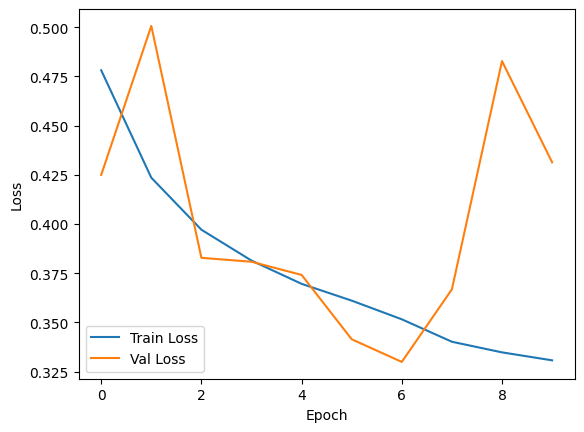

In [8]:
# Plot the loss history
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**4.5 Make predictions and save the result**

In [9]:
import numpy as np
import os
import torch
import pandas as pd
from skimage.io import imread
from torch.utils.data import DataLoader
from torchvision import transforms
import tqdm

model.eval()

test_images_path = '/kaggle/input/histopathologic-cancer-detection/test/'
test_image_files = os.listdir(test_images_path)

batch_size = 32
num_images = len(test_image_files)
predictions = []

test_df = pd.DataFrame([img_file[:-4] for img_file in test_image_files], columns=['id'])

test_df['label'] = 0
transform_test = transforms.Compose([transforms.ToPILImage(), 
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])
test_dataset = ImageDataset(test_df, test_images_path, transform=transform_test)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

image_ids = []

for i, (images, _) in enumerate(tqdm.tqdm(test_dataloader, total=int(len(test_dataloader)))):
    images = images.to(device)
    outputs = model(images)
    
    batch_predictions = outputs[:, 1].detach().cpu().numpy()
    predictions.extend(batch_predictions)
    
    batch_image_ids = [img_name[:-4] for img_name in test_image_files[i * batch_size:(i + 1) * batch_size]]
    image_ids.extend(batch_image_ids)

predictions = np.array(predictions)
binary_predictions = [(p >= 0.5) for p in predictions]
binary_predictions = [1 if p else 0 for p in binary_predictions]

# Create the submission DataFrame using the image_ids and predictions lists
submission_df = pd.DataFrame({'id': image_ids, 'label': predictions})
submission_df = submission_df.replace({'label': {'FALSE': 0, 'TRUE': 1}})

print(f"Total number of predictions: {len(submission_df)}")

  0%|          | 0/1796 [00:00<?, ?it/s]

  0%|          | 1/1796 [00:00<12:35,  2.38it/s]

  0%|          | 2/1796 [00:00<11:04,  2.70it/s]

  0%|          | 3/1796 [00:00<09:20,  3.20it/s]

  0%|          | 4/1796 [00:01<08:42,  3.43it/s]

  0%|          | 5/1796 [00:01<08:23,  3.55it/s]

  0%|          | 6/1796 [00:01<08:24,  3.55it/s]

  0%|          | 7/1796 [00:02<08:05,  3.69it/s]

  0%|          | 8/1796 [00:02<07:52,  3.78it/s]

  1%|          | 9/1796 [00:02<07:50,  3.80it/s]

  1%|          | 10/1796 [00:02<07:42,  3.86it/s]

  1%|          | 11/1796 [00:03<08:01,  3.71it/s]

  1%|          | 12/1796 [00:03<07:48,  3.81it/s]

  1%|          | 13/1796 [00:03<07:38,  3.89it/s]

  1%|          | 14/1796 [00:03<07:38,  3.89it/s]

  1%|          | 15/1796 [00:04<07:49,  3.79it/s]

  1%|          | 16/1796 [00:04<07:41,  3.86it/s]

  1%|          | 17/1796 [00:04<07:38,  3.88it/s]

  1%|          | 18/1796 [00:04<07:34,  3.91it/s]

  1%|          | 19/1796 [00:05<07:40,  3.86it/s]

  1%|          | 20/1796 [00:05<07:37,  3.88it/s]

  1%|          | 21/1796 [00:05<07:56,  3.72it/s]

  1%|          | 22/1796 [00:05<08:06,  3.65it/s]

  1%|▏         | 23/1796 [00:06<08:26,  3.50it/s]

  1%|▏         | 24/1796 [00:06<08:28,  3.49it/s]

  1%|▏         | 25/1796 [00:06<08:45,  3.37it/s]

  1%|▏         | 26/1796 [00:07<09:05,  3.24it/s]

  2%|▏         | 27/1796 [00:07<09:31,  3.10it/s]

  2%|▏         | 28/1796 [00:07<09:47,  3.01it/s]

  2%|▏         | 29/1796 [00:08<09:24,  3.13it/s]

  2%|▏         | 30/1796 [00:08<09:17,  3.17it/s]

  2%|▏         | 31/1796 [00:08<09:09,  3.21it/s]

  2%|▏         | 32/1796 [00:09<09:10,  3.21it/s]

  2%|▏         | 33/1796 [00:09<09:07,  3.22it/s]

  2%|▏         | 34/1796 [00:09<10:44,  2.74it/s]

  2%|▏         | 35/1796 [00:10<10:12,  2.87it/s]

  2%|▏         | 36/1796 [00:10<09:47,  2.99it/s]

  2%|▏         | 37/1796 [00:10<09:38,  3.04it/s]

  2%|▏         | 38/1796 [00:11<09:30,  3.08it/s]

  2%|▏         | 39/1796 [00:11<10:01,  2.92it/s]

  2%|▏         | 40/1796 [00:11<09:43,  3.01it/s]

  2%|▏         | 41/1796 [00:12<09:34,  3.05it/s]

  2%|▏         | 42/1796 [00:12<09:20,  3.13it/s]

  2%|▏         | 43/1796 [00:12<09:47,  2.98it/s]

  2%|▏         | 44/1796 [00:13<09:47,  2.98it/s]

  3%|▎         | 45/1796 [00:13<09:52,  2.96it/s]

  3%|▎         | 46/1796 [00:13<09:28,  3.08it/s]

  3%|▎         | 47/1796 [00:14<09:09,  3.18it/s]

  3%|▎         | 48/1796 [00:14<09:00,  3.24it/s]

  3%|▎         | 49/1796 [00:14<09:02,  3.22it/s]

  3%|▎         | 50/1796 [00:15<09:00,  3.23it/s]

  3%|▎         | 51/1796 [00:15<08:51,  3.28it/s]

  3%|▎         | 52/1796 [00:15<08:47,  3.31it/s]

  3%|▎         | 53/1796 [00:15<08:52,  3.27it/s]

  3%|▎         | 54/1796 [00:16<09:41,  2.99it/s]

  3%|▎         | 55/1796 [00:16<09:28,  3.06it/s]

  3%|▎         | 56/1796 [00:17<09:46,  2.97it/s]

  3%|▎         | 57/1796 [00:17<09:44,  2.98it/s]

  3%|▎         | 58/1796 [00:17<09:37,  3.01it/s]

  3%|▎         | 59/1796 [00:18<09:21,  3.09it/s]

  3%|▎         | 60/1796 [00:18<09:33,  3.02it/s]

  3%|▎         | 61/1796 [00:18<09:41,  2.99it/s]

  3%|▎         | 62/1796 [00:19<10:45,  2.68it/s]

  4%|▎         | 63/1796 [00:19<10:06,  2.86it/s]

  4%|▎         | 64/1796 [00:19<09:36,  3.01it/s]

  4%|▎         | 65/1796 [00:20<09:11,  3.14it/s]

  4%|▎         | 66/1796 [00:20<08:57,  3.22it/s]

  4%|▎         | 67/1796 [00:20<09:08,  3.15it/s]

  4%|▍         | 68/1796 [00:20<09:09,  3.15it/s]

  4%|▍         | 69/1796 [00:21<09:07,  3.16it/s]

  4%|▍         | 70/1796 [00:21<09:47,  2.94it/s]

  4%|▍         | 71/1796 [00:22<09:38,  2.98it/s]

  4%|▍         | 72/1796 [00:22<09:34,  3.00it/s]

  4%|▍         | 73/1796 [00:22<09:11,  3.13it/s]

  4%|▍         | 74/1796 [00:22<08:59,  3.19it/s]

  4%|▍         | 75/1796 [00:23<08:53,  3.23it/s]

  4%|▍         | 76/1796 [00:23<08:47,  3.26it/s]

  4%|▍         | 77/1796 [00:23<08:46,  3.27it/s]

  4%|▍         | 78/1796 [00:24<08:48,  3.25it/s]

  4%|▍         | 79/1796 [00:24<08:57,  3.20it/s]

  4%|▍         | 80/1796 [00:24<08:54,  3.21it/s]

  5%|▍         | 81/1796 [00:25<08:53,  3.22it/s]

  5%|▍         | 82/1796 [00:25<08:50,  3.23it/s]

  5%|▍         | 83/1796 [00:25<08:47,  3.24it/s]

  5%|▍         | 84/1796 [00:25<08:39,  3.30it/s]

  5%|▍         | 85/1796 [00:26<09:09,  3.11it/s]

  5%|▍         | 86/1796 [00:26<09:03,  3.15it/s]

  5%|▍         | 87/1796 [00:26<08:54,  3.20it/s]

  5%|▍         | 88/1796 [00:27<08:56,  3.18it/s]

  5%|▍         | 89/1796 [00:27<08:48,  3.23it/s]

  5%|▌         | 90/1796 [00:27<08:47,  3.24it/s]

  5%|▌         | 91/1796 [00:28<08:56,  3.18it/s]

  5%|▌         | 92/1796 [00:28<08:48,  3.22it/s]

  5%|▌         | 93/1796 [00:28<08:43,  3.25it/s]

  5%|▌         | 94/1796 [00:29<08:30,  3.33it/s]

  5%|▌         | 95/1796 [00:29<08:27,  3.35it/s]

  5%|▌         | 96/1796 [00:29<08:28,  3.34it/s]

  5%|▌         | 97/1796 [00:29<08:26,  3.36it/s]

  5%|▌         | 98/1796 [00:30<08:27,  3.35it/s]

  6%|▌         | 99/1796 [00:30<08:21,  3.38it/s]

  6%|▌         | 100/1796 [00:30<08:21,  3.38it/s]

  6%|▌         | 101/1796 [00:31<08:21,  3.38it/s]

  6%|▌         | 102/1796 [00:31<08:26,  3.34it/s]

  6%|▌         | 103/1796 [00:31<08:28,  3.33it/s]

  6%|▌         | 104/1796 [00:32<08:23,  3.36it/s]

  6%|▌         | 105/1796 [00:32<08:21,  3.38it/s]

  6%|▌         | 106/1796 [00:32<08:15,  3.41it/s]

  6%|▌         | 107/1796 [00:32<08:12,  3.43it/s]

  6%|▌         | 108/1796 [00:33<08:10,  3.44it/s]

  6%|▌         | 109/1796 [00:33<08:13,  3.42it/s]

  6%|▌         | 110/1796 [00:33<08:08,  3.45it/s]

  6%|▌         | 111/1796 [00:34<08:05,  3.47it/s]

  6%|▌         | 112/1796 [00:34<08:48,  3.18it/s]

  6%|▋         | 113/1796 [00:34<08:39,  3.24it/s]

  6%|▋         | 114/1796 [00:35<09:01,  3.11it/s]

  6%|▋         | 115/1796 [00:35<08:50,  3.17it/s]

  6%|▋         | 116/1796 [00:35<08:36,  3.25it/s]

  7%|▋         | 117/1796 [00:36<08:32,  3.27it/s]

  7%|▋         | 118/1796 [00:36<09:25,  2.97it/s]

  7%|▋         | 119/1796 [00:36<09:07,  3.06it/s]

  7%|▋         | 120/1796 [00:37<09:12,  3.03it/s]

  7%|▋         | 121/1796 [00:37<11:06,  2.51it/s]

  7%|▋         | 122/1796 [00:38<13:59,  1.99it/s]

  7%|▋         | 123/1796 [00:38<13:19,  2.09it/s]

  7%|▋         | 124/1796 [00:39<11:53,  2.34it/s]

  7%|▋         | 125/1796 [00:39<10:45,  2.59it/s]

  7%|▋         | 126/1796 [00:39<09:54,  2.81it/s]

  7%|▋         | 127/1796 [00:39<09:20,  2.98it/s]

  7%|▋         | 128/1796 [00:40<09:00,  3.09it/s]

  7%|▋         | 129/1796 [00:40<08:43,  3.19it/s]

  7%|▋         | 130/1796 [00:40<08:33,  3.25it/s]

  7%|▋         | 131/1796 [00:41<08:19,  3.34it/s]

  7%|▋         | 132/1796 [00:41<08:16,  3.35it/s]

  7%|▋         | 133/1796 [00:41<08:07,  3.41it/s]

  7%|▋         | 134/1796 [00:41<08:04,  3.43it/s]

  8%|▊         | 135/1796 [00:42<08:02,  3.44it/s]

  8%|▊         | 136/1796 [00:42<07:57,  3.48it/s]

  8%|▊         | 137/1796 [00:42<08:12,  3.37it/s]

  8%|▊         | 138/1796 [00:43<08:16,  3.34it/s]

  8%|▊         | 139/1796 [00:43<08:14,  3.35it/s]

  8%|▊         | 140/1796 [00:43<08:05,  3.41it/s]

  8%|▊         | 141/1796 [00:44<08:02,  3.43it/s]

  8%|▊         | 142/1796 [00:44<07:55,  3.48it/s]

  8%|▊         | 143/1796 [00:44<08:00,  3.44it/s]

  8%|▊         | 144/1796 [00:44<08:11,  3.36it/s]

  8%|▊         | 145/1796 [00:45<08:25,  3.27it/s]

  8%|▊         | 146/1796 [00:45<08:19,  3.31it/s]

  8%|▊         | 147/1796 [00:45<08:17,  3.32it/s]

  8%|▊         | 148/1796 [00:46<08:42,  3.15it/s]

  8%|▊         | 149/1796 [00:46<09:07,  3.01it/s]

  8%|▊         | 150/1796 [00:46<09:14,  2.97it/s]

  8%|▊         | 151/1796 [00:47<08:59,  3.05it/s]

  8%|▊         | 152/1796 [00:47<08:45,  3.13it/s]

  9%|▊         | 153/1796 [00:47<08:34,  3.19it/s]

  9%|▊         | 154/1796 [00:48<08:22,  3.27it/s]

  9%|▊         | 155/1796 [00:48<08:19,  3.28it/s]

  9%|▊         | 156/1796 [00:48<08:14,  3.31it/s]

  9%|▊         | 157/1796 [00:49<08:14,  3.31it/s]

  9%|▉         | 158/1796 [00:49<08:19,  3.28it/s]

  9%|▉         | 159/1796 [00:49<08:13,  3.32it/s]

  9%|▉         | 160/1796 [00:49<08:09,  3.34it/s]

  9%|▉         | 161/1796 [00:50<08:10,  3.33it/s]

  9%|▉         | 162/1796 [00:50<08:06,  3.36it/s]

  9%|▉         | 163/1796 [00:50<08:00,  3.40it/s]

  9%|▉         | 164/1796 [00:51<07:51,  3.46it/s]

  9%|▉         | 165/1796 [00:51<07:55,  3.43it/s]

  9%|▉         | 166/1796 [00:51<07:57,  3.41it/s]

  9%|▉         | 167/1796 [00:51<07:46,  3.49it/s]

  9%|▉         | 168/1796 [00:52<07:50,  3.46it/s]

  9%|▉         | 169/1796 [00:52<07:51,  3.45it/s]

  9%|▉         | 170/1796 [00:52<07:49,  3.46it/s]

 10%|▉         | 171/1796 [00:53<07:46,  3.49it/s]

 10%|▉         | 172/1796 [00:53<07:49,  3.46it/s]

 10%|▉         | 173/1796 [00:53<07:52,  3.43it/s]

 10%|▉         | 174/1796 [00:53<07:47,  3.47it/s]

 10%|▉         | 175/1796 [00:54<07:45,  3.48it/s]

 10%|▉         | 176/1796 [00:54<07:40,  3.52it/s]

 10%|▉         | 177/1796 [00:54<07:50,  3.44it/s]

 10%|▉         | 178/1796 [00:55<07:48,  3.46it/s]

 10%|▉         | 179/1796 [00:55<07:54,  3.41it/s]

 10%|█         | 180/1796 [00:55<07:56,  3.39it/s]

 10%|█         | 181/1796 [00:56<07:55,  3.40it/s]

 10%|█         | 182/1796 [00:56<07:49,  3.44it/s]

 10%|█         | 183/1796 [00:56<07:50,  3.43it/s]

 10%|█         | 184/1796 [00:56<07:48,  3.44it/s]

 10%|█         | 185/1796 [00:57<07:50,  3.43it/s]

 10%|█         | 186/1796 [00:57<07:48,  3.44it/s]

 10%|█         | 187/1796 [00:57<07:48,  3.43it/s]

 10%|█         | 188/1796 [00:58<08:20,  3.21it/s]

 11%|█         | 189/1796 [00:58<08:18,  3.22it/s]

 11%|█         | 190/1796 [00:58<08:40,  3.09it/s]

 11%|█         | 191/1796 [00:59<08:38,  3.10it/s]

 11%|█         | 192/1796 [00:59<08:45,  3.05it/s]

 11%|█         | 193/1796 [00:59<08:41,  3.07it/s]

 11%|█         | 194/1796 [01:00<08:36,  3.10it/s]

 11%|█         | 195/1796 [01:00<08:19,  3.20it/s]

 11%|█         | 196/1796 [01:00<08:08,  3.28it/s]

 11%|█         | 197/1796 [01:00<08:12,  3.25it/s]

 11%|█         | 198/1796 [01:01<08:08,  3.27it/s]

 11%|█         | 199/1796 [01:01<08:50,  3.01it/s]

 11%|█         | 200/1796 [01:01<08:31,  3.12it/s]

 11%|█         | 201/1796 [01:02<08:16,  3.21it/s]

 11%|█         | 202/1796 [01:02<08:11,  3.25it/s]

 11%|█▏        | 203/1796 [01:02<07:59,  3.32it/s]

 11%|█▏        | 204/1796 [01:03<07:50,  3.38it/s]

 11%|█▏        | 205/1796 [01:03<07:46,  3.41it/s]

 11%|█▏        | 206/1796 [01:03<07:47,  3.40it/s]

 12%|█▏        | 207/1796 [01:03<07:46,  3.40it/s]

 12%|█▏        | 208/1796 [01:04<07:43,  3.42it/s]

 12%|█▏        | 209/1796 [01:04<07:40,  3.45it/s]

 12%|█▏        | 210/1796 [01:04<07:44,  3.42it/s]

 12%|█▏        | 211/1796 [01:05<07:47,  3.39it/s]

 12%|█▏        | 212/1796 [01:05<07:46,  3.39it/s]

 12%|█▏        | 213/1796 [01:05<07:43,  3.41it/s]

 12%|█▏        | 214/1796 [01:06<07:45,  3.40it/s]

 12%|█▏        | 215/1796 [01:06<07:50,  3.36it/s]

 12%|█▏        | 216/1796 [01:06<07:43,  3.41it/s]

 12%|█▏        | 217/1796 [01:06<07:45,  3.39it/s]

 12%|█▏        | 218/1796 [01:07<07:47,  3.38it/s]

 12%|█▏        | 219/1796 [01:07<07:45,  3.39it/s]

 12%|█▏        | 220/1796 [01:07<07:34,  3.47it/s]

 12%|█▏        | 221/1796 [01:08<07:27,  3.52it/s]

 12%|█▏        | 222/1796 [01:08<07:27,  3.51it/s]

 12%|█▏        | 223/1796 [01:08<07:29,  3.50it/s]

 12%|█▏        | 224/1796 [01:08<07:36,  3.44it/s]

 13%|█▎        | 225/1796 [01:09<08:03,  3.25it/s]

 13%|█▎        | 226/1796 [01:09<08:07,  3.22it/s]

 13%|█▎        | 227/1796 [01:09<08:06,  3.22it/s]

 13%|█▎        | 228/1796 [01:10<08:09,  3.20it/s]

 13%|█▎        | 229/1796 [01:10<08:09,  3.20it/s]

 13%|█▎        | 230/1796 [01:10<08:04,  3.23it/s]

 13%|█▎        | 231/1796 [01:11<07:56,  3.28it/s]

 13%|█▎        | 232/1796 [01:11<08:05,  3.22it/s]

 13%|█▎        | 233/1796 [01:11<08:03,  3.23it/s]

 13%|█▎        | 234/1796 [01:12<08:04,  3.22it/s]

 13%|█▎        | 235/1796 [01:12<07:58,  3.26it/s]

 13%|█▎        | 236/1796 [01:12<08:10,  3.18it/s]

 13%|█▎        | 237/1796 [01:12<07:58,  3.26it/s]

 13%|█▎        | 238/1796 [01:13<07:48,  3.32it/s]

 13%|█▎        | 239/1796 [01:13<07:44,  3.35it/s]

 13%|█▎        | 240/1796 [01:13<07:37,  3.40it/s]

 13%|█▎        | 241/1796 [01:14<07:29,  3.46it/s]

 13%|█▎        | 242/1796 [01:14<07:29,  3.45it/s]

 14%|█▎        | 243/1796 [01:14<07:25,  3.48it/s]

 14%|█▎        | 244/1796 [01:15<07:30,  3.45it/s]

 14%|█▎        | 245/1796 [01:15<08:08,  3.17it/s]

 14%|█▎        | 246/1796 [01:15<08:25,  3.06it/s]

 14%|█▍        | 247/1796 [01:16<08:59,  2.87it/s]

 14%|█▍        | 248/1796 [01:16<08:44,  2.95it/s]

 14%|█▍        | 249/1796 [01:16<08:43,  2.96it/s]

 14%|█▍        | 250/1796 [01:17<08:34,  3.01it/s]

 14%|█▍        | 251/1796 [01:17<10:24,  2.48it/s]

 14%|█▍        | 252/1796 [01:17<09:42,  2.65it/s]

 14%|█▍        | 253/1796 [01:18<09:07,  2.82it/s]

 14%|█▍        | 254/1796 [01:18<09:08,  2.81it/s]

 14%|█▍        | 255/1796 [01:19<09:19,  2.75it/s]

 14%|█▍        | 256/1796 [01:19<08:52,  2.89it/s]

 14%|█▍        | 257/1796 [01:19<08:54,  2.88it/s]

 14%|█▍        | 258/1796 [01:20<08:46,  2.92it/s]

 14%|█▍        | 259/1796 [01:20<08:29,  3.02it/s]

 14%|█▍        | 260/1796 [01:20<08:30,  3.01it/s]

 15%|█▍        | 261/1796 [01:20<08:24,  3.04it/s]

 15%|█▍        | 262/1796 [01:21<09:05,  2.81it/s]

 15%|█▍        | 263/1796 [01:21<08:52,  2.88it/s]

 15%|█▍        | 264/1796 [01:22<08:29,  3.01it/s]

 15%|█▍        | 265/1796 [01:22<08:10,  3.12it/s]

 15%|█▍        | 266/1796 [01:22<07:59,  3.19it/s]

 15%|█▍        | 267/1796 [01:22<07:54,  3.22it/s]

 15%|█▍        | 268/1796 [01:23<07:47,  3.27it/s]

 15%|█▍        | 269/1796 [01:23<07:39,  3.33it/s]

 15%|█▌        | 270/1796 [01:23<07:37,  3.34it/s]

 15%|█▌        | 271/1796 [01:24<07:34,  3.36it/s]

 15%|█▌        | 272/1796 [01:24<07:33,  3.36it/s]

 15%|█▌        | 273/1796 [01:24<07:29,  3.39it/s]

 15%|█▌        | 274/1796 [01:25<09:47,  2.59it/s]

 15%|█▌        | 275/1796 [01:25<09:04,  2.79it/s]

 15%|█▌        | 276/1796 [01:26<11:07,  2.28it/s]

 15%|█▌        | 277/1796 [01:26<10:14,  2.47it/s]

 15%|█▌        | 278/1796 [01:26<09:40,  2.61it/s]

 16%|█▌        | 279/1796 [01:27<11:57,  2.11it/s]

 16%|█▌        | 280/1796 [01:27<10:54,  2.32it/s]

 16%|█▌        | 281/1796 [01:28<09:58,  2.53it/s]

 16%|█▌        | 282/1796 [01:28<09:06,  2.77it/s]

 16%|█▌        | 283/1796 [01:28<08:32,  2.95it/s]

 16%|█▌        | 284/1796 [01:29<08:06,  3.11it/s]

 16%|█▌        | 285/1796 [01:29<07:52,  3.20it/s]

 16%|█▌        | 286/1796 [01:29<07:40,  3.28it/s]

 16%|█▌        | 287/1796 [01:29<07:38,  3.29it/s]

 16%|█▌        | 288/1796 [01:30<07:32,  3.34it/s]

 16%|█▌        | 289/1796 [01:30<10:46,  2.33it/s]

 16%|█▌        | 290/1796 [01:31<09:57,  2.52it/s]

 16%|█▌        | 291/1796 [01:31<09:05,  2.76it/s]

 16%|█▋        | 292/1796 [01:31<08:26,  2.97it/s]

 16%|█▋        | 293/1796 [01:32<07:58,  3.14it/s]

 16%|█▋        | 294/1796 [01:32<07:41,  3.26it/s]

 16%|█▋        | 295/1796 [01:32<07:30,  3.33it/s]

 16%|█▋        | 296/1796 [01:32<07:19,  3.41it/s]

 17%|█▋        | 297/1796 [01:33<07:21,  3.40it/s]

 17%|█▋        | 298/1796 [01:33<07:20,  3.40it/s]

 17%|█▋        | 299/1796 [01:33<07:19,  3.40it/s]

 17%|█▋        | 300/1796 [01:34<07:21,  3.39it/s]

 17%|█▋        | 301/1796 [01:34<07:22,  3.38it/s]

 17%|█▋        | 302/1796 [01:34<07:15,  3.43it/s]

 17%|█▋        | 303/1796 [01:34<07:15,  3.43it/s]

 17%|█▋        | 304/1796 [01:35<07:16,  3.42it/s]

 17%|█▋        | 305/1796 [01:35<07:14,  3.43it/s]

 17%|█▋        | 306/1796 [01:35<07:14,  3.43it/s]

 17%|█▋        | 307/1796 [01:36<08:25,  2.95it/s]

 17%|█▋        | 308/1796 [01:37<11:31,  2.15it/s]

 17%|█▋        | 309/1796 [01:37<10:15,  2.41it/s]

 17%|█▋        | 310/1796 [01:37<09:21,  2.65it/s]

 17%|█▋        | 311/1796 [01:37<08:42,  2.84it/s]

 17%|█▋        | 312/1796 [01:38<08:11,  3.02it/s]

 17%|█▋        | 313/1796 [01:39<11:53,  2.08it/s]

 17%|█▋        | 314/1796 [01:39<13:51,  1.78it/s]

 18%|█▊        | 315/1796 [01:40<15:09,  1.63it/s]

 18%|█▊        | 316/1796 [01:41<16:48,  1.47it/s]

 18%|█▊        | 317/1796 [01:42<18:11,  1.36it/s]

 18%|█▊        | 318/1796 [01:43<20:58,  1.17it/s]

 18%|█▊        | 319/1796 [01:44<21:15,  1.16it/s]

 18%|█▊        | 320/1796 [01:45<21:31,  1.14it/s]

 18%|█▊        | 321/1796 [01:46<21:25,  1.15it/s]

 18%|█▊        | 322/1796 [01:46<19:51,  1.24it/s]

 18%|█▊        | 323/1796 [01:47<16:24,  1.50it/s]

 18%|█▊        | 324/1796 [01:47<14:00,  1.75it/s]

 18%|█▊        | 325/1796 [01:47<12:01,  2.04it/s]

 18%|█▊        | 326/1796 [01:47<10:36,  2.31it/s]

 18%|█▊        | 327/1796 [01:48<09:40,  2.53it/s]

 18%|█▊        | 328/1796 [01:48<08:56,  2.74it/s]

 18%|█▊        | 329/1796 [01:48<08:22,  2.92it/s]

 18%|█▊        | 330/1796 [01:49<08:04,  3.03it/s]

 18%|█▊        | 331/1796 [01:49<07:52,  3.10it/s]

 18%|█▊        | 332/1796 [01:49<07:38,  3.19it/s]

 19%|█▊        | 333/1796 [01:50<07:32,  3.23it/s]

 19%|█▊        | 334/1796 [01:50<07:27,  3.27it/s]

 19%|█▊        | 335/1796 [01:50<07:22,  3.30it/s]

 19%|█▊        | 336/1796 [01:50<07:21,  3.30it/s]

 19%|█▉        | 337/1796 [01:51<07:21,  3.30it/s]

 19%|█▉        | 338/1796 [01:51<07:19,  3.32it/s]

 19%|█▉        | 339/1796 [01:51<07:15,  3.35it/s]

 19%|█▉        | 340/1796 [01:52<07:10,  3.38it/s]

 19%|█▉        | 341/1796 [01:52<07:06,  3.41it/s]

 19%|█▉        | 342/1796 [01:52<07:05,  3.42it/s]

 19%|█▉        | 343/1796 [01:53<07:05,  3.42it/s]

 19%|█▉        | 344/1796 [01:53<07:33,  3.20it/s]

 19%|█▉        | 345/1796 [01:53<07:34,  3.19it/s]

 19%|█▉        | 346/1796 [01:53<07:31,  3.21it/s]

 19%|█▉        | 347/1796 [01:54<07:57,  3.04it/s]

 19%|█▉        | 348/1796 [01:54<07:52,  3.07it/s]

 19%|█▉        | 349/1796 [01:55<07:46,  3.10it/s]

 19%|█▉        | 350/1796 [01:55<07:39,  3.15it/s]

 20%|█▉        | 351/1796 [01:55<07:33,  3.19it/s]

 20%|█▉        | 352/1796 [01:56<08:12,  2.93it/s]

 20%|█▉        | 353/1796 [01:56<08:07,  2.96it/s]

 20%|█▉        | 354/1796 [01:56<08:31,  2.82it/s]

 20%|█▉        | 355/1796 [01:57<08:17,  2.89it/s]

 20%|█▉        | 356/1796 [01:57<08:24,  2.85it/s]

 20%|█▉        | 357/1796 [01:57<08:49,  2.72it/s]

 20%|█▉        | 358/1796 [01:58<08:29,  2.82it/s]

 20%|█▉        | 359/1796 [01:58<08:12,  2.92it/s]

 20%|██        | 360/1796 [01:58<07:54,  3.03it/s]

 20%|██        | 361/1796 [01:59<07:38,  3.13it/s]

 20%|██        | 362/1796 [01:59<07:30,  3.18it/s]

 20%|██        | 363/1796 [01:59<07:19,  3.26it/s]

 20%|██        | 364/1796 [01:59<07:20,  3.25it/s]

 20%|██        | 365/1796 [02:00<07:20,  3.25it/s]

 20%|██        | 366/1796 [02:00<07:11,  3.31it/s]

 20%|██        | 367/1796 [02:00<07:12,  3.30it/s]

 20%|██        | 368/1796 [02:01<07:13,  3.29it/s]

 21%|██        | 369/1796 [02:01<07:12,  3.30it/s]

 21%|██        | 370/1796 [02:01<07:05,  3.35it/s]

 21%|██        | 371/1796 [02:02<07:09,  3.32it/s]

 21%|██        | 372/1796 [02:02<07:08,  3.32it/s]

 21%|██        | 373/1796 [02:02<07:07,  3.33it/s]

 21%|██        | 374/1796 [02:02<07:07,  3.33it/s]

 21%|██        | 375/1796 [02:03<07:02,  3.36it/s]

 21%|██        | 376/1796 [02:03<07:00,  3.38it/s]

 21%|██        | 377/1796 [02:03<07:02,  3.36it/s]

 21%|██        | 378/1796 [02:04<06:58,  3.39it/s]

 21%|██        | 379/1796 [02:04<07:44,  3.05it/s]

 21%|██        | 380/1796 [02:05<12:01,  1.96it/s]

 21%|██        | 381/1796 [02:06<14:59,  1.57it/s]

 21%|██▏       | 382/1796 [02:07<14:46,  1.60it/s]

 21%|██▏       | 383/1796 [02:07<12:38,  1.86it/s]

 21%|██▏       | 384/1796 [02:07<10:53,  2.16it/s]

 21%|██▏       | 385/1796 [02:07<09:41,  2.42it/s]

 21%|██▏       | 386/1796 [02:08<08:48,  2.67it/s]

 22%|██▏       | 387/1796 [02:08<08:14,  2.85it/s]

 22%|██▏       | 388/1796 [02:08<07:52,  2.98it/s]

 22%|██▏       | 389/1796 [02:09<07:46,  3.02it/s]

 22%|██▏       | 390/1796 [02:09<07:44,  3.03it/s]

 22%|██▏       | 391/1796 [02:10<10:40,  2.19it/s]

 22%|██▏       | 392/1796 [02:11<14:20,  1.63it/s]

 22%|██▏       | 393/1796 [02:11<15:24,  1.52it/s]

 22%|██▏       | 394/1796 [02:12<17:06,  1.37it/s]

 22%|██▏       | 395/1796 [02:13<18:48,  1.24it/s]

 22%|██▏       | 396/1796 [02:14<19:00,  1.23it/s]

 22%|██▏       | 397/1796 [02:15<19:56,  1.17it/s]

 22%|██▏       | 398/1796 [02:16<20:35,  1.13it/s]

 22%|██▏       | 399/1796 [02:17<20:35,  1.13it/s]

 22%|██▏       | 400/1796 [02:18<19:40,  1.18it/s]

 22%|██▏       | 401/1796 [02:18<15:49,  1.47it/s]

 22%|██▏       | 402/1796 [02:18<13:37,  1.71it/s]

 22%|██▏       | 403/1796 [02:19<11:45,  1.97it/s]

 22%|██▏       | 404/1796 [02:19<10:19,  2.25it/s]

 23%|██▎       | 405/1796 [02:19<09:10,  2.53it/s]

 23%|██▎       | 406/1796 [02:20<08:24,  2.76it/s]

 23%|██▎       | 407/1796 [02:20<07:50,  2.95it/s]

 23%|██▎       | 408/1796 [02:20<07:23,  3.13it/s]

 23%|██▎       | 409/1796 [02:20<07:07,  3.25it/s]

 23%|██▎       | 410/1796 [02:21<07:02,  3.28it/s]

 23%|██▎       | 411/1796 [02:21<07:07,  3.24it/s]

 23%|██▎       | 412/1796 [02:21<07:02,  3.27it/s]

 23%|██▎       | 413/1796 [02:22<06:55,  3.33it/s]

 23%|██▎       | 414/1796 [02:22<06:51,  3.36it/s]

 23%|██▎       | 415/1796 [02:22<06:48,  3.38it/s]

 23%|██▎       | 416/1796 [02:22<06:45,  3.40it/s]

 23%|██▎       | 417/1796 [02:23<06:47,  3.39it/s]

 23%|██▎       | 418/1796 [02:23<06:57,  3.30it/s]

 23%|██▎       | 419/1796 [02:23<06:49,  3.37it/s]

 23%|██▎       | 420/1796 [02:24<06:48,  3.37it/s]

 23%|██▎       | 421/1796 [02:24<07:18,  3.13it/s]

 23%|██▎       | 422/1796 [02:24<08:01,  2.85it/s]

 24%|██▎       | 423/1796 [02:25<07:45,  2.95it/s]

 24%|██▎       | 424/1796 [02:25<07:50,  2.92it/s]

 24%|██▎       | 425/1796 [02:25<07:35,  3.01it/s]

 24%|██▎       | 426/1796 [02:26<07:30,  3.04it/s]

 24%|██▍       | 427/1796 [02:26<07:44,  2.95it/s]

 24%|██▍       | 428/1796 [02:26<07:51,  2.90it/s]

 24%|██▍       | 429/1796 [02:27<08:11,  2.78it/s]

 24%|██▍       | 430/1796 [02:28<12:12,  1.87it/s]

 24%|██▍       | 431/1796 [02:28<12:15,  1.86it/s]

 24%|██▍       | 432/1796 [02:29<10:36,  2.14it/s]

 24%|██▍       | 433/1796 [02:29<12:42,  1.79it/s]

 24%|██▍       | 434/1796 [02:30<14:13,  1.60it/s]

 24%|██▍       | 435/1796 [02:31<15:47,  1.44it/s]

 24%|██▍       | 436/1796 [02:31<13:16,  1.71it/s]

 24%|██▍       | 437/1796 [02:32<11:30,  1.97it/s]

 24%|██▍       | 438/1796 [02:32<10:09,  2.23it/s]

 24%|██▍       | 439/1796 [02:32<09:16,  2.44it/s]

 24%|██▍       | 440/1796 [02:33<08:27,  2.67it/s]

 25%|██▍       | 441/1796 [02:33<07:51,  2.87it/s]

 25%|██▍       | 442/1796 [02:33<07:28,  3.02it/s]

 25%|██▍       | 443/1796 [02:34<07:14,  3.11it/s]

 25%|██▍       | 444/1796 [02:34<07:02,  3.20it/s]

 25%|██▍       | 445/1796 [02:34<06:53,  3.27it/s]

 25%|██▍       | 446/1796 [02:34<06:52,  3.27it/s]

 25%|██▍       | 447/1796 [02:35<06:51,  3.27it/s]

 25%|██▍       | 448/1796 [02:35<06:44,  3.33it/s]

 25%|██▌       | 449/1796 [02:35<06:44,  3.33it/s]

 25%|██▌       | 450/1796 [02:36<06:44,  3.33it/s]

 25%|██▌       | 451/1796 [02:36<06:46,  3.31it/s]

 25%|██▌       | 452/1796 [02:36<06:48,  3.29it/s]

 25%|██▌       | 453/1796 [02:37<06:46,  3.30it/s]

 25%|██▌       | 454/1796 [02:37<06:42,  3.33it/s]

 25%|██▌       | 455/1796 [02:37<06:42,  3.33it/s]

 25%|██▌       | 456/1796 [02:37<06:50,  3.27it/s]

 25%|██▌       | 457/1796 [02:38<06:41,  3.33it/s]

 26%|██▌       | 458/1796 [02:38<06:38,  3.36it/s]

 26%|██▌       | 459/1796 [02:38<06:37,  3.37it/s]

 26%|██▌       | 460/1796 [02:39<06:37,  3.36it/s]

 26%|██▌       | 461/1796 [02:39<06:44,  3.30it/s]

 26%|██▌       | 462/1796 [02:39<06:40,  3.33it/s]

 26%|██▌       | 463/1796 [02:40<06:39,  3.33it/s]

 26%|██▌       | 464/1796 [02:40<06:41,  3.32it/s]

 26%|██▌       | 465/1796 [02:40<06:37,  3.35it/s]

 26%|██▌       | 466/1796 [02:40<06:32,  3.39it/s]

 26%|██▌       | 467/1796 [02:41<06:43,  3.30it/s]

 26%|██▌       | 468/1796 [02:41<06:44,  3.28it/s]

 26%|██▌       | 469/1796 [02:41<06:36,  3.35it/s]

 26%|██▌       | 470/1796 [02:42<06:38,  3.33it/s]

 26%|██▌       | 471/1796 [02:42<06:35,  3.35it/s]

 26%|██▋       | 472/1796 [02:42<06:37,  3.33it/s]

 26%|██▋       | 473/1796 [02:43<06:43,  3.28it/s]

 26%|██▋       | 474/1796 [02:43<08:11,  2.69it/s]

 26%|██▋       | 475/1796 [02:44<10:30,  2.10it/s]

 27%|██▋       | 476/1796 [02:44<09:18,  2.36it/s]

 27%|██▋       | 477/1796 [02:44<08:34,  2.57it/s]

 27%|██▋       | 478/1796 [02:45<07:51,  2.80it/s]

 27%|██▋       | 479/1796 [02:45<07:22,  2.98it/s]

 27%|██▋       | 480/1796 [02:46<08:46,  2.50it/s]

 27%|██▋       | 481/1796 [02:46<11:19,  1.93it/s]

 27%|██▋       | 482/1796 [02:47<10:06,  2.17it/s]

 27%|██▋       | 483/1796 [02:47<09:09,  2.39it/s]

 27%|██▋       | 484/1796 [02:47<08:22,  2.61it/s]

 27%|██▋       | 485/1796 [02:48<07:48,  2.80it/s]

 27%|██▋       | 486/1796 [02:48<08:01,  2.72it/s]

 27%|██▋       | 487/1796 [02:49<11:20,  1.92it/s]

 27%|██▋       | 488/1796 [02:50<13:16,  1.64it/s]

 27%|██▋       | 489/1796 [02:51<14:51,  1.47it/s]

 27%|██▋       | 490/1796 [02:51<16:00,  1.36it/s]

 27%|██▋       | 491/1796 [02:52<16:53,  1.29it/s]

 27%|██▋       | 492/1796 [02:53<17:23,  1.25it/s]

 27%|██▋       | 493/1796 [02:54<17:44,  1.22it/s]

 28%|██▊       | 494/1796 [02:55<18:04,  1.20it/s]

 28%|██▊       | 495/1796 [02:56<17:49,  1.22it/s]

 28%|██▊       | 496/1796 [02:56<17:41,  1.22it/s]

 28%|██▊       | 497/1796 [02:57<17:34,  1.23it/s]

 28%|██▊       | 498/1796 [02:58<17:15,  1.25it/s]

 28%|██▊       | 499/1796 [02:59<16:38,  1.30it/s]

 28%|██▊       | 500/1796 [02:59<14:42,  1.47it/s]

 28%|██▊       | 501/1796 [02:59<12:10,  1.77it/s]

 28%|██▊       | 502/1796 [03:00<10:30,  2.05it/s]

 28%|██▊       | 503/1796 [03:00<09:22,  2.30it/s]

 28%|██▊       | 504/1796 [03:00<08:28,  2.54it/s]

 28%|██▊       | 505/1796 [03:01<07:47,  2.76it/s]

 28%|██▊       | 506/1796 [03:01<07:20,  2.93it/s]

 28%|██▊       | 507/1796 [03:01<06:59,  3.07it/s]

 28%|██▊       | 508/1796 [03:02<06:44,  3.19it/s]

 28%|██▊       | 509/1796 [03:02<06:34,  3.27it/s]

 28%|██▊       | 510/1796 [03:02<06:31,  3.29it/s]

 28%|██▊       | 511/1796 [03:02<06:22,  3.36it/s]

 29%|██▊       | 512/1796 [03:03<06:18,  3.39it/s]

 29%|██▊       | 513/1796 [03:03<06:17,  3.40it/s]

 29%|██▊       | 514/1796 [03:03<06:18,  3.39it/s]

 29%|██▊       | 515/1796 [03:04<06:17,  3.40it/s]

 29%|██▊       | 516/1796 [03:04<06:14,  3.42it/s]

 29%|██▉       | 517/1796 [03:04<06:14,  3.42it/s]

 29%|██▉       | 518/1796 [03:04<06:19,  3.37it/s]

 29%|██▉       | 519/1796 [03:05<06:21,  3.35it/s]

 29%|██▉       | 520/1796 [03:05<06:15,  3.40it/s]

 29%|██▉       | 521/1796 [03:05<06:14,  3.40it/s]

 29%|██▉       | 522/1796 [03:06<06:12,  3.42it/s]

 29%|██▉       | 523/1796 [03:06<06:21,  3.34it/s]

 29%|██▉       | 524/1796 [03:06<06:29,  3.27it/s]

 29%|██▉       | 525/1796 [03:07<06:25,  3.30it/s]

 29%|██▉       | 526/1796 [03:07<06:20,  3.34it/s]

 29%|██▉       | 527/1796 [03:07<06:19,  3.34it/s]

 29%|██▉       | 528/1796 [03:07<06:18,  3.35it/s]

 29%|██▉       | 529/1796 [03:08<06:15,  3.38it/s]

 30%|██▉       | 530/1796 [03:08<06:17,  3.35it/s]

 30%|██▉       | 531/1796 [03:08<06:18,  3.34it/s]

 30%|██▉       | 532/1796 [03:09<06:20,  3.32it/s]

 30%|██▉       | 533/1796 [03:09<06:22,  3.30it/s]

 30%|██▉       | 534/1796 [03:09<06:29,  3.24it/s]

 30%|██▉       | 535/1796 [03:10<06:55,  3.03it/s]

 30%|██▉       | 536/1796 [03:10<09:27,  2.22it/s]

 30%|██▉       | 537/1796 [03:11<10:54,  1.92it/s]

 30%|██▉       | 538/1796 [03:12<12:21,  1.70it/s]

 30%|███       | 539/1796 [03:13<13:43,  1.53it/s]

 30%|███       | 540/1796 [03:13<13:48,  1.52it/s]

 30%|███       | 541/1796 [03:14<13:32,  1.54it/s]

 30%|███       | 542/1796 [03:14<11:20,  1.84it/s]

 30%|███       | 543/1796 [03:15<09:47,  2.13it/s]

 30%|███       | 544/1796 [03:15<08:46,  2.38it/s]

 30%|███       | 545/1796 [03:15<07:57,  2.62it/s]

 30%|███       | 546/1796 [03:15<07:21,  2.83it/s]

 30%|███       | 547/1796 [03:16<06:56,  3.00it/s]

 31%|███       | 548/1796 [03:16<06:40,  3.12it/s]

 31%|███       | 549/1796 [03:16<06:34,  3.16it/s]

 31%|███       | 550/1796 [03:17<06:25,  3.23it/s]

 31%|███       | 551/1796 [03:17<06:18,  3.29it/s]

 31%|███       | 552/1796 [03:17<06:17,  3.30it/s]

 31%|███       | 553/1796 [03:17<06:09,  3.37it/s]

 31%|███       | 554/1796 [03:18<06:01,  3.44it/s]

 31%|███       | 555/1796 [03:18<05:57,  3.47it/s]

 31%|███       | 556/1796 [03:18<05:55,  3.48it/s]

 31%|███       | 557/1796 [03:19<05:56,  3.48it/s]

 31%|███       | 558/1796 [03:19<05:58,  3.46it/s]

 31%|███       | 559/1796 [03:19<05:58,  3.45it/s]

 31%|███       | 560/1796 [03:20<08:54,  2.31it/s]

 31%|███       | 561/1796 [03:21<11:41,  1.76it/s]

 31%|███▏      | 562/1796 [03:22<13:08,  1.57it/s]

 31%|███▏      | 563/1796 [03:22<13:51,  1.48it/s]

 31%|███▏      | 564/1796 [03:23<14:35,  1.41it/s]

 31%|███▏      | 565/1796 [03:24<14:57,  1.37it/s]

 32%|███▏      | 566/1796 [03:25<15:32,  1.32it/s]

 32%|███▏      | 567/1796 [03:26<16:06,  1.27it/s]

 32%|███▏      | 568/1796 [03:26<15:27,  1.32it/s]

 32%|███▏      | 569/1796 [03:27<15:11,  1.35it/s]

 32%|███▏      | 570/1796 [03:28<15:09,  1.35it/s]

 32%|███▏      | 571/1796 [03:28<14:59,  1.36it/s]

 32%|███▏      | 572/1796 [03:29<13:28,  1.51it/s]

 32%|███▏      | 573/1796 [03:29<11:20,  1.80it/s]

 32%|███▏      | 574/1796 [03:30<09:41,  2.10it/s]

 32%|███▏      | 575/1796 [03:30<08:38,  2.35it/s]

 32%|███▏      | 576/1796 [03:30<07:49,  2.60it/s]

 32%|███▏      | 577/1796 [03:30<07:15,  2.80it/s]

 32%|███▏      | 578/1796 [03:31<06:50,  2.97it/s]

 32%|███▏      | 579/1796 [03:31<06:35,  3.08it/s]

 32%|███▏      | 580/1796 [03:31<06:24,  3.16it/s]

 32%|███▏      | 581/1796 [03:32<06:16,  3.22it/s]

 32%|███▏      | 582/1796 [03:32<06:06,  3.31it/s]

 32%|███▏      | 583/1796 [03:32<06:01,  3.35it/s]

 33%|███▎      | 584/1796 [03:33<06:00,  3.36it/s]

 33%|███▎      | 585/1796 [03:33<05:55,  3.41it/s]

 33%|███▎      | 586/1796 [03:33<05:52,  3.43it/s]

 33%|███▎      | 587/1796 [03:33<05:57,  3.38it/s]

 33%|███▎      | 588/1796 [03:34<05:52,  3.43it/s]

 33%|███▎      | 589/1796 [03:34<05:57,  3.38it/s]

 33%|███▎      | 590/1796 [03:34<05:55,  3.39it/s]

 33%|███▎      | 591/1796 [03:35<05:59,  3.35it/s]

 33%|███▎      | 592/1796 [03:35<06:03,  3.32it/s]

 33%|███▎      | 593/1796 [03:35<06:02,  3.31it/s]

 33%|███▎      | 594/1796 [03:35<05:57,  3.36it/s]

 33%|███▎      | 595/1796 [03:36<06:02,  3.31it/s]

 33%|███▎      | 596/1796 [03:36<05:59,  3.34it/s]

 33%|███▎      | 597/1796 [03:36<05:58,  3.35it/s]

 33%|███▎      | 598/1796 [03:37<05:52,  3.40it/s]

 33%|███▎      | 599/1796 [03:37<05:51,  3.41it/s]

 33%|███▎      | 600/1796 [03:37<05:51,  3.40it/s]

 33%|███▎      | 601/1796 [03:38<05:47,  3.44it/s]

 34%|███▎      | 602/1796 [03:38<05:50,  3.40it/s]

 34%|███▎      | 603/1796 [03:38<05:54,  3.36it/s]

 34%|███▎      | 604/1796 [03:38<05:53,  3.37it/s]

 34%|███▎      | 605/1796 [03:39<05:56,  3.34it/s]

 34%|███▎      | 606/1796 [03:39<05:53,  3.37it/s]

 34%|███▍      | 607/1796 [03:39<05:57,  3.33it/s]

 34%|███▍      | 608/1796 [03:40<05:58,  3.32it/s]

 34%|███▍      | 609/1796 [03:40<06:01,  3.28it/s]

 34%|███▍      | 610/1796 [03:40<06:02,  3.27it/s]

 34%|███▍      | 611/1796 [03:41<05:58,  3.31it/s]

 34%|███▍      | 612/1796 [03:41<06:01,  3.28it/s]

 34%|███▍      | 613/1796 [03:41<06:01,  3.27it/s]

 34%|███▍      | 614/1796 [03:41<05:55,  3.32it/s]

 34%|███▍      | 615/1796 [03:42<05:53,  3.34it/s]

 34%|███▍      | 616/1796 [03:42<05:55,  3.32it/s]

 34%|███▍      | 617/1796 [03:42<06:04,  3.23it/s]

 34%|███▍      | 618/1796 [03:43<06:07,  3.20it/s]

 34%|███▍      | 619/1796 [03:43<06:01,  3.26it/s]

 35%|███▍      | 620/1796 [03:43<05:57,  3.29it/s]

 35%|███▍      | 621/1796 [03:44<05:52,  3.33it/s]

 35%|███▍      | 622/1796 [03:44<05:56,  3.29it/s]

 35%|███▍      | 623/1796 [03:44<05:51,  3.33it/s]

 35%|███▍      | 624/1796 [03:44<05:55,  3.30it/s]

 35%|███▍      | 625/1796 [03:45<06:03,  3.22it/s]

 35%|███▍      | 626/1796 [03:45<06:00,  3.25it/s]

 35%|███▍      | 627/1796 [03:45<05:59,  3.25it/s]

 35%|███▍      | 628/1796 [03:46<06:05,  3.19it/s]

 35%|███▌      | 629/1796 [03:46<06:27,  3.01it/s]

 35%|███▌      | 630/1796 [03:47<06:41,  2.90it/s]

 35%|███▌      | 631/1796 [03:47<06:24,  3.03it/s]

 35%|███▌      | 632/1796 [03:47<06:09,  3.15it/s]

 35%|███▌      | 633/1796 [03:47<05:59,  3.23it/s]

 35%|███▌      | 634/1796 [03:48<05:52,  3.30it/s]

 35%|███▌      | 635/1796 [03:48<05:51,  3.30it/s]

 35%|███▌      | 636/1796 [03:48<05:44,  3.37it/s]

 35%|███▌      | 637/1796 [03:49<05:48,  3.32it/s]

 36%|███▌      | 638/1796 [03:49<05:50,  3.31it/s]

 36%|███▌      | 639/1796 [03:49<05:47,  3.33it/s]

 36%|███▌      | 640/1796 [03:49<05:44,  3.35it/s]

 36%|███▌      | 641/1796 [03:50<05:45,  3.34it/s]

 36%|███▌      | 642/1796 [03:50<05:39,  3.39it/s]

 36%|███▌      | 643/1796 [03:50<05:39,  3.40it/s]

 36%|███▌      | 644/1796 [03:51<08:49,  2.18it/s]

 36%|███▌      | 645/1796 [03:52<10:58,  1.75it/s]

 36%|███▌      | 646/1796 [03:53<12:50,  1.49it/s]

 36%|███▌      | 647/1796 [03:54<13:54,  1.38it/s]

 36%|███▌      | 648/1796 [03:54<13:49,  1.38it/s]

 36%|███▌      | 649/1796 [03:55<11:22,  1.68it/s]

 36%|███▌      | 650/1796 [03:55<09:33,  2.00it/s]

 36%|███▌      | 651/1796 [03:55<08:22,  2.28it/s]

 36%|███▋      | 652/1796 [03:56<07:42,  2.47it/s]

 36%|███▋      | 653/1796 [03:56<07:14,  2.63it/s]

 36%|███▋      | 654/1796 [03:56<06:38,  2.86it/s]

 36%|███▋      | 655/1796 [03:57<06:18,  3.02it/s]

 37%|███▋      | 656/1796 [03:57<06:15,  3.04it/s]

 37%|███▋      | 657/1796 [03:57<06:08,  3.09it/s]

 37%|███▋      | 658/1796 [03:58<06:16,  3.02it/s]

 37%|███▋      | 659/1796 [03:58<06:02,  3.14it/s]

 37%|███▋      | 660/1796 [03:58<05:57,  3.18it/s]

 37%|███▋      | 661/1796 [03:58<05:46,  3.28it/s]

 37%|███▋      | 662/1796 [03:59<05:43,  3.30it/s]

 37%|███▋      | 663/1796 [03:59<05:37,  3.36it/s]

 37%|███▋      | 664/1796 [03:59<05:37,  3.35it/s]

 37%|███▋      | 665/1796 [04:00<05:40,  3.32it/s]

 37%|███▋      | 666/1796 [04:00<05:38,  3.34it/s]

 37%|███▋      | 667/1796 [04:00<05:33,  3.38it/s]

 37%|███▋      | 668/1796 [04:01<05:42,  3.30it/s]

 37%|███▋      | 669/1796 [04:01<05:42,  3.29it/s]

 37%|███▋      | 670/1796 [04:01<05:36,  3.35it/s]

 37%|███▋      | 671/1796 [04:01<05:29,  3.42it/s]

 37%|███▋      | 672/1796 [04:02<05:24,  3.46it/s]

 37%|███▋      | 673/1796 [04:02<05:29,  3.41it/s]

 38%|███▊      | 674/1796 [04:02<05:35,  3.34it/s]

 38%|███▊      | 675/1796 [04:03<05:33,  3.37it/s]

 38%|███▊      | 676/1796 [04:03<05:33,  3.36it/s]

 38%|███▊      | 677/1796 [04:03<05:30,  3.39it/s]

 38%|███▊      | 678/1796 [04:03<05:29,  3.39it/s]

 38%|███▊      | 679/1796 [04:04<05:30,  3.38it/s]

 38%|███▊      | 680/1796 [04:04<05:28,  3.40it/s]

 38%|███▊      | 681/1796 [04:04<05:27,  3.40it/s]

 38%|███▊      | 682/1796 [04:05<05:30,  3.37it/s]

 38%|███▊      | 683/1796 [04:05<05:31,  3.35it/s]

 38%|███▊      | 684/1796 [04:05<05:29,  3.38it/s]

 38%|███▊      | 685/1796 [04:06<05:29,  3.37it/s]

 38%|███▊      | 686/1796 [04:06<05:32,  3.34it/s]

 38%|███▊      | 687/1796 [04:06<05:32,  3.34it/s]

 38%|███▊      | 688/1796 [04:06<05:29,  3.36it/s]

 38%|███▊      | 689/1796 [04:07<05:29,  3.36it/s]

 38%|███▊      | 690/1796 [04:07<05:28,  3.36it/s]

 38%|███▊      | 691/1796 [04:07<05:27,  3.38it/s]

 39%|███▊      | 692/1796 [04:08<05:28,  3.36it/s]

 39%|███▊      | 693/1796 [04:08<05:29,  3.35it/s]

 39%|███▊      | 694/1796 [04:08<05:26,  3.37it/s]

 39%|███▊      | 695/1796 [04:09<05:27,  3.36it/s]

 39%|███▉      | 696/1796 [04:09<05:29,  3.34it/s]

 39%|███▉      | 697/1796 [04:09<05:37,  3.26it/s]

 39%|███▉      | 698/1796 [04:09<05:37,  3.25it/s]

 39%|███▉      | 699/1796 [04:10<05:32,  3.30it/s]

 39%|███▉      | 700/1796 [04:10<05:30,  3.31it/s]

 39%|███▉      | 701/1796 [04:10<05:30,  3.31it/s]

 39%|███▉      | 702/1796 [04:11<05:27,  3.35it/s]

 39%|███▉      | 703/1796 [04:11<05:25,  3.36it/s]

 39%|███▉      | 704/1796 [04:11<05:27,  3.33it/s]

 39%|███▉      | 705/1796 [04:12<05:28,  3.32it/s]

 39%|███▉      | 706/1796 [04:12<05:34,  3.26it/s]

 39%|███▉      | 707/1796 [04:12<05:34,  3.26it/s]

 39%|███▉      | 708/1796 [04:13<05:36,  3.23it/s]

 39%|███▉      | 709/1796 [04:13<05:31,  3.28it/s]

 40%|███▉      | 710/1796 [04:13<05:24,  3.35it/s]

 40%|███▉      | 711/1796 [04:13<05:25,  3.33it/s]

 40%|███▉      | 712/1796 [04:14<05:22,  3.36it/s]

 40%|███▉      | 713/1796 [04:14<05:20,  3.38it/s]

 40%|███▉      | 714/1796 [04:14<05:24,  3.34it/s]

 40%|███▉      | 715/1796 [04:15<05:18,  3.39it/s]

 40%|███▉      | 716/1796 [04:15<05:15,  3.42it/s]

 40%|███▉      | 717/1796 [04:15<05:17,  3.40it/s]

 40%|███▉      | 718/1796 [04:15<05:19,  3.37it/s]

 40%|████      | 719/1796 [04:16<05:21,  3.35it/s]

 40%|████      | 720/1796 [04:16<05:22,  3.34it/s]

 40%|████      | 721/1796 [04:16<05:16,  3.39it/s]

 40%|████      | 722/1796 [04:17<05:14,  3.41it/s]

 40%|████      | 723/1796 [04:17<05:10,  3.45it/s]

 40%|████      | 724/1796 [04:17<05:07,  3.48it/s]

 40%|████      | 725/1796 [04:17<05:03,  3.53it/s]

 40%|████      | 726/1796 [04:18<05:03,  3.53it/s]

 40%|████      | 727/1796 [04:18<05:04,  3.51it/s]

 41%|████      | 728/1796 [04:18<05:01,  3.55it/s]

 41%|████      | 729/1796 [04:19<05:08,  3.46it/s]

 41%|████      | 730/1796 [04:19<05:09,  3.45it/s]

 41%|████      | 731/1796 [04:19<05:10,  3.43it/s]

 41%|████      | 732/1796 [04:19<05:10,  3.43it/s]

 41%|████      | 733/1796 [04:20<05:08,  3.44it/s]

 41%|████      | 734/1796 [04:20<05:09,  3.44it/s]

 41%|████      | 735/1796 [04:20<05:07,  3.45it/s]

 41%|████      | 736/1796 [04:21<05:08,  3.43it/s]

 41%|████      | 737/1796 [04:21<05:14,  3.37it/s]

 41%|████      | 738/1796 [04:21<05:13,  3.37it/s]

 41%|████      | 739/1796 [04:22<05:07,  3.44it/s]

 41%|████      | 740/1796 [04:22<07:31,  2.34it/s]

 41%|████▏     | 741/1796 [04:23<09:28,  1.86it/s]

 41%|████▏     | 742/1796 [04:24<11:02,  1.59it/s]

 41%|████▏     | 743/1796 [04:25<12:24,  1.41it/s]

 41%|████▏     | 744/1796 [04:25<11:08,  1.57it/s]

 41%|████▏     | 745/1796 [04:26<09:16,  1.89it/s]

 42%|████▏     | 746/1796 [04:26<08:14,  2.12it/s]

 42%|████▏     | 747/1796 [04:26<07:19,  2.39it/s]

 42%|████▏     | 748/1796 [04:26<06:36,  2.65it/s]

 42%|████▏     | 749/1796 [04:27<06:17,  2.77it/s]

 42%|████▏     | 750/1796 [04:27<06:10,  2.82it/s]

 42%|████▏     | 751/1796 [04:27<06:04,  2.87it/s]

 42%|████▏     | 752/1796 [04:28<05:58,  2.92it/s]

 42%|████▏     | 753/1796 [04:28<05:45,  3.02it/s]

 42%|████▏     | 754/1796 [04:28<05:36,  3.10it/s]

 42%|████▏     | 755/1796 [04:29<05:31,  3.14it/s]

 42%|████▏     | 756/1796 [04:29<05:22,  3.22it/s]

 42%|████▏     | 757/1796 [04:29<05:18,  3.26it/s]

 42%|████▏     | 758/1796 [04:30<05:21,  3.23it/s]

 42%|████▏     | 759/1796 [04:30<05:20,  3.23it/s]

 42%|████▏     | 760/1796 [04:30<05:33,  3.10it/s]

 42%|████▏     | 761/1796 [04:31<05:34,  3.09it/s]

 42%|████▏     | 762/1796 [04:31<05:36,  3.08it/s]

 42%|████▏     | 763/1796 [04:31<05:28,  3.14it/s]

 43%|████▎     | 764/1796 [04:32<05:19,  3.23it/s]

 43%|████▎     | 765/1796 [04:32<06:46,  2.53it/s]

 43%|████▎     | 766/1796 [04:33<08:23,  2.04it/s]

 43%|████▎     | 767/1796 [04:33<07:24,  2.32it/s]

 43%|████▎     | 768/1796 [04:33<06:41,  2.56it/s]

 43%|████▎     | 769/1796 [04:34<06:17,  2.72it/s]

 43%|████▎     | 770/1796 [04:34<06:02,  2.83it/s]

 43%|████▎     | 771/1796 [04:34<05:40,  3.01it/s]

 43%|████▎     | 772/1796 [04:35<05:28,  3.11it/s]

 43%|████▎     | 773/1796 [04:35<05:17,  3.22it/s]

 43%|████▎     | 774/1796 [04:35<05:08,  3.31it/s]

 43%|████▎     | 775/1796 [04:35<05:00,  3.40it/s]

 43%|████▎     | 776/1796 [04:36<04:59,  3.40it/s]

 43%|████▎     | 777/1796 [04:36<05:03,  3.36it/s]

 43%|████▎     | 778/1796 [04:36<05:01,  3.37it/s]

 43%|████▎     | 779/1796 [04:37<04:58,  3.41it/s]

 43%|████▎     | 780/1796 [04:37<04:57,  3.42it/s]

 43%|████▎     | 781/1796 [04:37<04:54,  3.45it/s]

 44%|████▎     | 782/1796 [04:38<04:52,  3.46it/s]

 44%|████▎     | 783/1796 [04:38<04:50,  3.49it/s]

 44%|████▎     | 784/1796 [04:38<04:51,  3.47it/s]

 44%|████▎     | 785/1796 [04:38<04:47,  3.51it/s]

 44%|████▍     | 786/1796 [04:39<04:49,  3.48it/s]

 44%|████▍     | 787/1796 [04:39<04:50,  3.48it/s]

 44%|████▍     | 788/1796 [04:39<04:47,  3.51it/s]

 44%|████▍     | 789/1796 [04:40<04:46,  3.51it/s]

 44%|████▍     | 790/1796 [04:40<04:50,  3.47it/s]

 44%|████▍     | 791/1796 [04:40<04:52,  3.43it/s]

 44%|████▍     | 792/1796 [04:40<04:53,  3.42it/s]

 44%|████▍     | 793/1796 [04:41<05:01,  3.33it/s]

 44%|████▍     | 794/1796 [04:41<04:59,  3.34it/s]

 44%|████▍     | 795/1796 [04:41<04:55,  3.39it/s]

 44%|████▍     | 796/1796 [04:42<04:54,  3.40it/s]

 44%|████▍     | 797/1796 [04:42<04:59,  3.34it/s]

 44%|████▍     | 798/1796 [04:42<04:58,  3.34it/s]

 44%|████▍     | 799/1796 [04:43<04:59,  3.33it/s]

 45%|████▍     | 800/1796 [04:43<04:54,  3.38it/s]

 45%|████▍     | 801/1796 [04:43<04:50,  3.43it/s]

 45%|████▍     | 802/1796 [04:43<04:49,  3.43it/s]

 45%|████▍     | 803/1796 [04:44<04:49,  3.44it/s]

 45%|████▍     | 804/1796 [04:44<04:44,  3.49it/s]

 45%|████▍     | 805/1796 [04:44<04:44,  3.48it/s]

 45%|████▍     | 806/1796 [04:45<04:53,  3.37it/s]

 45%|████▍     | 807/1796 [04:45<05:03,  3.25it/s]

 45%|████▍     | 808/1796 [04:45<04:55,  3.35it/s]

 45%|████▌     | 809/1796 [04:45<04:55,  3.34it/s]

 45%|████▌     | 810/1796 [04:46<05:25,  3.03it/s]

 45%|████▌     | 811/1796 [04:46<05:31,  2.97it/s]

 45%|████▌     | 812/1796 [04:47<05:25,  3.02it/s]

 45%|████▌     | 813/1796 [04:47<05:18,  3.08it/s]

 45%|████▌     | 814/1796 [04:47<05:10,  3.16it/s]

 45%|████▌     | 815/1796 [04:47<05:06,  3.20it/s]

 45%|████▌     | 816/1796 [04:48<05:02,  3.24it/s]

 45%|████▌     | 817/1796 [04:48<04:55,  3.32it/s]

 46%|████▌     | 818/1796 [04:48<04:53,  3.33it/s]

 46%|████▌     | 819/1796 [04:49<04:49,  3.38it/s]

 46%|████▌     | 820/1796 [04:49<04:49,  3.37it/s]

 46%|████▌     | 821/1796 [04:49<04:51,  3.35it/s]

 46%|████▌     | 822/1796 [04:50<04:49,  3.36it/s]

 46%|████▌     | 823/1796 [04:50<04:45,  3.41it/s]

 46%|████▌     | 824/1796 [04:50<04:43,  3.43it/s]

 46%|████▌     | 825/1796 [04:50<04:42,  3.44it/s]

 46%|████▌     | 826/1796 [04:51<04:41,  3.44it/s]

 46%|████▌     | 827/1796 [04:51<04:48,  3.36it/s]

 46%|████▌     | 828/1796 [04:51<04:45,  3.39it/s]

 46%|████▌     | 829/1796 [04:52<04:42,  3.42it/s]

 46%|████▌     | 830/1796 [04:52<04:39,  3.45it/s]

 46%|████▋     | 831/1796 [04:52<04:42,  3.41it/s]

 46%|████▋     | 832/1796 [04:52<04:46,  3.36it/s]

 46%|████▋     | 833/1796 [04:53<04:46,  3.36it/s]

 46%|████▋     | 834/1796 [04:53<06:45,  2.37it/s]

 46%|████▋     | 835/1796 [04:54<08:36,  1.86it/s]

 47%|████▋     | 836/1796 [04:55<10:17,  1.55it/s]

 47%|████▋     | 837/1796 [04:56<11:56,  1.34it/s]

 47%|████▋     | 838/1796 [04:57<12:19,  1.30it/s]

 47%|████▋     | 839/1796 [04:57<10:06,  1.58it/s]

 47%|████▋     | 840/1796 [04:58<08:37,  1.85it/s]

 47%|████▋     | 841/1796 [04:58<07:50,  2.03it/s]

 47%|████▋     | 842/1796 [04:58<07:18,  2.18it/s]

 47%|████▋     | 843/1796 [04:59<06:37,  2.40it/s]

 47%|████▋     | 844/1796 [04:59<06:01,  2.63it/s]

 47%|████▋     | 845/1796 [04:59<05:57,  2.66it/s]

 47%|████▋     | 846/1796 [05:00<06:01,  2.62it/s]

 47%|████▋     | 847/1796 [05:00<05:40,  2.79it/s]

 47%|████▋     | 848/1796 [05:00<05:24,  2.92it/s]

 47%|████▋     | 849/1796 [05:01<05:11,  3.04it/s]

 47%|████▋     | 850/1796 [05:01<05:04,  3.11it/s]

 47%|████▋     | 851/1796 [05:01<04:57,  3.18it/s]

 47%|████▋     | 852/1796 [05:02<04:49,  3.26it/s]

 47%|████▋     | 853/1796 [05:02<04:42,  3.34it/s]

 48%|████▊     | 854/1796 [05:02<04:34,  3.43it/s]

 48%|████▊     | 855/1796 [05:02<04:32,  3.45it/s]

 48%|████▊     | 856/1796 [05:03<04:32,  3.46it/s]

 48%|████▊     | 857/1796 [05:03<04:33,  3.43it/s]

 48%|████▊     | 858/1796 [05:03<04:32,  3.44it/s]

 48%|████▊     | 859/1796 [05:04<04:30,  3.47it/s]

 48%|████▊     | 860/1796 [05:04<04:30,  3.46it/s]

 48%|████▊     | 861/1796 [05:04<04:34,  3.40it/s]

 48%|████▊     | 862/1796 [05:04<04:39,  3.35it/s]

 48%|████▊     | 863/1796 [05:05<04:37,  3.36it/s]

 48%|████▊     | 864/1796 [05:05<04:36,  3.37it/s]

 48%|████▊     | 865/1796 [05:05<04:35,  3.38it/s]

 48%|████▊     | 866/1796 [05:06<04:36,  3.37it/s]

 48%|████▊     | 867/1796 [05:06<04:35,  3.37it/s]

 48%|████▊     | 868/1796 [05:06<04:38,  3.33it/s]

 48%|████▊     | 869/1796 [05:07<04:35,  3.37it/s]

 48%|████▊     | 870/1796 [05:07<04:32,  3.40it/s]

 48%|████▊     | 871/1796 [05:07<04:30,  3.42it/s]

 49%|████▊     | 872/1796 [05:07<04:27,  3.46it/s]

 49%|████▊     | 873/1796 [05:08<04:27,  3.45it/s]

 49%|████▊     | 874/1796 [05:08<04:26,  3.46it/s]

 49%|████▊     | 875/1796 [05:08<04:34,  3.35it/s]

 49%|████▉     | 876/1796 [05:09<04:36,  3.32it/s]

 49%|████▉     | 877/1796 [05:09<04:40,  3.28it/s]

 49%|████▉     | 878/1796 [05:09<04:40,  3.27it/s]

 49%|████▉     | 879/1796 [05:09<04:36,  3.31it/s]

 49%|████▉     | 880/1796 [05:10<04:37,  3.30it/s]

 49%|████▉     | 881/1796 [05:10<04:37,  3.30it/s]

 49%|████▉     | 882/1796 [05:10<04:35,  3.32it/s]

 49%|████▉     | 883/1796 [05:11<04:35,  3.31it/s]

 49%|████▉     | 884/1796 [05:11<04:35,  3.31it/s]

 49%|████▉     | 885/1796 [05:11<04:33,  3.33it/s]

 49%|████▉     | 886/1796 [05:12<04:28,  3.39it/s]

 49%|████▉     | 887/1796 [05:12<04:25,  3.43it/s]

 49%|████▉     | 888/1796 [05:12<04:23,  3.45it/s]

 49%|████▉     | 889/1796 [05:12<04:21,  3.46it/s]

 50%|████▉     | 890/1796 [05:13<04:23,  3.44it/s]

 50%|████▉     | 891/1796 [05:13<04:19,  3.49it/s]

 50%|████▉     | 892/1796 [05:13<04:20,  3.48it/s]

 50%|████▉     | 893/1796 [05:14<04:18,  3.49it/s]

 50%|████▉     | 894/1796 [05:14<04:17,  3.50it/s]

 50%|████▉     | 895/1796 [05:14<04:16,  3.52it/s]

 50%|████▉     | 896/1796 [05:14<04:15,  3.52it/s]

 50%|████▉     | 897/1796 [05:15<04:16,  3.51it/s]

 50%|█████     | 898/1796 [05:15<04:17,  3.48it/s]

 50%|█████     | 899/1796 [05:15<04:17,  3.48it/s]

 50%|█████     | 900/1796 [05:16<04:40,  3.19it/s]

 50%|█████     | 901/1796 [05:16<04:36,  3.24it/s]

 50%|█████     | 902/1796 [05:16<04:32,  3.28it/s]

 50%|█████     | 903/1796 [05:17<04:25,  3.37it/s]

 50%|█████     | 904/1796 [05:17<04:23,  3.39it/s]

 50%|█████     | 905/1796 [05:17<04:21,  3.41it/s]

 50%|█████     | 906/1796 [05:17<04:22,  3.39it/s]

 51%|█████     | 907/1796 [05:18<04:22,  3.39it/s]

 51%|█████     | 908/1796 [05:18<04:16,  3.46it/s]

 51%|█████     | 909/1796 [05:18<04:15,  3.47it/s]

 51%|█████     | 910/1796 [05:19<04:20,  3.40it/s]

 51%|█████     | 911/1796 [05:19<04:20,  3.40it/s]

 51%|█████     | 912/1796 [05:19<04:15,  3.46it/s]

 51%|█████     | 913/1796 [05:19<04:18,  3.42it/s]

 51%|█████     | 914/1796 [05:20<04:18,  3.41it/s]

 51%|█████     | 915/1796 [05:20<04:12,  3.49it/s]

 51%|█████     | 916/1796 [05:20<04:10,  3.51it/s]

 51%|█████     | 917/1796 [05:21<04:12,  3.48it/s]

 51%|█████     | 918/1796 [05:21<04:14,  3.45it/s]

 51%|█████     | 919/1796 [05:21<04:11,  3.49it/s]

 51%|█████     | 920/1796 [05:21<04:10,  3.50it/s]

 51%|█████▏    | 921/1796 [05:22<04:09,  3.50it/s]

 51%|█████▏    | 922/1796 [05:22<04:07,  3.53it/s]

 51%|█████▏    | 923/1796 [05:22<04:09,  3.51it/s]

 51%|█████▏    | 924/1796 [05:23<04:07,  3.52it/s]

 52%|█████▏    | 925/1796 [05:23<04:07,  3.51it/s]

 52%|█████▏    | 926/1796 [05:23<04:19,  3.35it/s]

 52%|█████▏    | 927/1796 [05:24<04:22,  3.32it/s]

 52%|█████▏    | 928/1796 [05:24<04:17,  3.37it/s]

 52%|█████▏    | 929/1796 [05:24<04:43,  3.06it/s]

 52%|█████▏    | 930/1796 [05:25<07:07,  2.03it/s]

 52%|█████▏    | 931/1796 [05:26<09:28,  1.52it/s]

 52%|█████▏    | 932/1796 [05:27<09:47,  1.47it/s]

 52%|█████▏    | 933/1796 [05:28<11:21,  1.27it/s]

 52%|█████▏    | 934/1796 [05:29<11:45,  1.22it/s]

 52%|█████▏    | 935/1796 [05:30<11:42,  1.23it/s]

 52%|█████▏    | 936/1796 [05:30<09:57,  1.44it/s]

 52%|█████▏    | 937/1796 [05:30<08:45,  1.63it/s]

 52%|█████▏    | 938/1796 [05:31<07:24,  1.93it/s]

 52%|█████▏    | 939/1796 [05:31<06:47,  2.10it/s]

 52%|█████▏    | 940/1796 [05:32<06:34,  2.17it/s]

 52%|█████▏    | 941/1796 [05:32<05:53,  2.42it/s]

 52%|█████▏    | 942/1796 [05:32<05:24,  2.63it/s]

 53%|█████▎    | 943/1796 [05:32<05:12,  2.73it/s]

 53%|█████▎    | 944/1796 [05:33<05:00,  2.84it/s]

 53%|█████▎    | 945/1796 [05:33<04:51,  2.92it/s]

 53%|█████▎    | 946/1796 [05:33<04:35,  3.08it/s]

 53%|█████▎    | 947/1796 [05:34<04:26,  3.19it/s]

 53%|█████▎    | 948/1796 [05:34<04:21,  3.24it/s]

 53%|█████▎    | 949/1796 [05:34<04:14,  3.32it/s]

 53%|█████▎    | 950/1796 [05:35<04:09,  3.39it/s]

 53%|█████▎    | 951/1796 [05:35<04:04,  3.46it/s]

 53%|█████▎    | 952/1796 [05:35<04:03,  3.47it/s]

 53%|█████▎    | 953/1796 [05:35<03:59,  3.52it/s]

 53%|█████▎    | 954/1796 [05:36<04:01,  3.49it/s]

 53%|█████▎    | 955/1796 [05:36<04:01,  3.48it/s]

 53%|█████▎    | 956/1796 [05:36<04:00,  3.50it/s]

 53%|█████▎    | 957/1796 [05:37<03:58,  3.51it/s]

 53%|█████▎    | 958/1796 [05:37<03:59,  3.49it/s]

 53%|█████▎    | 959/1796 [05:37<04:00,  3.49it/s]

 53%|█████▎    | 960/1796 [05:37<03:56,  3.54it/s]

 54%|█████▎    | 961/1796 [05:38<03:54,  3.56it/s]

 54%|█████▎    | 962/1796 [05:38<03:54,  3.55it/s]

 54%|█████▎    | 963/1796 [05:38<03:56,  3.52it/s]

 54%|█████▎    | 964/1796 [05:39<04:00,  3.46it/s]

 54%|█████▎    | 965/1796 [05:39<04:01,  3.44it/s]

 54%|█████▍    | 966/1796 [05:39<04:01,  3.43it/s]

 54%|█████▍    | 967/1796 [05:39<03:58,  3.48it/s]

 54%|█████▍    | 968/1796 [05:40<03:57,  3.49it/s]

 54%|█████▍    | 969/1796 [05:40<03:56,  3.49it/s]

 54%|█████▍    | 970/1796 [05:40<03:53,  3.53it/s]

 54%|█████▍    | 971/1796 [05:41<03:53,  3.53it/s]

 54%|█████▍    | 972/1796 [05:41<04:06,  3.34it/s]

 54%|█████▍    | 973/1796 [05:41<04:06,  3.34it/s]

 54%|█████▍    | 974/1796 [05:41<04:01,  3.41it/s]

 54%|█████▍    | 975/1796 [05:42<04:02,  3.38it/s]

 54%|█████▍    | 976/1796 [05:42<04:02,  3.39it/s]

 54%|█████▍    | 977/1796 [05:42<04:00,  3.40it/s]

 54%|█████▍    | 978/1796 [05:43<04:03,  3.36it/s]

 55%|█████▍    | 979/1796 [05:43<03:57,  3.44it/s]

 55%|█████▍    | 980/1796 [05:43<03:55,  3.46it/s]

 55%|█████▍    | 981/1796 [05:43<03:53,  3.48it/s]

 55%|█████▍    | 982/1796 [05:44<03:52,  3.50it/s]

 55%|█████▍    | 983/1796 [05:44<03:50,  3.52it/s]

 55%|█████▍    | 984/1796 [05:44<03:50,  3.53it/s]

 55%|█████▍    | 985/1796 [05:45<03:48,  3.55it/s]

 55%|█████▍    | 986/1796 [05:45<03:51,  3.49it/s]

 55%|█████▍    | 987/1796 [05:45<03:54,  3.45it/s]

 55%|█████▌    | 988/1796 [05:45<03:57,  3.40it/s]

 55%|█████▌    | 989/1796 [05:46<04:09,  3.23it/s]

 55%|█████▌    | 990/1796 [05:46<04:06,  3.27it/s]

 55%|█████▌    | 991/1796 [05:47<04:21,  3.08it/s]

 55%|█████▌    | 992/1796 [05:47<04:19,  3.10it/s]

 55%|█████▌    | 993/1796 [05:47<04:09,  3.21it/s]

 55%|█████▌    | 994/1796 [05:47<04:04,  3.28it/s]

 55%|█████▌    | 995/1796 [05:48<04:03,  3.30it/s]

 55%|█████▌    | 996/1796 [05:48<03:58,  3.35it/s]

 56%|█████▌    | 997/1796 [05:48<03:59,  3.34it/s]

 56%|█████▌    | 998/1796 [05:49<04:02,  3.29it/s]

 56%|█████▌    | 999/1796 [05:49<04:17,  3.10it/s]

 56%|█████▌    | 1000/1796 [05:49<04:10,  3.18it/s]

 56%|█████▌    | 1001/1796 [05:50<04:30,  2.94it/s]

 56%|█████▌    | 1002/1796 [05:50<04:21,  3.03it/s]

 56%|█████▌    | 1003/1796 [05:50<04:13,  3.13it/s]

 56%|█████▌    | 1004/1796 [05:51<04:21,  3.03it/s]

 56%|█████▌    | 1005/1796 [05:51<04:21,  3.02it/s]

 56%|█████▌    | 1006/1796 [05:51<04:10,  3.15it/s]

 56%|█████▌    | 1007/1796 [05:52<04:02,  3.26it/s]

 56%|█████▌    | 1008/1796 [05:52<03:53,  3.37it/s]

 56%|█████▌    | 1009/1796 [05:52<03:48,  3.44it/s]

 56%|█████▌    | 1010/1796 [05:52<03:46,  3.48it/s]

 56%|█████▋    | 1011/1796 [05:53<03:45,  3.49it/s]

 56%|█████▋    | 1012/1796 [05:53<03:41,  3.54it/s]

 56%|█████▋    | 1013/1796 [05:53<03:40,  3.55it/s]

 56%|█████▋    | 1014/1796 [05:53<03:41,  3.52it/s]

 57%|█████▋    | 1015/1796 [05:54<03:47,  3.43it/s]

 57%|█████▋    | 1016/1796 [05:54<03:45,  3.45it/s]

 57%|█████▋    | 1017/1796 [05:54<03:42,  3.51it/s]

 57%|█████▋    | 1018/1796 [05:55<03:44,  3.46it/s]

 57%|█████▋    | 1019/1796 [05:55<03:50,  3.38it/s]

 57%|█████▋    | 1020/1796 [05:55<03:50,  3.37it/s]

 57%|█████▋    | 1021/1796 [05:56<05:42,  2.26it/s]

 57%|█████▋    | 1022/1796 [05:57<07:12,  1.79it/s]

 57%|█████▋    | 1023/1796 [05:58<08:52,  1.45it/s]

 57%|█████▋    | 1024/1796 [05:59<09:47,  1.31it/s]

 57%|█████▋    | 1025/1796 [06:00<09:58,  1.29it/s]

 57%|█████▋    | 1026/1796 [06:00<10:06,  1.27it/s]

 57%|█████▋    | 1027/1796 [06:01<08:42,  1.47it/s]

 57%|█████▋    | 1028/1796 [06:01<07:36,  1.68it/s]

 57%|█████▋    | 1029/1796 [06:02<06:38,  1.92it/s]

 57%|█████▋    | 1030/1796 [06:02<05:47,  2.20it/s]

 57%|█████▋    | 1031/1796 [06:02<05:14,  2.43it/s]

 57%|█████▋    | 1032/1796 [06:03<05:20,  2.38it/s]

 58%|█████▊    | 1033/1796 [06:03<04:56,  2.57it/s]

 58%|█████▊    | 1034/1796 [06:03<04:42,  2.70it/s]

 58%|█████▊    | 1035/1796 [06:04<04:26,  2.85it/s]

 58%|█████▊    | 1036/1796 [06:04<04:21,  2.91it/s]

 58%|█████▊    | 1037/1796 [06:04<04:06,  3.08it/s]

 58%|█████▊    | 1038/1796 [06:04<03:55,  3.21it/s]

 58%|█████▊    | 1039/1796 [06:05<03:51,  3.26it/s]

 58%|█████▊    | 1040/1796 [06:05<03:47,  3.32it/s]

 58%|█████▊    | 1041/1796 [06:05<03:45,  3.35it/s]

 58%|█████▊    | 1042/1796 [06:06<03:40,  3.42it/s]

 58%|█████▊    | 1043/1796 [06:06<03:40,  3.42it/s]

 58%|█████▊    | 1044/1796 [06:06<03:39,  3.43it/s]

 58%|█████▊    | 1045/1796 [06:06<03:36,  3.47it/s]

 58%|█████▊    | 1046/1796 [06:07<03:35,  3.48it/s]

 58%|█████▊    | 1047/1796 [06:07<03:31,  3.54it/s]

 58%|█████▊    | 1048/1796 [06:07<03:33,  3.50it/s]

 58%|█████▊    | 1049/1796 [06:08<03:31,  3.53it/s]

 58%|█████▊    | 1050/1796 [06:08<03:30,  3.54it/s]

 59%|█████▊    | 1051/1796 [06:08<03:30,  3.54it/s]

 59%|█████▊    | 1052/1796 [06:08<03:33,  3.49it/s]

 59%|█████▊    | 1053/1796 [06:09<03:37,  3.41it/s]

 59%|█████▊    | 1054/1796 [06:09<03:37,  3.40it/s]

 59%|█████▊    | 1055/1796 [06:09<03:35,  3.44it/s]

 59%|█████▉    | 1056/1796 [06:10<03:31,  3.49it/s]

 59%|█████▉    | 1057/1796 [06:10<03:30,  3.52it/s]

 59%|█████▉    | 1058/1796 [06:10<03:30,  3.51it/s]

 59%|█████▉    | 1059/1796 [06:11<03:33,  3.45it/s]

 59%|█████▉    | 1060/1796 [06:11<03:35,  3.42it/s]

 59%|█████▉    | 1061/1796 [06:11<03:35,  3.41it/s]

 59%|█████▉    | 1062/1796 [06:11<03:34,  3.42it/s]

 59%|█████▉    | 1063/1796 [06:12<03:31,  3.46it/s]

 59%|█████▉    | 1064/1796 [06:12<03:31,  3.46it/s]

 59%|█████▉    | 1065/1796 [06:12<03:36,  3.37it/s]

 59%|█████▉    | 1066/1796 [06:13<03:42,  3.29it/s]

 59%|█████▉    | 1067/1796 [06:13<03:39,  3.32it/s]

 59%|█████▉    | 1068/1796 [06:13<03:36,  3.37it/s]

 60%|█████▉    | 1069/1796 [06:13<03:33,  3.40it/s]

 60%|█████▉    | 1070/1796 [06:14<03:39,  3.30it/s]

 60%|█████▉    | 1071/1796 [06:14<03:36,  3.35it/s]

 60%|█████▉    | 1072/1796 [06:14<03:35,  3.37it/s]

 60%|█████▉    | 1073/1796 [06:15<03:35,  3.36it/s]

 60%|█████▉    | 1074/1796 [06:15<03:38,  3.31it/s]

 60%|█████▉    | 1075/1796 [06:15<03:34,  3.36it/s]

 60%|█████▉    | 1076/1796 [06:16<03:30,  3.41it/s]

 60%|█████▉    | 1077/1796 [06:16<03:31,  3.40it/s]

 60%|██████    | 1078/1796 [06:16<03:28,  3.45it/s]

 60%|██████    | 1079/1796 [06:16<03:25,  3.48it/s]

 60%|██████    | 1080/1796 [06:17<03:26,  3.47it/s]

 60%|██████    | 1081/1796 [06:17<03:25,  3.48it/s]

 60%|██████    | 1082/1796 [06:17<03:25,  3.47it/s]

 60%|██████    | 1083/1796 [06:18<03:24,  3.49it/s]

 60%|██████    | 1084/1796 [06:18<03:23,  3.51it/s]

 60%|██████    | 1085/1796 [06:18<03:24,  3.47it/s]

 60%|██████    | 1086/1796 [06:18<03:25,  3.46it/s]

 61%|██████    | 1087/1796 [06:19<03:26,  3.44it/s]

 61%|██████    | 1088/1796 [06:19<04:11,  2.81it/s]

 61%|██████    | 1089/1796 [06:20<03:57,  2.98it/s]

 61%|██████    | 1090/1796 [06:20<03:46,  3.12it/s]

 61%|██████    | 1091/1796 [06:20<03:37,  3.25it/s]

 61%|██████    | 1092/1796 [06:20<03:29,  3.37it/s]

 61%|██████    | 1093/1796 [06:21<03:27,  3.39it/s]

 61%|██████    | 1094/1796 [06:21<03:28,  3.37it/s]

 61%|██████    | 1095/1796 [06:21<03:26,  3.40it/s]

 61%|██████    | 1096/1796 [06:22<03:26,  3.40it/s]

 61%|██████    | 1097/1796 [06:22<03:24,  3.42it/s]

 61%|██████    | 1098/1796 [06:22<03:24,  3.42it/s]

 61%|██████    | 1099/1796 [06:22<03:23,  3.42it/s]

 61%|██████    | 1100/1796 [06:23<03:22,  3.44it/s]

 61%|██████▏   | 1101/1796 [06:23<03:20,  3.47it/s]

 61%|██████▏   | 1102/1796 [06:23<03:23,  3.42it/s]

 61%|██████▏   | 1103/1796 [06:24<03:24,  3.38it/s]

 61%|██████▏   | 1104/1796 [06:24<03:23,  3.40it/s]

 62%|██████▏   | 1105/1796 [06:24<03:19,  3.46it/s]

 62%|██████▏   | 1106/1796 [06:24<03:18,  3.47it/s]

 62%|██████▏   | 1107/1796 [06:25<03:17,  3.48it/s]

 62%|██████▏   | 1108/1796 [06:25<03:21,  3.42it/s]

 62%|██████▏   | 1109/1796 [06:25<03:21,  3.40it/s]

 62%|██████▏   | 1110/1796 [06:26<03:20,  3.42it/s]

 62%|██████▏   | 1111/1796 [06:26<03:21,  3.40it/s]

 62%|██████▏   | 1112/1796 [06:26<03:20,  3.42it/s]

 62%|██████▏   | 1113/1796 [06:26<03:19,  3.42it/s]

 62%|██████▏   | 1114/1796 [06:27<04:59,  2.28it/s]

 62%|██████▏   | 1115/1796 [06:28<06:44,  1.68it/s]

 62%|██████▏   | 1116/1796 [06:29<07:54,  1.43it/s]

 62%|██████▏   | 1117/1796 [06:30<08:47,  1.29it/s]

 62%|██████▏   | 1118/1796 [06:31<08:58,  1.26it/s]

 62%|██████▏   | 1119/1796 [06:32<09:10,  1.23it/s]

 62%|██████▏   | 1120/1796 [06:32<07:27,  1.51it/s]

 62%|██████▏   | 1121/1796 [06:32<06:29,  1.73it/s]

 62%|██████▏   | 1122/1796 [06:33<05:34,  2.02it/s]

 63%|██████▎   | 1123/1796 [06:33<05:05,  2.20it/s]

 63%|██████▎   | 1124/1796 [06:34<04:48,  2.33it/s]

 63%|██████▎   | 1125/1796 [06:34<04:22,  2.55it/s]

 63%|██████▎   | 1126/1796 [06:34<04:04,  2.74it/s]

 63%|██████▎   | 1127/1796 [06:34<03:56,  2.83it/s]

 63%|██████▎   | 1128/1796 [06:35<03:51,  2.88it/s]

 63%|██████▎   | 1129/1796 [06:35<03:56,  2.82it/s]

 63%|██████▎   | 1130/1796 [06:35<03:43,  2.98it/s]

 63%|██████▎   | 1131/1796 [06:36<03:36,  3.07it/s]

 63%|██████▎   | 1132/1796 [06:36<03:34,  3.10it/s]

 63%|██████▎   | 1133/1796 [06:36<03:30,  3.15it/s]

 63%|██████▎   | 1134/1796 [06:37<03:24,  3.24it/s]

 63%|██████▎   | 1135/1796 [06:37<03:19,  3.32it/s]

 63%|██████▎   | 1136/1796 [06:37<03:16,  3.35it/s]

 63%|██████▎   | 1137/1796 [06:38<03:16,  3.35it/s]

 63%|██████▎   | 1138/1796 [06:38<03:12,  3.41it/s]

 63%|██████▎   | 1139/1796 [06:38<03:12,  3.42it/s]

 63%|██████▎   | 1140/1796 [06:38<03:11,  3.43it/s]

 64%|██████▎   | 1141/1796 [06:39<03:09,  3.46it/s]

 64%|██████▎   | 1142/1796 [06:39<03:10,  3.43it/s]

 64%|██████▎   | 1143/1796 [06:39<03:10,  3.43it/s]

 64%|██████▎   | 1144/1796 [06:40<03:09,  3.45it/s]

 64%|██████▍   | 1145/1796 [06:40<03:10,  3.41it/s]

 64%|██████▍   | 1146/1796 [06:40<03:09,  3.43it/s]

 64%|██████▍   | 1147/1796 [06:40<03:09,  3.43it/s]

 64%|██████▍   | 1148/1796 [06:41<03:09,  3.42it/s]

 64%|██████▍   | 1149/1796 [06:41<03:11,  3.39it/s]

 64%|██████▍   | 1150/1796 [06:41<03:11,  3.37it/s]

 64%|██████▍   | 1151/1796 [06:42<03:08,  3.42it/s]

 64%|██████▍   | 1152/1796 [06:42<03:12,  3.34it/s]

 64%|██████▍   | 1153/1796 [06:42<03:09,  3.39it/s]

 64%|██████▍   | 1154/1796 [06:43<03:12,  3.34it/s]

 64%|██████▍   | 1155/1796 [06:43<03:09,  3.38it/s]

 64%|██████▍   | 1156/1796 [06:43<03:09,  3.37it/s]

 64%|██████▍   | 1157/1796 [06:43<03:05,  3.44it/s]

 64%|██████▍   | 1158/1796 [06:44<03:02,  3.49it/s]

 65%|██████▍   | 1159/1796 [06:44<03:03,  3.46it/s]

 65%|██████▍   | 1160/1796 [06:44<03:03,  3.46it/s]

 65%|██████▍   | 1161/1796 [06:45<03:05,  3.41it/s]

 65%|██████▍   | 1162/1796 [06:45<03:10,  3.32it/s]

 65%|██████▍   | 1163/1796 [06:45<03:17,  3.20it/s]

 65%|██████▍   | 1164/1796 [06:46<03:21,  3.13it/s]

 65%|██████▍   | 1165/1796 [06:46<03:26,  3.06it/s]

 65%|██████▍   | 1166/1796 [06:46<03:32,  2.97it/s]

 65%|██████▍   | 1167/1796 [06:47<03:31,  2.97it/s]

 65%|██████▌   | 1168/1796 [06:47<03:22,  3.10it/s]

 65%|██████▌   | 1169/1796 [06:47<03:16,  3.18it/s]

 65%|██████▌   | 1170/1796 [06:47<03:16,  3.19it/s]

 65%|██████▌   | 1171/1796 [06:48<03:11,  3.27it/s]

 65%|██████▌   | 1172/1796 [06:48<03:07,  3.33it/s]

 65%|██████▌   | 1173/1796 [06:48<03:03,  3.39it/s]

 65%|██████▌   | 1174/1796 [06:49<03:02,  3.42it/s]

 65%|██████▌   | 1175/1796 [06:49<03:00,  3.45it/s]

 65%|██████▌   | 1176/1796 [06:49<03:02,  3.39it/s]

 66%|██████▌   | 1177/1796 [06:50<03:00,  3.42it/s]

 66%|██████▌   | 1178/1796 [06:50<02:59,  3.44it/s]

 66%|██████▌   | 1179/1796 [06:50<02:59,  3.44it/s]

 66%|██████▌   | 1180/1796 [06:50<03:00,  3.41it/s]

 66%|██████▌   | 1181/1796 [06:51<03:00,  3.40it/s]

 66%|██████▌   | 1182/1796 [06:51<03:02,  3.36it/s]

 66%|██████▌   | 1183/1796 [06:51<02:59,  3.41it/s]

 66%|██████▌   | 1184/1796 [06:52<02:57,  3.44it/s]

 66%|██████▌   | 1185/1796 [06:52<02:56,  3.45it/s]

 66%|██████▌   | 1186/1796 [06:52<02:57,  3.45it/s]

 66%|██████▌   | 1187/1796 [06:52<02:56,  3.45it/s]

 66%|██████▌   | 1188/1796 [06:53<02:53,  3.51it/s]

 66%|██████▌   | 1189/1796 [06:53<02:53,  3.51it/s]

 66%|██████▋   | 1190/1796 [06:53<02:52,  3.52it/s]

 66%|██████▋   | 1191/1796 [06:54<02:52,  3.51it/s]

 66%|██████▋   | 1192/1796 [06:54<02:53,  3.48it/s]

 66%|██████▋   | 1193/1796 [06:54<02:52,  3.51it/s]

 66%|██████▋   | 1194/1796 [06:54<02:52,  3.48it/s]

 67%|██████▋   | 1195/1796 [06:55<02:51,  3.50it/s]

 67%|██████▋   | 1196/1796 [06:55<02:54,  3.44it/s]

 67%|██████▋   | 1197/1796 [06:55<02:51,  3.49it/s]

 67%|██████▋   | 1198/1796 [06:56<02:50,  3.51it/s]

 67%|██████▋   | 1199/1796 [06:56<02:51,  3.48it/s]

 67%|██████▋   | 1200/1796 [06:56<02:52,  3.46it/s]

 67%|██████▋   | 1201/1796 [06:56<02:53,  3.44it/s]

 67%|██████▋   | 1202/1796 [06:57<02:55,  3.39it/s]

 67%|██████▋   | 1203/1796 [06:57<02:56,  3.36it/s]

 67%|██████▋   | 1204/1796 [06:57<02:53,  3.41it/s]

 67%|██████▋   | 1205/1796 [06:58<02:51,  3.44it/s]

 67%|██████▋   | 1206/1796 [06:58<03:42,  2.65it/s]

 67%|██████▋   | 1207/1796 [06:59<03:37,  2.71it/s]

 67%|██████▋   | 1208/1796 [06:59<03:27,  2.83it/s]

 67%|██████▋   | 1209/1796 [06:59<03:18,  2.95it/s]

 67%|██████▋   | 1210/1796 [06:59<03:13,  3.02it/s]

 67%|██████▋   | 1211/1796 [07:00<03:06,  3.13it/s]

 67%|██████▋   | 1212/1796 [07:00<03:01,  3.22it/s]

 68%|██████▊   | 1213/1796 [07:00<02:59,  3.24it/s]

 68%|██████▊   | 1214/1796 [07:01<03:01,  3.20it/s]

 68%|██████▊   | 1215/1796 [07:01<02:55,  3.30it/s]

 68%|██████▊   | 1216/1796 [07:01<02:54,  3.33it/s]

 68%|██████▊   | 1217/1796 [07:02<02:51,  3.38it/s]

 68%|██████▊   | 1218/1796 [07:02<02:48,  3.43it/s]

 68%|██████▊   | 1219/1796 [07:02<02:47,  3.43it/s]

 68%|██████▊   | 1220/1796 [07:02<02:46,  3.45it/s]

 68%|██████▊   | 1221/1796 [07:03<02:47,  3.43it/s]

 68%|██████▊   | 1222/1796 [07:03<03:39,  2.61it/s]

 68%|██████▊   | 1223/1796 [07:04<04:36,  2.07it/s]

 68%|██████▊   | 1224/1796 [07:05<05:42,  1.67it/s]

 68%|██████▊   | 1225/1796 [07:06<06:04,  1.57it/s]

 68%|██████▊   | 1226/1796 [07:07<06:57,  1.36it/s]

 68%|██████▊   | 1227/1796 [07:07<06:53,  1.38it/s]

 68%|██████▊   | 1228/1796 [07:08<06:31,  1.45it/s]

 68%|██████▊   | 1229/1796 [07:08<05:31,  1.71it/s]

 68%|██████▊   | 1230/1796 [07:09<04:42,  2.00it/s]

 69%|██████▊   | 1231/1796 [07:09<04:10,  2.26it/s]

 69%|██████▊   | 1232/1796 [07:09<03:43,  2.52it/s]

 69%|██████▊   | 1233/1796 [07:09<03:24,  2.75it/s]

 69%|██████▊   | 1234/1796 [07:10<03:11,  2.94it/s]

 69%|██████▉   | 1235/1796 [07:10<03:03,  3.06it/s]

 69%|██████▉   | 1236/1796 [07:10<02:57,  3.15it/s]

 69%|██████▉   | 1237/1796 [07:11<02:51,  3.26it/s]

 69%|██████▉   | 1238/1796 [07:11<02:51,  3.25it/s]

 69%|██████▉   | 1239/1796 [07:11<02:52,  3.23it/s]

 69%|██████▉   | 1240/1796 [07:12<03:09,  2.94it/s]

 69%|██████▉   | 1241/1796 [07:12<04:22,  2.12it/s]

 69%|██████▉   | 1242/1796 [07:13<03:52,  2.38it/s]

 69%|██████▉   | 1243/1796 [07:13<03:31,  2.61it/s]

 69%|██████▉   | 1244/1796 [07:13<03:14,  2.84it/s]

 69%|██████▉   | 1245/1796 [07:14<03:33,  2.58it/s]

 69%|██████▉   | 1246/1796 [07:14<03:17,  2.79it/s]

 69%|██████▉   | 1247/1796 [07:14<03:04,  2.98it/s]

 69%|██████▉   | 1248/1796 [07:15<03:09,  2.90it/s]

 70%|██████▉   | 1249/1796 [07:15<03:02,  2.99it/s]

 70%|██████▉   | 1250/1796 [07:15<02:55,  3.11it/s]

 70%|██████▉   | 1251/1796 [07:16<03:01,  3.00it/s]

 70%|██████▉   | 1252/1796 [07:16<02:55,  3.09it/s]

 70%|██████▉   | 1253/1796 [07:16<02:53,  3.13it/s]

 70%|██████▉   | 1254/1796 [07:17<02:46,  3.26it/s]

 70%|██████▉   | 1255/1796 [07:17<02:41,  3.34it/s]

 70%|██████▉   | 1256/1796 [07:17<02:51,  3.15it/s]

 70%|██████▉   | 1257/1796 [07:17<02:44,  3.27it/s]

 70%|███████   | 1258/1796 [07:18<02:51,  3.15it/s]

 70%|███████   | 1259/1796 [07:18<02:45,  3.24it/s]

 70%|███████   | 1260/1796 [07:18<02:50,  3.15it/s]

 70%|███████   | 1261/1796 [07:19<02:55,  3.05it/s]

 70%|███████   | 1262/1796 [07:19<02:48,  3.17it/s]

 70%|███████   | 1263/1796 [07:19<02:42,  3.28it/s]

 70%|███████   | 1264/1796 [07:20<02:48,  3.16it/s]

 70%|███████   | 1265/1796 [07:20<02:43,  3.26it/s]

 70%|███████   | 1266/1796 [07:20<02:39,  3.31it/s]

 71%|███████   | 1267/1796 [07:21<02:37,  3.35it/s]

 71%|███████   | 1268/1796 [07:21<02:36,  3.37it/s]

 71%|███████   | 1269/1796 [07:21<02:38,  3.33it/s]

 71%|███████   | 1270/1796 [07:21<02:35,  3.39it/s]

 71%|███████   | 1271/1796 [07:22<02:32,  3.45it/s]

 71%|███████   | 1272/1796 [07:22<02:29,  3.49it/s]

 71%|███████   | 1273/1796 [07:22<02:28,  3.53it/s]

 71%|███████   | 1274/1796 [07:23<02:30,  3.47it/s]

 71%|███████   | 1275/1796 [07:23<02:29,  3.49it/s]

 71%|███████   | 1276/1796 [07:23<02:29,  3.47it/s]

 71%|███████   | 1277/1796 [07:23<02:34,  3.37it/s]

 71%|███████   | 1278/1796 [07:24<02:33,  3.38it/s]

 71%|███████   | 1279/1796 [07:24<02:31,  3.41it/s]

 71%|███████▏  | 1280/1796 [07:24<02:32,  3.39it/s]

 71%|███████▏  | 1281/1796 [07:25<02:31,  3.41it/s]

 71%|███████▏  | 1282/1796 [07:25<02:30,  3.42it/s]

 71%|███████▏  | 1283/1796 [07:25<02:31,  3.39it/s]

 71%|███████▏  | 1284/1796 [07:26<02:32,  3.35it/s]

 72%|███████▏  | 1285/1796 [07:26<02:31,  3.38it/s]

 72%|███████▏  | 1286/1796 [07:26<02:30,  3.40it/s]

 72%|███████▏  | 1287/1796 [07:26<02:26,  3.47it/s]

 72%|███████▏  | 1288/1796 [07:27<02:26,  3.48it/s]

 72%|███████▏  | 1289/1796 [07:27<02:27,  3.43it/s]

 72%|███████▏  | 1290/1796 [07:27<02:27,  3.43it/s]

 72%|███████▏  | 1291/1796 [07:28<02:33,  3.30it/s]

 72%|███████▏  | 1292/1796 [07:28<02:30,  3.35it/s]

 72%|███████▏  | 1293/1796 [07:28<02:28,  3.39it/s]

 72%|███████▏  | 1294/1796 [07:28<02:27,  3.41it/s]

 72%|███████▏  | 1295/1796 [07:29<02:25,  3.44it/s]

 72%|███████▏  | 1296/1796 [07:29<02:25,  3.43it/s]

 72%|███████▏  | 1297/1796 [07:30<04:09,  2.00it/s]

 72%|███████▏  | 1298/1796 [07:31<05:03,  1.64it/s]

 72%|███████▏  | 1299/1796 [07:31<04:59,  1.66it/s]

 72%|███████▏  | 1300/1796 [07:32<04:13,  1.96it/s]

 72%|███████▏  | 1301/1796 [07:32<03:39,  2.25it/s]

 72%|███████▏  | 1302/1796 [07:32<03:16,  2.51it/s]

 73%|███████▎  | 1303/1796 [07:33<02:59,  2.74it/s]

 73%|███████▎  | 1304/1796 [07:33<02:49,  2.91it/s]

 73%|███████▎  | 1305/1796 [07:33<02:39,  3.08it/s]

 73%|███████▎  | 1306/1796 [07:33<02:33,  3.20it/s]

 73%|███████▎  | 1307/1796 [07:34<02:27,  3.31it/s]

 73%|███████▎  | 1308/1796 [07:34<02:26,  3.34it/s]

 73%|███████▎  | 1309/1796 [07:34<02:25,  3.35it/s]

 73%|███████▎  | 1310/1796 [07:35<02:23,  3.38it/s]

 73%|███████▎  | 1311/1796 [07:35<02:25,  3.34it/s]

 73%|███████▎  | 1312/1796 [07:35<02:23,  3.36it/s]

 73%|███████▎  | 1313/1796 [07:36<02:24,  3.34it/s]

 73%|███████▎  | 1314/1796 [07:36<02:26,  3.28it/s]

 73%|███████▎  | 1315/1796 [07:36<02:26,  3.28it/s]

 73%|███████▎  | 1316/1796 [07:36<02:23,  3.34it/s]

 73%|███████▎  | 1317/1796 [07:37<02:23,  3.35it/s]

 73%|███████▎  | 1318/1796 [07:37<02:23,  3.33it/s]

 73%|███████▎  | 1319/1796 [07:37<02:22,  3.35it/s]

 73%|███████▎  | 1320/1796 [07:38<02:20,  3.38it/s]

 74%|███████▎  | 1321/1796 [07:38<02:20,  3.39it/s]

 74%|███████▎  | 1322/1796 [07:38<02:21,  3.36it/s]

 74%|███████▎  | 1323/1796 [07:39<02:18,  3.40it/s]

 74%|███████▎  | 1324/1796 [07:39<02:19,  3.38it/s]

 74%|███████▍  | 1325/1796 [07:39<02:17,  3.42it/s]

 74%|███████▍  | 1326/1796 [07:39<02:16,  3.44it/s]

 74%|███████▍  | 1327/1796 [07:40<02:25,  3.23it/s]

 74%|███████▍  | 1328/1796 [07:40<02:24,  3.25it/s]

 74%|███████▍  | 1329/1796 [07:40<02:39,  2.93it/s]

 74%|███████▍  | 1330/1796 [07:41<02:33,  3.03it/s]

 74%|███████▍  | 1331/1796 [07:41<02:38,  2.93it/s]

 74%|███████▍  | 1332/1796 [07:41<02:41,  2.88it/s]

 74%|███████▍  | 1333/1796 [07:42<02:34,  3.00it/s]

 74%|███████▍  | 1334/1796 [07:42<02:28,  3.12it/s]

 74%|███████▍  | 1335/1796 [07:42<02:23,  3.21it/s]

 74%|███████▍  | 1336/1796 [07:43<02:22,  3.23it/s]

 74%|███████▍  | 1337/1796 [07:43<02:18,  3.31it/s]

 74%|███████▍  | 1338/1796 [07:43<02:16,  3.36it/s]

 75%|███████▍  | 1339/1796 [07:44<02:13,  3.42it/s]

 75%|███████▍  | 1340/1796 [07:44<02:13,  3.42it/s]

 75%|███████▍  | 1341/1796 [07:44<02:11,  3.46it/s]

 75%|███████▍  | 1342/1796 [07:44<02:12,  3.43it/s]

 75%|███████▍  | 1343/1796 [07:45<02:12,  3.42it/s]

 75%|███████▍  | 1344/1796 [07:45<02:12,  3.41it/s]

 75%|███████▍  | 1345/1796 [07:45<02:13,  3.37it/s]

 75%|███████▍  | 1346/1796 [07:46<02:19,  3.22it/s]

 75%|███████▌  | 1347/1796 [07:46<02:34,  2.90it/s]

 75%|███████▌  | 1348/1796 [07:46<02:29,  2.99it/s]

 75%|███████▌  | 1349/1796 [07:47<02:25,  3.08it/s]

 75%|███████▌  | 1350/1796 [07:47<02:21,  3.16it/s]

 75%|███████▌  | 1351/1796 [07:47<02:17,  3.24it/s]

 75%|███████▌  | 1352/1796 [07:48<02:15,  3.27it/s]

 75%|███████▌  | 1353/1796 [07:48<02:12,  3.34it/s]

 75%|███████▌  | 1354/1796 [07:48<02:13,  3.32it/s]

 75%|███████▌  | 1355/1796 [07:48<02:11,  3.34it/s]

 76%|███████▌  | 1356/1796 [07:49<02:10,  3.37it/s]

 76%|███████▌  | 1357/1796 [07:49<02:11,  3.35it/s]

 76%|███████▌  | 1358/1796 [07:49<02:09,  3.38it/s]

 76%|███████▌  | 1359/1796 [07:50<02:06,  3.44it/s]

 76%|███████▌  | 1360/1796 [07:50<02:06,  3.46it/s]

 76%|███████▌  | 1361/1796 [07:50<02:05,  3.48it/s]

 76%|███████▌  | 1362/1796 [07:50<02:04,  3.48it/s]

 76%|███████▌  | 1363/1796 [07:51<02:03,  3.52it/s]

 76%|███████▌  | 1364/1796 [07:51<02:04,  3.48it/s]

 76%|███████▌  | 1365/1796 [07:51<02:06,  3.41it/s]

 76%|███████▌  | 1366/1796 [07:52<02:04,  3.46it/s]

 76%|███████▌  | 1367/1796 [07:52<02:03,  3.47it/s]

 76%|███████▌  | 1368/1796 [07:52<02:03,  3.47it/s]

 76%|███████▌  | 1369/1796 [07:52<02:03,  3.45it/s]

 76%|███████▋  | 1370/1796 [07:53<02:02,  3.48it/s]

 76%|███████▋  | 1371/1796 [07:53<02:01,  3.51it/s]

 76%|███████▋  | 1372/1796 [07:53<02:01,  3.48it/s]

 76%|███████▋  | 1373/1796 [07:54<02:00,  3.51it/s]

 77%|███████▋  | 1374/1796 [07:54<01:57,  3.58it/s]

 77%|███████▋  | 1375/1796 [07:54<01:57,  3.59it/s]

 77%|███████▋  | 1376/1796 [07:54<01:57,  3.59it/s]

 77%|███████▋  | 1377/1796 [07:55<01:55,  3.62it/s]

 77%|███████▋  | 1378/1796 [07:55<01:57,  3.55it/s]

 77%|███████▋  | 1379/1796 [07:55<01:58,  3.50it/s]

 77%|███████▋  | 1380/1796 [07:56<02:01,  3.43it/s]

 77%|███████▋  | 1381/1796 [07:56<02:00,  3.44it/s]

 77%|███████▋  | 1382/1796 [07:56<02:02,  3.37it/s]

 77%|███████▋  | 1383/1796 [07:57<02:01,  3.40it/s]

 77%|███████▋  | 1384/1796 [07:57<02:05,  3.28it/s]

 77%|███████▋  | 1385/1796 [07:57<02:03,  3.32it/s]

 77%|███████▋  | 1386/1796 [07:57<02:04,  3.31it/s]

 77%|███████▋  | 1387/1796 [07:58<02:02,  3.34it/s]

 77%|███████▋  | 1388/1796 [07:58<02:00,  3.39it/s]

 77%|███████▋  | 1389/1796 [07:58<01:58,  3.45it/s]

 77%|███████▋  | 1390/1796 [07:59<01:57,  3.47it/s]

 77%|███████▋  | 1391/1796 [07:59<01:56,  3.48it/s]

 78%|███████▊  | 1392/1796 [07:59<01:56,  3.47it/s]

 78%|███████▊  | 1393/1796 [07:59<01:58,  3.41it/s]

 78%|███████▊  | 1394/1796 [08:00<02:00,  3.34it/s]

 78%|███████▊  | 1395/1796 [08:01<03:11,  2.10it/s]

 78%|███████▊  | 1396/1796 [08:02<03:59,  1.67it/s]

 78%|███████▊  | 1397/1796 [08:02<04:26,  1.50it/s]

 78%|███████▊  | 1398/1796 [08:03<04:48,  1.38it/s]

 78%|███████▊  | 1399/1796 [08:04<04:42,  1.41it/s]

 78%|███████▊  | 1400/1796 [08:04<03:51,  1.71it/s]

 78%|███████▊  | 1401/1796 [08:05<03:19,  1.98it/s]

 78%|███████▊  | 1402/1796 [08:05<02:52,  2.28it/s]

 78%|███████▊  | 1403/1796 [08:05<02:34,  2.55it/s]

 78%|███████▊  | 1404/1796 [08:05<02:20,  2.79it/s]

 78%|███████▊  | 1405/1796 [08:06<02:13,  2.93it/s]

 78%|███████▊  | 1406/1796 [08:06<02:07,  3.06it/s]

 78%|███████▊  | 1407/1796 [08:06<02:02,  3.16it/s]

 78%|███████▊  | 1408/1796 [08:07<01:58,  3.28it/s]

 78%|███████▊  | 1409/1796 [08:07<01:55,  3.36it/s]

 79%|███████▊  | 1410/1796 [08:07<01:52,  3.42it/s]

 79%|███████▊  | 1411/1796 [08:07<01:50,  3.48it/s]

 79%|███████▊  | 1412/1796 [08:08<01:49,  3.52it/s]

 79%|███████▊  | 1413/1796 [08:08<01:58,  3.22it/s]

 79%|███████▊  | 1414/1796 [08:08<02:06,  3.01it/s]

 79%|███████▉  | 1415/1796 [08:09<02:11,  2.91it/s]

 79%|███████▉  | 1416/1796 [08:09<02:07,  2.99it/s]

 79%|███████▉  | 1417/1796 [08:09<02:01,  3.11it/s]

 79%|███████▉  | 1418/1796 [08:10<01:59,  3.17it/s]

 79%|███████▉  | 1419/1796 [08:10<01:58,  3.17it/s]

 79%|███████▉  | 1420/1796 [08:10<01:58,  3.17it/s]

 79%|███████▉  | 1421/1796 [08:11<01:55,  3.24it/s]

 79%|███████▉  | 1422/1796 [08:11<01:55,  3.25it/s]

 79%|███████▉  | 1423/1796 [08:11<01:55,  3.23it/s]

 79%|███████▉  | 1424/1796 [08:11<01:52,  3.32it/s]

 79%|███████▉  | 1425/1796 [08:12<01:50,  3.37it/s]

 79%|███████▉  | 1426/1796 [08:12<01:50,  3.35it/s]

 79%|███████▉  | 1427/1796 [08:12<01:52,  3.27it/s]

 80%|███████▉  | 1428/1796 [08:13<01:51,  3.29it/s]

 80%|███████▉  | 1429/1796 [08:13<01:49,  3.35it/s]

 80%|███████▉  | 1430/1796 [08:13<01:49,  3.34it/s]

 80%|███████▉  | 1431/1796 [08:14<02:52,  2.12it/s]

 80%|███████▉  | 1432/1796 [08:15<03:24,  1.78it/s]

 80%|███████▉  | 1433/1796 [08:15<02:53,  2.10it/s]

 80%|███████▉  | 1434/1796 [08:16<02:31,  2.39it/s]

 80%|███████▉  | 1435/1796 [08:16<02:16,  2.65it/s]

 80%|███████▉  | 1436/1796 [08:16<02:07,  2.83it/s]

 80%|████████  | 1437/1796 [08:16<02:00,  2.98it/s]

 80%|████████  | 1438/1796 [08:17<01:54,  3.14it/s]

 80%|████████  | 1439/1796 [08:17<01:51,  3.21it/s]

 80%|████████  | 1440/1796 [08:17<01:47,  3.30it/s]

 80%|████████  | 1441/1796 [08:18<01:44,  3.38it/s]

 80%|████████  | 1442/1796 [08:18<01:42,  3.46it/s]

 80%|████████  | 1443/1796 [08:18<01:40,  3.51it/s]

 80%|████████  | 1444/1796 [08:18<01:39,  3.52it/s]

 80%|████████  | 1445/1796 [08:19<01:39,  3.53it/s]

 81%|████████  | 1446/1796 [08:19<01:39,  3.52it/s]

 81%|████████  | 1447/1796 [08:19<01:38,  3.53it/s]

 81%|████████  | 1448/1796 [08:19<01:38,  3.54it/s]

 81%|████████  | 1449/1796 [08:20<01:37,  3.58it/s]

 81%|████████  | 1450/1796 [08:20<01:36,  3.58it/s]

 81%|████████  | 1451/1796 [08:20<01:36,  3.57it/s]

 81%|████████  | 1452/1796 [08:21<01:36,  3.56it/s]

 81%|████████  | 1453/1796 [08:21<01:37,  3.51it/s]

 81%|████████  | 1454/1796 [08:21<01:39,  3.43it/s]

 81%|████████  | 1455/1796 [08:21<01:38,  3.48it/s]

 81%|████████  | 1456/1796 [08:22<01:36,  3.51it/s]

 81%|████████  | 1457/1796 [08:22<01:35,  3.54it/s]

 81%|████████  | 1458/1796 [08:22<01:34,  3.59it/s]

 81%|████████  | 1459/1796 [08:23<01:33,  3.60it/s]

 81%|████████▏ | 1460/1796 [08:23<01:33,  3.59it/s]

 81%|████████▏ | 1461/1796 [08:23<01:34,  3.56it/s]

 81%|████████▏ | 1462/1796 [08:23<01:35,  3.50it/s]

 81%|████████▏ | 1463/1796 [08:24<01:35,  3.49it/s]

 82%|████████▏ | 1464/1796 [08:24<01:35,  3.49it/s]

 82%|████████▏ | 1465/1796 [08:24<01:35,  3.48it/s]

 82%|████████▏ | 1466/1796 [08:25<01:34,  3.49it/s]

 82%|████████▏ | 1467/1796 [08:25<01:33,  3.53it/s]

 82%|████████▏ | 1468/1796 [08:25<01:34,  3.48it/s]

 82%|████████▏ | 1469/1796 [08:25<01:35,  3.44it/s]

 82%|████████▏ | 1470/1796 [08:26<01:37,  3.35it/s]

 82%|████████▏ | 1471/1796 [08:26<01:39,  3.27it/s]

 82%|████████▏ | 1472/1796 [08:26<01:37,  3.32it/s]

 82%|████████▏ | 1473/1796 [08:27<01:35,  3.37it/s]

 82%|████████▏ | 1474/1796 [08:27<01:34,  3.39it/s]

 82%|████████▏ | 1475/1796 [08:27<01:35,  3.36it/s]

 82%|████████▏ | 1476/1796 [08:28<01:36,  3.31it/s]

 82%|████████▏ | 1477/1796 [08:28<01:34,  3.37it/s]

 82%|████████▏ | 1478/1796 [08:28<01:33,  3.40it/s]

 82%|████████▏ | 1479/1796 [08:28<01:31,  3.45it/s]

 82%|████████▏ | 1480/1796 [08:29<01:30,  3.48it/s]

 82%|████████▏ | 1481/1796 [08:29<01:30,  3.48it/s]

 83%|████████▎ | 1482/1796 [08:29<01:29,  3.50it/s]

 83%|████████▎ | 1483/1796 [08:30<01:32,  3.40it/s]

 83%|████████▎ | 1484/1796 [08:30<01:34,  3.29it/s]

 83%|████████▎ | 1485/1796 [08:30<01:32,  3.37it/s]

 83%|████████▎ | 1486/1796 [08:30<01:30,  3.41it/s]

 83%|████████▎ | 1487/1796 [08:31<01:30,  3.40it/s]

 83%|████████▎ | 1488/1796 [08:31<01:31,  3.38it/s]

 83%|████████▎ | 1489/1796 [08:31<01:29,  3.42it/s]

 83%|████████▎ | 1490/1796 [08:32<01:29,  3.43it/s]

 83%|████████▎ | 1491/1796 [08:32<01:28,  3.45it/s]

 83%|████████▎ | 1492/1796 [08:32<01:28,  3.44it/s]

 83%|████████▎ | 1493/1796 [08:33<01:28,  3.44it/s]

 83%|████████▎ | 1494/1796 [08:33<01:28,  3.43it/s]

 83%|████████▎ | 1495/1796 [08:33<01:27,  3.45it/s]

 83%|████████▎ | 1496/1796 [08:33<01:26,  3.45it/s]

 83%|████████▎ | 1497/1796 [08:34<01:26,  3.48it/s]

 83%|████████▎ | 1498/1796 [08:34<01:26,  3.45it/s]

 83%|████████▎ | 1499/1796 [08:34<01:25,  3.46it/s]

 84%|████████▎ | 1500/1796 [08:35<01:25,  3.45it/s]

 84%|████████▎ | 1501/1796 [08:35<01:25,  3.44it/s]

 84%|████████▎ | 1502/1796 [08:35<01:26,  3.40it/s]

 84%|████████▎ | 1503/1796 [08:35<01:25,  3.43it/s]

 84%|████████▎ | 1504/1796 [08:36<01:24,  3.44it/s]

 84%|████████▍ | 1505/1796 [08:36<01:29,  3.26it/s]

 84%|████████▍ | 1506/1796 [08:36<01:28,  3.28it/s]

 84%|████████▍ | 1507/1796 [08:37<01:26,  3.32it/s]

 84%|████████▍ | 1508/1796 [08:37<01:25,  3.36it/s]

 84%|████████▍ | 1509/1796 [08:37<01:24,  3.39it/s]

 84%|████████▍ | 1510/1796 [08:38<01:24,  3.37it/s]

 84%|████████▍ | 1511/1796 [08:38<01:23,  3.41it/s]

 84%|████████▍ | 1512/1796 [08:38<01:23,  3.42it/s]

 84%|████████▍ | 1513/1796 [08:38<01:22,  3.45it/s]

 84%|████████▍ | 1514/1796 [08:39<01:23,  3.39it/s]

 84%|████████▍ | 1515/1796 [08:39<01:25,  3.30it/s]

 84%|████████▍ | 1516/1796 [08:39<01:23,  3.33it/s]

 84%|████████▍ | 1517/1796 [08:40<01:22,  3.38it/s]

 85%|████████▍ | 1518/1796 [08:40<01:22,  3.38it/s]

 85%|████████▍ | 1519/1796 [08:40<01:23,  3.33it/s]

 85%|████████▍ | 1520/1796 [08:41<01:23,  3.32it/s]

 85%|████████▍ | 1521/1796 [08:41<01:24,  3.26it/s]

 85%|████████▍ | 1522/1796 [08:41<01:23,  3.29it/s]

 85%|████████▍ | 1523/1796 [08:41<01:21,  3.34it/s]

 85%|████████▍ | 1524/1796 [08:42<01:21,  3.34it/s]

 85%|████████▍ | 1525/1796 [08:42<01:21,  3.31it/s]

 85%|████████▍ | 1526/1796 [08:42<01:22,  3.27it/s]

 85%|████████▌ | 1527/1796 [08:43<01:25,  3.15it/s]

 85%|████████▌ | 1528/1796 [08:43<01:22,  3.26it/s]

 85%|████████▌ | 1529/1796 [08:43<01:20,  3.32it/s]

 85%|████████▌ | 1530/1796 [08:44<01:19,  3.36it/s]

 85%|████████▌ | 1531/1796 [08:44<01:18,  3.37it/s]

 85%|████████▌ | 1532/1796 [08:44<01:19,  3.32it/s]

 85%|████████▌ | 1533/1796 [08:44<01:18,  3.34it/s]

 85%|████████▌ | 1534/1796 [08:45<01:19,  3.31it/s]

 85%|████████▌ | 1535/1796 [08:45<01:18,  3.33it/s]

 86%|████████▌ | 1536/1796 [08:45<01:17,  3.35it/s]

 86%|████████▌ | 1537/1796 [08:46<01:18,  3.28it/s]

 86%|████████▌ | 1538/1796 [08:46<01:25,  3.02it/s]

 86%|████████▌ | 1539/1796 [08:46<01:25,  3.00it/s]

 86%|████████▌ | 1540/1796 [08:47<01:33,  2.74it/s]

 86%|████████▌ | 1541/1796 [08:47<01:28,  2.89it/s]

 86%|████████▌ | 1542/1796 [08:47<01:25,  2.98it/s]

 86%|████████▌ | 1543/1796 [08:48<01:23,  3.05it/s]

 86%|████████▌ | 1544/1796 [08:48<01:20,  3.14it/s]

 86%|████████▌ | 1545/1796 [08:48<01:17,  3.25it/s]

 86%|████████▌ | 1546/1796 [08:49<01:15,  3.29it/s]

 86%|████████▌ | 1547/1796 [08:49<01:15,  3.31it/s]

 86%|████████▌ | 1548/1796 [08:49<01:15,  3.30it/s]

 86%|████████▌ | 1549/1796 [08:50<01:14,  3.32it/s]

 86%|████████▋ | 1550/1796 [08:50<01:13,  3.36it/s]

 86%|████████▋ | 1551/1796 [08:50<01:11,  3.43it/s]

 86%|████████▋ | 1552/1796 [08:50<01:11,  3.42it/s]

 86%|████████▋ | 1553/1796 [08:51<01:10,  3.43it/s]

 87%|████████▋ | 1554/1796 [08:51<01:12,  3.34it/s]

 87%|████████▋ | 1555/1796 [08:51<01:10,  3.41it/s]

 87%|████████▋ | 1556/1796 [08:52<01:10,  3.42it/s]

 87%|████████▋ | 1557/1796 [08:52<01:09,  3.44it/s]

 87%|████████▋ | 1558/1796 [08:52<01:08,  3.46it/s]

 87%|████████▋ | 1559/1796 [08:52<01:09,  3.39it/s]

 87%|████████▋ | 1560/1796 [08:53<01:09,  3.41it/s]

 87%|████████▋ | 1561/1796 [08:53<01:09,  3.37it/s]

 87%|████████▋ | 1562/1796 [08:53<01:09,  3.37it/s]

 87%|████████▋ | 1563/1796 [08:54<01:09,  3.34it/s]

 87%|████████▋ | 1564/1796 [08:54<01:10,  3.29it/s]

 87%|████████▋ | 1565/1796 [08:54<01:09,  3.35it/s]

 87%|████████▋ | 1566/1796 [08:55<01:07,  3.42it/s]

 87%|████████▋ | 1567/1796 [08:55<01:07,  3.40it/s]

 87%|████████▋ | 1568/1796 [08:55<01:07,  3.39it/s]

 87%|████████▋ | 1569/1796 [08:55<01:06,  3.43it/s]

 87%|████████▋ | 1570/1796 [08:56<01:05,  3.44it/s]

 87%|████████▋ | 1571/1796 [08:56<01:07,  3.32it/s]

 88%|████████▊ | 1572/1796 [08:56<01:09,  3.21it/s]

 88%|████████▊ | 1573/1796 [08:57<01:10,  3.16it/s]

 88%|████████▊ | 1574/1796 [08:57<01:08,  3.23it/s]

 88%|████████▊ | 1575/1796 [08:57<01:07,  3.27it/s]

 88%|████████▊ | 1576/1796 [08:58<01:06,  3.30it/s]

 88%|████████▊ | 1577/1796 [08:58<01:05,  3.33it/s]

 88%|████████▊ | 1578/1796 [08:58<01:05,  3.35it/s]

 88%|████████▊ | 1579/1796 [08:58<01:03,  3.39it/s]

 88%|████████▊ | 1580/1796 [08:59<01:03,  3.43it/s]

 88%|████████▊ | 1581/1796 [08:59<01:02,  3.45it/s]

 88%|████████▊ | 1582/1796 [08:59<01:02,  3.44it/s]

 88%|████████▊ | 1583/1796 [09:00<01:02,  3.41it/s]

 88%|████████▊ | 1584/1796 [09:00<01:02,  3.38it/s]

 88%|████████▊ | 1585/1796 [09:00<01:02,  3.36it/s]

 88%|████████▊ | 1586/1796 [09:00<01:01,  3.42it/s]

 88%|████████▊ | 1587/1796 [09:01<01:01,  3.41it/s]

 88%|████████▊ | 1588/1796 [09:01<01:01,  3.37it/s]

 88%|████████▊ | 1589/1796 [09:01<01:00,  3.43it/s]

 89%|████████▊ | 1590/1796 [09:02<00:59,  3.47it/s]

 89%|████████▊ | 1591/1796 [09:02<00:58,  3.48it/s]

 89%|████████▊ | 1592/1796 [09:02<00:59,  3.45it/s]

 89%|████████▊ | 1593/1796 [09:03<00:59,  3.42it/s]

 89%|████████▉ | 1594/1796 [09:03<00:58,  3.43it/s]

 89%|████████▉ | 1595/1796 [09:03<00:58,  3.46it/s]

 89%|████████▉ | 1596/1796 [09:03<00:57,  3.49it/s]

 89%|████████▉ | 1597/1796 [09:04<00:57,  3.48it/s]

 89%|████████▉ | 1598/1796 [09:04<00:57,  3.45it/s]

 89%|████████▉ | 1599/1796 [09:04<00:56,  3.48it/s]

 89%|████████▉ | 1600/1796 [09:05<00:56,  3.48it/s]

 89%|████████▉ | 1601/1796 [09:05<00:55,  3.49it/s]

 89%|████████▉ | 1602/1796 [09:05<00:56,  3.42it/s]

 89%|████████▉ | 1603/1796 [09:05<00:56,  3.43it/s]

 89%|████████▉ | 1604/1796 [09:06<00:55,  3.46it/s]

 89%|████████▉ | 1605/1796 [09:06<00:55,  3.44it/s]

 89%|████████▉ | 1606/1796 [09:06<00:54,  3.47it/s]

 89%|████████▉ | 1607/1796 [09:07<00:55,  3.43it/s]

 90%|████████▉ | 1608/1796 [09:07<00:54,  3.48it/s]

 90%|████████▉ | 1609/1796 [09:07<00:53,  3.51it/s]

 90%|████████▉ | 1610/1796 [09:07<00:52,  3.54it/s]

 90%|████████▉ | 1611/1796 [09:08<00:51,  3.58it/s]

 90%|████████▉ | 1612/1796 [09:08<00:52,  3.51it/s]

 90%|████████▉ | 1613/1796 [09:08<00:51,  3.58it/s]

 90%|████████▉ | 1614/1796 [09:09<00:51,  3.55it/s]

 90%|████████▉ | 1615/1796 [09:09<00:51,  3.49it/s]

 90%|████████▉ | 1616/1796 [09:09<00:52,  3.41it/s]

 90%|█████████ | 1617/1796 [09:09<00:51,  3.45it/s]

 90%|█████████ | 1618/1796 [09:10<00:50,  3.52it/s]

 90%|█████████ | 1619/1796 [09:10<00:49,  3.56it/s]

 90%|█████████ | 1620/1796 [09:10<00:49,  3.53it/s]

 90%|█████████ | 1621/1796 [09:11<00:49,  3.53it/s]

 90%|█████████ | 1622/1796 [09:11<00:50,  3.46it/s]

 90%|█████████ | 1623/1796 [09:11<00:50,  3.44it/s]

 90%|█████████ | 1624/1796 [09:11<00:49,  3.48it/s]

 90%|█████████ | 1625/1796 [09:12<00:49,  3.48it/s]

 91%|█████████ | 1626/1796 [09:12<00:49,  3.41it/s]

 91%|█████████ | 1627/1796 [09:12<00:49,  3.40it/s]

 91%|█████████ | 1628/1796 [09:13<00:49,  3.39it/s]

 91%|█████████ | 1629/1796 [09:13<00:49,  3.39it/s]

 91%|█████████ | 1630/1796 [09:13<00:49,  3.38it/s]

 91%|█████████ | 1631/1796 [09:13<00:48,  3.38it/s]

 91%|█████████ | 1632/1796 [09:14<00:47,  3.44it/s]

 91%|█████████ | 1633/1796 [09:14<00:47,  3.40it/s]

 91%|█████████ | 1634/1796 [09:14<00:47,  3.39it/s]

 91%|█████████ | 1635/1796 [09:15<00:48,  3.30it/s]

 91%|█████████ | 1636/1796 [09:15<00:48,  3.33it/s]

 91%|█████████ | 1637/1796 [09:15<00:47,  3.36it/s]

 91%|█████████ | 1638/1796 [09:16<00:46,  3.42it/s]

 91%|█████████▏| 1639/1796 [09:16<00:45,  3.43it/s]

 91%|█████████▏| 1640/1796 [09:16<00:45,  3.43it/s]

 91%|█████████▏| 1641/1796 [09:16<00:44,  3.46it/s]

 91%|█████████▏| 1642/1796 [09:17<00:44,  3.46it/s]

 91%|█████████▏| 1643/1796 [09:17<00:43,  3.49it/s]

 92%|█████████▏| 1644/1796 [09:17<00:43,  3.48it/s]

 92%|█████████▏| 1645/1796 [09:18<00:43,  3.47it/s]

 92%|█████████▏| 1646/1796 [09:18<00:43,  3.47it/s]

 92%|█████████▏| 1647/1796 [09:18<00:42,  3.49it/s]

 92%|█████████▏| 1648/1796 [09:18<00:42,  3.50it/s]

 92%|█████████▏| 1649/1796 [09:19<00:41,  3.53it/s]

 92%|█████████▏| 1650/1796 [09:19<00:41,  3.52it/s]

 92%|█████████▏| 1651/1796 [09:19<00:41,  3.48it/s]

 92%|█████████▏| 1652/1796 [09:20<00:41,  3.50it/s]

 92%|█████████▏| 1653/1796 [09:20<00:40,  3.50it/s]

 92%|█████████▏| 1654/1796 [09:20<00:40,  3.50it/s]

 92%|█████████▏| 1655/1796 [09:20<00:40,  3.52it/s]

 92%|█████████▏| 1656/1796 [09:21<00:40,  3.46it/s]

 92%|█████████▏| 1657/1796 [09:21<00:40,  3.43it/s]

 92%|█████████▏| 1658/1796 [09:21<00:40,  3.42it/s]

 92%|█████████▏| 1659/1796 [09:22<00:40,  3.41it/s]

 92%|█████████▏| 1660/1796 [09:22<00:40,  3.39it/s]

 92%|█████████▏| 1661/1796 [09:22<00:39,  3.40it/s]

 93%|█████████▎| 1662/1796 [09:22<00:39,  3.42it/s]

 93%|█████████▎| 1663/1796 [09:23<00:38,  3.44it/s]

 93%|█████████▎| 1664/1796 [09:23<00:38,  3.39it/s]

 93%|█████████▎| 1665/1796 [09:23<00:38,  3.39it/s]

 93%|█████████▎| 1666/1796 [09:24<00:38,  3.34it/s]

 93%|█████████▎| 1667/1796 [09:24<00:38,  3.34it/s]

 93%|█████████▎| 1668/1796 [09:24<00:38,  3.36it/s]

 93%|█████████▎| 1669/1796 [09:25<00:37,  3.37it/s]

 93%|█████████▎| 1670/1796 [09:25<00:37,  3.35it/s]

 93%|█████████▎| 1671/1796 [09:25<00:37,  3.36it/s]

 93%|█████████▎| 1672/1796 [09:25<00:36,  3.37it/s]

 93%|█████████▎| 1673/1796 [09:26<00:36,  3.37it/s]

 93%|█████████▎| 1674/1796 [09:26<00:37,  3.27it/s]

 93%|█████████▎| 1675/1796 [09:26<00:36,  3.31it/s]

 93%|█████████▎| 1676/1796 [09:27<00:36,  3.32it/s]

 93%|█████████▎| 1677/1796 [09:27<00:35,  3.34it/s]

 93%|█████████▎| 1678/1796 [09:27<00:34,  3.39it/s]

 93%|█████████▎| 1679/1796 [09:28<00:35,  3.29it/s]

 94%|█████████▎| 1680/1796 [09:28<00:35,  3.29it/s]

 94%|█████████▎| 1681/1796 [09:28<00:34,  3.38it/s]

 94%|█████████▎| 1682/1796 [09:28<00:33,  3.45it/s]

 94%|█████████▎| 1683/1796 [09:29<00:32,  3.51it/s]

 94%|█████████▍| 1684/1796 [09:29<00:32,  3.48it/s]

 94%|█████████▍| 1685/1796 [09:29<00:33,  3.36it/s]

 94%|█████████▍| 1686/1796 [09:30<00:32,  3.38it/s]

 94%|█████████▍| 1687/1796 [09:30<00:32,  3.36it/s]

 94%|█████████▍| 1688/1796 [09:30<00:32,  3.31it/s]

 94%|█████████▍| 1689/1796 [09:31<00:31,  3.38it/s]

 94%|█████████▍| 1690/1796 [09:31<00:31,  3.35it/s]

 94%|█████████▍| 1691/1796 [09:31<00:32,  3.28it/s]

 94%|█████████▍| 1692/1796 [09:31<00:30,  3.36it/s]

 94%|█████████▍| 1693/1796 [09:32<00:30,  3.40it/s]

 94%|█████████▍| 1694/1796 [09:32<00:29,  3.45it/s]

 94%|█████████▍| 1695/1796 [09:32<00:29,  3.44it/s]

 94%|█████████▍| 1696/1796 [09:33<00:28,  3.46it/s]

 94%|█████████▍| 1697/1796 [09:33<00:28,  3.49it/s]

 95%|█████████▍| 1698/1796 [09:33<00:27,  3.52it/s]

 95%|█████████▍| 1699/1796 [09:33<00:27,  3.51it/s]

 95%|█████████▍| 1700/1796 [09:34<00:27,  3.50it/s]

 95%|█████████▍| 1701/1796 [09:34<00:27,  3.50it/s]

 95%|█████████▍| 1702/1796 [09:34<00:27,  3.47it/s]

 95%|█████████▍| 1703/1796 [09:35<00:26,  3.51it/s]

 95%|█████████▍| 1704/1796 [09:35<00:26,  3.51it/s]

 95%|█████████▍| 1705/1796 [09:35<00:25,  3.51it/s]

 95%|█████████▍| 1706/1796 [09:35<00:25,  3.58it/s]

 95%|█████████▌| 1707/1796 [09:36<00:25,  3.55it/s]

 95%|█████████▌| 1708/1796 [09:36<00:25,  3.50it/s]

 95%|█████████▌| 1709/1796 [09:36<00:24,  3.53it/s]

 95%|█████████▌| 1710/1796 [09:37<00:24,  3.51it/s]

 95%|█████████▌| 1711/1796 [09:37<00:23,  3.55it/s]

 95%|█████████▌| 1712/1796 [09:37<00:23,  3.57it/s]

 95%|█████████▌| 1713/1796 [09:37<00:23,  3.55it/s]

 95%|█████████▌| 1714/1796 [09:38<00:23,  3.52it/s]

 95%|█████████▌| 1715/1796 [09:38<00:23,  3.49it/s]

 96%|█████████▌| 1716/1796 [09:38<00:23,  3.39it/s]

 96%|█████████▌| 1717/1796 [09:39<00:23,  3.39it/s]

 96%|█████████▌| 1718/1796 [09:39<00:22,  3.40it/s]

 96%|█████████▌| 1719/1796 [09:39<00:22,  3.42it/s]

 96%|█████████▌| 1720/1796 [09:39<00:21,  3.46it/s]

 96%|█████████▌| 1721/1796 [09:40<00:22,  3.41it/s]

 96%|█████████▌| 1722/1796 [09:40<00:21,  3.39it/s]

 96%|█████████▌| 1723/1796 [09:40<00:21,  3.37it/s]

 96%|█████████▌| 1724/1796 [09:41<00:20,  3.43it/s]

 96%|█████████▌| 1725/1796 [09:41<00:20,  3.41it/s]

 96%|█████████▌| 1726/1796 [09:41<00:20,  3.42it/s]

 96%|█████████▌| 1727/1796 [09:42<00:20,  3.38it/s]

 96%|█████████▌| 1728/1796 [09:42<00:20,  3.38it/s]

 96%|█████████▋| 1729/1796 [09:42<00:19,  3.37it/s]

 96%|█████████▋| 1730/1796 [09:42<00:19,  3.31it/s]

 96%|█████████▋| 1731/1796 [09:43<00:19,  3.35it/s]

 96%|█████████▋| 1732/1796 [09:43<00:18,  3.41it/s]

 96%|█████████▋| 1733/1796 [09:43<00:18,  3.47it/s]

 97%|█████████▋| 1734/1796 [09:44<00:17,  3.52it/s]

 97%|█████████▋| 1735/1796 [09:44<00:17,  3.50it/s]

 97%|█████████▋| 1736/1796 [09:44<00:17,  3.52it/s]

 97%|█████████▋| 1737/1796 [09:44<00:17,  3.43it/s]

 97%|█████████▋| 1738/1796 [09:45<00:17,  3.30it/s]

 97%|█████████▋| 1739/1796 [09:45<00:17,  3.31it/s]

 97%|█████████▋| 1740/1796 [09:45<00:17,  3.29it/s]

 97%|█████████▋| 1741/1796 [09:46<00:17,  3.22it/s]

 97%|█████████▋| 1742/1796 [09:46<00:17,  3.01it/s]

 97%|█████████▋| 1743/1796 [09:46<00:18,  2.90it/s]

 97%|█████████▋| 1744/1796 [09:47<00:17,  2.92it/s]

 97%|█████████▋| 1745/1796 [09:47<00:16,  3.02it/s]

 97%|█████████▋| 1746/1796 [09:47<00:16,  3.09it/s]

 97%|█████████▋| 1747/1796 [09:48<00:15,  3.15it/s]

 97%|█████████▋| 1748/1796 [09:48<00:15,  3.20it/s]

 97%|█████████▋| 1749/1796 [09:48<00:14,  3.26it/s]

 97%|█████████▋| 1750/1796 [09:49<00:13,  3.30it/s]

 97%|█████████▋| 1751/1796 [09:49<00:13,  3.36it/s]

 98%|█████████▊| 1752/1796 [09:49<00:13,  3.36it/s]

 98%|█████████▊| 1753/1796 [09:49<00:12,  3.38it/s]

 98%|█████████▊| 1754/1796 [09:50<00:12,  3.42it/s]

 98%|█████████▊| 1755/1796 [09:50<00:11,  3.44it/s]

 98%|█████████▊| 1756/1796 [09:50<00:11,  3.44it/s]

 98%|█████████▊| 1757/1796 [09:51<00:11,  3.44it/s]

 98%|█████████▊| 1758/1796 [09:51<00:11,  3.37it/s]

 98%|█████████▊| 1759/1796 [09:51<00:10,  3.41it/s]

 98%|█████████▊| 1760/1796 [09:51<00:10,  3.45it/s]

 98%|█████████▊| 1761/1796 [09:52<00:10,  3.47it/s]

 98%|█████████▊| 1762/1796 [09:52<00:09,  3.52it/s]

 98%|█████████▊| 1763/1796 [09:52<00:09,  3.51it/s]

 98%|█████████▊| 1764/1796 [09:53<00:09,  3.50it/s]

 98%|█████████▊| 1765/1796 [09:53<00:08,  3.51it/s]

 98%|█████████▊| 1766/1796 [09:53<00:08,  3.45it/s]

 98%|█████████▊| 1767/1796 [09:53<00:08,  3.48it/s]

 98%|█████████▊| 1768/1796 [09:54<00:08,  3.49it/s]

 98%|█████████▊| 1769/1796 [09:54<00:07,  3.45it/s]

 99%|█████████▊| 1770/1796 [09:54<00:07,  3.48it/s]

 99%|█████████▊| 1771/1796 [09:55<00:07,  3.45it/s]

 99%|█████████▊| 1772/1796 [09:55<00:07,  3.43it/s]

 99%|█████████▊| 1773/1796 [09:55<00:06,  3.43it/s]

 99%|█████████▉| 1774/1796 [09:56<00:06,  3.43it/s]

 99%|█████████▉| 1775/1796 [09:56<00:06,  3.39it/s]

 99%|█████████▉| 1776/1796 [09:56<00:06,  3.33it/s]

 99%|█████████▉| 1777/1796 [09:56<00:05,  3.31it/s]

 99%|█████████▉| 1778/1796 [09:57<00:05,  3.25it/s]

 99%|█████████▉| 1779/1796 [09:57<00:05,  3.23it/s]

 99%|█████████▉| 1780/1796 [09:57<00:04,  3.22it/s]

 99%|█████████▉| 1781/1796 [09:58<00:04,  3.22it/s]

 99%|█████████▉| 1782/1796 [09:58<00:04,  3.27it/s]

 99%|█████████▉| 1783/1796 [09:58<00:03,  3.31it/s]

 99%|█████████▉| 1784/1796 [09:59<00:03,  3.31it/s]

 99%|█████████▉| 1785/1796 [09:59<00:03,  3.37it/s]

 99%|█████████▉| 1786/1796 [09:59<00:02,  3.39it/s]

 99%|█████████▉| 1787/1796 [09:59<00:02,  3.36it/s]

100%|█████████▉| 1788/1796 [10:00<00:02,  3.37it/s]

100%|█████████▉| 1789/1796 [10:00<00:02,  3.34it/s]

100%|█████████▉| 1790/1796 [10:00<00:01,  3.29it/s]

100%|█████████▉| 1791/1796 [10:01<00:01,  3.28it/s]

100%|█████████▉| 1792/1796 [10:01<00:01,  3.24it/s]

100%|█████████▉| 1793/1796 [10:01<00:00,  3.28it/s]

100%|█████████▉| 1794/1796 [10:02<00:00,  3.33it/s]

100%|█████████▉| 1795/1796 [10:02<00:00,  3.35it/s]

100%|██████████| 1796/1796 [10:02<00:00,  3.78it/s]

100%|██████████| 1796/1796 [10:02<00:00,  2.98it/s]

Total number of predictions: 57458


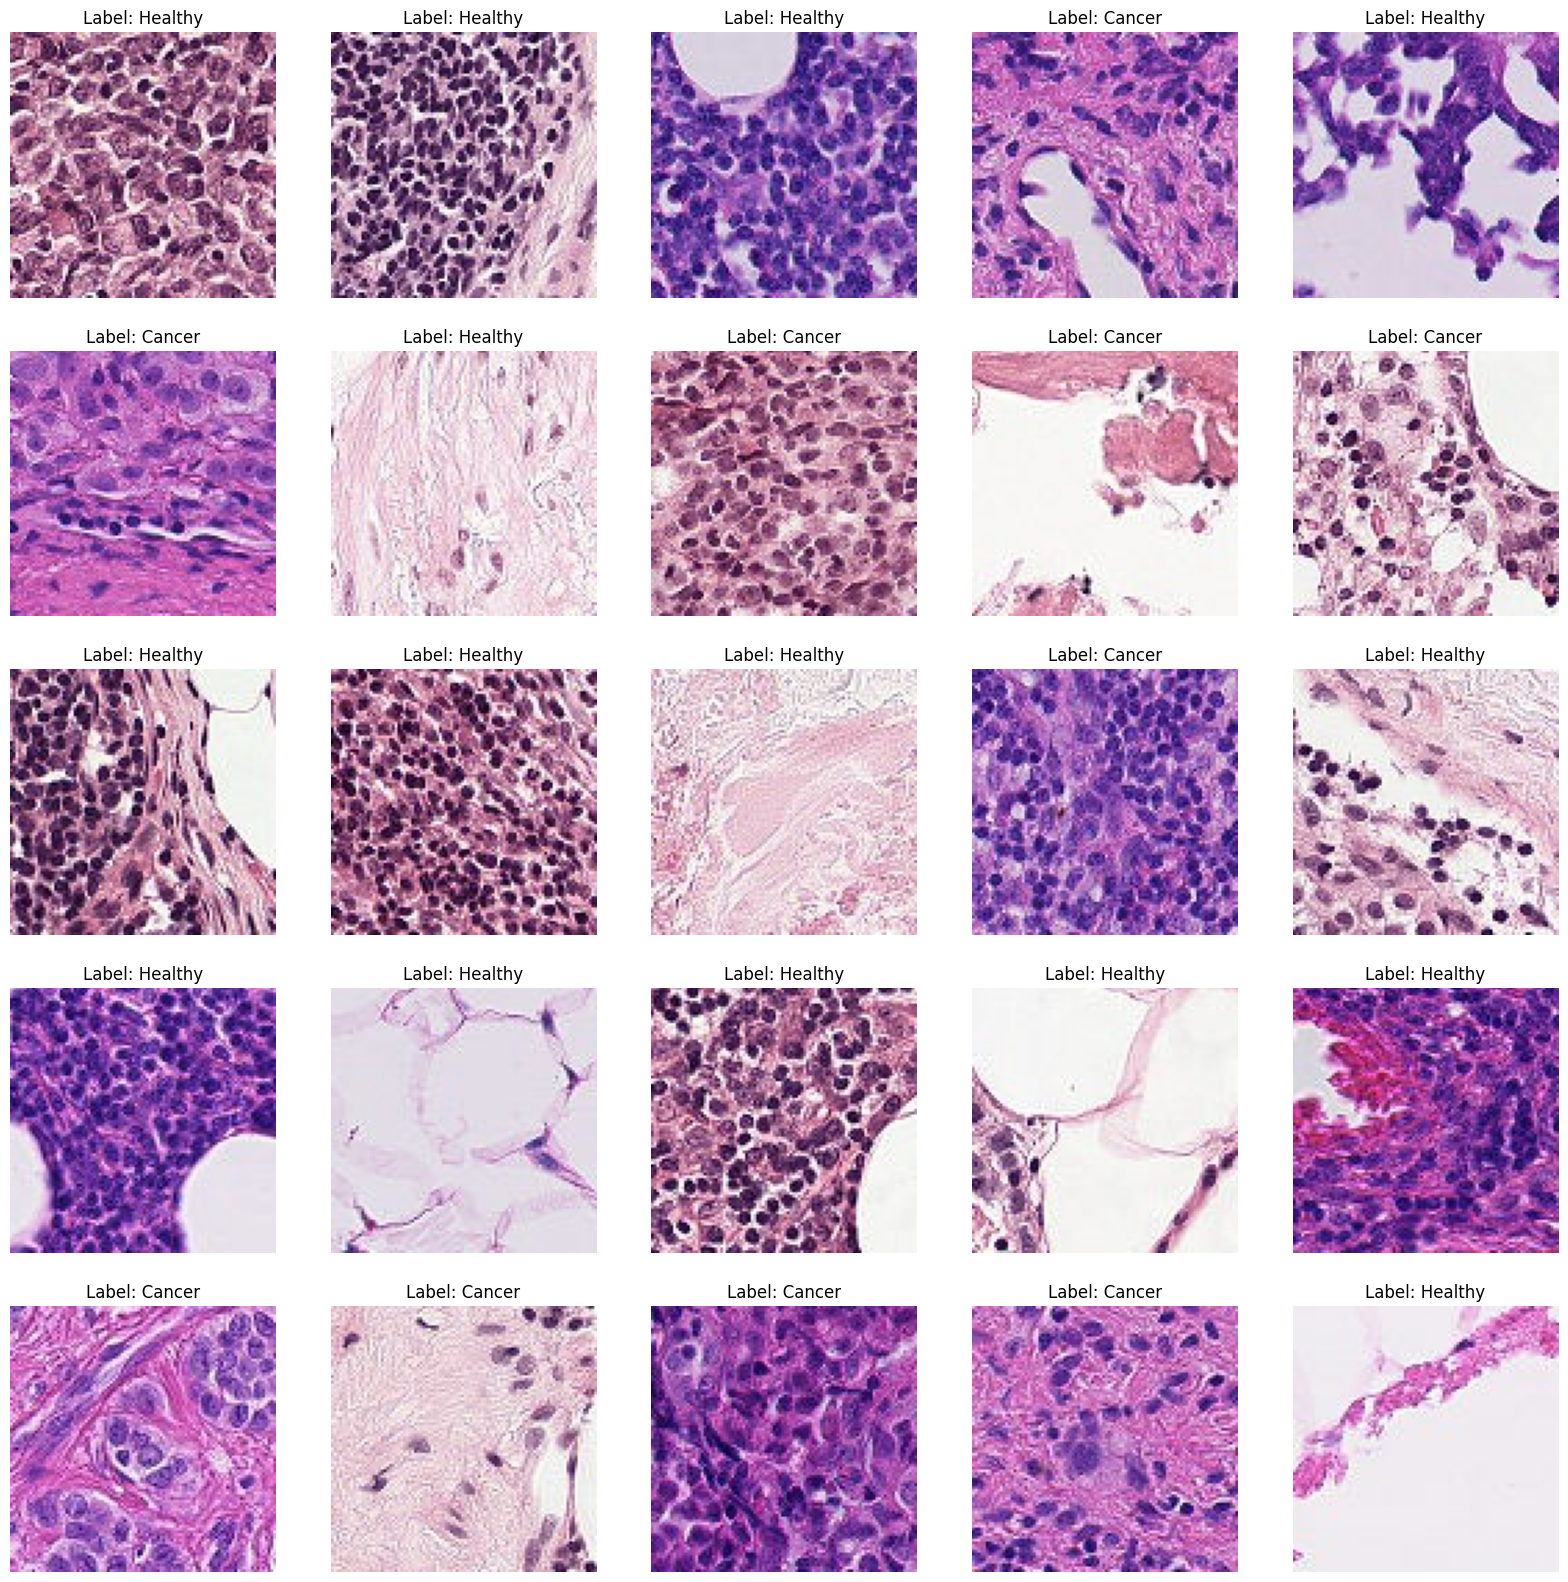

In [10]:
import matplotlib.pyplot as plt
from PIL import Image

fig, ax = plt.subplots(5, 5, figsize=(20, 20))
for i in range(25):
    img_path = os.path.join(test_images_path, test_image_files[i])
    image = Image.open(img_path)
    pred = binary_predictions[i]
    label = "Cancer" if pred == 1 else "Healthy"  
    row = i // 5
    col = i % 5
    ax[row, col].imshow(image)
    ax[row, col].set_title(f"Label: {label}")
    ax[row, col].axis("off")
plt.show()


In [11]:
# Remove the old submission.csv file if it exists
submission_csv_path = '/kaggle/working/submission.csv'
if os.path.exists(submission_csv_path):
    os.remove(submission_csv_path)

submission_df.to_csv(submission_csv_path, index=False)

# 5. Conclusion

Discuss and interpret results as well as learnings and takeaways. What did and did not help improve the performance of your models? What improvements could you try in the future?